# **Necessary Pips and Libraries**





In [1]:
###Necessary Libraries and Modules###

###To acess stock data
!pip install yfinance==0.2.54

###To train ARIMA model
!pip install pmdarima

###To train LSTM model
!pip install tensorflow
!pip install keras-tuner --upgrade
!pip install keras
!pip install --upgrade keras

###To train prophet module
!pip install prophet

###For Dates
!pip install holidays==0.25

###For dashboard
!pip install dash
!pip install dash-bootstrap-components
!pip install dash dash-core-components dash-html-components pandas
!pip install plotly==5.15.0

In [2]:
#Import yfinance library
import yfinance as yf

#Import important python libraries
import pandas as pd
import numpy as np

#For visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#To format date'
import matplotlib.dates as mdates
import holidays
import datetime
from datetime import timedelta
from pandas.tseries.offsets import BDay

#To copy DataFrame
import copy

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

#For ARIMA model training and evaluation
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #evaluates model performance
from math import sqrt

#For LSTM model training
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

#To Load trained model
from keras.models import load_model
from tensorflow import keras

#For prophet model training
from prophet import Prophet
import logging 
logging.getLogger('prophet').setLevel(logging.WARNING) #Disables message
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)
from prophet.plot import plot_plotly, plot_components_plotly

#For dashboard
from dash import Dash, callback, Output, Input
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import plotly.tools as tls
from plotly.tools import mpl_to_plotly
import plotly.graph_objects as go
import plotly.io as pio

#Random seed for reproducibilty 
import random

#To import operating system module
import os

# **Stock Selection**

In [3]:
#Select stocks to acesss from yfinance
tickers = yf.Tickers('AAPL AMZN GOOGL MSFT')
stocks = ['AAPL', 'AMZN', 'GOOGL', 'MSFT'] #List of stock tickers

# **Data Collection**

Data was collected from Yahoo Finance in three differnt ranges.

In [4]:
#short range stocks
short_range= yf.download(stocks, period='1mo', interval='2m', group_by='ticker', auto_adjust=True)

#medium range stocks
medium_range= yf.download(stocks, period='2y', interval='1h', group_by='ticker', auto_adjust=True)

#long range stocks
long_range= yf.download(stocks, group_by='ticker', auto_adjust=True)

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed


Exploring downloaded data

In [5]:
short_range = short_range.sort_index(level=0, axis=1)
short_range.head()

Ticker                           AAPL                                      \
Price                           Close        High         Low        Open   
Datetime                                                                    
2025-02-18 14:30:00+00:00  244.239899  245.005005  243.910004  243.910004   
2025-02-18 14:32:00+00:00  243.699997  244.160004  242.860107  244.160004   
2025-02-18 14:34:00+00:00  243.034302  243.951004  242.970001  243.710007   
2025-02-18 14:36:00+00:00  243.929993  243.949997  243.000000  243.009995   
2025-02-18 14:38:00+00:00  243.639999  243.949997  243.520004  243.914993   

Ticker                                      AMZN                          \
Price                         Volume       Close        High         Low   
Datetime                                                                   
2025-02-18 14:30:00+00:00  3565195.0  228.500000  229.130005  228.300003   
2025-02-18 14:32:00+00:00   531737.0  228.380005  228.799896  228.119995   
2025-02-18 14:34:00+00:00   613436.0  228.500000  228.919998  228.300003   
2025-02-18 14:36:00+00:00   464516.0  228.684998  228.750000  228.399994   
2025-02-18 14:38:00+00:00   297364.0  228.610001  228.750000  228.440094   

Ticker                                                 GOOGL              \
Price                            Open     Volume       Close        High   
Datetime                                                                   
2025-02-18 14:30:00+00:00  228.679993  1725115.0  185.250000  185.960007   
2025-02-18 14:32:00+00:00  228.519897   441445.0  185.470001  185.899994   
2025-02-18 14:34:00+00:00  228.369995   266198.0  185.250000  185.480606   
2025-02-18 14:36:00+00:00  228.520004   292161.0  185.220001  185.529999   
2025-02-18 14:38:00+00:00  228.679993   171853.0  185.100800  185.270004   

Ticker                                                              MSFT  \
Price                             Low        Open     Volume       Close   
Datetime                                                                   
2025-02-18 14:30:00+00:00  184.899994  185.559998  1704930.0  408.230011   
2025-02-18 14:32:00+00:00  185.264999  185.264999   246010.0  409.890106   
2025-02-18 14:34:00+00:00  185.160004  185.440002   180616.0  409.015015   
2025-02-18 14:36:00+00:00  185.100006  185.220001   264057.0  409.339996   
2025-02-18 14:38:00+00:00  184.949997  185.210007   206389.0  409.317291   

Ticker                                                                  
Price                            High         Low        Open   Volume  
Datetime                                                                
2025-02-18 14:30:00+00:00  409.149994  407.869995  408.195007  1172710  
2025-02-18 14:32:00+00:00  410.350006  408.100006  408.179993   235614  
2025-02-18 14:34:00+00:00  410.119995  408.900604  409.899994   132943  
2025-02-18 14:36:00+00:00  409.729889  408.984985  409.109802   148193  
2025-02-18 14:38:00+00:00  409.470001  409.057587  409.359985    97331

In [6]:
medium_range= medium_range.sort_index(level=0, axis=1)
medium_range.head()

Ticker                           AAPL                                      \
Price                           Close        High         Low        Open   
Datetime                                                                    
2023-03-17 13:30:00+00:00  155.119995  156.740005  154.880005  156.080002   
2023-03-17 14:30:00+00:00  154.664993  155.500000  154.279999  155.130005   
2023-03-17 15:30:00+00:00  155.229996  155.399994  154.380005  154.679993   
2023-03-17 16:30:00+00:00  155.559998  155.850006  154.955002  155.240005   
2023-03-17 17:30:00+00:00  154.979996  156.029907  154.880005  155.550003   

Ticker                                   AMZN                         \
Price                       Volume      Close        High        Low   
Datetime                                                               
2023-03-17 13:30:00+00:00        0  98.669998  100.660004  98.340202   
2023-03-17 14:30:00+00:00  8460679  98.010002   98.809898  97.839996   
2023-03-17 15:30:00+00:00  5681335  98.359001   98.440002  97.455002   
2023-03-17 16:30:00+00:00  5547154  98.607201   98.889999  98.320000   
2023-03-17 17:30:00+00:00  5076463  98.510002   99.279999  98.309998   

Ticker                                              GOOGL              \
Price                           Open   Volume       Close        High   
Datetime                                                                
2023-03-17 13:30:00+00:00  99.790001        0  101.489998  102.834999   
2023-03-17 14:30:00+00:00  98.675003  9430058  100.855003  101.760002   
2023-03-17 15:30:00+00:00  98.019997  6244196  101.389999  101.519997   
2023-03-17 16:30:00+00:00  98.349998  5999284  101.660004  101.889999   
2023-03-17 17:30:00+00:00  98.608902  5686167  101.269997  102.050003   

Ticker                                                            MSFT  \
Price                             Low        Open   Volume       Close   
Datetime                                                                 
2023-03-17 13:30:00+00:00  100.099998  100.260002        0  282.230011   
2023-03-17 14:30:00+00:00  100.720001  101.495003  6133248  277.522888   
2023-03-17 15:30:00+00:00  100.320000  100.857002  4070025  277.739990   
2023-03-17 16:30:00+00:00  101.360001  101.400002  3066779  279.989990   
2023-03-17 17:30:00+00:00  101.250000  101.650002  4677679  278.279999   

Ticker                                                                  
Price                            High         Low        Open   Volume  
Datetime                                                                
2023-03-17 13:30:00+00:00  283.329987  277.390015  278.260010        0  
2023-03-17 14:30:00+00:00  282.750000  276.950012  282.230011  7817199  
2023-03-17 15:30:00+00:00  278.420013  276.320099  277.540009  4825699  
2023-03-17 16:30:00+00:00  280.869995  277.755707  277.769989  4429853  
2023-03-17 17:30:00+00:00  281.209991  278.190002  280.015015  4129482

In [7]:
long_range= long_range[long_range.index > pd.Timestamp('2010-01-01')] #to filter out nan values considering the stocks became public at different time
long_range= long_range.sort_index(level=0, axis=1).dropna()
long_range.head()

Ticker          AAPL                                             AMZN          \
Price          Close      High       Low      Open     Volume   Close    High   
Date                                                                            
2010-01-04  6.440331  6.455076  6.391278  6.422876  493729600  6.6950  6.8305   
2010-01-05  6.451466  6.487879  6.417459  6.458086  601904800  6.7345  6.7740   
2010-01-06  6.348846  6.477045  6.342225  6.451465  552160000  6.6125  6.7365   
2010-01-07  6.337110  6.379843  6.291067  6.372319  477131200  6.5000  6.6160   
2010-01-08  6.379241  6.379843  6.291368  6.328683  447610800  6.6760  6.6840   

Ticker                                       GOOGL                        \
Price          Low    Open       Volume      Close       High        Low   
Date                                                                       
2010-01-04  6.6570  6.8125  151998000.0  15.609804  15.678545  15.547291   
2010-01-05  6.5905  6.6715  177038000.0  15.541064  15.636953  15.480045   
2010-01-06  6.5825  6.7300  143576000.0  15.149294  15.587638  15.101973   
2010-01-07  6.4400  6.6005  220604000.0  14.796625  15.192631  14.760512   
2010-01-08  6.4515  6.5280  196610000.0  14.993881  15.024515  14.672344   

Ticker                                   MSFT                        \
Price            Open       Volume      Close       High        Low   
Date                                                                  
2010-01-04  15.614785   78169752.0  23.254049  23.366750  22.983566   
2010-01-05  15.620515  120067812.0  23.261564  23.366753  23.021135   
2010-01-06  15.587638  158988852.0  23.118814  23.351730  22.930979   
2010-01-07  15.177686  256315428.0  22.878376  23.066212  22.683027   
2010-01-08  14.744323  188783028.0  23.036165  23.201460  22.720601   

Ticker                             
Price            Open      Volume  
Date                               
2010-01-04  23.006106  38409100.0  
2010-01-05  23.178918  49749600.0  
2010-01-06  23.201461  58182400.0  
2010-01-07  23.013616  50559700.0  
2010-01-08  22.750656  51197400.0

In [8]:
#Interpolation for missing values

#Create dictionary of stock data ranges
stock_range = {'short range': short_range,
               'medium range': medium_range,
               'long range':long_range}

#Check for missing values and if present fill the missing values using interpolation if present
for key, value in stock_range.items():
    if value.isnull().sum().any():
        print(f"Missing data found in {key}")
        value.interpolate(method='linear', limit_direction='both', inplace=True)
        print(f"Missing data filled using interpolation in {key}")
    else:
        print(f"No missing data found in {key}")

Missing data found in short range
Missing data filled using interpolation in short range
No missing data found in medium range
No missing data found in long range


In [9]:
#Stock Data Summary

#Iterate through stock_range dictionary
for key, value in stock_range.items():
    print (f'{key} data summary')
    value.info()
    print('\n') #Print space after each iteration for tidy presentation

short range data summary
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3722 entries, 2025-02-18 14:30:00+00:00 to 2025-03-17 14:12:00+00:00
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (AAPL, Close)    3722 non-null   float64
 1   (AAPL, High)     3722 non-null   float64
 2   (AAPL, Low)      3722 non-null   float64
 3   (AAPL, Open)     3722 non-null   float64
 4   (AAPL, Volume)   3722 non-null   float64
 5   (AMZN, Close)    3722 non-null   float64
 6   (AMZN, High)     3722 non-null   float64
 7   (AMZN, Low)      3722 non-null   float64
 8   (AMZN, Open)     3722 non-null   float64
 9   (AMZN, Volume)   3722 non-null   float64
 10  (GOOGL, Close)   3722 non-null   float64
 11  (GOOGL, High)    3722 non-null   float64
 12  (GOOGL, Low)     3722 non-null   float64
 13  (GOOGL, Open)    3722 non-null   float64
 14  (GOOGL, Volume)  3722 non-null   float64
 15  (MSFT, Close)    3722 non-null   

In [10]:
#DataFrame shape before adressing outliers 
print(f'short range data frame shape is {short_range.shape}')
print(f'medium range data frame shape is {medium_range.shape}')
print(f'long range data frame shape is {long_range.shape}')

short range data frame shape is (3722, 20)
medium range data frame shape is (3481, 20)
long range data frame shape is (3823, 20)


In [11]:
#Create function to adress outliers
def remove_outliers_iqr_zscore(df, column):
    #IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound_iqr = Q1 - 1.5 * IQR
    upper_bound_iqr = Q3 + 1.5 * IQR
    
    #Z-score method
    data = df[column]
    z_scores = np.abs((data - data.mean()) / data.std())
    threshold = 2 #95% of data
    
    #Combined IQR and Z-score conditions
    df_out = df[
        (df[column] >= lower_bound_iqr) & 
        (df[column] <= upper_bound_iqr) & 
        (z_scores <= threshold)]

    return df_out

#Function Call
for stock in stocks:
    for column in ['Close', 'High', 'Low',  'Open', 'Volume']:
        short_ = remove_outliers_iqr_zscore(short_range, (stock, column))
        medium_ = remove_outliers_iqr_zscore(medium_range, (stock, column))
        long_ = remove_outliers_iqr_zscore(long_range, (stock, column))

In [12]:
#New DataFrame that has addressed outliers
short_=short_.dropna()
medium_=medium_.dropna()
long_=long_.dropna()

In [13]:
#New shape after adressing outliers 
print(f'short range data frame shape after adressing outliers is {short_.shape}')
print(f'medium range data frame shape after adressing outliers is {medium_.shape}')
print(f'long range data frame shape after adressing outliers is {long_.shape}')

short range data frame shape after adressing outliers is (3442, 20)
medium range data frame shape after adressing outliers is (3256, 20)
long range data frame shape after adressing outliers is (3660, 20)


# **Exploratory Data Analysis (EDA)**

## **Univariate Analysis**

In [14]:
#Calculate summary statistcs for past days, months, and years

today= pd.Timestamp.today()

#Ensure the index is of datetime type
long_.index = pd.to_datetime(long_.index)

#Long range DataFrames filterd
OneW = long_.loc[long_.index >=today-pd.DateOffset(weeks=1)] #data from past week
OneM = long_.loc[long_.index >=today-pd.DateOffset(months=1)] #data from past month
SixM = long_.loc[long_.index >=today-pd.DateOffset(months=6)] #data from past six month
OneY = long_.loc[long_.index >=today-pd.DateOffset(years=1)] #data from past year
FiveY = long_.loc[long_.index >=today-pd.DateOffset(years=5)] #data from past five year
TenY = long_.loc[long_.index >=today-pd.DateOffset(years=10)] #data from past ten years

#Create dictionary for filterd data ranges
period = {'One Week': OneW, 'One Month': OneM,
          'Six Months': SixM, 'One Year': OneY,
          'Five Years': FiveY, 'Ten Years': TenY}

#Summary satistics
for key, value in period.items(): #Iterate through period dictionary
    print(f"Summary statistics of the last {key}:")
    print(value.describe())
    print('\n') #Print space after each iteration for tidy presentation

Summary statistics of the last One Week:
Ticker        AAPL                                                    \
Price        Close        High         Low        Open        Volume   
count     4.000000    4.000000    4.000000    4.000000  4.000000e+00   
mean    215.247498  219.594997  212.590000  217.787498  6.502835e+07   
std       4.773660    5.263082    4.299263    5.413565  7.475384e+06   
min     209.679993  213.949997  208.419998  211.250000  6.006020e+07   
25%     212.537502  216.117496  209.290001  214.774998  6.104128e+07   
50%     215.235001  219.294998  212.245003  218.044998  6.195790e+07   
75%     217.944996  222.772499  215.545002  221.057499  6.594498e+07   
max     220.839996  225.839996  217.449997  223.809998  7.613740e+07   

Ticker        AMZN                                                    \
Price        Close        High         Low        Open        Volume   
count     4.000000    4.000000    4.000000    4.000000  4.000000e+00   
mean    196.829998  19

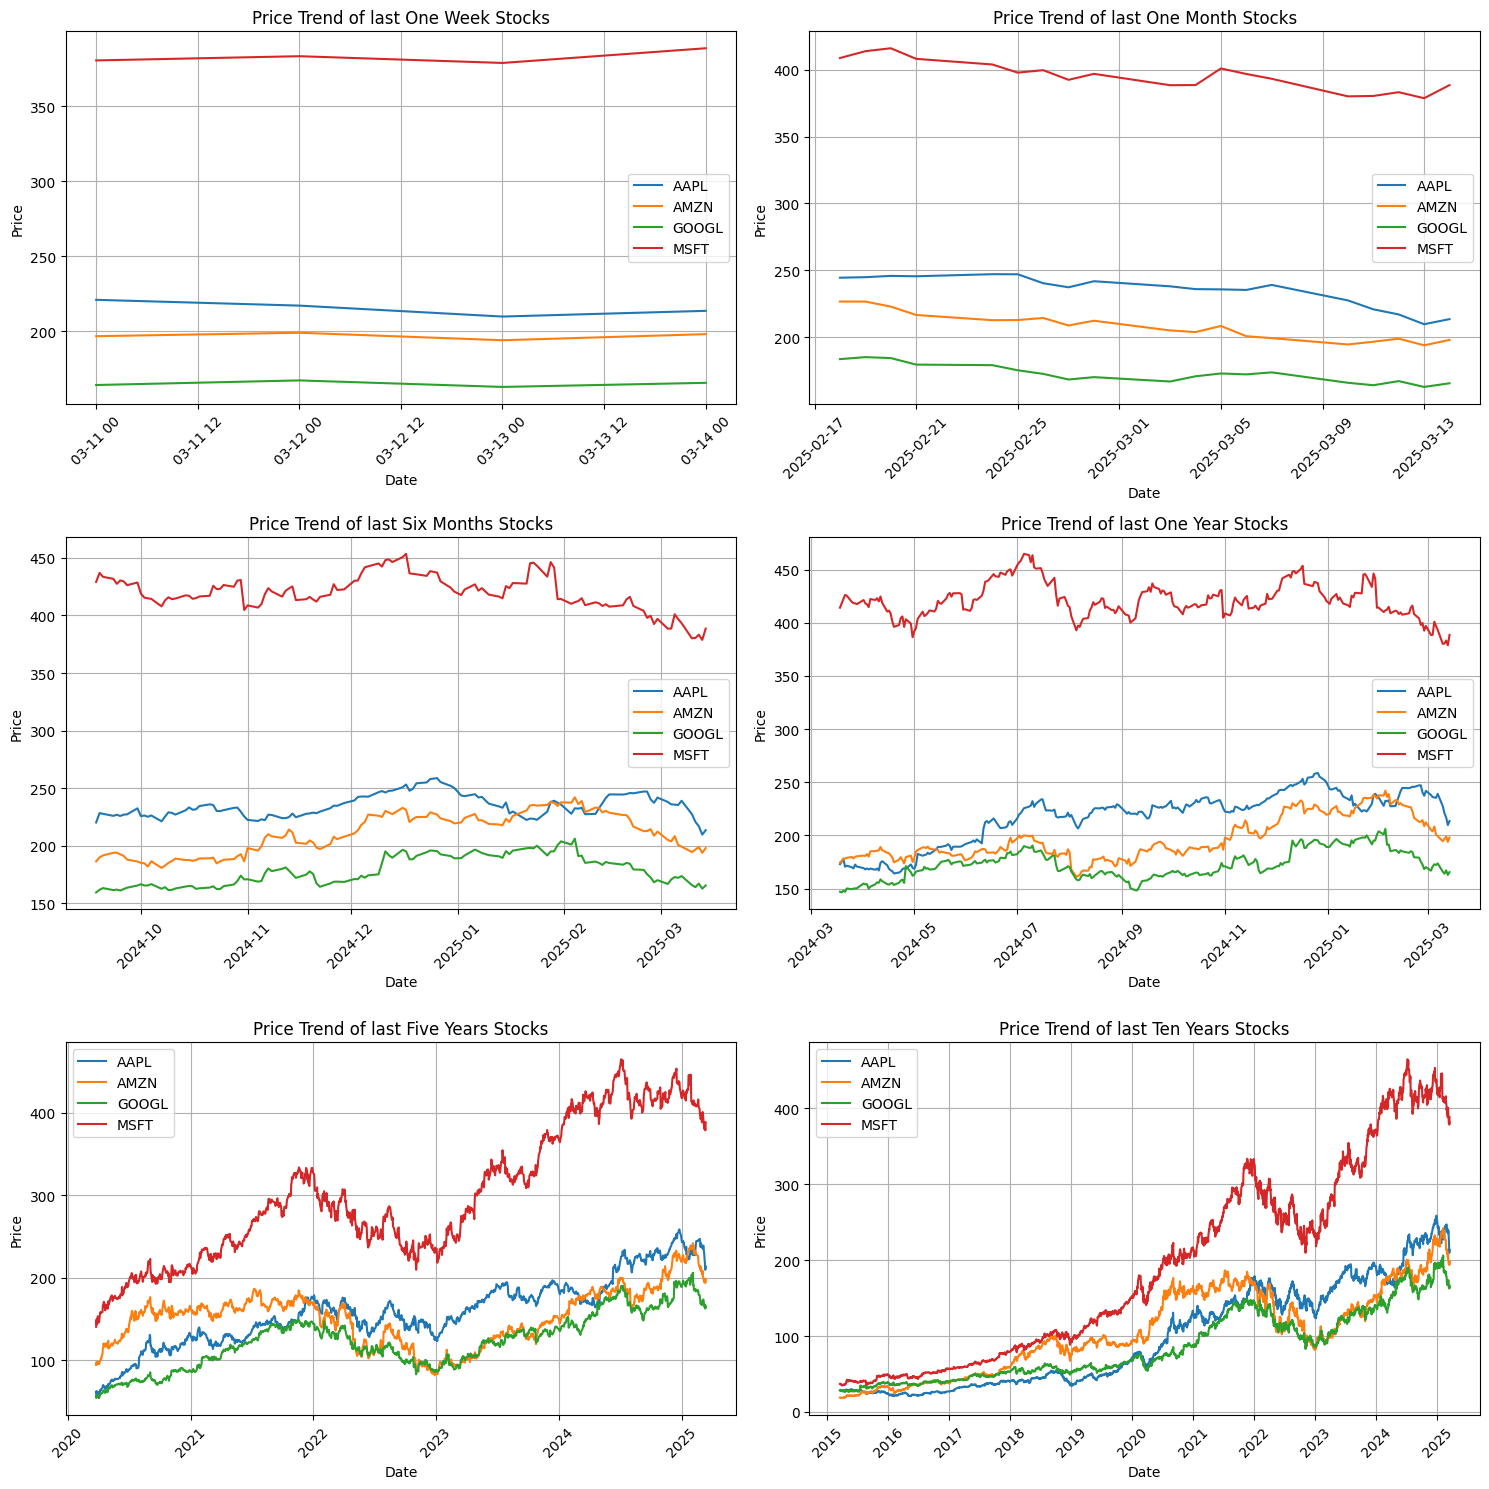

In [15]:
#Line Plot for Closing Price of past days, months, and years
fig, axes = plt.subplots(3, 2, figsize=(15, 15)) #Create 3x2 subplot
axes = axes.flatten() #Flatten the axes

#Iterate through period dictionary
for i, (key, value) in enumerate (period.items()):
    for stock in stocks:
        close_data = value[(stock, 'Close')]

        axes[i].plot(close_data.index, close_data.values, label=stock)

    axes[i].set_title(f'Price Trend of last {key} Stocks')
    axes[i].tick_params(axis='x', rotation=45)  #Rotate x-axis
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].legend()
    axes[i].grid(True)
    
#Adjust layout and show plot
plt.tight_layout()
plt.show()

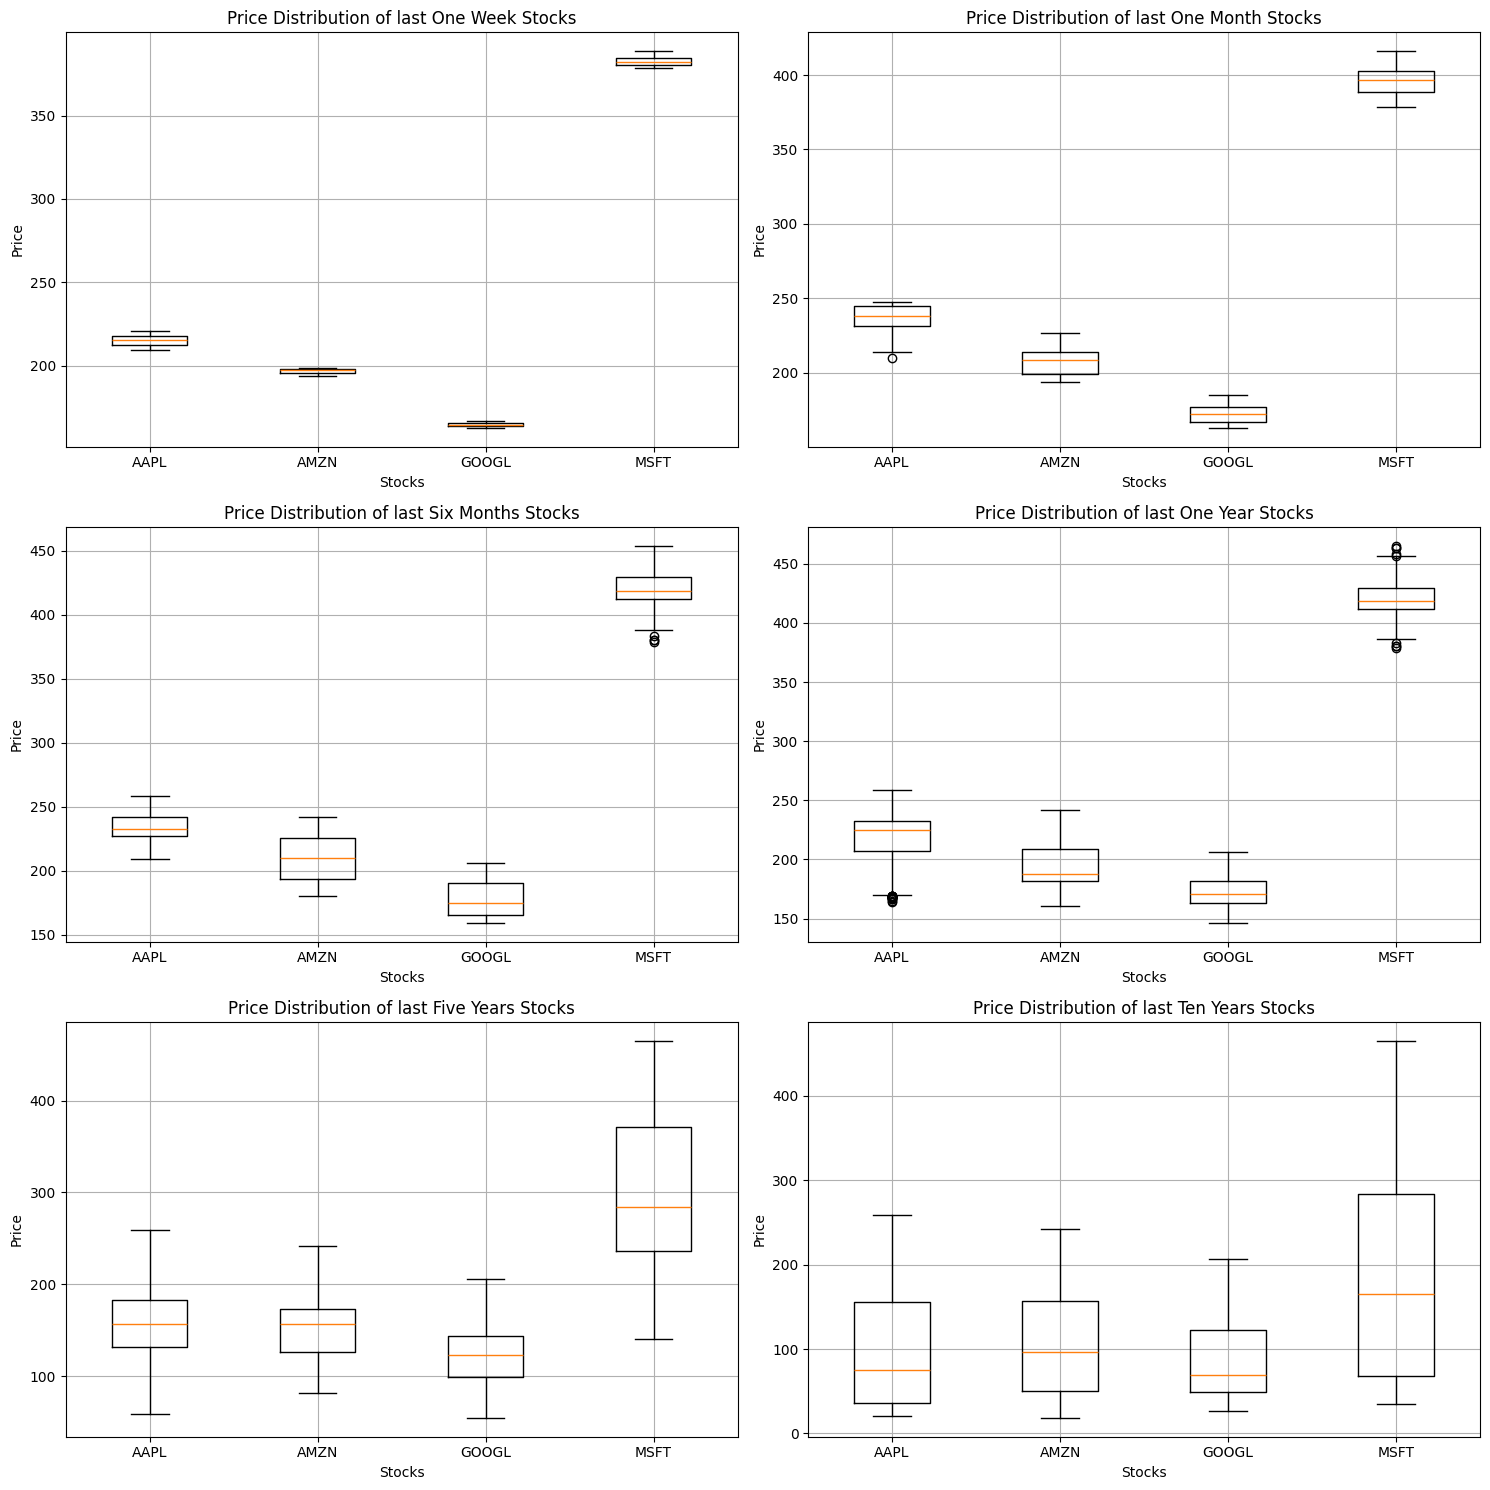

In [16]:
#Box Plot for Closing Price of past days, months, and years
fig, axes = plt.subplots(3, 2, figsize=(15, 15)) #Create 2x2 subplot
axes = axes.flatten() #Flatten the axes

#Iterate through period dictionary
for i, (key, value) in enumerate (period.items()):
    close_data = [] #Initialise empty list to store box plot data data

    for stock in stocks:
        close_data.append(value[(stock, 'Close')])

    axes[i].boxplot(close_data, tick_labels=stocks) #Create box plot

    axes[i].set_title(f'Price Distribution of last {key} Stocks')
    axes[i].set_xlabel('Stocks')
    axes[i].set_ylabel('Price')
    axes[i].grid(True)

#Adjust layout and show plot
plt.tight_layout()
plt.show()

## **Bivariate Analysis**

In [17]:
#Create a new DataFrame with 'Close' columns for further investigation

#Extract 'Close' columns for all stocks
close_cols = [(stock, 'Close') for stock in stocks]

#Create new DataFrames
short_close= short_[close_cols].dropna() #Extracted from short_ df
medium_close = medium_[close_cols].dropna() #Extracted from medium_ df
long_close = long_[close_cols].dropna() #Extracted from long_ df

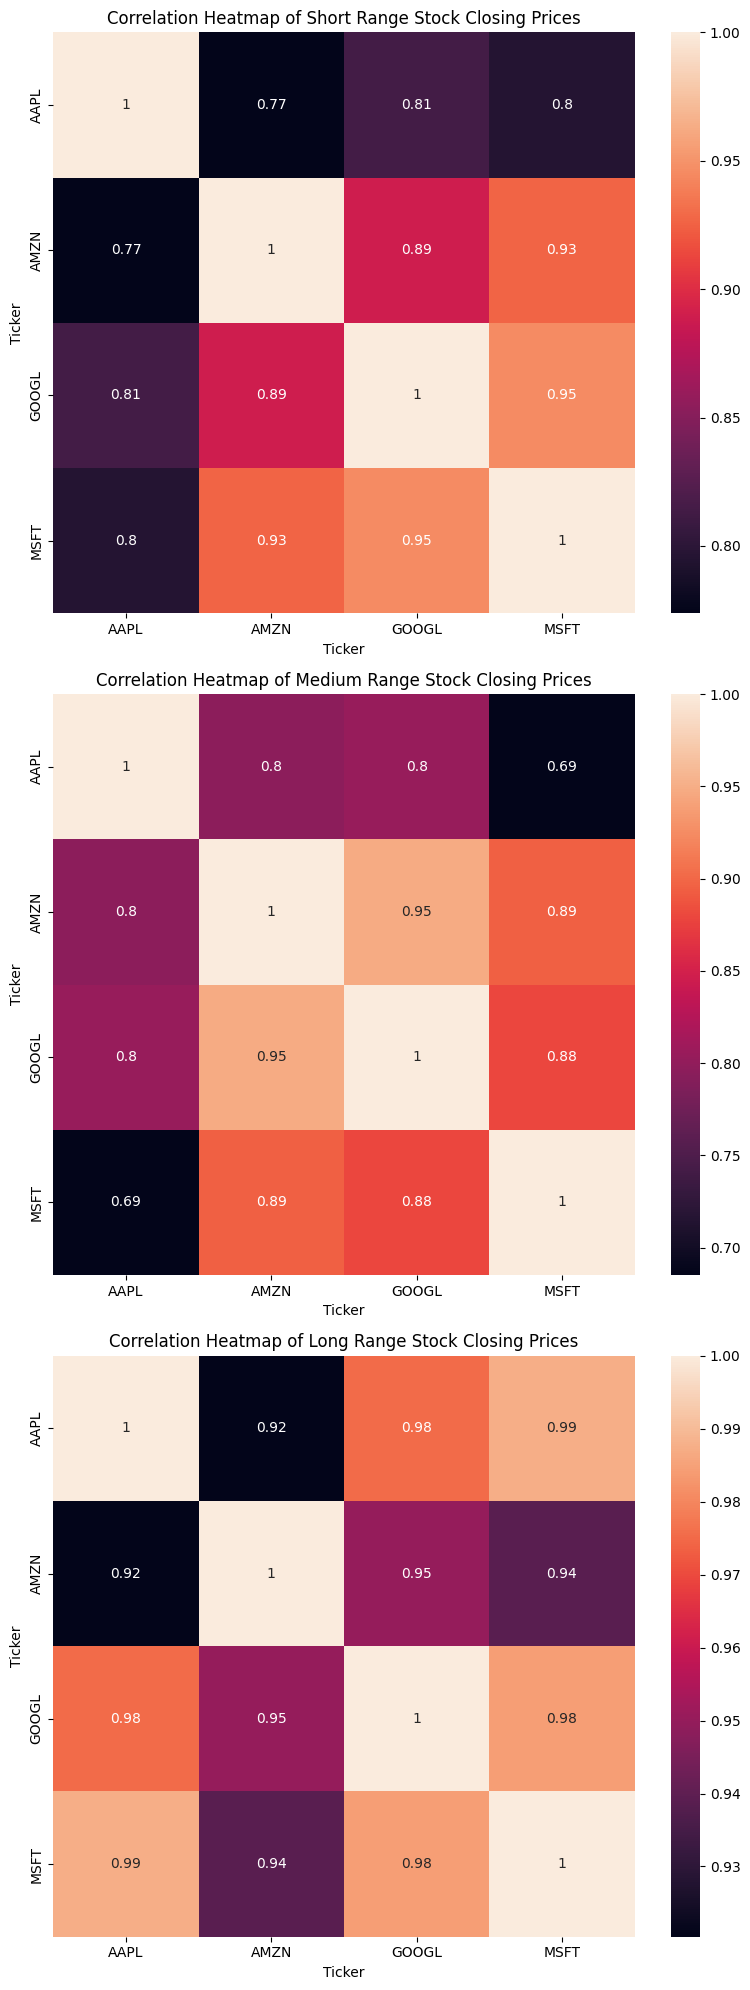

In [18]:
#Function to create heatmap
def plot_heatmap(ax, data, title):
    plot_data = data[[(stock, 'Close') for stock in stocks]]
    
    #Swap level and drop the first index from the DataFrame for a cleaner pairplot and drop empty dataset
    plot_data = plot_data.swaplevel(0, 1, axis=1).droplevel(0, axis=1).dropna()
    
    #Heatmap
    sns.heatmap(plot_data.corr(), annot=True, ax=ax)
    ax.set_title(title)


fig, axes = plt.subplots(3, 1, figsize=(8, 20))  #Create subplot

#Function call
plot_heatmap(axes[0], short_, 'Correlation Heatmap of Short Range Stock Closing Prices')
plot_heatmap(axes[1], medium_, 'Correlation Heatmap of Medium Range Stock Closing Prices')
plot_heatmap(axes[2], long_, 'Correlation Heatmap of Long Range Stock Closing Prices')

#Adjust layout and show plot
plt.tight_layout()
plt.show()

In [19]:
#Plot Combination Chart to visualise relationship between Stock Volume and Price

#Create Function to visualise coulumns of each DataFrames in different range
def plot_stock_data(data, stocks, ranges):

    fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)  #Create 2x2 subplot
    axes = axes.flatten()
     
    for i, stock in enumerate(stocks):
        ax = axes[i]  #Get the current axis
        
        #Plot Closing Price as line
        ax.plot(data.index, data[(stock, 'Close')], color='red')
        ax.set_ylabel('Closing Price', color='red')
        ax.tick_params(axis='y', labelcolor='red')

        #Plot volume as bars
        ax_vol = ax.twinx()
        ax_vol.bar(data.index, data[(stock, 'Volume')], color='black', alpha = 0.5)
        ax_vol.set_ylabel('Volume', color='black')
        ax_vol.tick_params(axis='y', labelcolor='black')

        #Set title and legend
        ax.set_title(f'{stock} Stock Data')
        ax.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
        ax.grid()

    #Adjust layout and show plot
    fig.suptitle(f'Closing Data and Volume Relationship Visualization for Data in {ranges}', fontsize=16)  #Add overall title
    plt.tight_layout()
    plt.show()

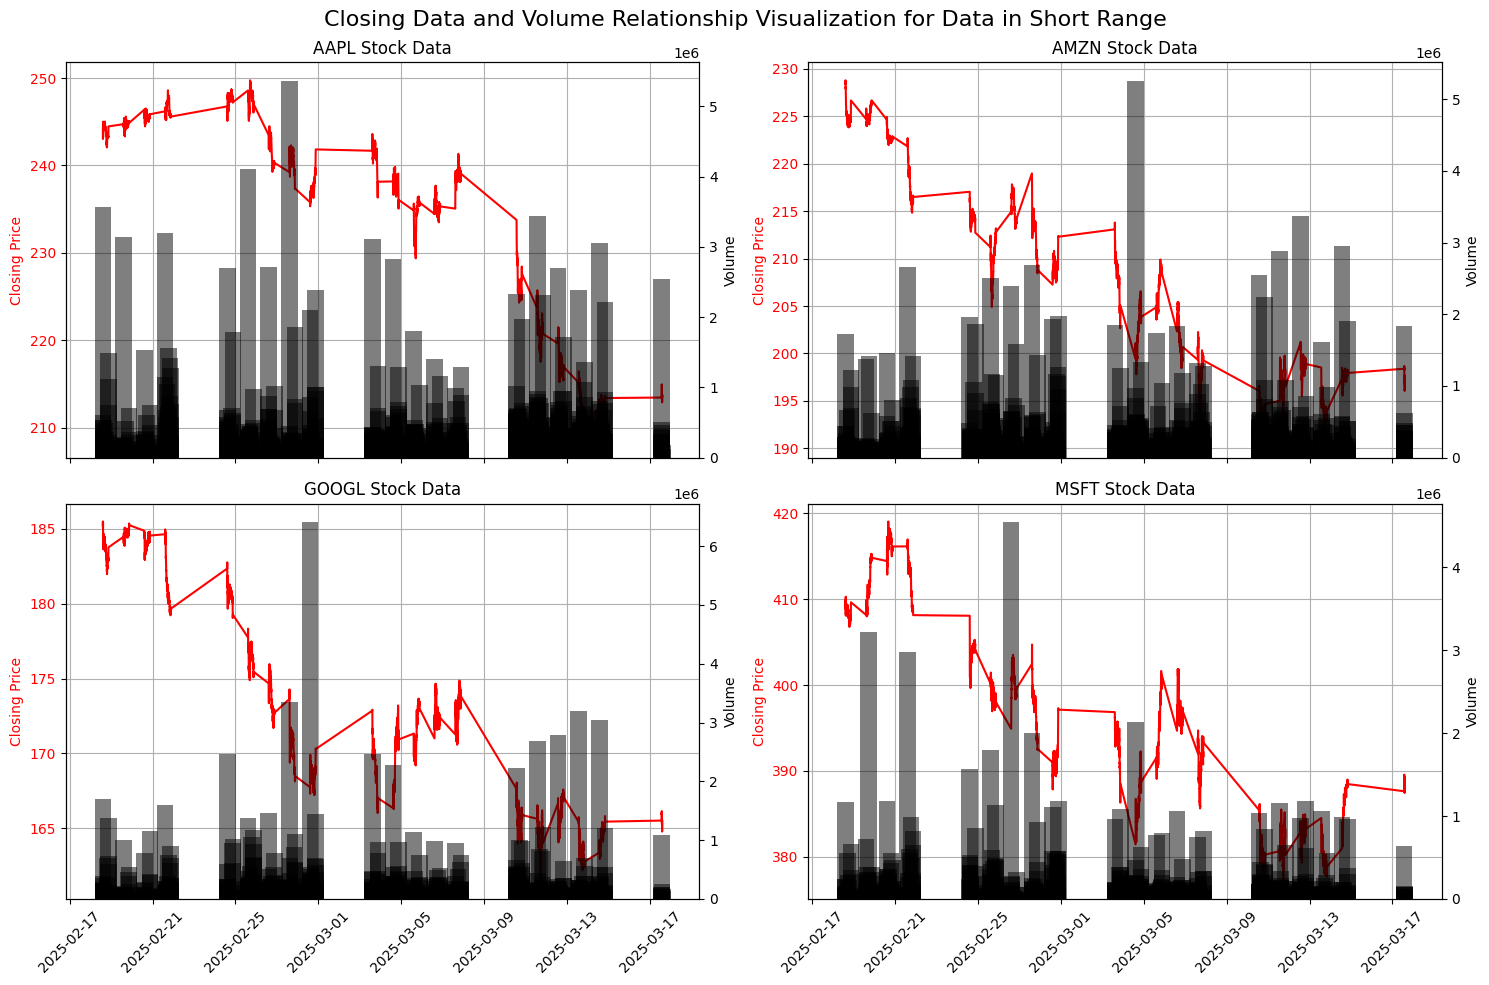

In [20]:
#Function Call to visualise stocks in short range
plot_stock_data(short_range, ['AAPL', 'AMZN', 'GOOGL', 'MSFT'], 'Short Range')

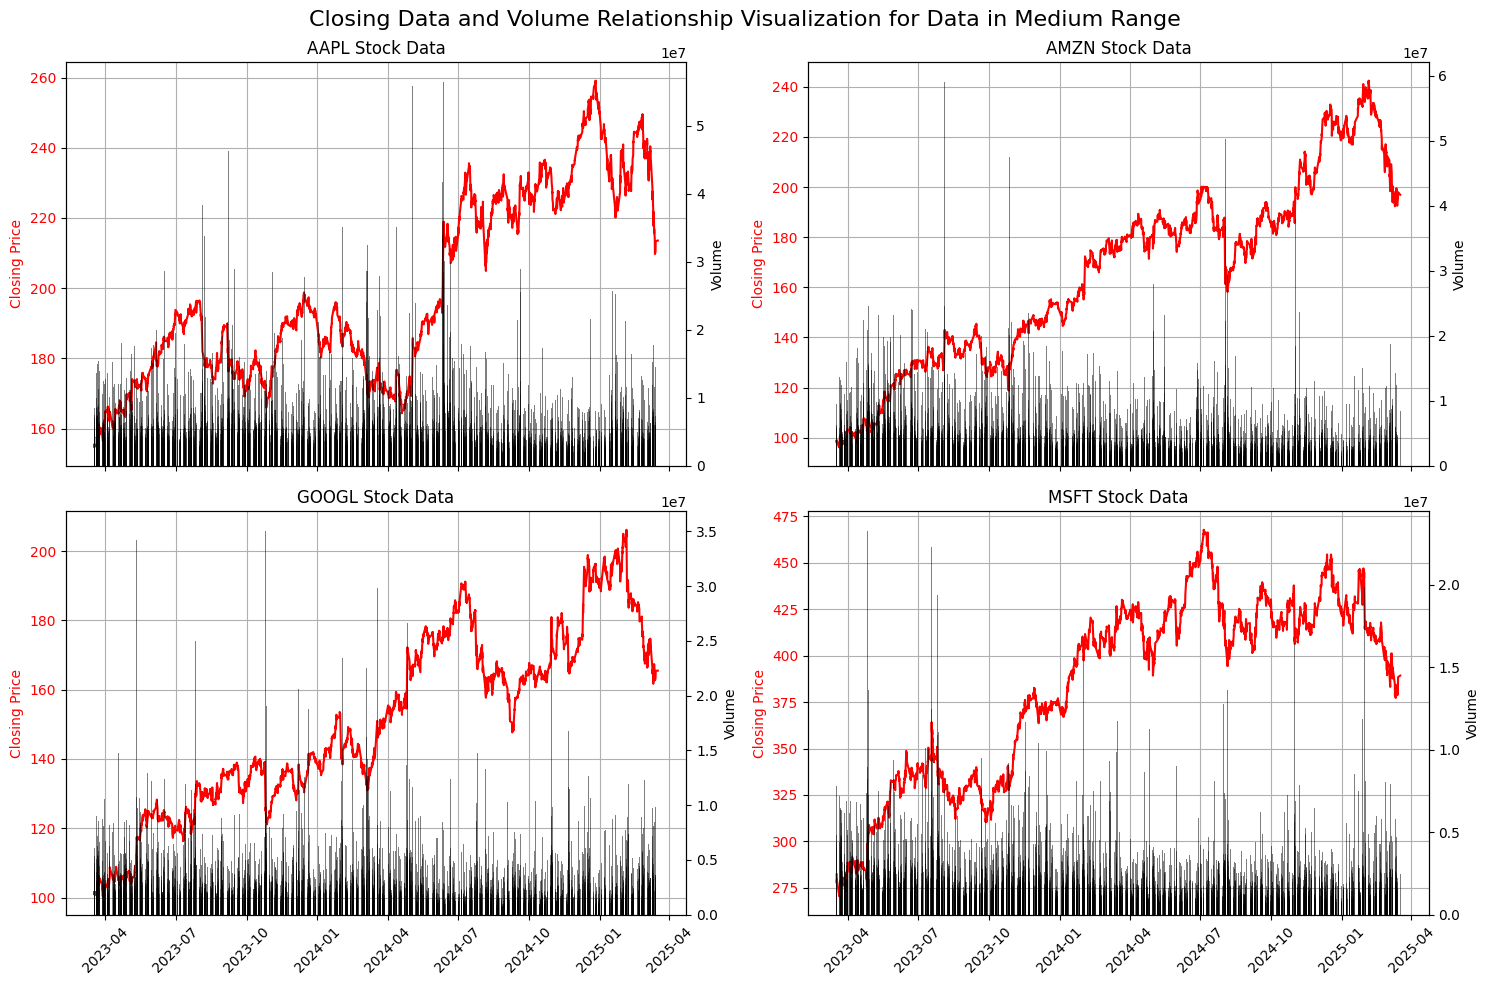

In [21]:
#Function Call to visualise stocks in medium range
plot_stock_data(medium_range, ['AAPL', 'AMZN', 'GOOGL', 'MSFT'], 'Medium Range')

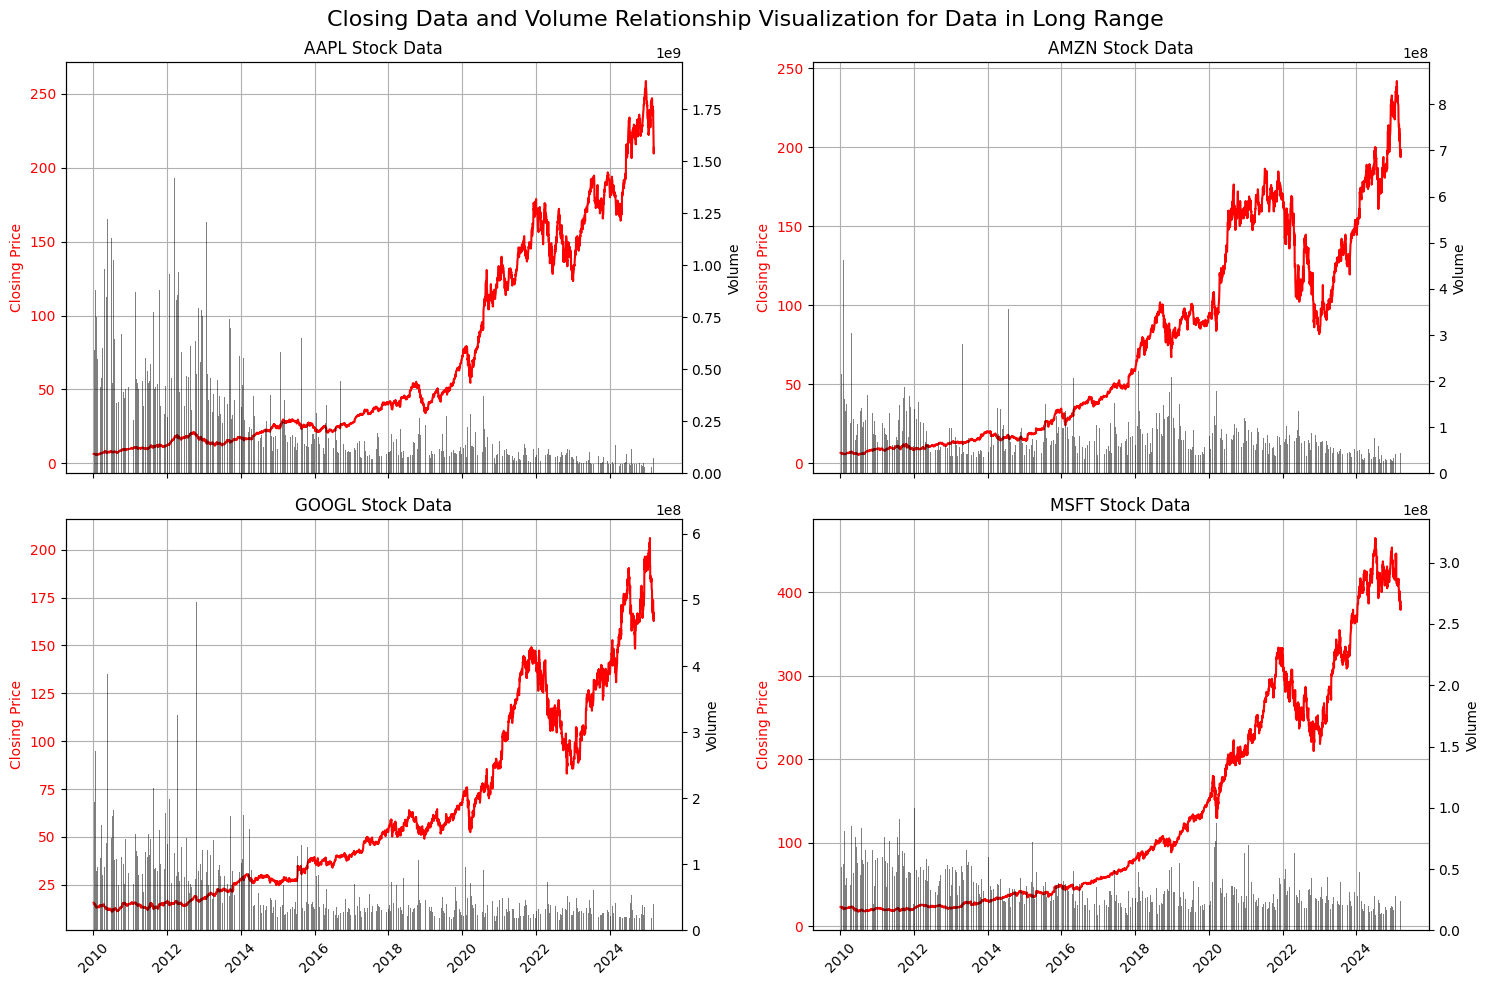

In [22]:
#Function Call to visualise stocks in long range
plot_stock_data(long_range, ['AAPL', 'AMZN', 'GOOGL', 'MSFT'], 'Long Range')

# **Predictive Modelling**

## **Feature Engineering**

### **Moving Averages**

#### *Short Range Stocks Moving Average*

In [23]:
#Calculate moving average for short range stocks using rolling method to smooth data 

#Window sizes for the moving averages
window_size = 15 # (2x15) 30 minutes moving averagee  

for stock in stocks:  #Iterate through each stock and calculate moving average
    short_[(stock, 'Moving Average')] = short_[(stock, 'Close')].rolling(window=window_size).mean()

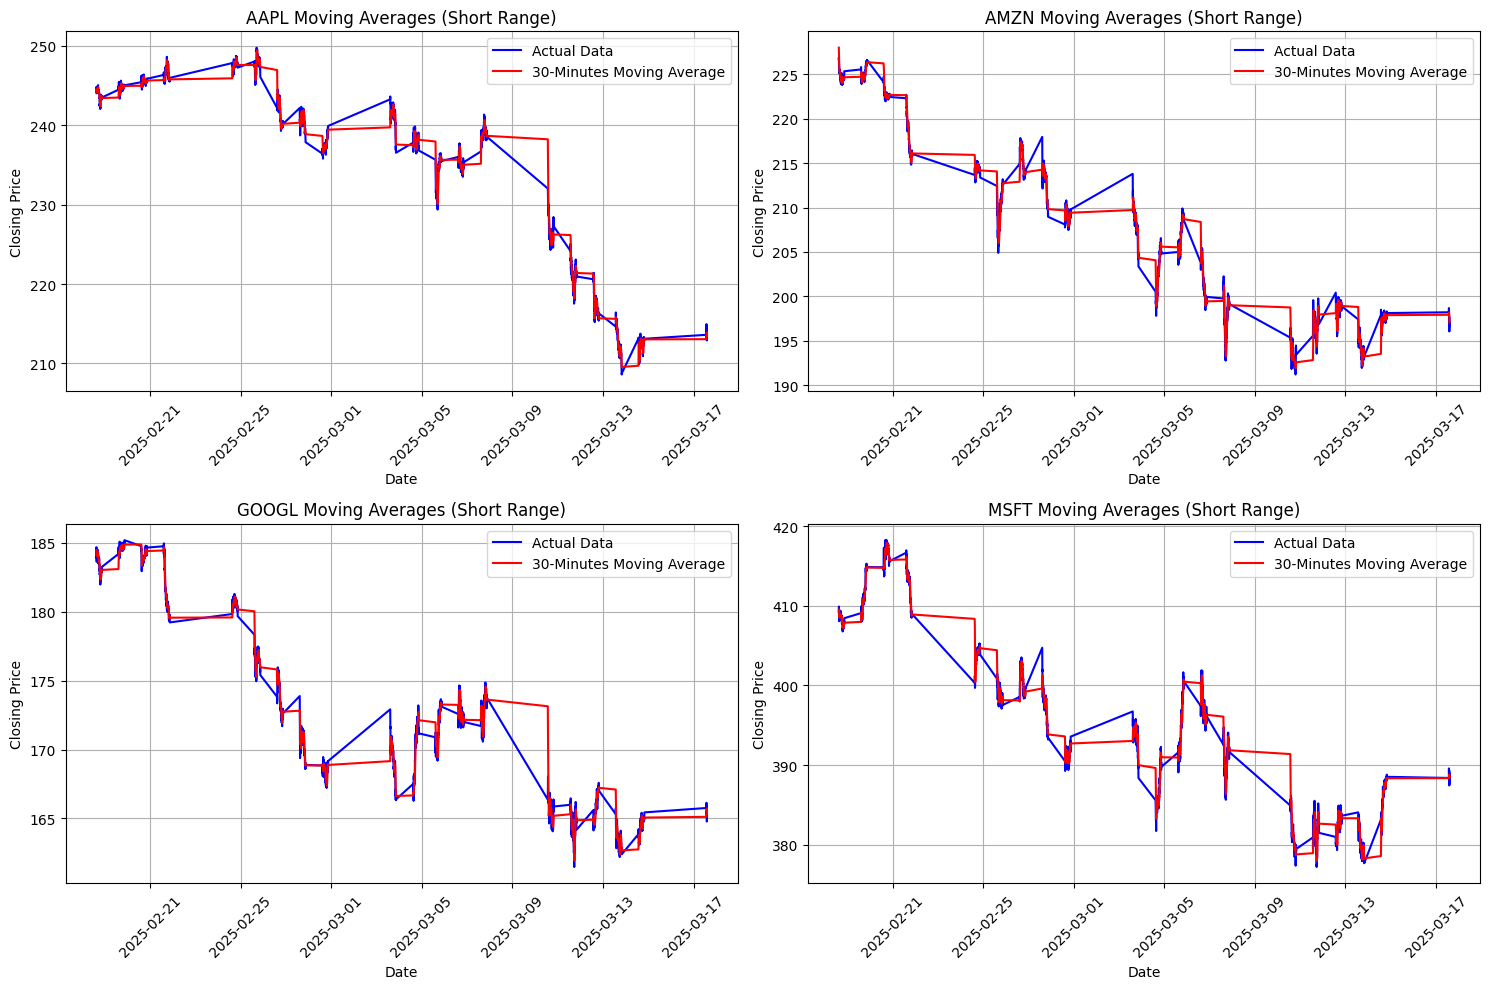

In [129]:
#Plot Moving Average Results with Actual Data

fig, axes = plt.subplots(2, 2, figsize=(15, 10)) #Create 2x2 subplot
axes = axes.flatten()

#Iterate and plot
for i, stock in enumerate(stocks):
    ax = axes[i]

    ax.plot(short_.index, short_[(stock, 'Close')].values, label='Actual Data', color='blue') 
    ax.plot(short_.index, short_[(stock, 'Moving Average')].values, label='30-Minutes Moving Average', color='red')
    
    ax.set_title(f'{stock} Moving Averages (Short Range)')
    ax.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.legend()
    ax.grid()

#Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### *Medium Range Stocks Moving Average*

In [25]:
#Calculate moving average for medium range stocks using rolling method to smooth data 

#Window sizes for the moving averages
window_size = 8 #8 hour moving averagee  

for stock in stocks:  #Iterate through each stock and calculate moving average
    medium_[(stock, 'Moving Average')] = medium_[(stock, 'Close')].rolling(window=window_size).mean()

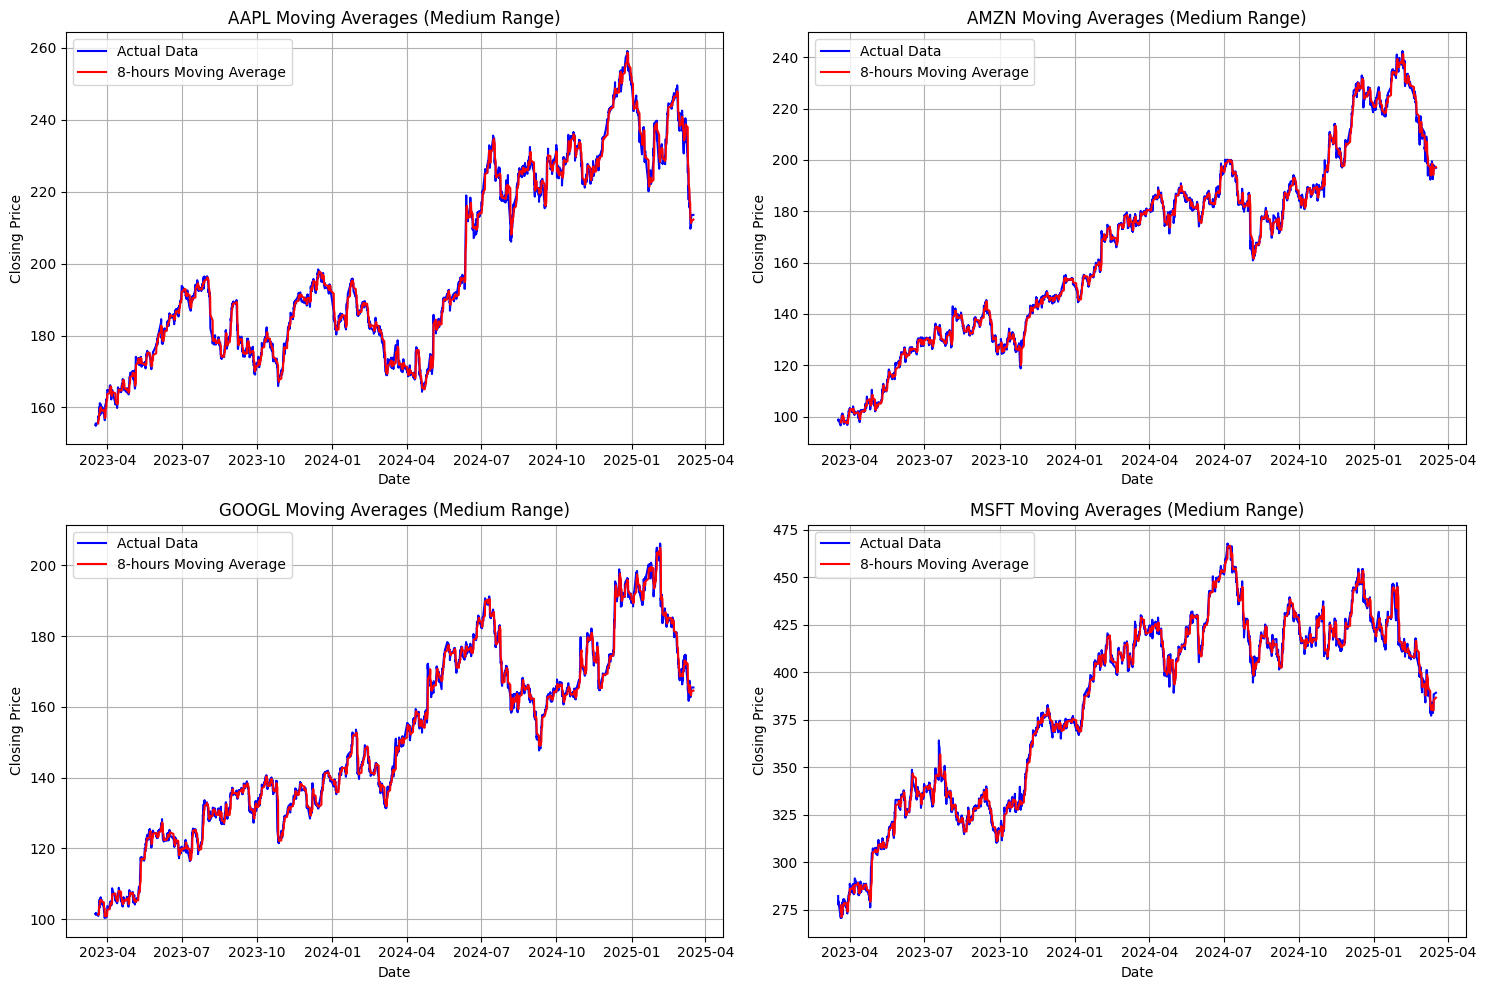

In [26]:
#Plot Moving Average Results with Actual Data

fig, axes = plt.subplots(2, 2, figsize=(15, 10)) #Create 2x2 subplot
axes = axes.flatten()

#Iterate and plot
for i, stock in enumerate(stocks):
    ax = axes[i]

    ax.plot(medium_.index, medium_[(stock, 'Close')].values, label='Actual Data', color='blue') 
    ax.plot(medium_.index, medium_[(stock, 'Moving Average')].values, label='8-hours Moving Average', color='red')
    
    ax.set_title(f'{stock} Moving Averages (Medium Range)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.legend()
    ax.grid()

#Adjust layout and show the plot
plt.tight_layout()
plt.show()

#### *Long Range Stocks Moving Average*

In [27]:
#Calculate moving average for long range stocks using rolling method to smooth data 

#Window sizes for the moving averages
window_size = 5 #5 days moving averagee  

for stock in stocks:  #Iterate through each stock and calculate moving average
    long_[(stock, 'Moving Average')] = long_[(stock, 'Close')].rolling(window=window_size).mean()

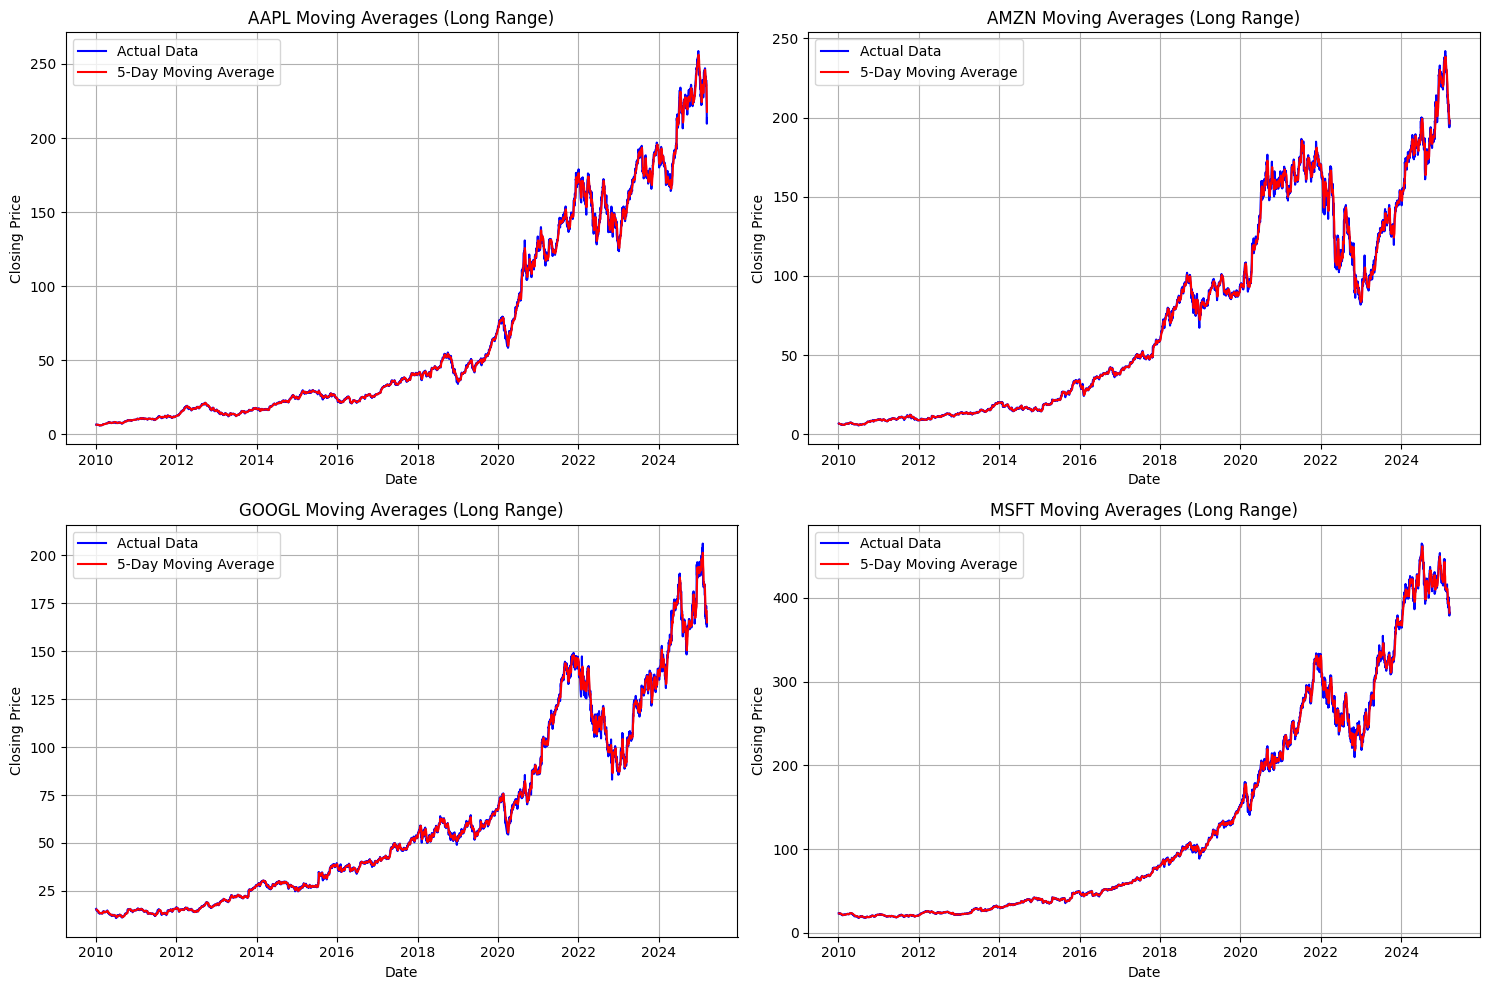

In [28]:
#Plot Moving Average Results with Actual Data

fig, axes = plt.subplots(2, 2, figsize=(15, 10)) #Create 2x2 subplot
axes = axes.flatten()

#Iterate and plot
for i, stock in enumerate(stocks):
    ax = axes[i]

    ax.plot(long_.index, long_[(stock, 'Close')].values, label='Actual Data', color='blue') 
    ax.plot(long_.index, long_[(stock, 'Moving Average')].values, label='5-Day Moving Average', color='red')
    
    ax.set_title(f"{stock} Moving Averages (Long Range)")
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.legend()
    ax.grid()

#Adjust layout and show the plot
plt.tight_layout()
plt.show()

### **Return**

In [29]:
#Calculate different returns 

#Calculate and add Return column to the data frame
for stock in stocks:
    short_[(stock, 'Return')] = short_[(stock, 'Close')].pct_change() #Bi-Minute Return
    medium_[(stock, 'Return')] = medium_[(stock, 'Close')].pct_change() #Hourly Return
    long_[(stock, 'Return')] = long_[(stock, 'Close')].pct_change() #Daily Return 

#### *Short Range Stocks Return*

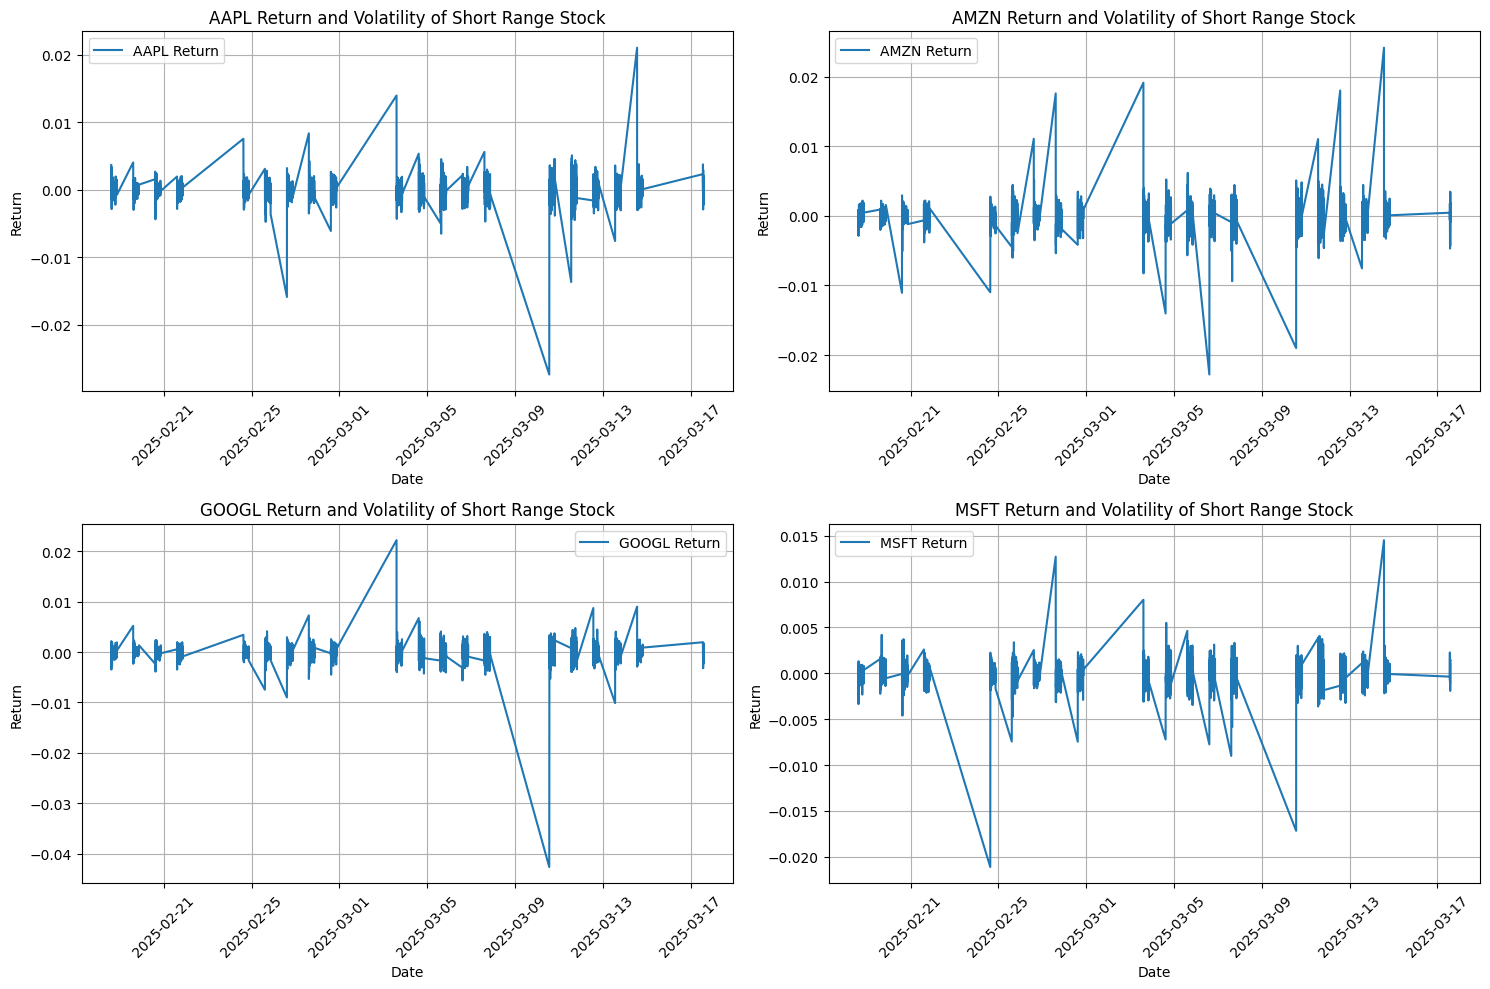

In [30]:
##lot Return for short range stocks

fig, axes = plt.subplots(2, 2, figsize=(15, 10))  #Create 2x2 subplots
axes = axes.flatten()

for i, stock in enumerate(stocks): #Iteration over stocks
    ax = axes[i]

    #Plot Return
    ax.plot(short_[(stock, 'Return')], label=f'{stock} Return')
    
    ax.set_title(f'{stock} Return and Volatility of Short Range Stock')
    ax.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Return')
    ax.legend()
    ax.grid()

#Adjust layout and show plot
plt.tight_layout()
plt.show()

#### *Medium Range Stocks Return*

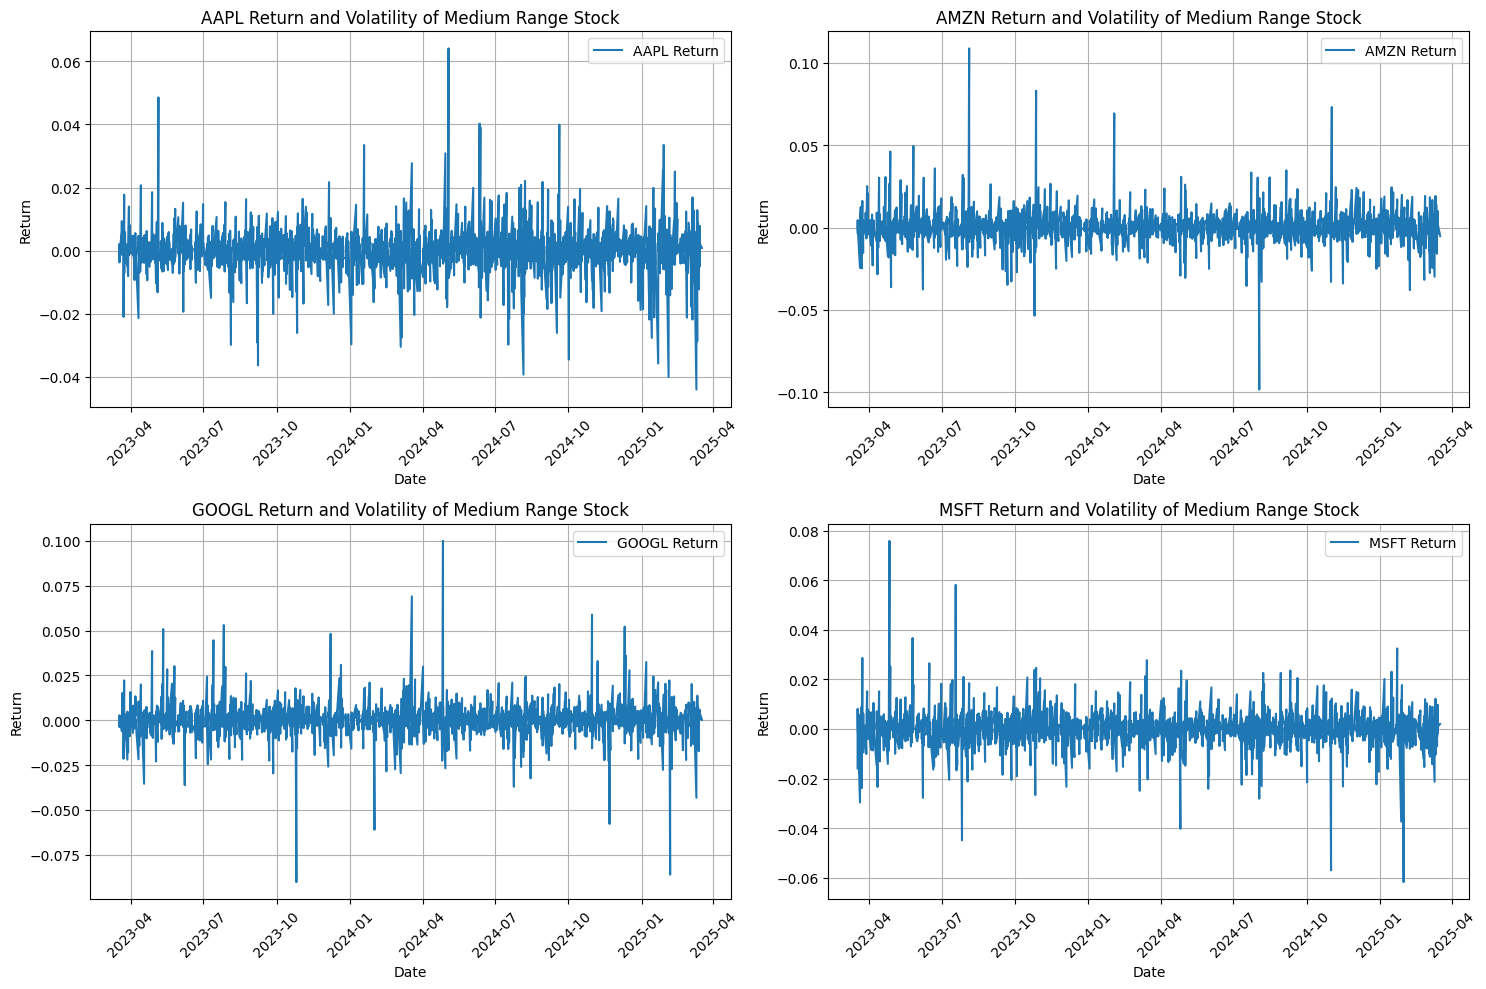

In [31]:
#Plot Return for medium range stocks

fig, axes = plt.subplots(2, 2, figsize=(15, 10))  #Create 2x2 subplots
axes = axes.flatten()

for i, stock in enumerate(stocks): #Iteration over stocks
    ax = axes[i]

    #Plot Return
    ax.plot(medium_[(stock, 'Return')], label=f'{stock} Return')

    ax.set_title(f'{stock} Return and Volatility of Medium Range Stock')
    ax.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Return')
    ax.legend()
    ax.grid()

#Adjust layout and show plot
plt.tight_layout()
plt.show()

#### *Long Range Stocks Return*

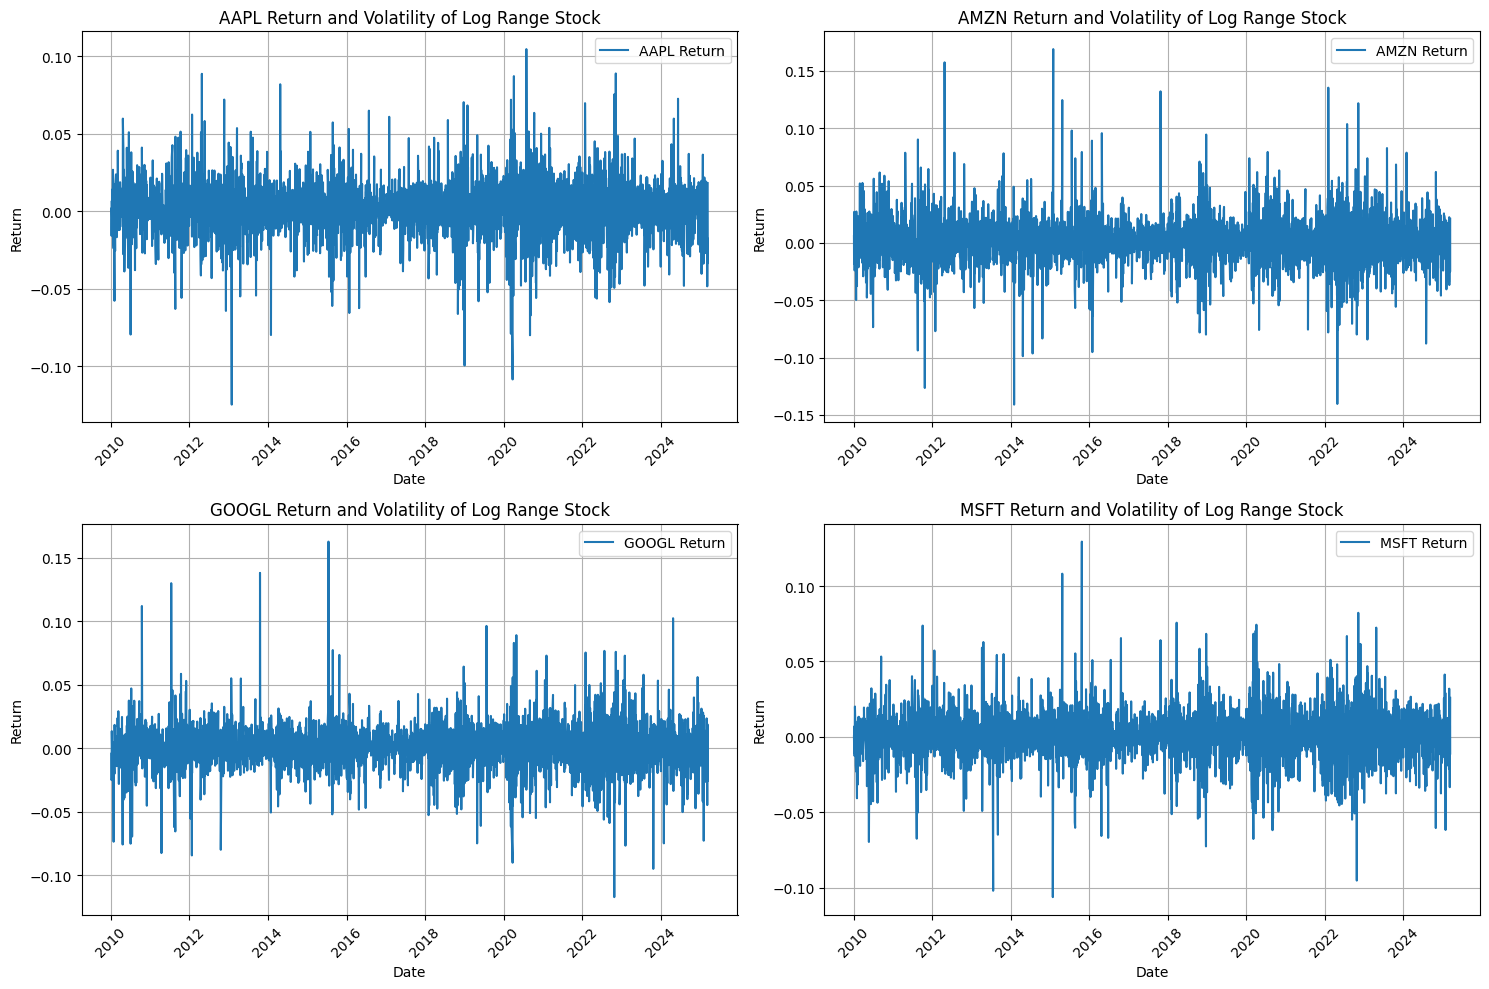

In [32]:
#Plot Return for long range stocks

fig, axes = plt.subplots(2, 2, figsize=(15, 10))  #Create 2x2 subplots
axes = axes.flatten()

for i, stock in enumerate(stocks): #Iteration over stocks
    ax = axes[i]

    #Plot Return
    ax.plot(long_[(stock, 'Return')], label=f'{stock} Return')

    ax.set_title(f'{stock} Return and Volatility of Log Range Stock')
    ax.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Return')
    ax.legend()
    ax.grid()

#Adjust layout and show plot
plt.tight_layout()
plt.show()

### **Price Volatalities**

In [33]:
for stock in stocks:
    short_[(stock, 'Volatility')] = short_[(stock, 'Close')].rolling(window=5).std()
    medium_[(stock, 'Volatility')] = medium_[(stock, 'Close')].rolling(window=8).std()
    long_[(stock, 'Volatility')] = long_[(stock, 'Close')].rolling(window=15).std()

#### *Short Range Stocks Volatility*

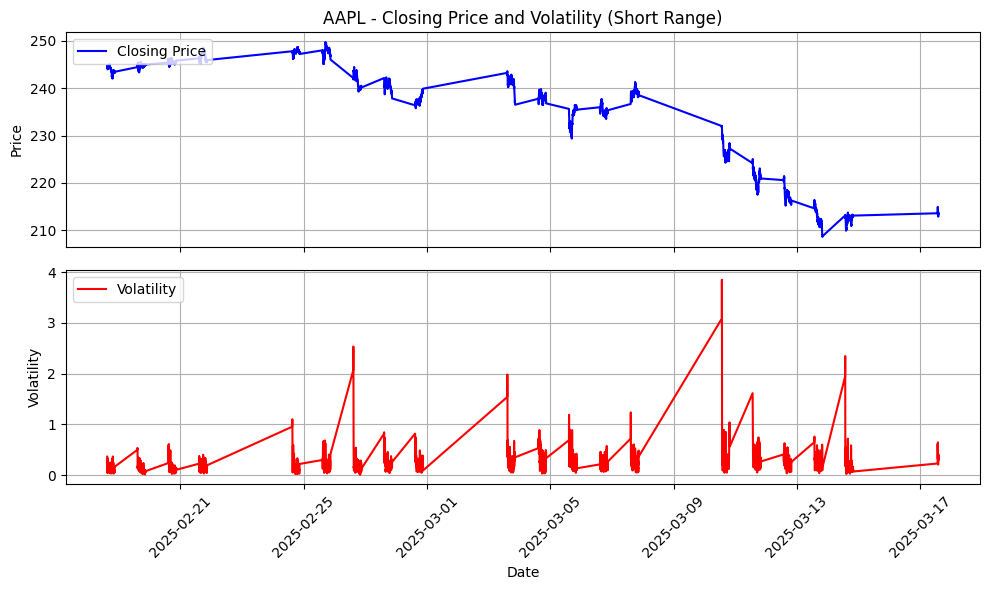

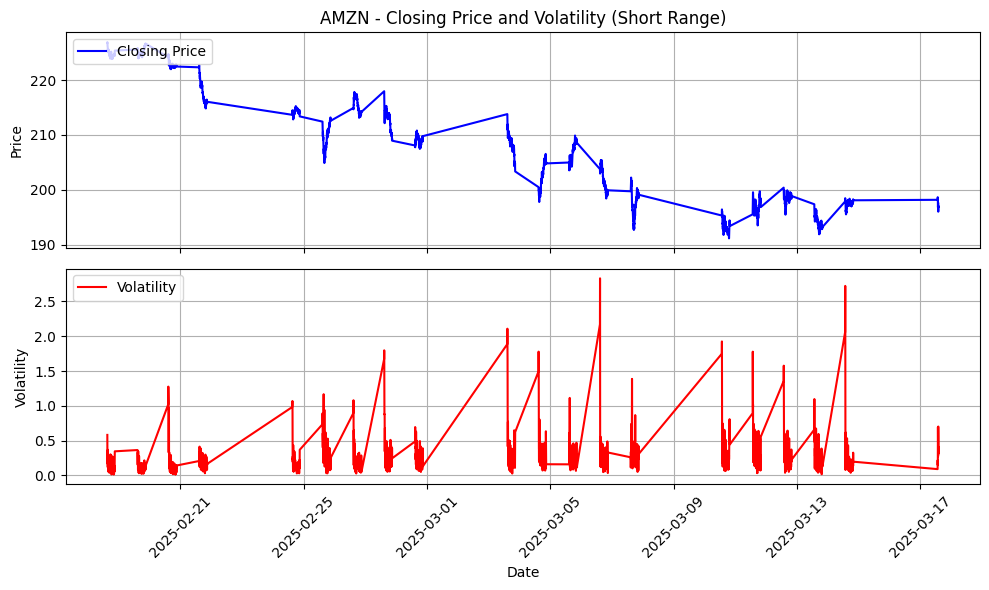

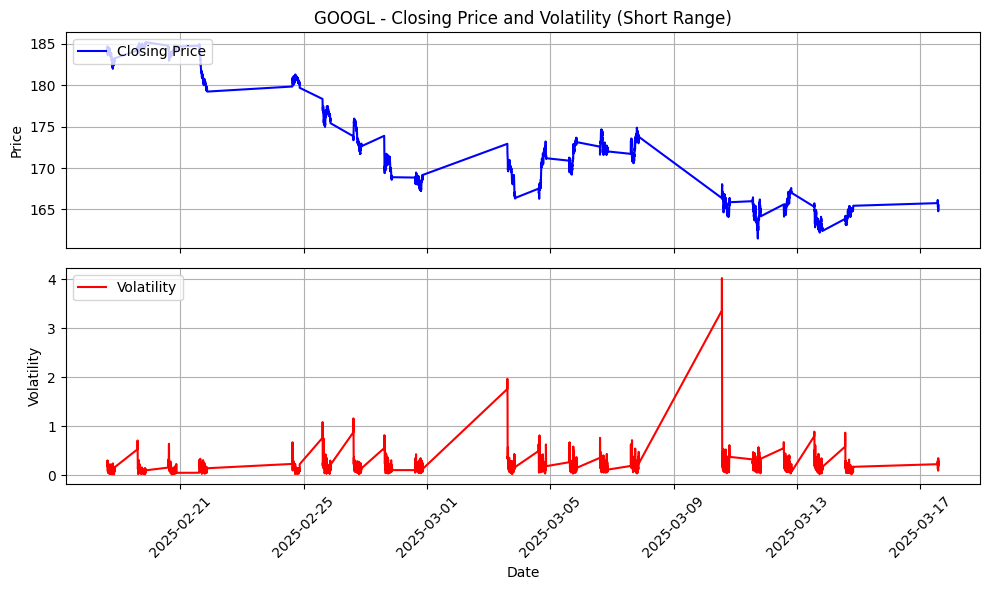

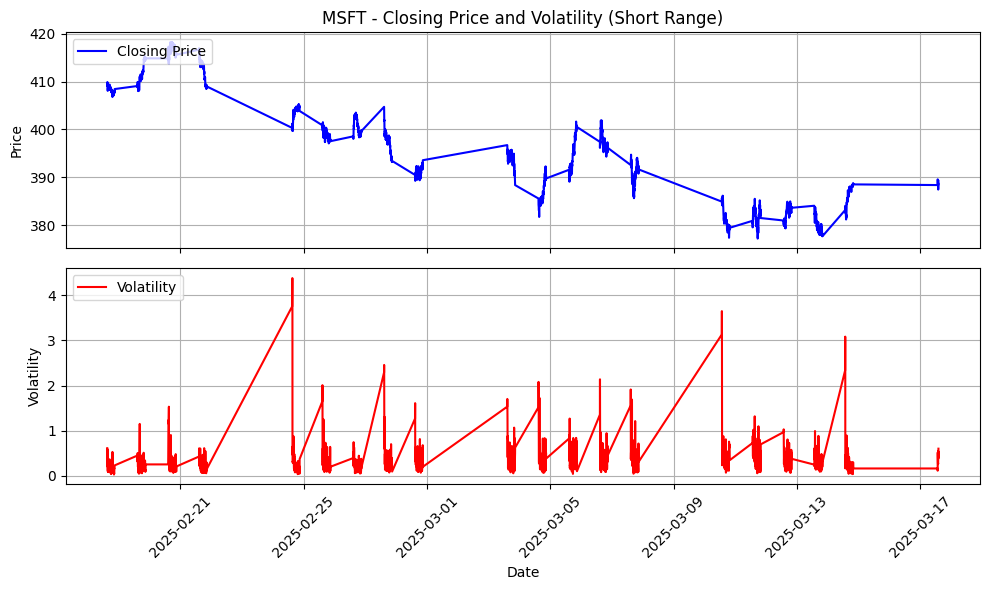

In [130]:
#Function to plot closing price and volatility in short range
def plot_short_volatility(data, stock_ticker):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    #Plot Closing Price
    ax1.plot(data.index, data[(stock_ticker, 'Close')], label='Closing Price', color='blue')
    ax1.set_ylabel('Price')
    ax1.set_title(f'{stock_ticker} - Closing Price and Volatility (Short Range)')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    #Plot Volatility
    ax2.plot(data.index, data[(stock_ticker, 'Volatility')], label='Volatility', color='red')
    ax2.set_ylabel('Volatility')
    ax2.set_xlabel('Date')
    ax2.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
    ax2.legend(loc='upper left')
    ax2.grid(True)

    #Adjust layout and show plot
    plt.tight_layout()
    plt.show()

#Function call
for stock in stocks:
    plot_short_volatility(short_, stock)

#### *Medium Range Stocks Volatility*

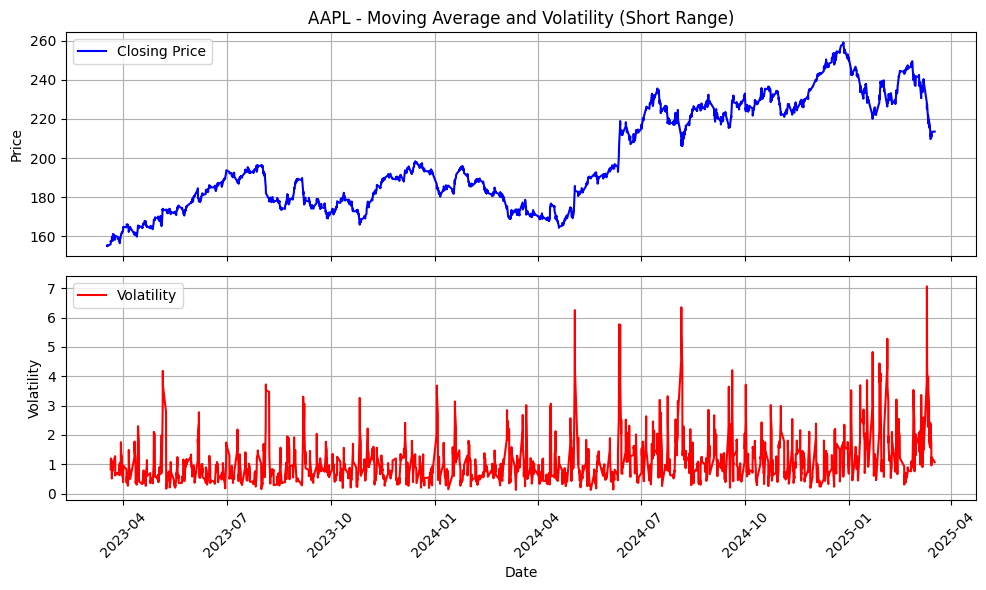

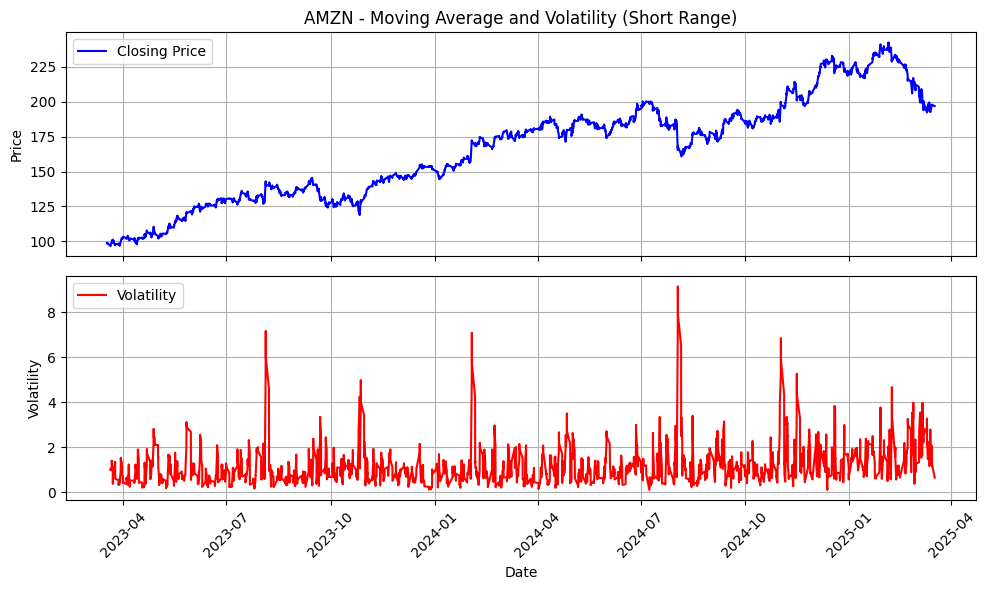

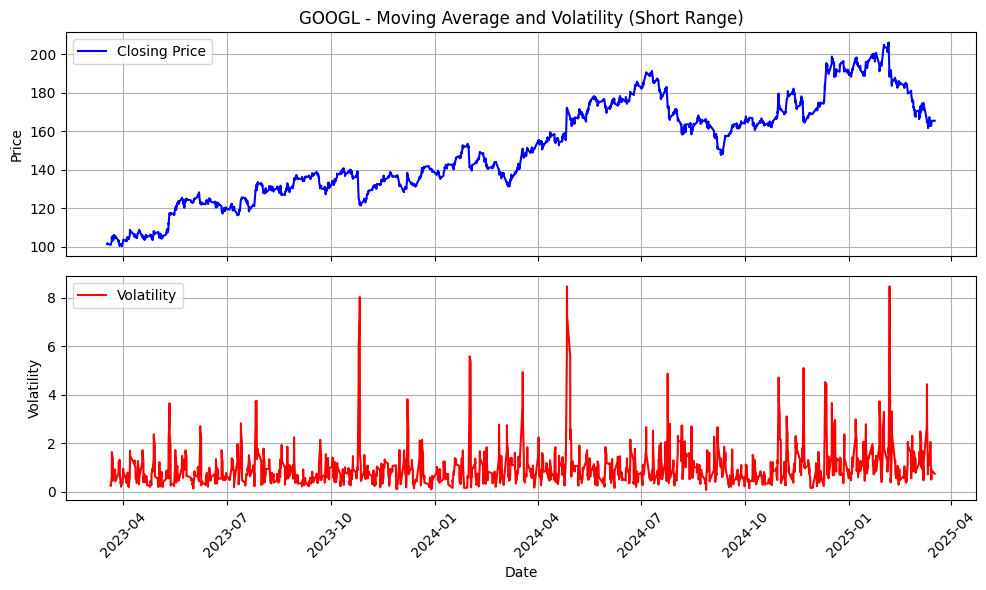

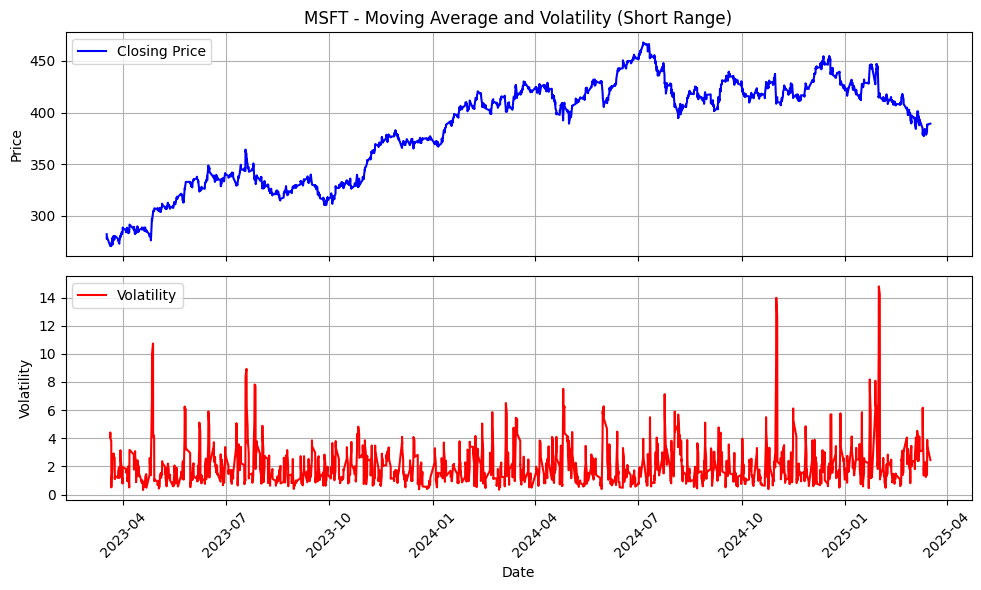

In [35]:
#Function to plot closing price and volatility in medium range
def plot_medium_volatility(data, stock_ticker):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    #Plot Moving Average
    ax1.plot(data.index, data[(stock_ticker, 'Close')], label='Closing Price', color='blue')
    ax1.set_ylabel('Price')
    ax1.set_title(f'{stock_ticker} - Moving Average and Volatility (Medium Range)')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    #Plot Volatility
    ax2.plot(data.index, data[(stock_ticker, 'Volatility')], label='Volatility', color='red')
    ax2.set_ylabel('Volatility')
    ax2.set_xlabel('Date')
    ax2.legend(loc='upper left')
    ax2.grid(True)

    #Adjust layout and show plot
    plt.tight_layout()
    plt.show()

#Function call
for stock in stocks:
    plot_short_volatility(medium_, stock)

#### *Long Range Stocks Volatility*

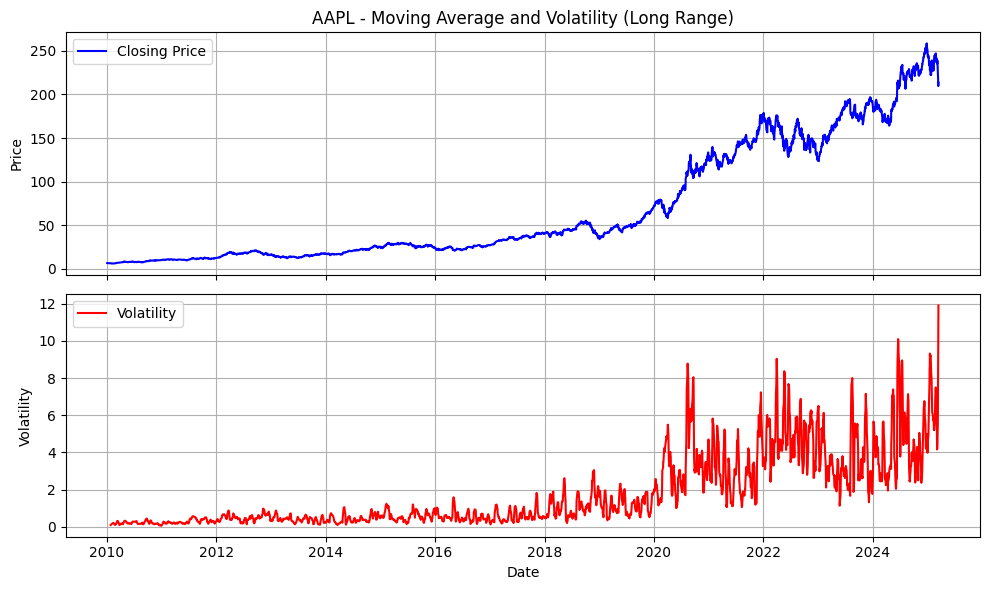

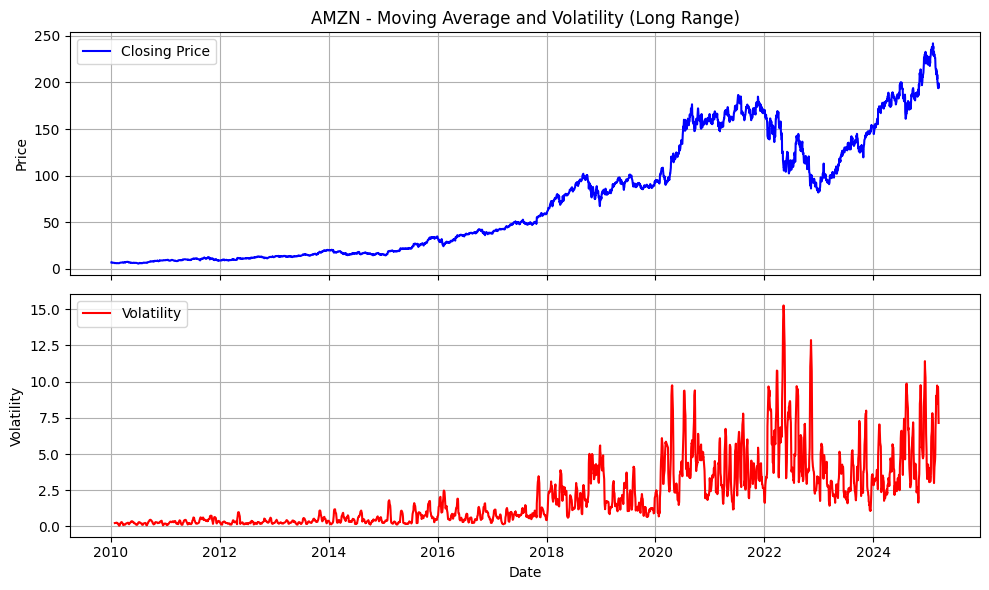

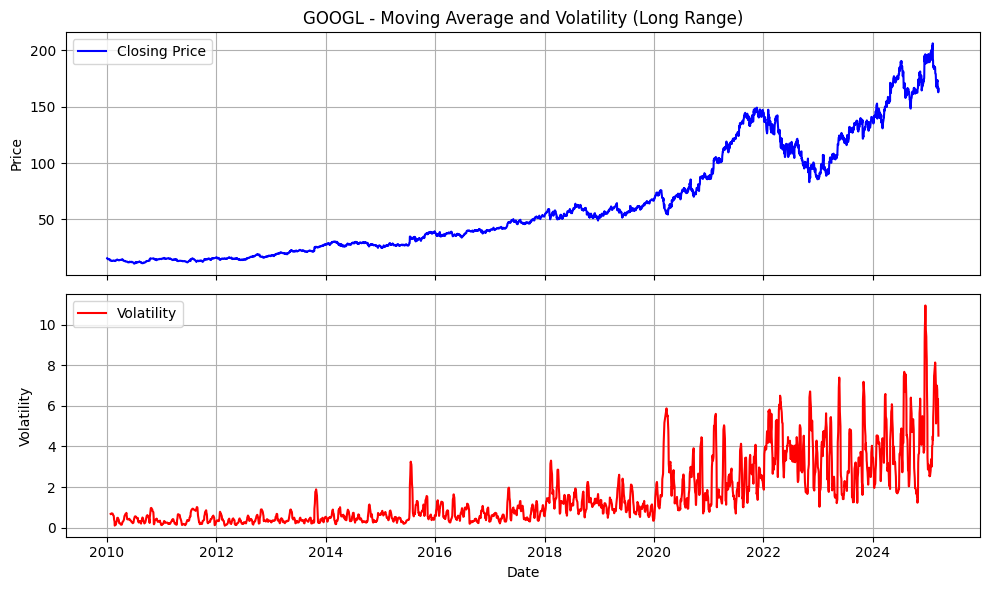

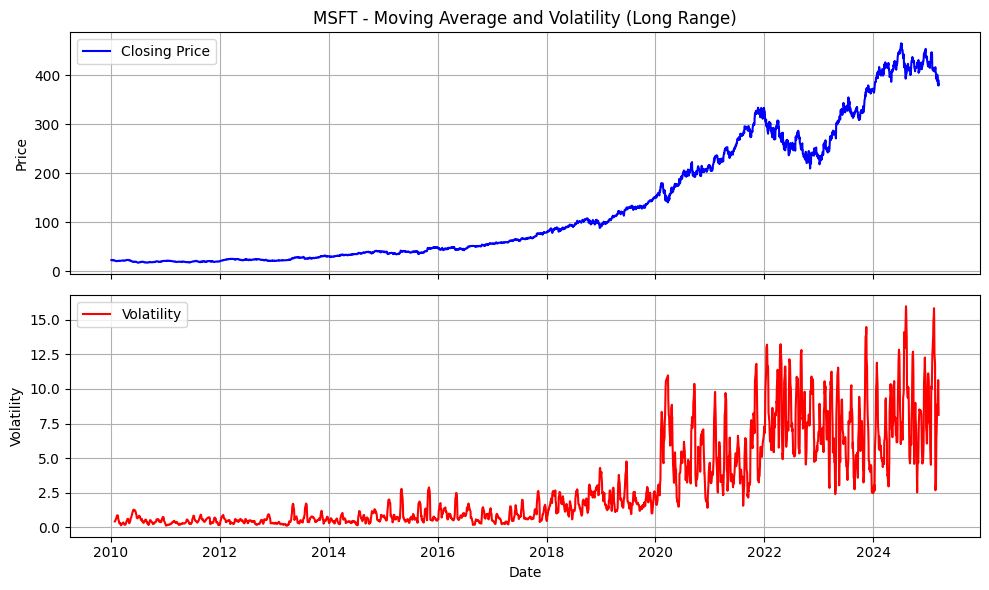

In [36]:
#Function to plot closing price and volatility in long range
def plot_short_volatility(data, stock_ticker):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    #Plot Moving Average
    ax1.plot(data.index, data[(stock_ticker, 'Close')], label='Closing Price', color='blue')
    ax1.set_ylabel('Price')
    ax1.set_title(f'{stock_ticker} - Moving Average and Volatility (Long Range)')
    ax1.legend(loc='upper left')
    ax1.grid(True)

    #Plot Volatility
    ax2.plot(data.index, data[(stock_ticker, 'Volatility')], label='Volatility', color='red')
    ax2.set_ylabel('Volatility')
    ax2.set_xlabel('Date')
    ax2.legend(loc='upper left')
    ax2.grid(True)

    #Adjust layout and show plot
    plt.tight_layout()
    plt.show()

#Function call
for stock in stocks:
    plot_short_volatility(long_, stock)

Pair Plots of Close Price in different stock ranges

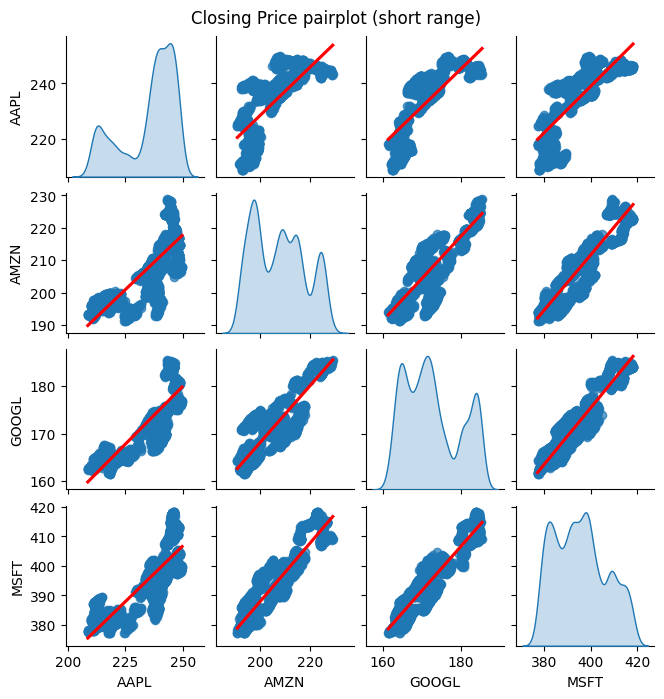

In [37]:
#Closing stock price Pair Plot (short range)

#Swap level and drop the first index from the DataFrame for a cleaner pairplot and drop empty data sets
plot_short_close=short_close.swaplevel(0, 1, axis=1).droplevel(0, axis=1).dropna()

# Plot pairplot using the extracted columns
sns.pairplot(plot_short_close, kind='reg', diag_kind='kde', height=1.7,
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.7}})

plt.suptitle('Closing Price pairplot (short range)', y=1.02) #Title and its relative position
plt.show()

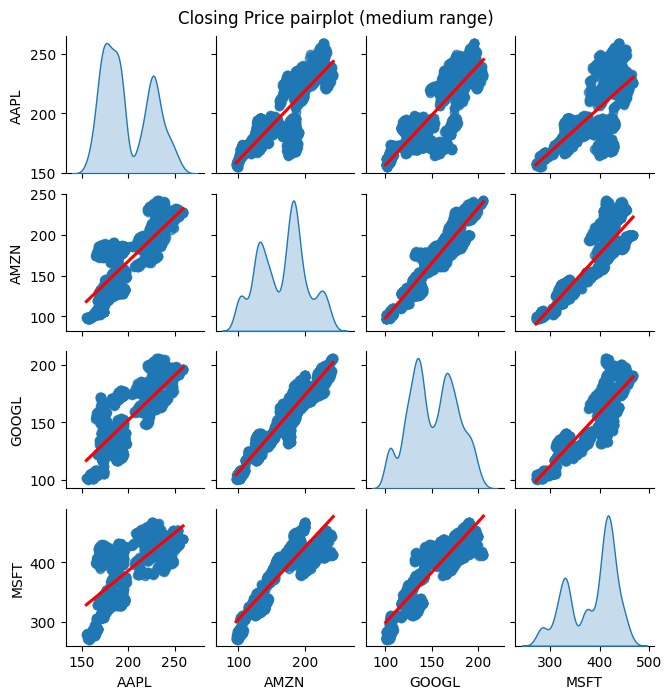

In [38]:
#Closing stock price Pair Plot (medium range)

#Swap level and drop the first index from the DataFrame for a cleaner pairplot and drop empty data sets
plot_medium_close=medium_close.swaplevel(0, 1, axis=1).droplevel(0, axis=1).dropna()

# Plot pairplot using the extracted columns
sns.pairplot(plot_medium_close, kind='reg', diag_kind='kde', height=1.7,
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.7}})

plt.suptitle('Closing Price pairplot (medium range)', y=1.02) #Title and its relative position
plt.show()

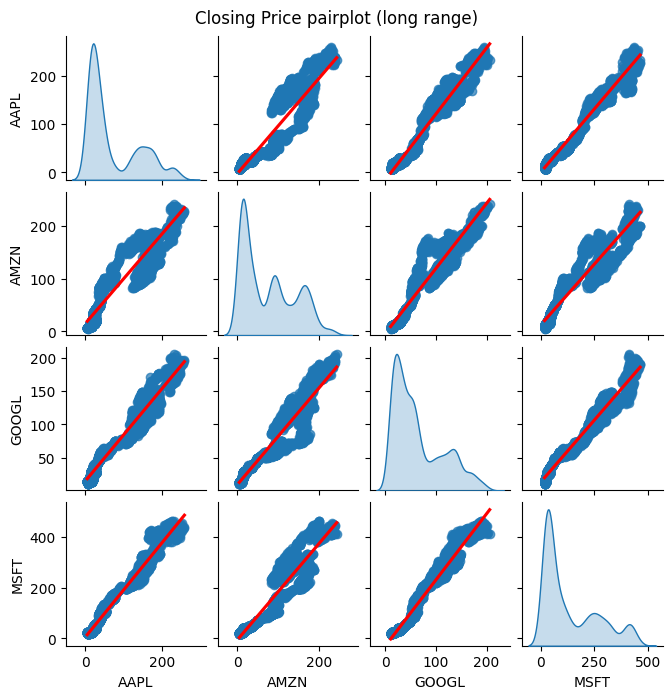

In [39]:
#Closing stock price Pair Plot (long range)

#Swap level and drop the first index from the DataFrame for a cleaner pairplot and drop empty data sets
plot_long_close=long_close.swaplevel(0, 1, axis=1).droplevel(0, axis=1).dropna()

# Plot pairplot using the extracted columns
sns.pairplot(plot_long_close, kind='reg', diag_kind='kde', height=1.7,
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'alpha':0.7}})

plt.suptitle('Closing Price pairplot (long range)', y=1.02) #Title and its relative position
plt.show()

In [40]:
#Sort newly added columns
short_=short_.sort_index(level=0, axis=1)
medium_=medium_.sort_index(level=0, axis=1)
long_=long_.sort_index(level=0, axis=1)

## **Model Selection**

In [41]:
#Prepared list for model selection  
#Short range 
short_ = short_.dropna()  #drop NAN values
short_df= short_.copy()   #copy DataFrame
short_stock_data_list = [short_df[(stock, 'Moving Average')] for stock in stocks]

#Medium range 
medium_ = medium_.dropna()  #drop NAN values
medium_df= medium_.copy() #copy DataFrame
medium_stock_data_list = [medium_df[(stock, 'Moving Average')] for stock in stocks]

#long range 
long_ = long_.dropna()  #drop NAN values
long_df = long_.copy()  #copy DataFrame
long_stock_data_list = [long_df[(stock, 'Moving Average')] for stock in stocks]

### *Short Range Stocks Model Selection*

#### **ARIMA**

In [42]:
#Autoregressive Integrated Moving Average (ARIMA) Model Forecasting

#Create function to fit auto-arima
#function is used for all ranges
def fit_arima(train_stock_data):
    model = auto_arima(train_stock_data, max_p= 2, max_d= 2, max_q= 2,
                       trace=False,  #To increase execution speed
                       error_action="ignore", suppress_warnings=True,
                       random_state = 42) #Set the seed value for reproducibility
    return model.fit(train_stock_data)

##### **AAPL**

In [43]:
#short range AAPL stock price prediction with ARIMA model
short_arima_AAPL_results = {}  #Empty dictionary to store ARIMA results for AAPL stock

#short range AAPL data
short_AAPL_data = short_df[('AAPL', 'Moving Average')]

#Split data into train and test sets
size = int(len(short_AAPL_data) * 0.8)
train_short_AAPL, test_short_AAPL = short_AAPL_data[:size], short_AAPL_data[size:]  #80/20 data split

history = [x for x in train_short_AAPL]  
predictions_short_AAPL = []

#Fit the ARIMA model
fitted_model = fit_arima(train_short_AAPL) 
print (fitted_model.summary())
print() #adds space 

#Walk-forward validation
for t in range(len(test_short_AAPL)):
    model = ARIMA(history, order=fitted_model.order)
    model_fit = model.fit(method_kwargs={'warn_convergence': False}, low_memory=True) #To address convergence issues
    output = model_fit.forecast()

    #Generate a prediction
    yhat = output[0]
    predictions_short_AAPL.append(yhat)

    #Add the actual observation to the history
    obs = test_short_AAPL.iloc[t]  
    history.append(obs)

#Evaluate the model
print('ARIMA rolling forecast model evaluation for AAPL stock in short range period')

rmse = sqrt(mean_squared_error(test_short_AAPL, predictions_short_AAPL))
print(f'RMSE: {rmse:.5f}')#rounded to five decimal place

mae = mean_absolute_error(test_short_AAPL, predictions_short_AAPL)
print(f'MAE: {mae:.5f}')

r2 = r2_score(test_short_AAPL, predictions_short_AAPL)
print(f'R-squared: {r2:.2f}')#rounded to two decimal place

#Store results
short_arima_AAPL_results = {'train_short_AAPL': train_short_AAPL, 
                           'test_short_AAPL': test_short_AAPL, 
                           'predictions_short_AAPL': predictions_short_AAPL}

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2742
Model:               SARIMAX(1, 2, 0)   Log Likelihood                5776.963
Date:                Mon, 17 Mar 2025   AIC                         -11549.926
Time:                        17:28:07   BIC                         -11538.095
Sample:                             0   HQIC                        -11545.651
                               - 2742                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0376      0.014      2.674      0.007       0.010       0.065
sigma2         0.0009   5.06e-06    170.644      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.00   Jarque-

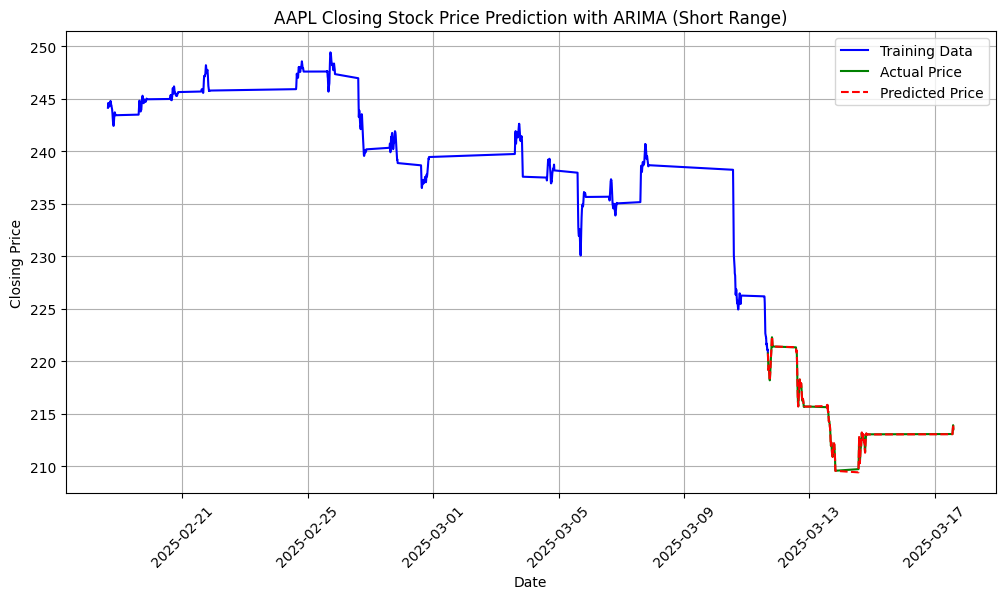

In [44]:
#Plot ARIMA rolling forecast line plot for short range AAPL stocks

#Get data from the above cell
train_short_AAPL = short_arima_AAPL_results['train_short_AAPL']
test_short_AAPL = short_arima_AAPL_results['test_short_AAPL']
predictions_short_AAPL = short_arima_AAPL_results['predictions_short_AAPL']

#Create plot
fig = plt.figure(figsize=(12, 6)) #Create a Matplotlib figure and axes
plt.plot(train_short_AAPL.index, train_short_AAPL.values, label='Training Data', color = 'Blue')
plt.plot(test_short_AAPL.index, test_short_AAPL.values, label='Actual Price', color = 'Green')
plt.plot(test_short_AAPL.index, predictions_short_AAPL, label='Predicted Price', color = 'Red',
         linestyle='--')

plt.title('AAPL Closing Stock Price Prediction with ARIMA (Short Range)')
plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()

plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
short_AAPL_ARIMA_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

##### **AMZN**

In [45]:
#short range AMZN stock price prediction with ARIMA model
short_arima_AMZN_results = {}  #Empty dictionary to store ARIMA results for AMZN stock

#short range AMZN data
short_AMZN_data = short_df[('AMZN', 'Moving Average')]

#Split data into train and test sets
size = int(len(short_AMZN_data) * 0.8)
train_short_AMZN, test_short_AMZN = short_AMZN_data[:size], short_AMZN_data[size:]  #80/20 data split
history = [x for x in train_short_AMZN]  
predictions_short_AMZN = []

#Fit the ARIMA model
fitted_model = fit_arima(train_short_AMZN) 
print (fitted_model.summary())
print() #adds space 

#Walk-forward validation
for t in range(len(test_short_AMZN)):
    model = ARIMA(history, order=fitted_model.order)
    model_fit = model.fit(method_kwargs={'warn_convergence': False}, low_memory=True) #To address convergence issues
    output = model_fit.forecast()

    #Generate a prediction
    yhat = output[0]
    predictions_short_AMZN.append(yhat)

    #Add the actual observation to the history
    obs = test_short_AMZN.iloc[t]  
    history.append(obs)

#Evaluate the model
print('ARIMA rolling forecast model evaluation for AMZN stock in short range period')

rmse = sqrt(mean_squared_error(test_short_AMZN, predictions_short_AMZN))
print(f'RMSE: {rmse:.5f}')#rounded to five decimal place

mae = mean_absolute_error(test_short_AMZN, predictions_short_AMZN)
print(f'MAE: {mae:.5f}')

r2 = r2_score(test_short_AMZN, predictions_short_AMZN)
print(f'R-squared: {r2:.2f}')#rounded to two decimal place

#Store results
short_arima_AMZN_results = {'train_short_AMZN': train_short_AMZN, 
                           'test_short_AMZN': test_short_AMZN, 
                           'predictions_short_AMZN': predictions_short_AMZN}

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2742
Model:               SARIMAX(2, 1, 1)   Log Likelihood                5680.847
Date:                Mon, 17 Mar 2025   AIC                         -11353.693
Time:                        17:32:02   BIC                         -11330.029
Sample:                             0   HQIC                        -11345.142
                               - 2742                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8411      0.041     44.439      0.000       1.760       1.922
ar.L2         -0.8523      0.038    -22.214      0.000      -0.928      -0.777
ma.L1         -0.8634      0.047    -18.383      0.0

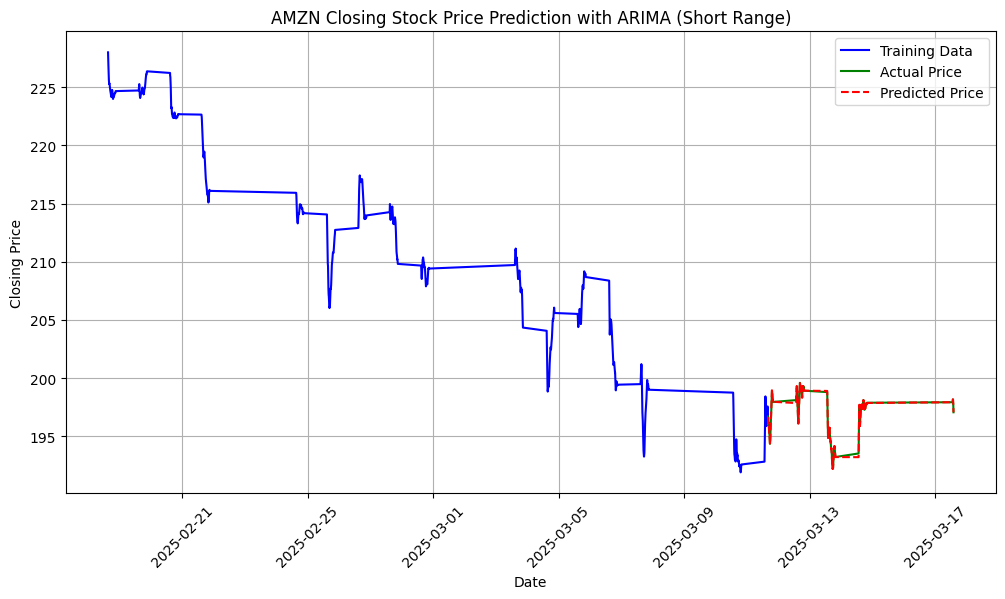

In [46]:
#Plot ARIMA rolling forecast line plot for short range AMZN stocks

#Get data from the above cell
train_short_AMZN = short_arima_AMZN_results['train_short_AMZN']
test_short_AMZN = short_arima_AMZN_results['test_short_AMZN']
predictions_short_AMZN = short_arima_AMZN_results['predictions_short_AMZN']

#Create plot
fig = plt.figure(figsize=(12, 6))
plt.plot(train_short_AMZN.index, train_short_AMZN.values, label='Training Data', color = 'Blue')
plt.plot(test_short_AMZN.index, test_short_AMZN.values, label='Actual Price', color = 'Green')
plt.plot(test_short_AMZN.index, predictions_short_AMZN, label='Predicted Price', color = 'Red', 
         linestyle='--')

plt.title('AMZN Closing Stock Price Prediction with ARIMA (Short Range)')
plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()


plt.show()
#Convert Matplotlib figure to Plotly figure for dashboard
short_AMZN_ARIMA_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

##### **GOOGL**

In [47]:
#short range GOOGL stock price prediction with ARIMA model
short_arima_GOOGL_results = {}  #Empty dictionary to store ARIMA results for GOOGL stock

#short range GOOGL data
short_GOOGL_data = short_df[('GOOGL', 'Moving Average')]

#Split data into train and test sets
size = int(len(short_GOOGL_data) * 0.8)
train_short_GOOGL, test_short_GOOGL = short_GOOGL_data[:size], short_GOOGL_data[size:]  #80/20 data split
history = [x for x in train_short_GOOGL]  
predictions_short_GOOGL = []

#Fit the ARIMA model
fitted_model = fit_arima(train_short_GOOGL) 
print (fitted_model.summary())
print() #adds space 

#Walk-forward validation
for t in range(len(test_short_GOOGL)):
    model = ARIMA(history, order=fitted_model.order)
    model_fit = model.fit(method_kwargs={'warn_convergence': False}, low_memory=True) #To address convergence issues
    output = model_fit.forecast()

    #Generate a prediction
    yhat = output[0]
    predictions_short_GOOGL.append(yhat)

    #Add the actual observation to the history
    obs = test_short_GOOGL.iloc[t]  
    history.append(obs)

#Evaluate the model
print('ARIMA rolling forecast model evaluation for GOOGL stock in short range period')

rmse = sqrt(mean_squared_error(test_short_GOOGL, predictions_short_GOOGL))
print(f'RMSE: {rmse:.5f}')#rounded to five decimal place

mae = mean_absolute_error(test_short_GOOGL, predictions_short_GOOGL)
print(f'MAE: {mae:.5f}')

r2 = r2_score(test_short_GOOGL, predictions_short_GOOGL)
print(f'R-squared: {r2:.2f}')#rounded to two decimal place

#Store results
short_arima_GOOGL_results = {'train_short_GOOGL': train_short_GOOGL, 
                           'test_short_GOOGL': test_short_GOOGL, 
                           'predictions_short_GOOGL': predictions_short_GOOGL}

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2742
Model:               SARIMAX(2, 1, 0)   Log Likelihood                6331.965
Date:                Mon, 17 Mar 2025   AIC                         -12655.930
Time:                        17:36:27   BIC                         -12632.266
Sample:                             0   HQIC                        -12647.379
                               - 2742                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0007      0.001     -1.269      0.205      -0.002       0.000
ar.L1          0.9673      0.018     53.411      0.000       0.932       1.003
ar.L2         -0.0513      0.018     -2.784      0.0

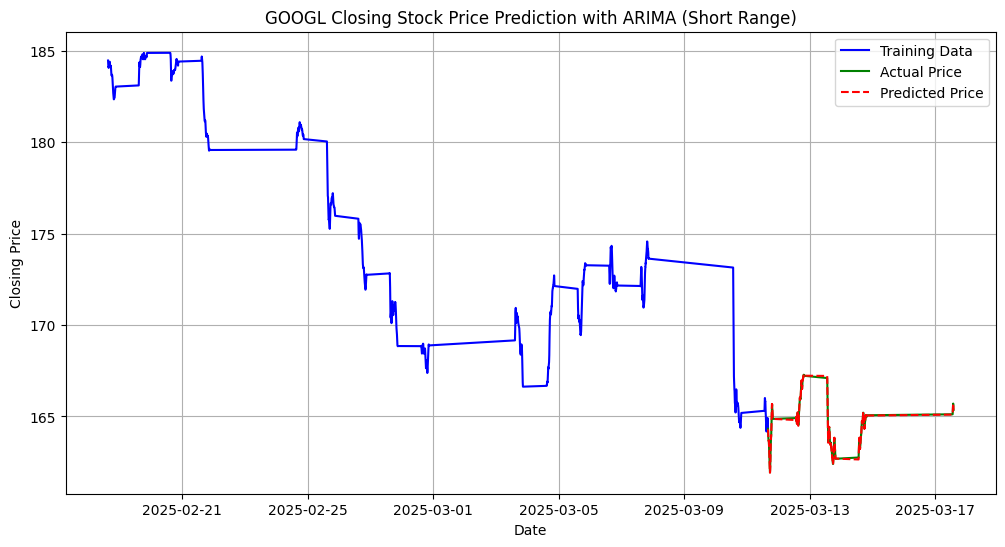

In [48]:
#Plot ARIMA rolling forecast line plot for short range GOOGL stocks

#Get data from the above cell
train_short_GOOGL = short_arima_GOOGL_results['train_short_GOOGL']
test_short_GOOGL = short_arima_GOOGL_results['test_short_GOOGL']
predictions_short_GOOGL = short_arima_GOOGL_results['predictions_short_GOOGL']

#Create plot
fig = plt.figure(figsize=(12, 6))
plt.plot(train_short_GOOGL.index, train_short_GOOGL.values, label='Training Data', color = 'Blue')
plt.plot(test_short_GOOGL.index, test_short_GOOGL.values, label='Actual Price', color = 'Green')
plt.plot(test_short_GOOGL.index, predictions_short_GOOGL, label='Predicted Price', color = 'Red', 
         linestyle='--')

plt.title('GOOGL Closing Stock Price Prediction with ARIMA (Short Range)')
ax.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()

plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
short_GOOGL_ARIMA_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

##### **MSFT**

In [49]:
#short range MSFT stock price prediction with ARIMA model
short_arima_MSFT_results = {}  #Empty dictionary to store ARIMA results for MSFT stock

#short range MSFT data
short_MSFT_data = short_df[('MSFT', 'Moving Average')]

#Split data into train and test sets
size = int(len(short_MSFT_data) * 0.8)
train_short_MSFT, test_short_MSFT = short_MSFT_data[:size], short_MSFT_data[size:]  #80/20 data split
history = [x for x in train_short_MSFT]  
predictions_short_MSFT = []

#Fit the ARIMA model
fitted_model = fit_arima(train_short_MSFT) 
print (fitted_model.summary())
print() #adds space 

#Walk-forward validation
for t in range(len(test_short_MSFT)):
    model = ARIMA(history, order=fitted_model.order)
    model_fit = model.fit(method_kwargs={'warn_convergence': False}, low_memory=True) #To address convergence issues
    output = model_fit.forecast()

    #Generate a prediction
    yhat = output[0]
    predictions_short_MSFT.append(yhat)

    #Add the actual observation to the history
    obs = test_short_MSFT.iloc[t]  
    history.append(obs)

#Evaluate the model
print('ARIMA rolling forecast model evaluation for MSFT stock in short range period')

rmse = sqrt(mean_squared_error(test_short_MSFT, predictions_short_MSFT))
print(f'RMSE: {rmse:.5f}')#rounded to five decimal place

mae = mean_absolute_error(test_short_MSFT, predictions_short_MSFT)
print(f'MAE: {mae:.5f}')

r2 = r2_score(test_short_MSFT, predictions_short_MSFT)
print(f'R-squared: {r2:.2f}')#rounded to two decimal place

#Store results
short_arima_MSFT_results = {'train_short_MSFT': train_short_MSFT, 
                           'test_short_MSFT': test_short_MSFT, 
                           'predictions_short_MSFT': predictions_short_MSFT}

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2742
Model:               SARIMAX(2, 1, 0)   Log Likelihood                4722.546
Date:                Mon, 17 Mar 2025   AIC                          -9439.091
Time:                        17:38:40   BIC                          -9421.343
Sample:                             0   HQIC                         -9432.678
                               - 2742                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9528      0.016     59.002      0.000       0.921       0.984
ar.L2         -0.0294      0.016     -1.870      0.062      -0.060       0.001
sigma2         0.0019   1.39e-05    134.424      0.0

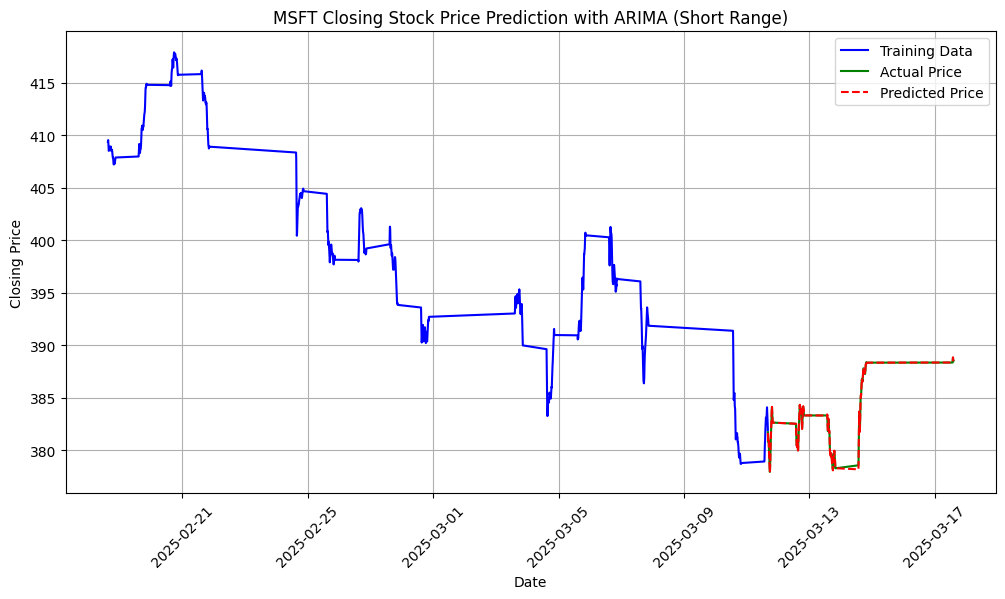

In [50]:
#Plot ARIMA rolling forecast line plot for short range MSFT stocks

#Get data from the above cell
train_short_MSFT = short_arima_MSFT_results['train_short_MSFT']
test_short_MSFT = short_arima_MSFT_results['test_short_MSFT']
predictions_short_MSFT = short_arima_MSFT_results['predictions_short_MSFT']

#Create plot
fig = plt.figure(figsize=(12, 6))
plt.plot(train_short_MSFT.index, train_short_MSFT.values, label='Training Data', color = 'Blue')
plt.plot(test_short_MSFT.index, test_short_MSFT.values, label='Actual Price', color = 'Green')
plt.plot(test_short_MSFT.index, predictions_short_MSFT, label='Predicted Price', color = 'Red', 
         linestyle='--')

plt.title('MSFT Closing Stock Price Prediction with ARIMA (Short Range)')
plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()

plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
short_MSFT_ARIMA_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

#### **LSTM**

In [51]:
#LSTM Forecasting for short range stocks

short_LSTM_results = [] #Empty list initialised to store short range stock lstm result

#Iterate through each stock in short_df
for i, stock in enumerate(stocks):
    stock_data = short_df[(stock, 'Moving Average')]

    #Split data into training and testing sets before MinMax fiting to avoid data bleeding
    size = int(len(stock_data) * 0.8)     #80/20 data split
    train_data, test_data = stock_data[:size], stock_data[size:]  
    
    #Create and fit a MinMaxScaler
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(train_data.values.reshape(-1, 1)) #transform and fit 
    scaled_data_test = scaler.transform(test_data.values.reshape(-1, 1)) #transform only (avoids data bleeding) 

    #Creat function that creates dataset with lookback period
    def create_dataset(dataset, look_back=1):
        X, Y = [], []  #previous lookback time step, value to be predicted
        for i in range(len(dataset) - look_back - 1):
            a = dataset[i:(i + look_back), 0]
            X.append(a)
            Y.append(dataset[i + look_back, 0])
        return np.array(X), np.array(Y)
    
    #Function call
    look_back=120 #(120x2) 240 minutes (4 hr)look back
    X_train, Y_train = create_dataset(scaled_data, look_back)
    X_test, Y_test = create_dataset(scaled_data_test, look_back)
    
    #Reshape input to be [samples, look_back, feature]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    #Create the LSTM model and compile the model
    model = Sequential()
    model.add(LSTM(units=64, input_shape=(look_back, X_train.shape[2]), return_sequences=True)) #First Layer
    model.add(LSTM(units=16)) #Second layer
    model.add(Dropout(0.2))  #To avoid overfitting
    model.add(Dense(1)) #Add 1 unit dense layer
    model.compile(loss='mean_squared_error', optimizer='adam')

    #Train the model
    model.fit(X_train, Y_train, epochs=100, batch_size=64, shuffle=False, verbose=0)
    
    #Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions) #Invert predictions to original scale
    Y_test = scaler.inverse_transform(Y_test.reshape(-1,1)) #Invert Y_test to original scale

    train_predictions = model.predict(X_train)
    train_predictions = scaler.inverse_transform(train_predictions) #Invert predictions to original scale
    Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1)) #Invert Y_test to original scale
    
    #Evaluate the model
    print(f'LSTM forecast model evaluation for {stock} in short range period')

    #Calculate Root Mean Squared Error 
    rmse = np.sqrt(mean_squared_error(Y_test, predictions))
    print(f'Test RMSE for {stock}: {rmse:.5f}') #rounded to five decimal place

    #Calculate Mean Absolute Error
    mae = mean_absolute_error(Y_test, predictions)
    print(f'Test MAE for {stock}: {mae:.5f}')

    #Calcualte R square
    r2 = r2_score(Y_test, predictions)
    print(f'Test R-squared for {stock}: {r2:.2f}') #rounded to two decimal place
    print('==////////////////////////////////////////////////////////////////////////////////////////////////////////////==')

    #Store predictions and actual values for plotting and model for finetuning
    short_LSTM_results.append({'stock': stock,
                               'predictions': predictions,
                               'actual': Y_test,
                               'X_train': X_train,
                               'X_test': X_test})

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step
LSTM forecast model evaluation for AAPL in short range period
Test RMSE for AAPL: 0.91097
Test MAE for AAPL: 0.75903
Test R-squared for AAPL: 0.87
==////////////////////////////////////////////////////////////////////////////////////////////////////////////==
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step
LSTM forecast model evaluation for AMZN in short range period
Test RMSE for AMZN: 0.25903
Test MAE for AMZN: 0.20435
Test R-squared for AMZN: 0.98
==////////////////////////////////////////////////////////////////////////////////////////////////////////////==
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
LSTM forecast model evaluation for GOOGL in short range period
Test RMSE for GOOGL: 0.18875
Test MAE for GOOGL: 0.13922
Test R-squared for GOOGL: 0.98
==///////////////////////////////////////////////////////////////////////////////////////

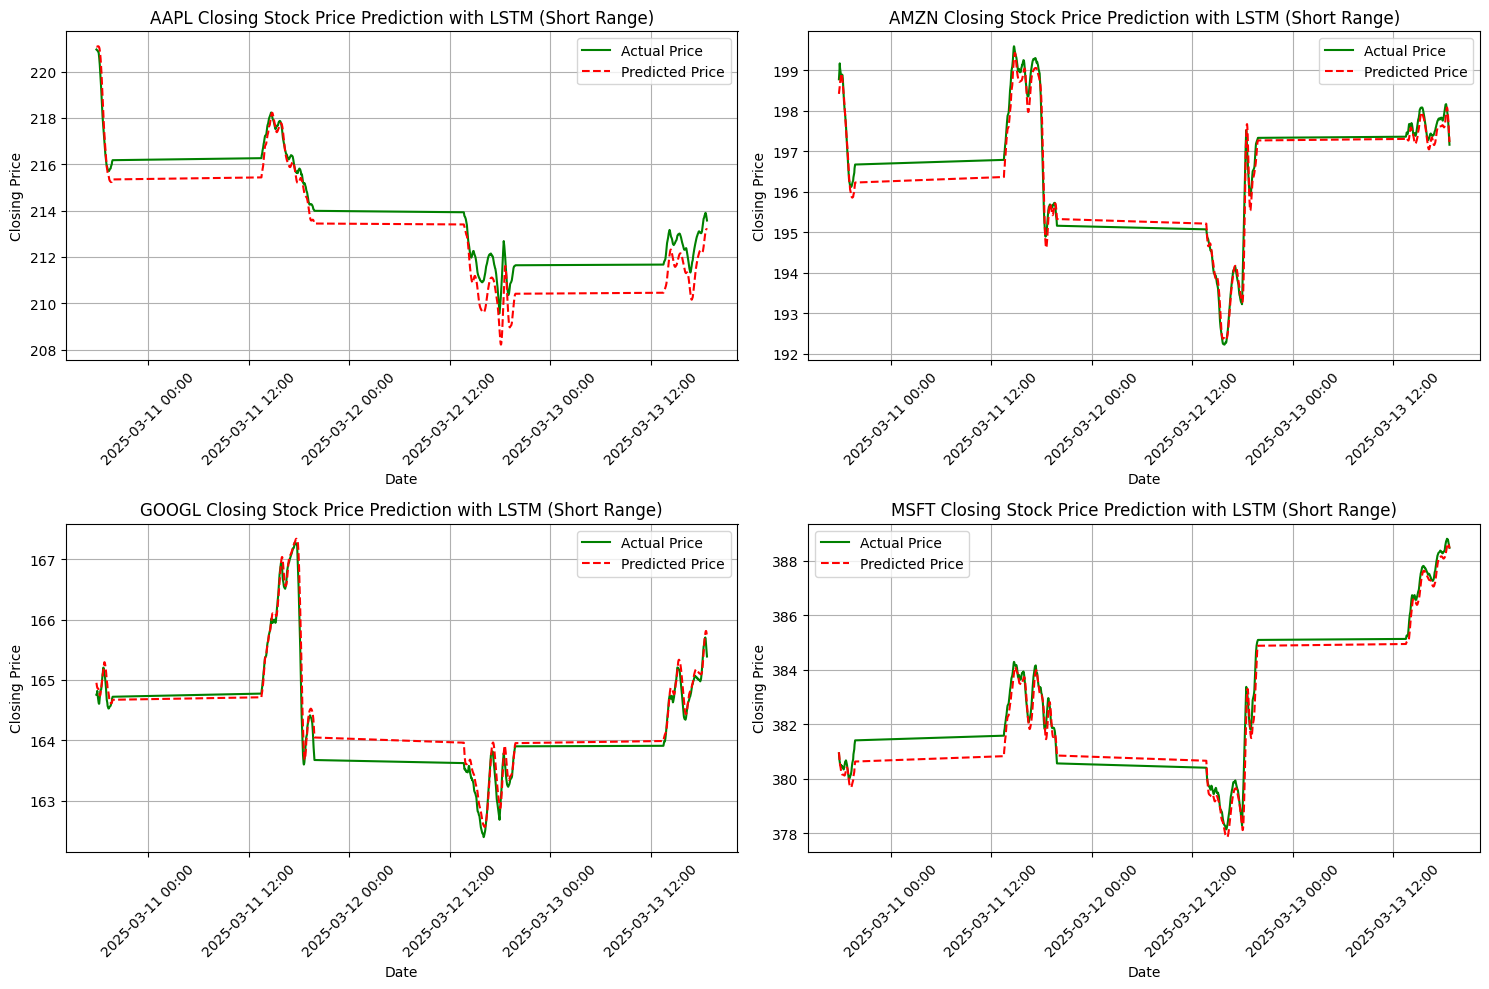

In [52]:
#Plot LSTM forecast line plot for short range stocks

fig, axes = plt.subplots(2, 2, figsize=(15, 10))  #Create subplots
axes = axes.flatten()

#Iterate through the results and plot for each stock
for i, result in enumerate(short_LSTM_results):
    stock = result['stock']
    predictions = result['predictions']
    test_data = result['actual'] 
    X_train = result['X_train']
    X_test = result['X_test']

    stock_data = short_df[(stock, 'Moving Average')]
      
    test_dates = stock_data.index[len(X_train) : len(X_train) + len(X_test)]

    #Create plot
    ax = axes[i]
    ax.plot(test_dates, test_data, label='Actual Price', color='green')
    ax.plot(test_dates, predictions, label='Predicted Price', color='red', linestyle='--')

    #Format x-axis ticks to show full hour
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M')) #Formatter for full hour

    ax.set_title(f'{stock} Closing Stock Price Prediction with LSTM (Short Range)')
    ax.tick_params(axis='x', rotation=45)  #Rotate x-axis labels for readability
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.legend()
    ax.grid()

#Adjust layout and show plot
plt.tight_layout()
plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
short_LSTM_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))
subplot_titles = [ax.get_title() for ax in axes]
  
#Access individual subplots' data and update layout (';' supresses plot from being displayed in the current output)
short_AAPL_LSTM_plotly_fig = go.Figure(data=[short_LSTM_plotly_fig.data[0], short_LSTM_plotly_fig.data[1]])
short_AAPL_LSTM_plotly_fig.update_layout(title_text=subplot_titles[0])

short_AMZN_LSTM_plotly_fig = go.Figure(data=[short_LSTM_plotly_fig.data[2], short_LSTM_plotly_fig.data[3]])
short_AMZN_LSTM_plotly_fig.update_layout(title_text=subplot_titles[1])

short_GOOGL_LSTM_plotly_fig = go.Figure(data=[short_LSTM_plotly_fig.data[4], short_LSTM_plotly_fig.data[5]])
short_GOOGL_LSTM_plotly_fig.update_layout(title_text=subplot_titles[2])

short_MSFT_LSTM_plotly_fig = go.Figure(data=[short_LSTM_plotly_fig.data[6], short_LSTM_plotly_fig.data[7]]);
short_MSFT_LSTM_plotly_fig.update_layout(title_text=subplot_titles[3]);

#### **Prophet**

18:10:08 - cmdstanpy - INFO - Chain [1] start processing
18:10:39 - cmdstanpy - INFO - Chain [1] done processing


Prophet forecast model evaluation for AAPL in short range period
RMSE for AAPL: 8.67329
MAE for AAPL: 7.41649
R-squared for AAPL: -5.72



18:10:40 - cmdstanpy - INFO - Chain [1] start processing
18:10:46 - cmdstanpy - INFO - Chain [1] done processing


Prophet forecast model evaluation for AMZN in short range period
RMSE for AMZN: 14.38371
MAE for AMZN: 12.90265
R-squared for AMZN: -53.50



18:10:47 - cmdstanpy - INFO - Chain [1] start processing
18:10:52 - cmdstanpy - INFO - Chain [1] done processing


Prophet forecast model evaluation for GOOGL in short range period
RMSE for GOOGL: 12.28835
MAE for GOOGL: 11.38888
R-squared for GOOGL: -92.71



18:10:53 - cmdstanpy - INFO - Chain [1] start processing
18:10:59 - cmdstanpy - INFO - Chain [1] done processing


Prophet forecast model evaluation for MSFT in short range period
RMSE for MSFT: 32.56205
MAE for MSFT: 29.78309
R-squared for MSFT: -112.18



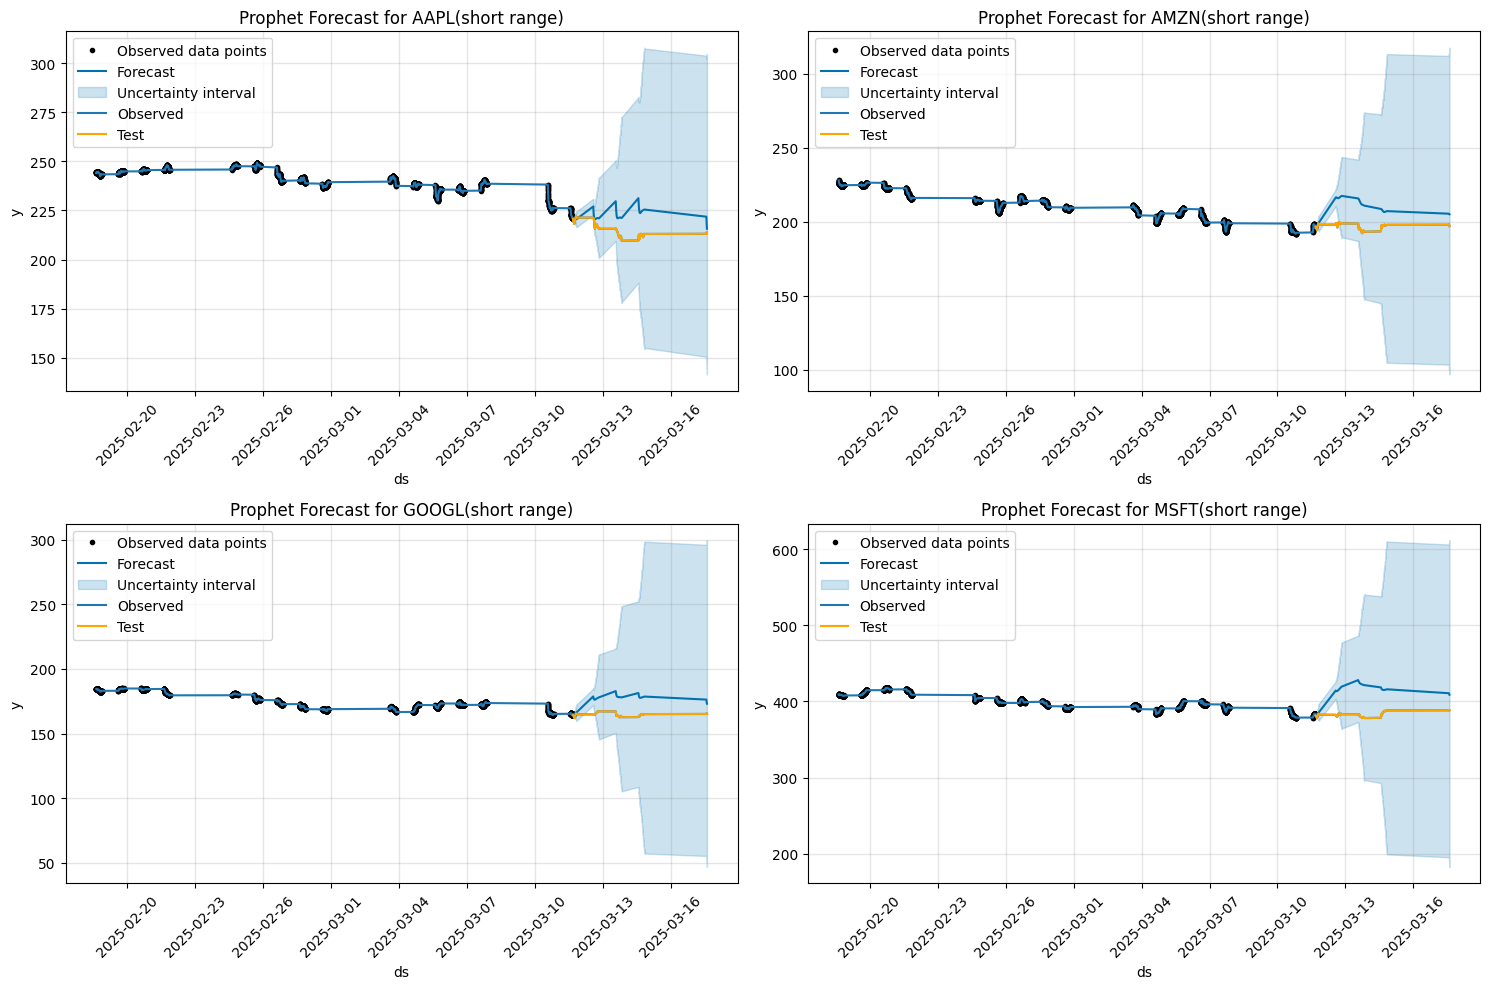

In [53]:
#Prophet Forecasting for short range stocks

#Iterate through each stock in short_df DataFrame
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  #Create 2x2 subplot
axes = axes.flatten()

#Initialise dictionary to store Plotly figures for dashboard
short_Prophet_plotly_figs = {} 

for i, stock in enumerate(stocks):
    data = short_df[(stock, 'Moving Average')]

    #Create a DataFrame with 'ds' (dates) and 'y' (values) columns
    data = pd.DataFrame({'ds': data.index, 'y': data.values})

    #Remove timezone from 'ds' column
    data['ds'] = data['ds'].dt.tz_localize(None)

    #Split data
    train_size = int(len(data) * 0.8)    #80/20 split
    train, test = data[:train_size], data[train_size:]

    #Initialise and fit model
    model = Prophet() 
    model.fit(train)

    #Create a dataframe to hold the future dates and make prediction
    future = pd.DataFrame({'ds': test['ds']}) #test dates
    forecast = model.predict(future)

    #Evaluate the model
    print(f'Prophet forecast model evaluation for {stock} in short range period')
    
    rmse = sqrt(mean_squared_error(test['y'], forecast['yhat'][-len(test):]))
    print(f'RMSE for {stock}: {rmse:.5f}') #Rounded to five decimal place

    mae = mean_absolute_error(test['y'], forecast['yhat'][-len(test):])
    print(f'MAE for {stock}: {mae:.5f}')

    r2 = r2_score(test['y'], forecast['yhat'][-len(test):])
    print(f'R-squared for {stock}: {r2:.2f}') #Rounded to two decimal place
    print()


    #Plot the results using Plotly for dashboard
    fig_plotly = plot_plotly(model, forecast)
    fig_plotly.add_trace(go.Scatter(x=data['ds'], y=data['y'], mode='lines', name='Observed'))
    fig_plotly.add_trace(go.Scatter(x=test['ds'], y=test['y'], mode='lines', name='Test', line=dict(color='orange')))
    fig_plotly.update_layout(title=f"Prophet Forecast for {stock} (short range)", xaxis_title='Date', yaxis_title='Closing Price')
    
    short_Prophet_plotly_figs[stock] = fig_plotly #Store Plotly figure for this stock
    

    #Plot the results
    ax = axes[i] 
    model.plot(forecast, ax=ax)   #Pass prophet plot function
    ax.plot(data['ds'], data['y'], label='Observed')
    ax.plot(test['ds'], test['y'], label='Test', color='orange')
    ax.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
    ax.set_title(f"Prophet Forecast for {stock}(short range)")
    ax.legend()
    
#Adjust layout and show the plot
plt.tight_layout()
plt.show()

#Access individual subplots' data
short_AAPL_Prophet_plotly_fig = short_Prophet_plotly_figs['AAPL']
short_AMZN_Prophet_plotly_fig = short_Prophet_plotly_figs['AMZN']
short_GOOGL_Prophet_plotly_fig = short_Prophet_plotly_figs['GOOGL']
short_MSFT_Prophet_plotly_fig = short_Prophet_plotly_figs['MSFT']

### *Medium Range Stocks Model Selection*

#### **ARIMA**

##### **AAPL**

In [54]:
#medium range AAPL stock price prediction with ARIMA model
medium_ARIMA_AAPL_results = {}  #Empty dictionary to store ARIMA results for AAPL stock

#medium range AAPL data
medium_AAPL_data = medium_df[('AAPL', 'Moving Average')]

#Split data into train and test sets
size = int(len(medium_AAPL_data) * 0.8)
train_medium_AAPL, test_medium_AAPL = medium_AAPL_data[:size], medium_AAPL_data[size:]  #80/20 data split

history = [x for x in train_medium_AAPL]  
predictions_medium_AAPL = []

#Fit the ARIMA model
fitted_model = fit_arima(train_medium_AAPL) 
print (fitted_model.summary())
print() #adds space 

#Walk-forward validation
for t in range(len(test_medium_AAPL)):
    model = ARIMA(history, order=fitted_model.order)
    model.initialize_approximate_diffuse() #To combat LinAlgError on JupyterNotebook
    model_fit = model.fit(method_kwargs={'warn_convergence': False}, low_memory=True) #To address convergence issues
    output = model_fit.forecast()

    #Generate a prediction
    yhat = output[0]
    predictions_medium_AAPL.append(yhat)

    #Add the actual observation to the history
    obs = test_medium_AAPL.iloc[t]  
    history.append(obs)

#Evaluate the model
print('ARIMA rolling forecast model evaluation for AAPL stock in medium range period')

rmse = sqrt(mean_squared_error(test_medium_AAPL, predictions_medium_AAPL))
print(f'RMSE: {rmse:.5f}')#rounded to five decimal place

mae = mean_absolute_error(test_medium_AAPL, predictions_medium_AAPL)
print(f'MAE: {mae:.5f}')

r2 = r2_score(test_medium_AAPL, predictions_medium_AAPL)
print(f'R-squared: {r2:.2f}')#rounded to two decimal place

#Store results
medium_ARIMA_AAPL_results = {'train_medium_AAPL': train_medium_AAPL, 
                           'test_medium_AAPL': test_medium_AAPL, 
                           'predictions_medium_AAPL': predictions_medium_AAPL}

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2599
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 745.053
Date:                Mon, 17 Mar 2025   AIC                          -1480.105
Time:                        18:11:13   BIC                          -1450.793
Sample:                             0   HQIC                         -1469.484
                               - 2599                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6696      0.040     41.383      0.000       1.591       1.749
ar.L2         -0.7282      0.034    -21.348      0.000      -0.795      -0.661
ma.L1         -0.8175      0.042    -19.529      0.0

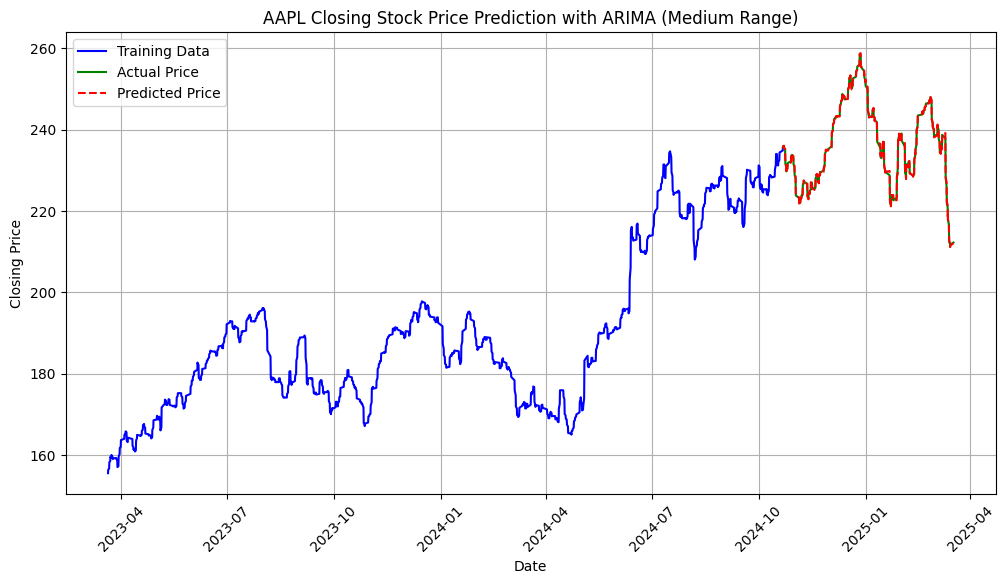

In [55]:
#Plot ARIMA rolling forecast line plot for medium range AAPL stocks

#Get data from the above cell
train_medium_AAPL = medium_ARIMA_AAPL_results['train_medium_AAPL']
test_medium_AAPL = medium_ARIMA_AAPL_results['test_medium_AAPL']
predictions_medium_AAPL = medium_ARIMA_AAPL_results['predictions_medium_AAPL']

#Create plot
fig = plt.figure(figsize=(12, 6)) #Create a Matplotlib figure and axes
plt.plot(train_medium_AAPL.index, train_medium_AAPL.values, label='Training Data', color = 'Blue')
plt.plot(test_medium_AAPL.index, test_medium_AAPL.values, label='Actual Price', color = 'Green')
plt.plot(test_medium_AAPL.index, predictions_medium_AAPL, label='Predicted Price', color = 'Red',
         linestyle='--')

plt.title('AAPL Closing Stock Price Prediction with ARIMA (Medium Range)')
plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()

plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
medium_AAPL_ARIMA_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

##### **AMZN**

In [56]:
#medium range AMZN stock price prediction with ARIMA model
medium_ARIMA_AMZN_results = {}  #Empty dictionary to store ARIMA results for AMZN stock

#medium range AMZN data
medium_AMZN_data = medium_df[('AMZN', 'Moving Average')]

#Split data into train and test sets
size = int(len(medium_AMZN_data) * 0.8)
train_medium_AMZN, test_medium_AMZN = medium_AMZN_data[:size], medium_AMZN_data[size:]  #80/20 data split

history = [x for x in train_medium_AMZN]  
predictions_medium_AMZN = []

#Fit the ARIMA model
fitted_model = fit_arima(train_medium_AMZN) 
print (fitted_model.summary())
print() #adds space 

#Walk-forward validation
for t in range(len(test_medium_AMZN)):
    model = ARIMA(history, order=fitted_model.order)
    model.initialize_approximate_diffuse() #To combat LinAlgError on JupyterNotebook
    model_fit = model.fit(method_kwargs={'warn_convergence': False}, low_memory=True) #To address convergence issues
    output = model_fit.forecast()

    #Generate a prediction
    yhat = output[0]
    predictions_medium_AMZN.append(yhat)

    #Add the actual observation to the history
    obs = test_medium_AMZN.iloc[t]  
    history.append(obs)

#Evaluate the model
print('ARIMA rolling forecast model evaluation for AMZN stock in medium range period')

rmse = sqrt(mean_squared_error(test_medium_AMZN, predictions_medium_AMZN))
print(f'RMSE: {rmse:.5f}')#rounded to five decimal place

mae = mean_absolute_error(test_medium_AMZN, predictions_medium_AMZN)
print(f'MAE: {mae:.5f}')

r2 = r2_score(test_medium_AMZN, predictions_medium_AMZN)
print(f'R-squared: {r2:.2f}')#rounded to two decimal place

#Store results
medium_ARIMA_AMZN_results = {'train_medium_AMZN': train_medium_AMZN, 
                           'test_medium_AMZN': test_medium_AMZN, 
                           'predictions_medium_AMZN': predictions_medium_AMZN}

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2599
Model:               SARIMAX(2, 1, 2)   Log Likelihood                 644.445
Date:                Mon, 17 Mar 2025   AIC                          -1276.890
Time:                        18:30:45   BIC                          -1241.715
Sample:                             0   HQIC                         -1264.144
                               - 2599                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0018      0.001      1.898      0.058   -6.01e-05       0.004
ar.L1          1.7181      0.032     52.925      0.000       1.654       1.782
ar.L2         -0.7715      0.027    -28.658      0.0

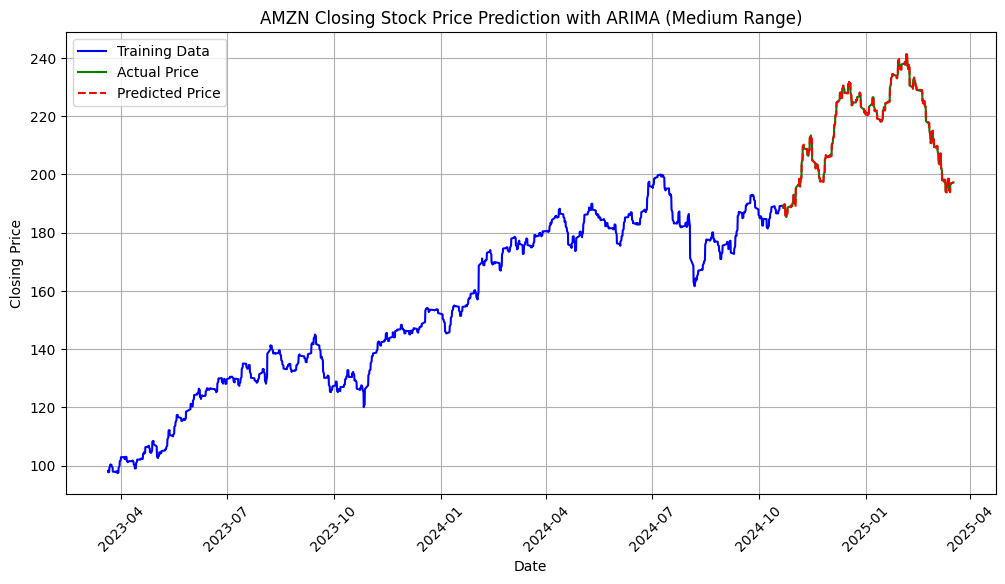

In [57]:
#Plot ARIMA rolling forecast line plot for medium range AMZN stocks

#Get data from the above cell
train_medium_AMZN = medium_ARIMA_AMZN_results['train_medium_AMZN']
test_medium_AMZN = medium_ARIMA_AMZN_results['test_medium_AMZN']
predictions_medium_AMZN = medium_ARIMA_AMZN_results['predictions_medium_AMZN']

#Create plot
fig = plt.figure(figsize=(12, 6)) #Create a Matplotlib figure and axes
plt.plot(train_medium_AMZN.index, train_medium_AMZN.values, label='Training Data', color = 'Blue')
plt.plot(test_medium_AMZN.index, test_medium_AMZN.values, label='Actual Price', color = 'Green')
plt.plot(test_medium_AMZN.index, predictions_medium_AMZN, label='Predicted Price', color = 'Red',
         linestyle='--')

plt.title('AMZN Closing Stock Price Prediction with ARIMA (Medium Range)')
plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()

plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
medium_AMZN_ARIMA_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

##### **GOOGL**

In [58]:
#medium range GOOGL stock price prediction with ARIMA model
medium_ARIMA_GOOGL_results = {}  #Empty dictionary to store ARIMA results for GOOGL stock

#medium range GOOGL data
medium_GOOGL_data = medium_df[('GOOGL', 'Moving Average')]

#Split data into train and test sets
size = int(len(medium_GOOGL_data) * 0.8)
train_medium_GOOGL, test_medium_GOOGL = medium_GOOGL_data[:size], medium_GOOGL_data[size:]  #80/20 data split

history = [x for x in train_medium_GOOGL]  
predictions_medium_GOOGL = []

#Fit the ARIMA model
fitted_model = fit_arima(train_medium_GOOGL) 
print (fitted_model.summary())
print() #adds space 

#Walk-forward validation
for t in range(len(test_medium_GOOGL)):
    model = ARIMA(history, order=fitted_model.order)
    model.initialize_approximate_diffuse() #To combat LinAlgError on JupyterNotebook
    model_fit = model.fit(method_kwargs={'warn_convergence': False}, low_memory=True) #To address convergence issues
    output = model_fit.forecast()

    #Generate a prediction
    yhat = output[0]
    predictions_medium_GOOGL.append(yhat)

    #Add the actual observation to the history
    obs = test_medium_GOOGL.iloc[t]  
    history.append(obs)

#Evaluate the model
print('ARIMA rolling forecast model evaluation for GOOGL stock in medium range period')

rmse = sqrt(mean_squared_error(test_medium_GOOGL, predictions_medium_GOOGL))
print(f'RMSE: {rmse:.5f}')#rounded to five decimal place

mae = mean_absolute_error(test_medium_GOOGL, predictions_medium_GOOGL)
print(f'MAE: {mae:.5f}')

r2 = r2_score(test_medium_GOOGL, predictions_medium_GOOGL)
print(f'R-squared: {r2:.2f}')#rounded to two decimal place

#Store results
medium_ARIMA_GOOGL_results = {'train_medium_GOOGL': train_medium_GOOGL, 
                           'test_medium_GOOGL': test_medium_GOOGL, 
                           'predictions_medium_GOOGL': predictions_medium_GOOGL}

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2599
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 975.888
Date:                Mon, 17 Mar 2025   AIC                          -1943.776
Time:                        18:48:42   BIC                          -1920.326
Sample:                             0   HQIC                         -1935.279
                               - 2599                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7020      0.045     37.644      0.000       1.613       1.791
ar.L2         -0.7486      0.038    -19.797      0.000      -0.823      -0.674
ma.L1         -0.7608      0.053    -14.327      0.0

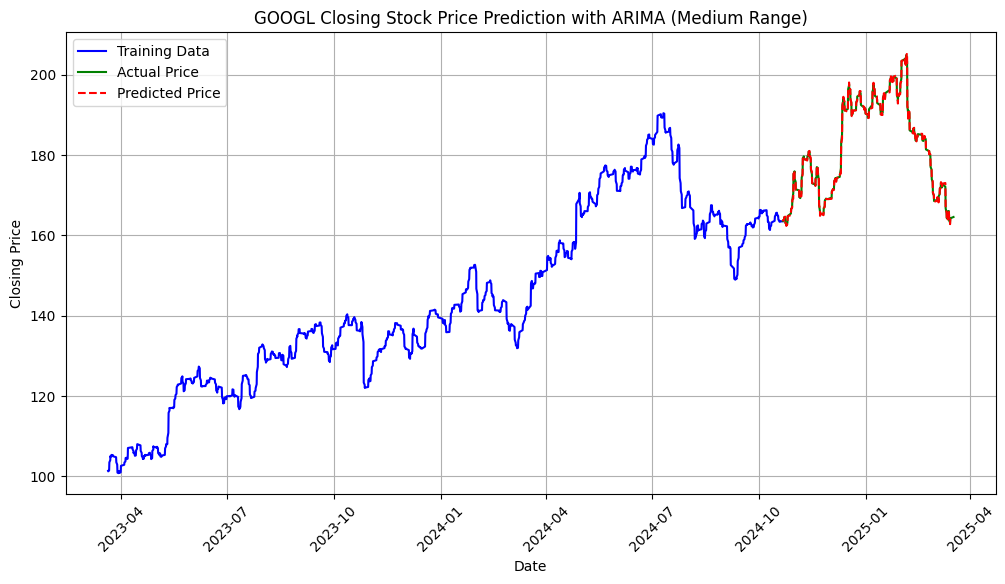

In [59]:
#Plot ARIMA rolling forecast line plot for medium range GOOGL stocks

#Get data from the above cell
train_medium_GOOGL = medium_ARIMA_GOOGL_results['train_medium_GOOGL']
test_medium_GOOGL = medium_ARIMA_GOOGL_results['test_medium_GOOGL']
predictions_medium_GOOGL = medium_ARIMA_GOOGL_results['predictions_medium_GOOGL']

#Create plot
fig = plt.figure(figsize=(12, 6)) #Create a Matplotlib figure and axes
plt.plot(train_medium_GOOGL.index, train_medium_GOOGL.values, label='Training Data', color = 'Blue')
plt.plot(test_medium_GOOGL.index, test_medium_GOOGL.values, label='Actual Price', color = 'Green')
plt.plot(test_medium_GOOGL.index, predictions_medium_GOOGL, label='Predicted Price', color = 'Red',
         linestyle='--')

plt.title('GOOGL Closing Stock Price Prediction with ARIMA (Medium Range)')
plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()

plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
medium_GOOGL_ARIMA_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

##### **MSFT**

In [60]:
#medium range MSFT stock price prediction with ARIMA model
medium_ARIMA_MSFT_results = {}  #Empty dictionary to store ARIMA results for MSFT stock

#medium range MSFT data
medium_MSFT_data = medium_df[('MSFT', 'Moving Average')]

#Split data into train and test sets
size = int(len(medium_MSFT_data) * 0.8)
train_medium_MSFT, test_medium_MSFT = medium_MSFT_data[:size], medium_MSFT_data[size:]  #80/20 data split

history = [x for x in train_medium_MSFT]  
predictions_medium_MSFT = []

#Fit the ARIMA model
fitted_model = fit_arima(train_medium_MSFT) 
print (fitted_model.summary())
print() #adds space 

#Walk-forward validation
for t in range(len(test_medium_MSFT)):
    model = ARIMA(history, order=fitted_model.order)
    model.initialize_approximate_diffuse() #To combat LinAlgError on JupyterNotebook
    model_fit = model.fit(method_kwargs={'warn_convergence': False}, low_memory=True) #To address convergence issues
    output = model_fit.forecast()

    #Generate a prediction
    yhat = output[0]
    predictions_medium_MSFT.append(yhat)

    #Add the actual observation to the history
    obs = test_medium_MSFT.iloc[t]  
    history.append(obs)

#Evaluate the model
print('ARIMA rolling forecast model evaluation for MSFT stock in medium range period')

rmse = sqrt(mean_squared_error(test_medium_MSFT, predictions_medium_MSFT))
print(f'RMSE: {rmse:.5f}')#rounded to five decimal place

mae = mean_absolute_error(test_medium_MSFT, predictions_medium_MSFT)
print(f'MAE: {mae:.5f}')

r2 = r2_score(test_medium_MSFT, predictions_medium_MSFT)
print(f'R-squared: {r2:.2f}')#rounded to two decimal place

#Store results
medium_ARIMA_MSFT_results = {'train_medium_MSFT': train_medium_MSFT, 
                           'test_medium_MSFT': test_medium_MSFT, 
                           'predictions_medium_MSFT': predictions_medium_MSFT}

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2599
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -816.267
Date:                Mon, 17 Mar 2025   AIC                           1644.535
Time:                        19:04:39   BIC                           1679.710
Sample:                             0   HQIC                          1657.280
                               - 2599                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0028      0.002      1.595      0.111      -0.001       0.006
ar.L1          1.6890      0.045     37.376      0.000       1.600       1.778
ar.L2         -0.7423      0.037    -20.160      0.0

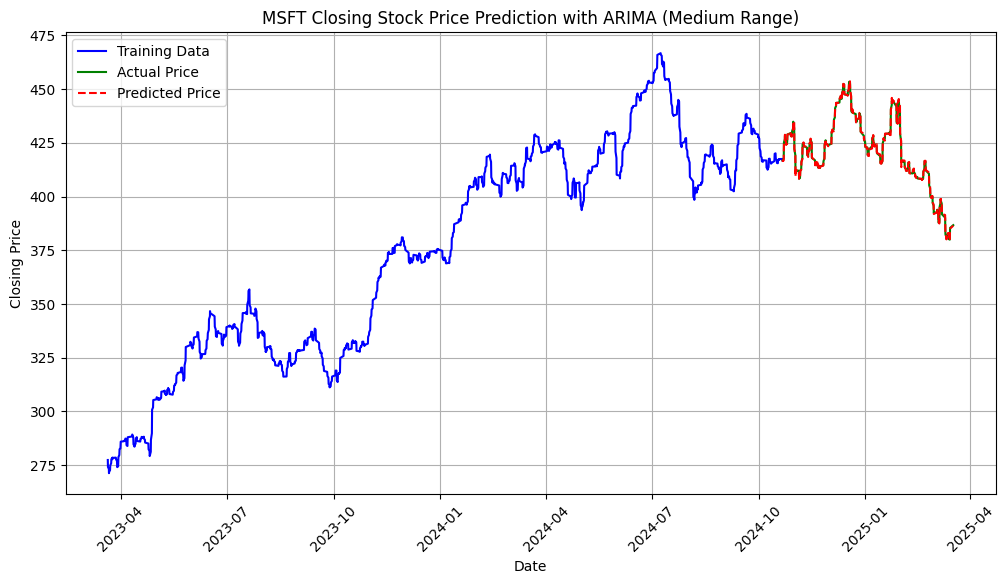

In [61]:
#Plot ARIMA rolling forecast line plot for medium range MSFT stocks

#Get data from the above cell
train_medium_MSFT = medium_ARIMA_MSFT_results['train_medium_MSFT']
test_medium_MSFT = medium_ARIMA_MSFT_results['test_medium_MSFT']
predictions_medium_MSFT = medium_ARIMA_MSFT_results['predictions_medium_MSFT']

#Create plot
fig = plt.figure(figsize=(12, 6)) #Create a Matplotlib figure and axes
plt.plot(train_medium_MSFT.index, train_medium_MSFT.values, label='Training Data', color = 'Blue')
plt.plot(test_medium_MSFT.index, test_medium_MSFT.values, label='Actual Price', color = 'Green')
plt.plot(test_medium_MSFT.index, predictions_medium_MSFT, label='Predicted Price', color = 'Red',
         linestyle='--')

plt.title('MSFT Closing Stock Price Prediction with ARIMA (Medium Range)')
plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()

plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
medium_MSFT_ARIMA_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

#### **LSTM**

In [62]:
#LSTM Forecasting for medium range stocks

medium_LSTM_results = [] #Empty list initialised to store medium range stock lstm result

#Iterate through each stock in medium_df
for i, stock in enumerate(stocks):
    stock_data = medium_df[(stock, 'Moving Average')]

    #Split data into training and testing sets before MinMax fiting to avoid data bleeding
    size = int(len(stock_data) * 0.8)     #80/20 data split
    train_data, test_data = stock_data[:size], stock_data[size:]  
    
    #Create and fit a MinMaxScaler
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(train_data.values.reshape(-1, 1)) #transform and fit 
    scaled_data_test = scaler.transform(test_data.values.reshape(-1, 1)) #transform only (avoids data bleeding) 

    #Creat function that creates dataset with lookback period
    def create_dataset(dataset, look_back=1):
        X, Y = [], []  #previous lookback time step, value to be predicted
        for i in range(len(dataset) - look_back - 1):
            a = dataset[i:(i + look_back), 0]
            X.append(a)
            Y.append(dataset[i + look_back, 0])
        return np.array(X), np.array(Y)
    
    #Function call
    look_back=120 #120 hours look back
    X_train, Y_train = create_dataset(scaled_data, look_back)
    X_test, Y_test = create_dataset(scaled_data_test, look_back)
    
    #Reshape input to be [samples, look_back, feature]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    #Create the LSTM model and compile the model
    model = Sequential()
    model.add(LSTM(units=8,  input_shape=(look_back, X_train.shape[2])))
    model.add(Dropout(0.2))  #To avoid overfitting
    model.add(Dense(1)) #Add 1 unit dense layer
    model.compile(loss='mean_squared_error', optimizer='adam')

    #Train the model
    model.fit(X_train, Y_train, epochs=100, batch_size=64, shuffle=False, verbose=0)
    
    #Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions) #Invert predictions to original scale
    Y_test = scaler.inverse_transform(Y_test.reshape(-1,1)) #Invert Y_test to original scale

    train_predictions = model.predict(X_train)
    train_predictions = scaler.inverse_transform(train_predictions) #Invert predictions to original scale
    Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1)) #Invert Y_test to original scale
    
    #Evaluate the model
    print(f'LSTM forecast model evaluation for {stock} in medium range period')

    #Calculate Root Mean Squared Error 
    rmse = np.sqrt(mean_squared_error(Y_test, predictions))
    print(f'Test RMSE for {stock}: {rmse:.5f}') #rounded to five decimal place

    #Calculate Mean Absolute Error
    mae = mean_absolute_error(Y_test, predictions)
    print(f'Test MAE for {stock}: {mae:.5f}')

    #Calcualte R square
    r2 = r2_score(Y_test, predictions)
    print(f'Test R-squared for {stock}: {r2:.2f}') #rounded to two decimal place
    print('==////////////////////////////////////////////////////////////////////////////////////////////////////////////==')

    #Store predictions and actual values for plotting and model for finetuning
    medium_LSTM_results.append({'stock': stock,
                               'predictions': predictions,
                               'actual': Y_test,
                               'X_train': X_train,
                               'X_test': X_test})

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
LSTM forecast model evaluation for AAPL in medium range period
Test RMSE for AAPL: 3.04396
Test MAE for AAPL: 2.77101
Test R-squared for AAPL: 0.91
==////////////////////////////////////////////////////////////////////////////////////////////////////////////==
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
LSTM forecast model evaluation for AMZN in medium range period
Test RMSE for AMZN: 8.13909
Test MAE for AMZN: 7.64569
Test R-squared for AMZN: 0.59
==////////////////////////////////////////////////////////////////////////////////////////////////////////////==
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
LSTM forecast model evaluation for GOOGL in medium range period
Test RMSE for GOOGL: 2.80288
Test MAE for GOOGL: 2.25163
Test R-squared for GOOGL: 0.94
==/////////////////////////////////////////////////////////////////////////////////////

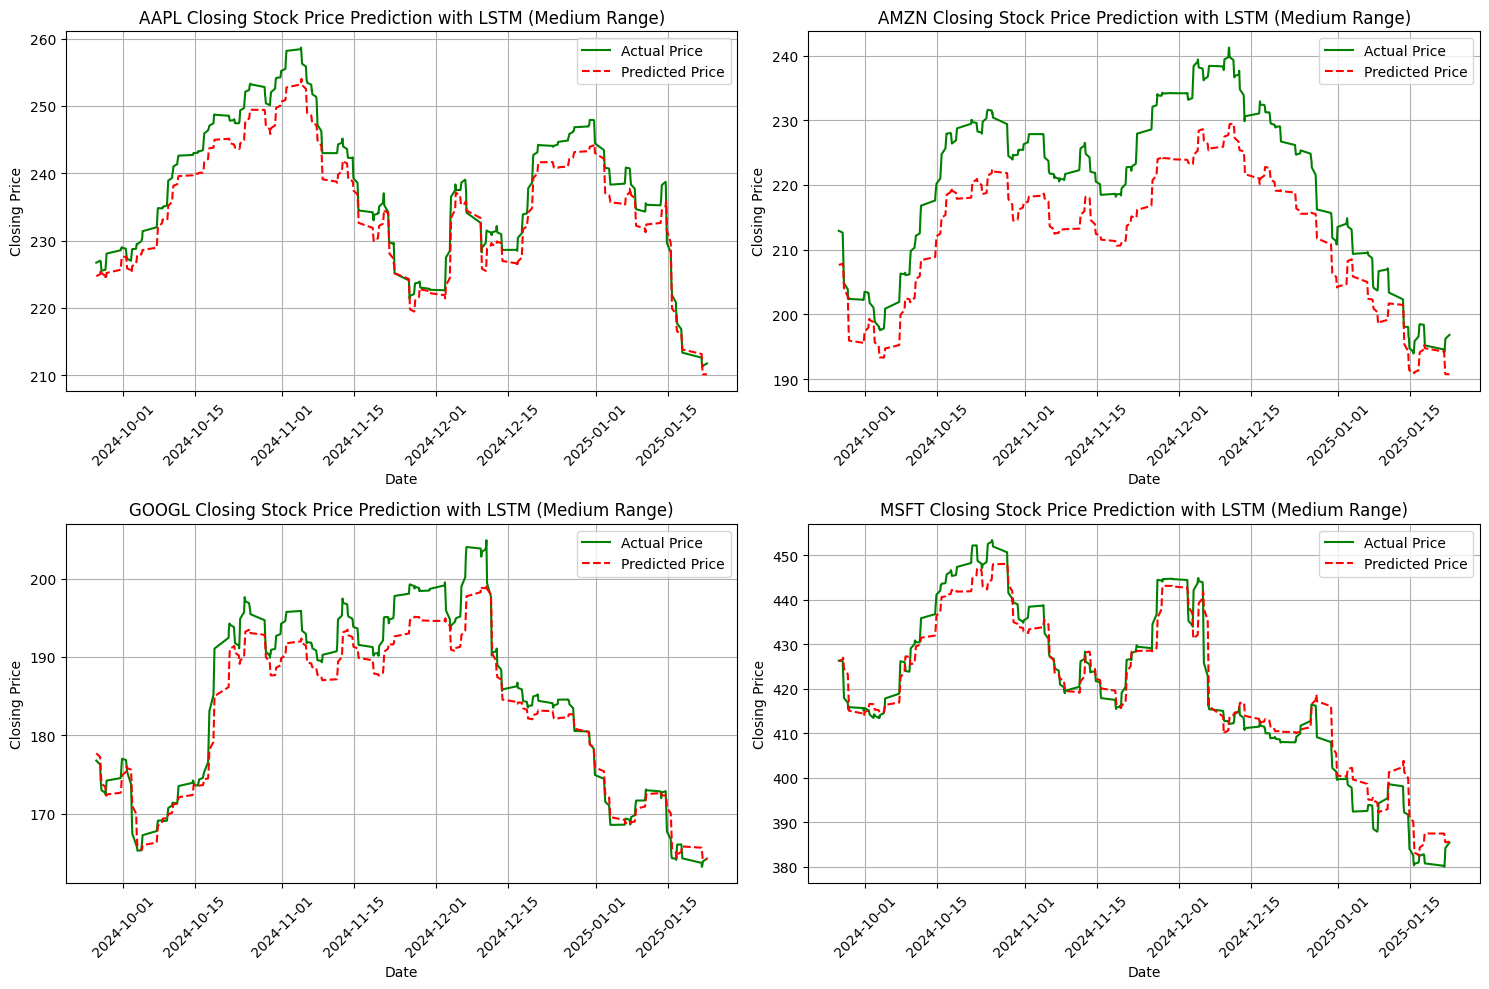

In [63]:
#Plot LSTM forecast line plot for medium range stocks

fig, axes = plt.subplots(2, 2, figsize=(15, 10))  #Create subplots
axes = axes.flatten()

#Iterate through the results and plot for each stock
for i, result in enumerate(medium_LSTM_results):
    stock = result['stock']
    predictions = result['predictions']
    test_data = result['actual']
    X_train = result['X_train']
    X_test = result['X_test']

    stock_data = medium_df[(stock, 'Moving Average')]

    test_dates = stock_data.index[len(X_train) : len(X_train) + len(X_test)]
    
    #Create plot
    ax = axes[i]
    ax.plot(test_dates, test_data, label='Actual Price', color='green')
    ax.plot(test_dates, predictions, label='Predicted Price', color='red', linestyle='--')

    ax.set_title(f'{stock} Closing Stock Price Prediction with LSTM (Medium Range)')
    ax.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.legend()
    ax.grid()

#Adjust layout and show plot
plt.tight_layout()
plt.show()


#Convert Matplotlib figure to Plotly figure for dashboard
medium_LSTM_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))
subplot_titles = [ax.get_title() for ax in axes]
  
#Access individual subplots' data and update layout (';' supresses plot from being displayed in the current output)
medium_AAPL_LSTM_plotly_fig = go.Figure(data=[medium_LSTM_plotly_fig.data[0], medium_LSTM_plotly_fig.data[1]])
medium_AAPL_LSTM_plotly_fig.update_layout(title_text=subplot_titles[0])

medium_AMZN_LSTM_plotly_fig = go.Figure(data=[medium_LSTM_plotly_fig.data[2], medium_LSTM_plotly_fig.data[3]])
medium_AMZN_LSTM_plotly_fig.update_layout(title_text=subplot_titles[1])

medium_GOOGL_LSTM_plotly_fig = go.Figure(data=[medium_LSTM_plotly_fig.data[4], medium_LSTM_plotly_fig.data[5]])
medium_GOOGL_LSTM_plotly_fig.update_layout(title_text=subplot_titles[2])

medium_MSFT_LSTM_plotly_fig = go.Figure(data=[medium_LSTM_plotly_fig.data[6], medium_LSTM_plotly_fig.data[7]]);
medium_MSFT_LSTM_plotly_fig.update_layout(title_text=subplot_titles[3]);

#### **Prophet**

19:29:47 - cmdstanpy - INFO - Chain [1] start processing
19:29:49 - cmdstanpy - INFO - Chain [1] done processing


Prophet forecast model evaluation for AAPL in medium range period
RMSE for AAPL: 10.83362
MAE for AAPL: 8.37540
R-squared for AAPL: -0.18



19:29:50 - cmdstanpy - INFO - Chain [1] start processing
19:29:51 - cmdstanpy - INFO - Chain [1] done processing


Prophet forecast model evaluation for AMZN in medium range period
RMSE for AMZN: 39.69627
MAE for AMZN: 36.51011
R-squared for AMZN: -6.03



19:29:52 - cmdstanpy - INFO - Chain [1] start processing
19:29:54 - cmdstanpy - INFO - Chain [1] done processing


Prophet forecast model evaluation for GOOGL in medium range period
RMSE for GOOGL: 46.15432
MAE for GOOGL: 42.91915
R-squared for GOOGL: -14.28



19:29:55 - cmdstanpy - INFO - Chain [1] start processing
19:29:57 - cmdstanpy - INFO - Chain [1] done processing


Prophet forecast model evaluation for MSFT in medium range period
RMSE for MSFT: 36.35844
MAE for MSFT: 33.09163
R-squared for MSFT: -3.53



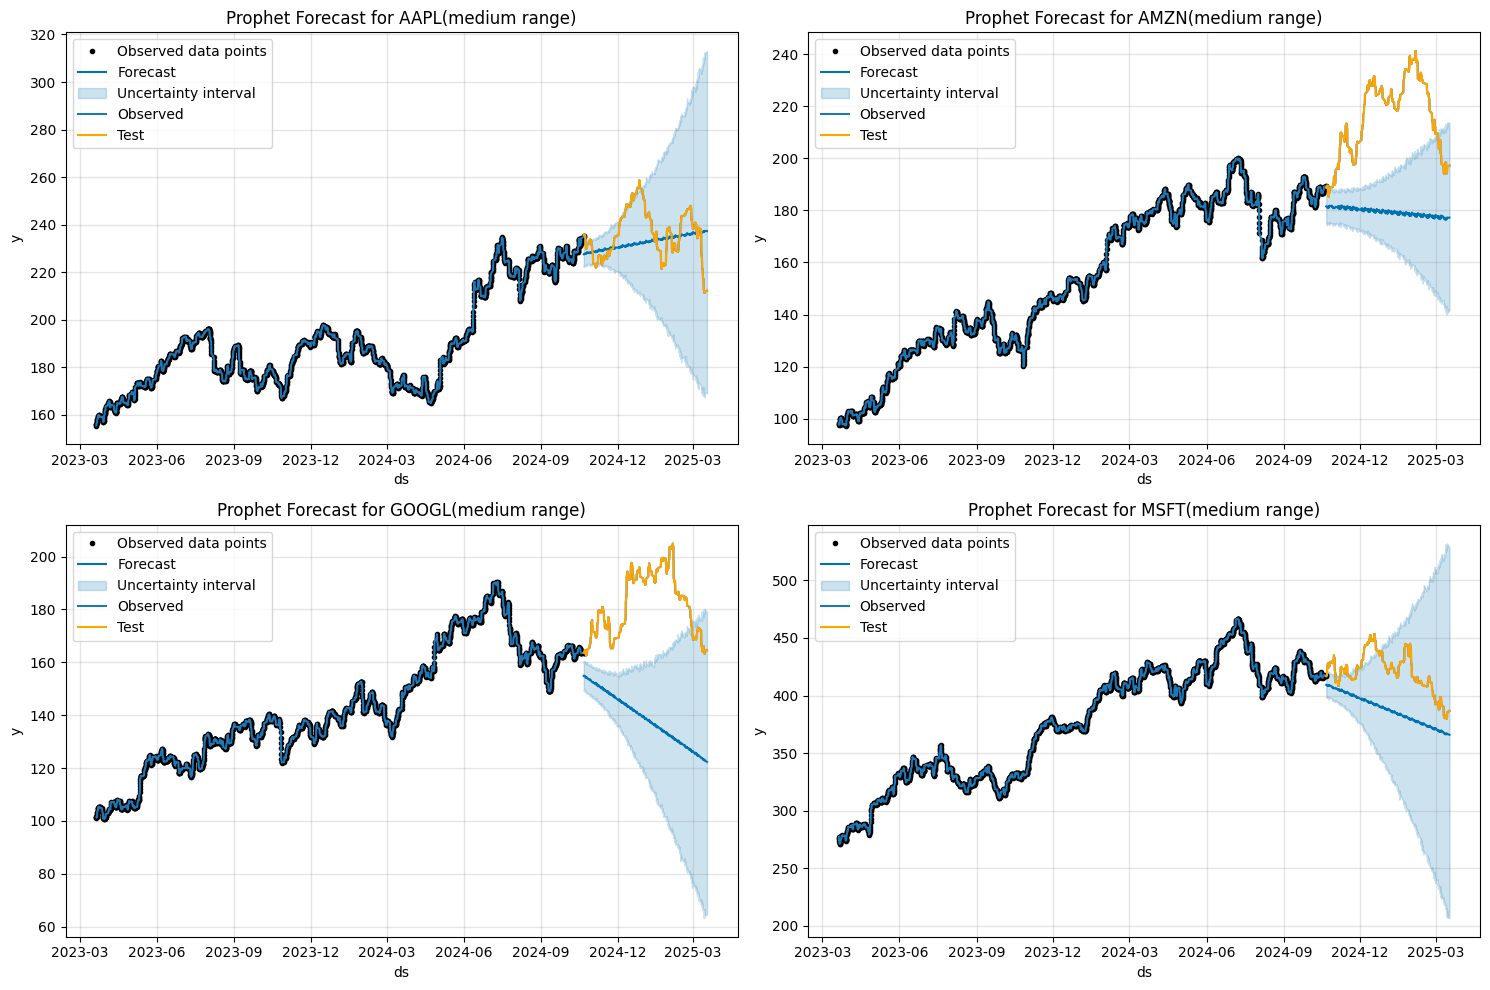

In [64]:
#Prophet Forecasting for medium range stocks

#Iterate through each stock in medium_df DataFrame
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  #Create 2x2 subplot
axes = axes.flatten()

#Initialise dictionary to store Plotly figures for dashboard
medium_Prophet_plotly_figs = {} 

for i, stock in enumerate(stocks):
    data = medium_df[(stock, 'Moving Average')]

    #Create a DataFrame with 'ds' (dates) and 'y' (values) columns
    data = pd.DataFrame({'ds': data.index, 'y': data.values})

    #Remove timezone from 'ds' column
    data['ds'] = data['ds'].dt.tz_localize(None)

    #Split data
    train_size = int(len(data) * 0.8)    #80/20 split
    train, test = data[:train_size], data[train_size:]

    #Initialise and fit model
    model = Prophet() 
    model.fit(train)

    #Create a dataframe to hold the future dates and make prediction
    future = pd.DataFrame({'ds': test['ds']}) #test dates
    forecast = model.predict(future)

    #Evaluate the model
    print(f'Prophet forecast model evaluation for {stock} in medium range period')
    
    rmse = sqrt(mean_squared_error(test['y'], forecast['yhat'][-len(test):]))
    print(f'RMSE for {stock}: {rmse:.5f}') #Rounded to five decimal place

    mae = mean_absolute_error(test['y'], forecast['yhat'][-len(test):])
    print(f'MAE for {stock}: {mae:.5f}')

    r2 = r2_score(test['y'], forecast['yhat'][-len(test):])
    print(f'R-squared for {stock}: {r2:.2f}') #Rounded to two decimal place
    print()

    #Plot the results using Plotly for dashboard
    fig_plotly = plot_plotly(model, forecast)
    fig_plotly.add_trace(go.Scatter(x=data['ds'], y=data['y'], mode='lines', name='Observed'))
    fig_plotly.add_trace(go.Scatter(x=test['ds'], y=test['y'], mode='lines', name='Test', line=dict(color='orange')))
    fig_plotly.update_layout(title=f"Prophet Forecast for {stock} (medium range)", xaxis_title='Date', yaxis_title='Closing Price')
    
    medium_Prophet_plotly_figs[stock] = fig_plotly #Store Plotly figure for a specific stock
 

    #Plot the results
    ax = axes[i] 
    model.plot(forecast, ax=ax)   #Pass prophet plot function
    ax.plot(data['ds'], data['y'], label='Observed')
    ax.plot(test['ds'], test['y'], label='Test', color='orange')
    ax.set_title(f"Prophet Forecast for {stock}(medium range)")
    ax.legend()

#Adjust layout and show the plot
plt.tight_layout()
plt.show()

#Access individual subplots' data
medium_AAPL_Prophet_plotly_fig = medium_Prophet_plotly_figs['AAPL']
medium_AMZN_Prophet_plotly_fig = medium_Prophet_plotly_figs['AMZN']
medium_GOOGL_Prophet_plotly_fig = medium_Prophet_plotly_figs['GOOGL']
medium_MSFT_Prophet_plotly_fig = medium_Prophet_plotly_figs['MSFT']

### *Long Range Stocks Model Selection*

#### **ARIMA**

##### **AAPL**

In [65]:
#long range AAPL stock price prediction with ARIMA model
long_ARIMA_AAPL_results = {}  #Empty dictionary to store ARIMA results for AAPL stock

#long range AAPL data
long_AAPL_data = long_df[('AAPL', 'Moving Average')]

#Split data into train and test sets
size = int(len(long_AAPL_data) * 0.8)
train_long_AAPL, test_long_AAPL = long_AAPL_data[:size], long_AAPL_data[size:]  #80/20 data split

history = [x for x in train_long_AAPL]  
predictions_long_AAPL = []

#Fit the ARIMA model
fitted_model = fit_arima(train_long_AAPL) 
print (fitted_model.summary())
print() #adds space 

#Walk-forward validation
for t in range(len(test_long_AAPL)):
    model = ARIMA(history, order=fitted_model.order)
    model.initialize_approximate_diffuse() #To combat LinAlgError on JupyterNotebook
    model_fit = model.fit(method_kwargs={'warn_convergence': False}, low_memory=True) #To address convergence issues
    output = model_fit.forecast()

    #Generate a prediction
    yhat = output[0]
    predictions_long_AAPL.append(yhat)

    #Add the actual observation to the history
    obs = test_long_AAPL.iloc[t]  
    history.append(obs)

#Evaluate the model
print('ARIMA rolling forecast model evaluation for AAPL stock in long range period')

rmse = sqrt(mean_squared_error(test_long_AAPL, predictions_long_AAPL))
print(f'RMSE: {rmse:.5f}')#rounded to five decimal place

mae = mean_absolute_error(test_long_AAPL, predictions_long_AAPL)
print(f'MAE: {mae:.5f}')

r2 = r2_score(test_long_AAPL, predictions_long_AAPL)
print(f'R-squared: {r2:.2f}')#rounded to two decimal place

#Store results
long_ARIMA_AAPL_results = {'train_long_AAPL': train_long_AAPL, 
                           'test_long_AAPL': test_long_AAPL, 
                           'predictions_long_AAPL': predictions_long_AAPL}

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2916
Model:               SARIMAX(2, 2, 2)   Log Likelihood                -496.758
Date:                Mon, 17 Mar 2025   AIC                           1003.515
Time:                        19:30:14   BIC                           1033.402
Sample:                             0   HQIC                          1014.281
                               - 2916                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3341      0.008   -165.447      0.000      -1.350      -1.318
ar.L2         -0.5781      0.008    -71.295      0.000      -0.594      -0.562
ma.L1          1.6003      0.005    351.859      0.0

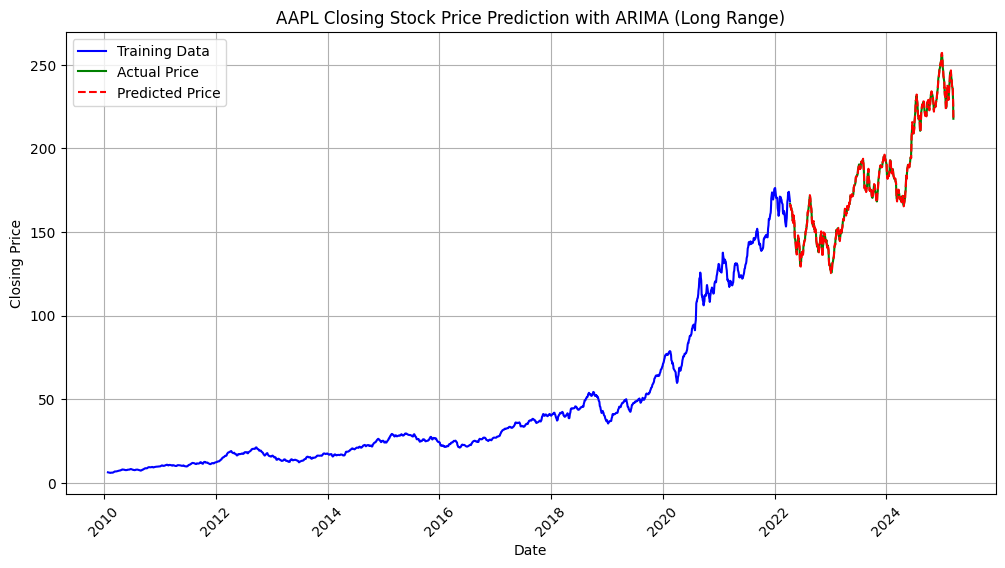

In [66]:
#Plot ARIMA rolling forecast line plot for long range AAPL stocks

#Get data from the above cell
train_long_AAPL = long_ARIMA_AAPL_results['train_long_AAPL']
test_long_AAPL = long_ARIMA_AAPL_results['test_long_AAPL']
predictions_long_AAPL = long_ARIMA_AAPL_results['predictions_long_AAPL']

#Create plot
fig = plt.figure(figsize=(12, 6)) #Create a Matplotlib figure and axes
plt.plot(train_long_AAPL.index, train_long_AAPL.values, label='Training Data', color = 'Blue')
plt.plot(test_long_AAPL.index, test_long_AAPL.values, label='Actual Price', color = 'Green')
plt.plot(test_long_AAPL.index, predictions_long_AAPL, label='Predicted Price', color = 'Red',
         linestyle='--')

plt.title('AAPL Closing Stock Price Prediction with ARIMA (Long Range)')
plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()

plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
long_AAPL_ARIMA_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

##### **AMZN**

In [67]:
#long range AMZN stock price prediction with ARIMA model
long_ARIMA_AMZN_results = {}  #Empty dictionary to store ARIMA results for AMZN stock

#long range AMZN data
long_AMZN_data = long_df[('AMZN', 'Moving Average')]

#Split data into train and test sets
size = int(len(long_AMZN_data) * 0.8)
train_long_AMZN, test_long_AMZN = long_AMZN_data[:size], long_AMZN_data[size:]  #80/20 data split

history = [x for x in train_long_AMZN]  
predictions_long_AMZN = []

#Fit the ARIMA model
fitted_model = fit_arima(train_long_AMZN) 
print (fitted_model.summary())
print() #adds space 

#Walk-forward validation
for t in range(len(test_long_AMZN)):
    model = ARIMA(history, order=fitted_model.order)
    model.initialize_approximate_diffuse() #To combat LinAlgError on JupyterNotebook
    model_fit = model.fit(method_kwargs={'warn_convergence': False}, low_memory=True) #To address convergence issues
    output = model_fit.forecast()

    #Generate a prediction
    yhat = output[0]
    predictions_long_AMZN.append(yhat)

    #Add the actual observation to the history
    obs = test_long_AMZN.iloc[t]  
    history.append(obs)

#Evaluate the model
print('ARIMA rolling forecast model evaluation for AMZN stock in long range period')

rmse = sqrt(mean_squared_error(test_long_AMZN, predictions_long_AMZN))
print(f'RMSE: {rmse:.5f}')#rounded to five decimal place

mae = mean_absolute_error(test_long_AMZN, predictions_long_AMZN)
print(f'MAE: {mae:.5f}')

r2 = r2_score(test_long_AMZN, predictions_long_AMZN)
print(f'R-squared: {r2:.2f}')#rounded to two decimal place

#Store results
long_ARIMA_AMZN_results = {'train_long_AMZN': train_long_AMZN, 
                           'test_long_AMZN': test_long_AMZN, 
                           'predictions_long_AMZN': predictions_long_AMZN}

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2916
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1473.431
Date:                Mon, 17 Mar 2025   AIC                           2958.863
Time:                        20:02:06   BIC                           2994.728
Sample:                             0   HQIC                          2971.782
                               - 2916                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0136      0.006      2.134      0.033       0.001       0.026
ar.L1          1.2915      0.020     65.246      0.000       1.253       1.330
ar.L2         -0.5642      0.016    -34.263      0.0

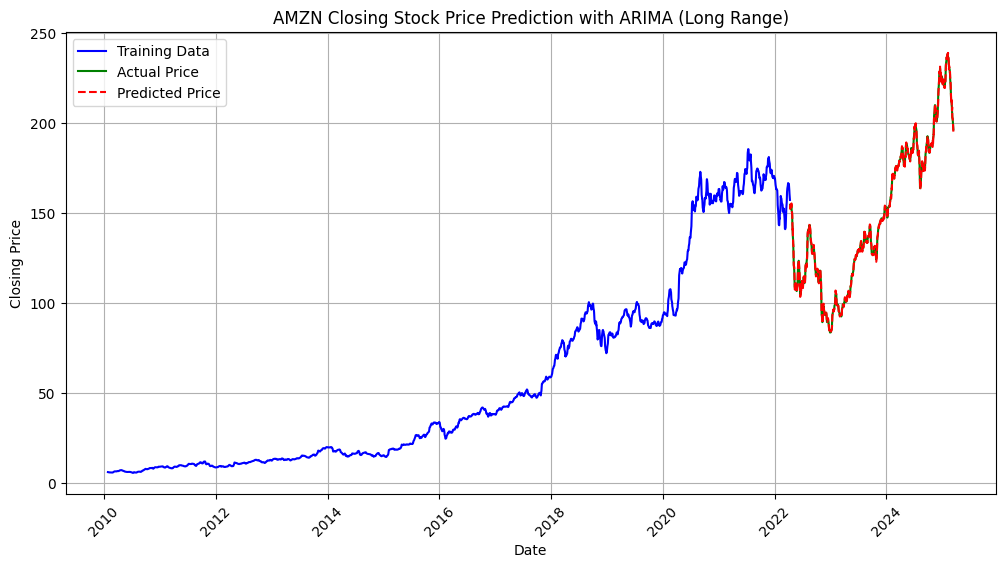

In [68]:
#Plot ARIMA rolling forecast line plot for long range AMZN stocks

#Get data from the above cell
train_long_AMZN = long_ARIMA_AMZN_results['train_long_AMZN']
test_long_AMZN = long_ARIMA_AMZN_results['test_long_AMZN']
predictions_long_AMZN = long_ARIMA_AMZN_results['predictions_long_AMZN']

#Create plot
fig = plt.figure(figsize=(12, 6)) #Create a Matplotlib figure and axes
plt.plot(train_long_AMZN.index, train_long_AMZN.values, label='Training Data', color = 'Blue')
plt.plot(test_long_AMZN.index, test_long_AMZN.values, label='Actual Price', color = 'Green')
plt.plot(test_long_AMZN.index, predictions_long_AMZN, label='Predicted Price', color = 'Red',
         linestyle='--')

plt.title('AMZN Closing Stock Price Prediction with ARIMA (Long Range)')
plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()

plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
long_AMZN_ARIMA_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

##### **GOOGL**

In [69]:
#long range GOOGL stock price prediction with ARIMA model
long_ARIMA_GOOGL_results = {}  #Empty dictionary to store ARIMA results for GOOGL stock

#long range GOOGL data
long_GOOGL_data = long_df[('GOOGL', 'Moving Average')]

#Split data into train and test sets
size = int(len(long_GOOGL_data) * 0.8)
train_long_GOOGL, test_long_GOOGL = long_GOOGL_data[:size], long_GOOGL_data[size:]  #80/20 data split

history = [x for x in train_long_GOOGL]  
predictions_long_GOOGL = []

#Fit the ARIMA model
fitted_model = fit_arima(train_long_GOOGL) 
print (fitted_model.summary())
print() #adds space 

#Walk-forward validation
for t in range(len(test_long_GOOGL)):
    model = ARIMA(history, order=fitted_model.order)
    model.initialize_approximate_diffuse() #To combat LinAlgError on JupyterNotebook
    model_fit = model.fit(method_kwargs={'warn_convergence': False}, low_memory=True) #To address convergence issues
    output = model_fit.forecast()

    #Generate a prediction
    yhat = output[0]
    predictions_long_GOOGL.append(yhat)

    #Add the actual observation to the history
    obs = test_long_GOOGL.iloc[t]  
    history.append(obs)

#Evaluate the model
print('ARIMA rolling forecast model evaluation for GOOGL stock in long range period')

rmse = sqrt(mean_squared_error(test_long_GOOGL, predictions_long_GOOGL))
print(f'RMSE: {rmse:.5f}')#rounded to five decimal place

mae = mean_absolute_error(test_long_GOOGL, predictions_long_GOOGL)
print(f'MAE: {mae:.5f}')

r2 = r2_score(test_long_GOOGL, predictions_long_GOOGL)
print(f'R-squared: {r2:.2f}')#rounded to two decimal place

#Store results
long_ARIMA_GOOGL_results = {'train_long_GOOGL': train_long_GOOGL, 
                           'test_long_GOOGL': test_long_GOOGL, 
                           'predictions_long_GOOGL': predictions_long_GOOGL}

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2916
Model:               SARIMAX(1, 2, 2)   Log Likelihood                -355.572
Date:                Mon, 17 Mar 2025   AIC                            719.145
Time:                        20:27:40   BIC                            743.054
Sample:                             0   HQIC                           727.758
                               - 2916                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9236      0.009    -97.914      0.000      -0.942      -0.905
ma.L1          0.9599      0.012     78.078      0.000       0.936       0.984
ma.L2          0.1113      0.009     11.817      0.0

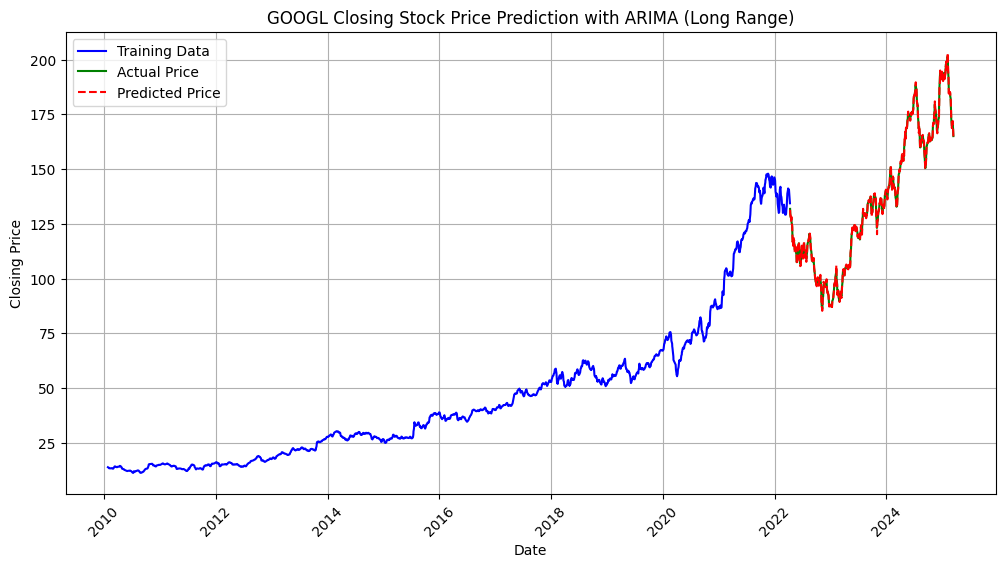

In [70]:
#Plot ARIMA rolling forecast line plot for long range GOOGL stocks

#Get data from the above cell
train_long_GOOGL = long_ARIMA_GOOGL_results['train_long_GOOGL']
test_long_GOOGL = long_ARIMA_GOOGL_results['test_long_GOOGL']
predictions_long_GOOGL = long_ARIMA_GOOGL_results['predictions_long_GOOGL']

#Create plot
fig = plt.figure(figsize=(12, 6)) #Create a Matplotlib figure and axes
plt.plot(train_long_GOOGL.index, train_long_GOOGL.values, label='Training Data', color = 'Blue')
plt.plot(test_long_GOOGL.index, test_long_GOOGL.values, label='Actual Price', color = 'Green')
plt.plot(test_long_GOOGL.index, predictions_long_GOOGL, label='Predicted Price', color = 'Red',
         linestyle='--')

plt.title('GOOGL Closing Stock Price Prediction with ARIMA (Long Range)')
plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()

plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
long_GOOGL_ARIMA_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

##### **MSFT**

In [71]:
#long range MSFT stock price prediction with ARIMA model
long_ARIMA_MSFT_results = {}  #Empty dictionary to store ARIMA results for MSFT stock

#long range MSFT data
long_MSFT_data = long_df[('MSFT', 'Moving Average')]

#Split data into train and test sets
size = int(len(long_MSFT_data) * 0.8)
train_long_MSFT, test_long_MSFT = long_MSFT_data[:size], long_MSFT_data[size:]  #80/20 data split

history = [x for x in train_long_MSFT]  
predictions_long_MSFT = []

#Fit the ARIMA model
fitted_model = fit_arima(train_long_MSFT) 
print (fitted_model.summary())
print() #adds space 

#Walk-forward validation
for t in range(len(test_long_MSFT)):
    model = ARIMA(history, order=fitted_model.order)
    model.initialize_approximate_diffuse() #To combat LinAlgError on JupyterNotebook
    model_fit = model.fit(method_kwargs={'warn_convergence': False}, low_memory=True) #To address convergence issues
    output = model_fit.forecast()

    #Generate a prediction
    yhat = output[0]
    predictions_long_MSFT.append(yhat)

    #Add the actual observation to the history
    obs = test_long_MSFT.iloc[t]  
    history.append(obs)

#Evaluate the model
print('ARIMA rolling forecast model evaluation for MSFT stock in long range period')

rmse = sqrt(mean_squared_error(test_long_MSFT, predictions_long_MSFT))
print(f'RMSE: {rmse:.5f}')#rounded to five decimal place

mae = mean_absolute_error(test_long_MSFT, predictions_long_MSFT)
print(f'MAE: {mae:.5f}')

r2 = r2_score(test_long_MSFT, predictions_long_MSFT)
print(f'R-squared: {r2:.2f}')#rounded to two decimal place

#Store results
long_ARIMA_MSFT_results = {'train_long_MSFT': train_long_MSFT, 
                           'test_long_MSFT': test_long_MSFT, 
                           'predictions_long_MSFT': predictions_long_MSFT}

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2916
Model:               SARIMAX(1, 2, 1)   Log Likelihood               -2400.172
Date:                Mon, 17 Mar 2025   AIC                           4806.345
Time:                        20:44:16   BIC                           4824.277
Sample:                             0   HQIC                          4812.804
                               - 2916                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8957      0.011    -81.528      0.000      -0.917      -0.874
ma.L1          0.8057      0.014     56.948      0.000       0.778       0.833
sigma2         0.3040      0.003    102.604      0.0

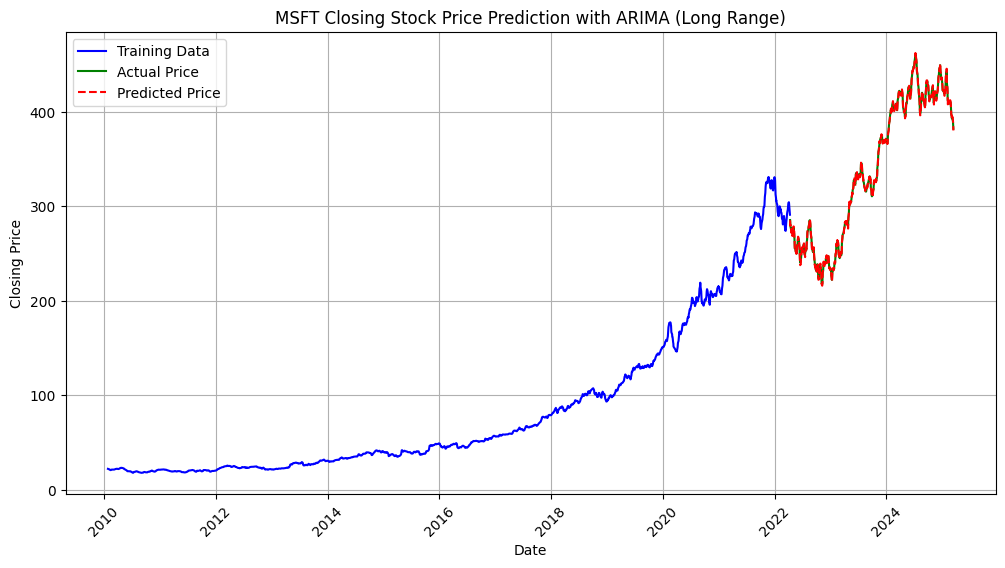

In [72]:
#Plot ARIMA rolling forecast line plot for long range MSFT stocks

#Get data from the above cell
train_long_MSFT = long_ARIMA_MSFT_results['train_long_MSFT']
test_long_MSFT = long_ARIMA_MSFT_results['test_long_MSFT']
predictions_long_MSFT = long_ARIMA_MSFT_results['predictions_long_MSFT']

#Create plot
fig = plt.figure(figsize=(12, 6)) #Create a Matplotlib figure and axes
plt.plot(train_long_MSFT.index, train_long_MSFT.values, label='Training Data', color = 'Blue')
plt.plot(test_long_MSFT.index, test_long_MSFT.values, label='Actual Price', color = 'Green')
plt.plot(test_long_MSFT.index, predictions_long_MSFT, label='Predicted Price', color = 'Red',
         linestyle='--')

plt.title('MSFT Closing Stock Price Prediction with ARIMA (Long Range)')
plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()

plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
long_MSFT_ARIMA_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

#### **LSTM**

In [73]:
#LSTM Forecasting for long range stocks

long_LSTM_results = [] #Empty list initialised to store long range stock lstm result

#Iterate through each stock in long_df
for i, stock in enumerate(stocks):
    stock_data = long_df[(stock, 'Moving Average')]

    #Split data into training and testing sets before MinMax fiting to avoid data bleeding
    size = int(len(stock_data) * 0.8)     #80/20 data split
    train_data, test_data = stock_data[:size], stock_data[size:]  
    
    #Create and fit a MinMaxScaler
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(train_data.values.reshape(-1, 1)) #transform and fit 
    scaled_data_test = scaler.transform(test_data.values.reshape(-1, 1)) #transform only (avoids data bleeding) 

    #Creat function that creates dataset with lookback period
    def create_dataset(dataset, look_back=1):
        X, Y = [], []  #previous lookback time step, value to be predicted
        for i in range(len(dataset) - look_back - 1):
            a = dataset[i:(i + look_back), 0]
            X.append(a)
            Y.append(dataset[i + look_back, 0])
        return np.array(X), np.array(Y)
    
    #Function call
    look_back=120 #120 days look back
    X_train, Y_train = create_dataset(scaled_data, look_back)
    X_test, Y_test = create_dataset(scaled_data_test, look_back)
    
    #Reshape input to be [samples, look_back, feature]
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    #Create the LSTM model and compile the model
    model = Sequential()
    model.add(LSTM(units=32, input_shape=(look_back, 1)))
    model.add(Dropout(0.1))  #To avoid overfitting
    model.add(Dense(1)) #Add 1 unit dense layer
    model.compile(loss='mean_squared_error', optimizer='adam')

    #Train the model
    model.fit(X_train, Y_train, epochs=100, batch_size=64, shuffle=False, verbose=0)
    
    #Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions) #Invert predictions to original scale
    Y_test = scaler.inverse_transform(Y_test.reshape(-1,1)) #Invert Y_test to original scale

    train_predictions = model.predict(X_train)
    train_predictions = scaler.inverse_transform(train_predictions) #Invert predictions to original scale
    Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1)) #Invert Y_test to original scale
    
    #Evaluate the model
    print(f'LSTM forecast model evaluation for {stock} in long range period')

    #Calculate Root Mean Squared Error 
    rmse = np.sqrt(mean_squared_error(Y_test, predictions))
    print(f'Test RMSE for {stock}: {rmse:.5f}') #rounded to five decimal place

    #Calculate Mean Absolute Error
    mae = mean_absolute_error(Y_test, predictions)
    print(f'Test MAE for {stock}: {mae:.5f}')

    #Calcualte R square
    r2 = r2_score(Y_test, predictions)
    print(f'Test R-squared for {stock}: {r2:.2f}') #rounded to two decimal place
    print('==////////////////////////////////////////////////////////////////////////////////////////////////////////////==')

    #Store predictions and actual values for plotting and model for finetuning
    long_LSTM_results.append({'stock': stock,
                               'predictions': predictions,
                               'actual': Y_test,
                               'X_train': X_train,
                               'X_test': X_test})

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
LSTM forecast model evaluation for AAPL in long range period
Test RMSE for AAPL: 3.55161
Test MAE for AAPL: 2.86951
Test R-squared for AAPL: 0.99
==////////////////////////////////////////////////////////////////////////////////////////////////////////////==
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
LSTM forecast model evaluation for AMZN in long range period
Test RMSE for AMZN: 5.46914
Test MAE for AMZN: 4.62481
Test R-squared for AMZN: 0.98
==////////////////////////////////////////////////////////////////////////////////////////////////////////////==
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
LSTM forecast model evaluation for GOOGL in long range period
Test RMSE for GOOGL: 7.43387
Test MAE for GOOGL: 7.07076
Test R-squared for GOOGL: 0.94
==//////////////////////////////////////////////////////////////////////////////////////////

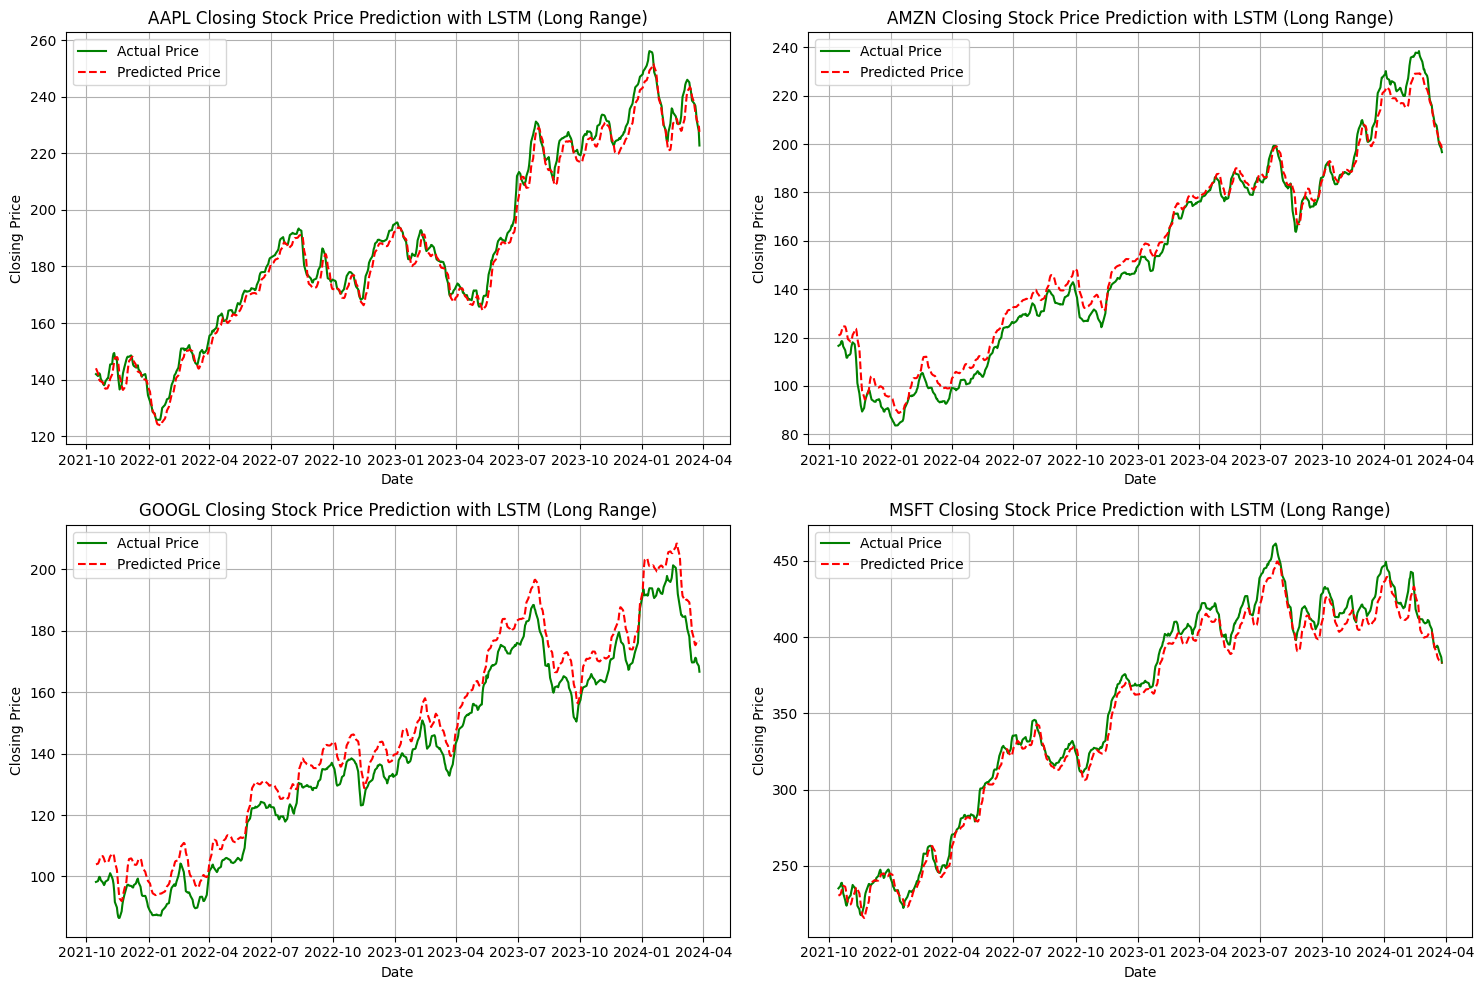

In [74]:
#Plot LSTM forecast line plot for long range stocks

fig, axes = plt.subplots(2, 2, figsize=(15, 10))  #Create subplots
axes = axes.flatten()

#Iterate through the results and plot for each stock
for i, result in enumerate(long_LSTM_results):
    stock = result['stock']
    predictions = result['predictions']
    test_data = result['actual']
    X_train = result['X_train']
    X_test = result['X_test']
    
    stock_data = long_df[(stock, 'Moving Average')]

    test_dates = stock_data.index[len(X_train): len(X_train) + len(X_test)]
    
    #Create plot
    ax = axes[i]
    ax.plot(test_dates, test_data, label='Actual Price', color='green')
    ax.plot(test_dates, predictions, label='Predicted Price', color='red', linestyle='--')

    ax.set_title(f'{stock} Closing Stock Price Prediction with LSTM (Long Range)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.legend()
    ax.grid()

#Adjust layout and show plot
plt.tight_layout()
plt.show()


#Convert Matplotlib figure to Plotly figure for dashboard
long_LSTM_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))
subplot_titles = [ax.get_title() for ax in axes]
  
#Access individual subplots' data and update layout (';' supresses plot from being displayed in the current output)
long_AAPL_LSTM_plotly_fig = go.Figure(data=[long_LSTM_plotly_fig.data[0], long_LSTM_plotly_fig.data[1]])
long_AAPL_LSTM_plotly_fig.update_layout(title_text=subplot_titles[0])

long_AMZN_LSTM_plotly_fig = go.Figure(data=[long_LSTM_plotly_fig.data[2], long_LSTM_plotly_fig.data[3]])
long_AMZN_LSTM_plotly_fig.update_layout(title_text=subplot_titles[1])

long_GOOGL_LSTM_plotly_fig = go.Figure(data=[long_LSTM_plotly_fig.data[4], long_LSTM_plotly_fig.data[5]])
long_GOOGL_LSTM_plotly_fig.update_layout(title_text=subplot_titles[2])

long_MSFT_LSTM_plotly_fig = go.Figure(data=[long_LSTM_plotly_fig.data[6], long_LSTM_plotly_fig.data[7]]);
long_MSFT_LSTM_plotly_fig.update_layout(title_text=subplot_titles[3]);

#### **Prophet**

21:18:18 - cmdstanpy - INFO - Chain [1] start processing
21:18:21 - cmdstanpy - INFO - Chain [1] done processing


Prophet forecast model evaluation for AAPL in long range period
RMSE for AAPL: 62.67375
MAE for AAPL: 60.27771
R-squared for AAPL: -2.64



21:18:23 - cmdstanpy - INFO - Chain [1] start processing
21:18:25 - cmdstanpy - INFO - Chain [1] done processing


Prophet forecast model evaluation for AMZN in long range period
RMSE for AMZN: 93.03280
MAE for AMZN: 90.70589
R-squared for AMZN: -4.30



21:18:26 - cmdstanpy - INFO - Chain [1] start processing
21:18:28 - cmdstanpy - INFO - Chain [1] done processing


Prophet forecast model evaluation for GOOGL in long range period
RMSE for GOOGL: 72.19853
MAE for GOOGL: 70.61399
R-squared for GOOGL: -4.53



21:18:30 - cmdstanpy - INFO - Chain [1] start processing
21:18:31 - cmdstanpy - INFO - Chain [1] done processing


Prophet forecast model evaluation for MSFT in long range period
RMSE for MSFT: 97.42402
MAE for MSFT: 93.21920
R-squared for MSFT: -0.74



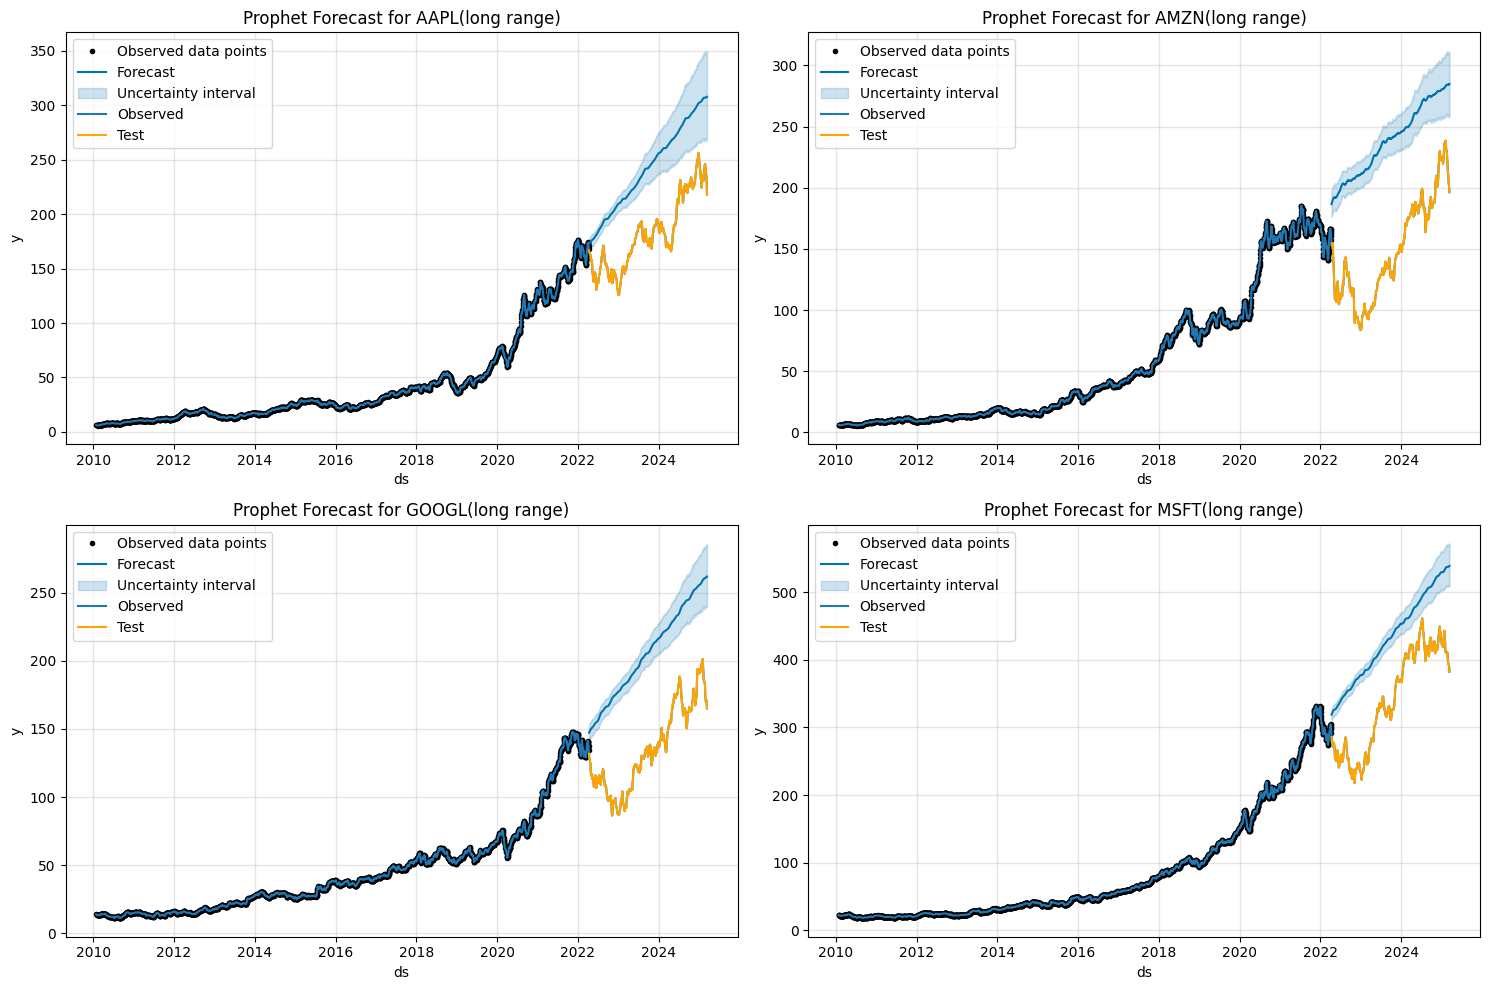

<Figure size 640x480 with 0 Axes>

In [75]:
#Prophet Forecasting for long range stocks

#Iterate through each stock in long_df DataFrame
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  #Create 2x2 subplot
axes = axes.flatten()

#Initialise dictionary to store Plotly figures for dashboard
long_Prophet_plotly_figs = {} 

for i, stock in enumerate(stocks):
    data = long_df[(stock, 'Moving Average')]

    #Create a DataFrame with 'ds' (dates) and 'y' (values) columns
    data = pd.DataFrame({'ds': data.index, 'y': data.values})

    #Remove timezone from 'ds' column
    data['ds'] = data['ds'].dt.tz_localize(None)

    #Split data
    train_size = int(len(data) * 0.8)    #80/20 split
    train, test = data[:train_size], data[train_size:]

    #Initialise and fit model
    model = Prophet() 
    model.fit(train)

    #Create a dataframe to hold the future dates and make prediction
    future = pd.DataFrame({'ds': test['ds']}) #test dates
    forecast = model.predict(future)

    #Evaluate the model
    print(f'Prophet forecast model evaluation for {stock} in long range period')

    rmse = sqrt(mean_squared_error(test['y'], forecast['yhat'][-len(test):]))
    print(f'RMSE for {stock}: {rmse:.5f}') #Rounded to five decimal place

    mae = mean_absolute_error(test['y'], forecast['yhat'][-len(test):])
    print(f'MAE for {stock}: {mae:.5f}')

    r2 = r2_score(test['y'], forecast['yhat'][-len(test):])
    print(f'R-squared for {stock}: {r2:.2f}') #Rounded to two decimal place
    print()

    #Plot the results using Plotly for dashboard
    fig_plotly = plot_plotly(model, forecast)
    fig_plotly.add_trace(go.Scatter(x=data['ds'], y=data['y'], mode='lines', name='Observed'))
    fig_plotly.add_trace(go.Scatter(x=test['ds'], y=test['y'], mode='lines', name='Test', line=dict(color='orange')))
    fig_plotly.update_layout(title=f"Prophet Forecast for {stock} (long range)", xaxis_title='Date', yaxis_title='Closing Price')
    
    long_Prophet_plotly_figs[stock] = fig_plotly #Store Plotly figure for a specific stock
 
    

    #Plot the results
    ax = axes[i] 
    model.plot(forecast, ax=ax)   #Pass prophet plot function
    ax.plot(data['ds'], data['y'], label='Observed')
    ax.plot(test['ds'], test['y'], label='Test', color='orange')
    ax.set_title(f"Prophet Forecast for {stock}(long range)")
    ax.legend()

#Adjust layout and show the plot
plt.tight_layout()
plt.show()

#Adjust layout and show the plot
plt.tight_layout()
plt.show()

#Access individual subplots' data
long_AAPL_Prophet_plotly_fig = long_Prophet_plotly_figs['AAPL']
long_AMZN_Prophet_plotly_fig = long_Prophet_plotly_figs['AMZN']
long_GOOGL_Prophet_plotly_fig = long_Prophet_plotly_figs['GOOGL']
long_MSFT_Prophet_plotly_fig = long_Prophet_plotly_figs['MSFT']

# **Model Training** 

In [78]:
#Prepared DataFrame for model training

#Short range
short_ = short_.dropna()  #drop NAN values
short_df= short_.copy()   #copy DataFrame
short_stock_data_list = [short_df[(stock, 'Moving Average')] for stock in stocks]   #Endogenous variable 
short_exo1_data_list = [short_df[(stock, 'Return')] for stock in stocks]            #Exogenous variable 
short_exo2_data_list = [short_df[(stock, 'Volatility')] for stock in stocks]        #Exogenous variable 

#Medium range
medium_ = medium_.dropna()  #drop NAN values
medium_df= medium_.copy()   #copy DataFrame
medium_stock_data_list = [medium_df[(stock, 'Moving Average')] for stock in stocks]   #Endogenous variable 
medium_exo1_data_list = [medium_df[(stock, 'Return')] for stock in stocks]            #Exogenous variable 
medium_exo2_data_list = [medium_df[(stock, 'Volatility')] for stock in stocks]        #Exogenous variable 

#Long range
long_ = long_.dropna()  #drop NAN values
long_df= long_.copy()   #copy DataFrame
long_stock_data_list = [long_df[(stock, 'Moving Average')] for stock in stocks]    #Endogenous variable 
long_exo1_data_list = [long_df[(stock, 'Return')] for stock in stocks]             #Exogenous variable 
long_exo2_data_list = [long_df[(stock, 'Volatility')] for stock in stocks]         #Exogenous variable 

## *Short Range Stocks Model Training*

### *AAPL*

In [79]:
#LSTM Forecasting for AAPL (Short Range) with Exogenous Features


#Set the seed value for reproducibility
seed_value = 42
#Set the PYTHONHASHSEED environment variable to ensure consistent hash-based operations
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)         #Seed for Python
np.random.seed(seed_value)      #Seed for NumPy
tf.random.set_seed(seed_value)  #Seed for TensorFlow
#Enforce deterministic behavior for TensorFlow operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'


short_AAPL_model = []   #Empty list initialised to store model result
stock = 'AAPL'

#Data
short_stock_data = short_stock_data_list[0]       #Closing Price
short_exo1_data = short_exo1_data_list[0]         #Return
short_exo2_data = short_exo2_data_list[0]         #Volatility

#Split data first before scaling to avoid data bleeding
size = int(len(short_stock_data) * 0.8)   #80/20 split
tain_data, test_data = short_stock_data[:size], short_stock_data[size:]
train_exo1_data, test_exo1_data = short_exo1_data[:size], short_exo1_data[size:]
train_exo2_data, test_exo2_data = short_exo2_data[:size], short_exo2_data[size:]

#Separatly fit stock datas to avoid data bleeding
#Create and fit a MinMaxScaler for stock data (endogenous variable)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tain_data.values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

#Create and fit a MinMaxScaler for exogenous features
scaler_exo1 = MinMaxScaler()
scaled_exo1 = scaler_exo1.fit_transform(train_exo1_data.values.reshape(-1, 1))
scaled_test_exo1 = scaler_exo1.transform(test_exo1_data.values.reshape(-1, 1))

scaler_exo2 = MinMaxScaler()
scaled_exo2 = scaler_exo2.fit_transform(train_exo2_data.values.reshape(-1, 1))
scaled_test_exo2 = scaler_exo2.transform(test_exo2_data.values.reshape(-1, 1))

#Function that creates dataset with lookback period
def create_dataset(dataset, exo1_dataset, exo2_dataset, look_back=1):
    X, Y, exo1, exo2 = [], [], [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        exo1.append(exo1_dataset[i + look_back, 0])
        exo2.append(exo2_dataset[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(exo1), np.array(exo2)

#Function call
look_back=120 #(120x2) 240 minutes (4 hour) look back
X_train, Y_train, exo1_train, exo2_train = create_dataset(scaled_data,
                                                          scaled_exo1,
                                                          scaled_exo2,
                                                          look_back)

X_test, Y_test, exo1_test, exo2_test = create_dataset(scaled_test_data,
                                                      scaled_test_exo1,
                                                      scaled_test_exo2,
                                                      look_back)

#Reshape input to be [samples, look_back, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

exo1_train = exo1_train.reshape(exo1_train.shape[0], 1, 1)
exo1_test = exo1_test.reshape(exo1_test.shape[0], 1, 1)

exo2_train = exo2_train.reshape(exo2_train.shape[0], 1, 1)
exo2_test = exo2_test.reshape(exo2_test.shape[0], 1, 1)

#Concatenate endogenous and exogenous data
train_data = np.concatenate((X_train, exo1_train, exo2_train), axis=1)
test_data = np.concatenate((X_test, exo1_test, exo2_test), axis=1)

#Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=8),
                   input_shape=(look_back, train_data.shape[2]), return_sequences = True))  #First layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=8))) #Second layer
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))) #Dropout rate
    model.add(Dense(1))

    #hyper parameters for learning rate and epochs
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_epochs = hp.Int('epochs', min_value=50, max_value=200, step=50)
    
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))
    return model

#Initialise the tuner
tuner = RandomSearch( build_model,
                     objective='val_loss',     #Objective to optimize
                     max_trials=5,             #Number of different model variations to try
                     executions_per_trial=3,   #Number of times to train each model variation
                     directory='stock_model',  #Directory to store results
                     project_name='short_AAPL_lstm_model')

#Define early stopping before performing search
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Perform search
tuner.search(X_train,
             Y_train,
             epochs=100,
             batch_size = 64,
             validation_data = (X_test, Y_test), 
             callbacks=[early_stopping])

#Get the best model and best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0] #first model is the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] #first hyperparameter is the best hyperparameter

#Print best model summary and best hyperparameters
print () #Add space
print (f'{stock} Best Model Summary and Hyperparameters')
print(best_model.summary())
print(best_hps.values)
print () #Add space

#Train the model
best_model.fit(X_train, Y_train, validation_data=(X_test, Y_test))

#Save the model in Keras format
best_model.save('short_AAPL_lstm_model.keras') 

#Make predictions
predictions = best_model.predict([X_test, exo1_test, exo2_test])
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

train_predictions = best_model.predict([X_train, exo1_train, exo2_train])
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))

print () #Add space
#Evaluate the model
print(f'LSTM forecast model evaluation for {stock} in short range period')

#Calculate Root Mean Square
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f'Test RMSE for {stock}: {rmse:.5f}') #rounded to five decimal place

#Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE for {stock}: {mae:.5f}')

#Calculate R Square
r2 = r2_score(Y_test, predictions)
print(f'Test R-squared for {stock}: {r2:.2f}') #rounded to two decimal place

#Store predictions and actual values for plotting
short_AAPL_model.append({'stock': stock,
                         'predictions': predictions,
                          'actual': Y_test,
                          'X_train': X_train,
                          'X_test': X_test,
                          'look_back': look_back})

Reloading Tuner from stock_model\short_AAPL_lstm_model\tuner0.json

AAPL Best Model Summary and Hyperparameters


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 40)        │         6,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 104)            │        60,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 104)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,145 (262.29 KB)

 Trainable params: 67,145 (262.29 KB)

 Non-trainable params: 0 (0.00 B)

None
{'units_1': 40, 'units_2': 104, 'dropout': 0.0, 'learning_rate': 0.01, 'epochs': 50}

82/82 ━━━━━━━━━━━━━━━━━━━━ 36s 148ms/step - loss: 0.0799 - val_loss: 8.6926e-04
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step

LSTM forecast model evaluation for AAPL in short range period
Test RMSE for AAPL: 0.84208
Test MAE for AAPL: 0.75996
Test R-squared for AAPL: 0.89


#### *Trained Model Plot*

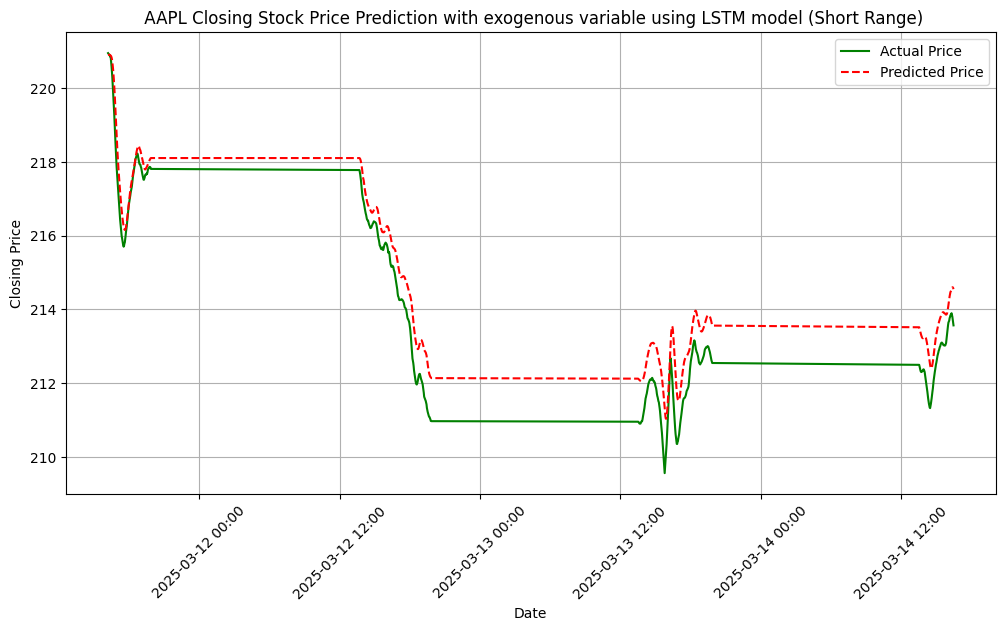

In [80]:
#Plot LSTM forecast line plot for AAPL stocks in short range 

fig=plt.figure(figsize=(12, 6))  #Create plot

#Iterate through the results and plot result
for result in short_AAPL_model:
    stock = result['stock']
    predictions = result['predictions']
    test_data = result['actual']
    X_train = result['X_train']
    X_test = result['X_test']
    look_back = result['look_back']

    test_dates = short_stock_data.index[len(X_train) + look_back : len(X_train) + len(X_test) + look_back]
    
    plt.plot(test_dates, test_data, label='Actual Price', color='green')
    plt.plot(test_dates, predictions, label='Predicted Price', color='red', linestyle='--')

    #Format date to show full hour
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M')) 
        
    plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels for better readability
    plt.title(f' {stock} Closing Stock Price Prediction with exogenous variable using LSTM model (Short Range)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid()
    
    #Show plot
    plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
short_AAPL_trained_model_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

### *AMZN*

In [81]:
#LSTM Forecasting for AMZN (Short Range) with Exogenous Features


#Set the seed value for reproducibility
seed_value = 42
#Set the PYTHONHASHSEED environment variable to ensure consistent hash-based operations
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)         #Seed for Python
np.random.seed(seed_value)      #Seed for NumPy
tf.random.set_seed(seed_value)  #Seed for TensorFlow
#Enforce deterministic behavior for TensorFlow operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'


short_AMZN_model = []   #Empty list initialised to store model result
stock = 'AMZN'

#Data
short_stock_data = short_stock_data_list[1]       #Closing Price
short_exo1_data = short_exo1_data_list[1]         #Return
short_exo2_data = short_exo2_data_list[1]         #Volatility

#Split data first before scaling to avoid data bleeding
size = int(len(short_stock_data) * 0.8)   #80/20 split
tain_data, test_data = short_stock_data[:size], short_stock_data[size:]
train_exo1_data, test_exo1_data = short_exo1_data[:size], short_exo1_data[size:]
train_exo2_data, test_exo2_data = short_exo2_data[:size], short_exo2_data[size:]

#Separatly fit stock datas to avoid data bleeding
#Create and fit a MinMaxScaler for stock data (endogenous variable)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tain_data.values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

#Create and fit a MinMaxScaler for exogenous features
scaler_exo1 = MinMaxScaler()
scaled_exo1 = scaler_exo1.fit_transform(train_exo1_data.values.reshape(-1, 1))
scaled_test_exo1 = scaler_exo1.transform(test_exo1_data.values.reshape(-1, 1))

scaler_exo2 = MinMaxScaler()
scaled_exo2 = scaler_exo2.fit_transform(train_exo2_data.values.reshape(-1, 1))
scaled_test_exo2 = scaler_exo2.transform(test_exo2_data.values.reshape(-1, 1))

#Function that creates dataset with lookback period
def create_dataset(dataset, exo1_dataset, exo2_dataset, look_back=1):
    X, Y, exo1, exo2 = [], [], [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        exo1.append(exo1_dataset[i + look_back, 0])
        exo2.append(exo2_dataset[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(exo1), np.array(exo2)

#Function call
look_back=120 #(120x2) 240 minutes (4 hour) look back
X_train, Y_train, exo1_train, exo2_train = create_dataset(scaled_data,
                                                          scaled_exo1,
                                                          scaled_exo2,
                                                          look_back)

X_test, Y_test, exo1_test, exo2_test = create_dataset(scaled_test_data,
                                                      scaled_test_exo1,
                                                      scaled_test_exo2,
                                                      look_back)

#Reshape input to be [samples, look_back, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

exo1_train = exo1_train.reshape(exo1_train.shape[0], 1, 1)
exo1_test = exo1_test.reshape(exo1_test.shape[0], 1, 1)

exo2_train = exo2_train.reshape(exo2_train.shape[0], 1, 1)
exo2_test = exo2_test.reshape(exo2_test.shape[0], 1, 1)

#Concatenate endogenous and exogenous data
train_data = np.concatenate((X_train, exo1_train, exo2_train), axis=1)
test_data = np.concatenate((X_test, exo1_test, exo2_test), axis=1)

#Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=8),
                   input_shape=(look_back, train_data.shape[2]), return_sequences = True))  #First layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=8))) #Second layer
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))) #Dropout rate
    model.add(Dense(1))

    #hyper parameters for learning rate and epochs
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_epochs = hp.Int('epochs', min_value=50, max_value=200, step=50)
    
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))
    return model

#Initialise the tuner
tuner = RandomSearch( build_model,
                     objective='val_loss',  #Objective to optimize
                     max_trials=5,  #Number of different model variations to try
                     executions_per_trial=3,  #Number of times to train each model variation
                     directory='stock_model',  #Directory to store results
                     project_name='short_AMZN_lstm_model')

#Define early stopping before performing search
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Perform search
tuner.search(X_train,
             Y_train,
             epochs=100,
             batch_size = 64,
             validation_data = (X_test, Y_test), 
             callbacks=[early_stopping])

#Get the best model and best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0] #first model is the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] #first hyperparameter is the best hyperparameter

#Print best model summary and best hyperparameters
print () #Add space
print (f'{stock} Best Model Summary and Hyperparameters')
print(best_model.summary())
print(best_hps.values)
print () #Add space

#Train the model
best_model.fit(X_train, Y_train, validation_data=(X_test, Y_test))

#Save the model in Keras format
best_model.save('short_AMZN_lstm_model.keras') 

#Make predictions
predictions = best_model.predict([X_test, exo1_test, exo2_test])
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

train_predictions = best_model.predict([X_train, exo1_train, exo2_train])
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))

print () #Add space
#Evaluate the model
print(f'LSTM forecast model evaluation for {stock} in short range period')

#Calculate Root Mean Square
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f'Test RMSE for {stock}: {rmse:.5f}') #rounded to five decimal place

#Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE for {stock}: {mae:.5f}')

#Calculate R Square
r2 = r2_score(Y_test, predictions)
print(f'Test R-squared for {stock}: {r2:.2f}') #rounded to two decimal place

#Store predictions and actual values for plotting
short_AMZN_model.append({'stock': stock,
                         'predictions': predictions,
                          'actual': Y_test,
                          'X_train': X_train,
                          'X_test': X_test,
                          'look_back': look_back})

Reloading Tuner from stock_model\short_AMZN_lstm_model\tuner0.json

AMZN Best Model Summary and Hyperparameters


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 48)        │         9,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,001 (78.13 KB)

 Trainable params: 20,001 (78.13 KB)

 Non-trainable params: 0 (0.00 B)

None
{'units_1': 48, 'units_2': 32, 'dropout': 0.1, 'learning_rate': 0.01, 'epochs': 150}

82/82 ━━━━━━━━━━━━━━━━━━━━ 16s 113ms/step - loss: 0.0037 - val_loss: 3.9397e-05
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step

LSTM forecast model evaluation for AMZN in short range period
Test RMSE for AMZN: 0.22663
Test MAE for AMZN: 0.17339
Test R-squared for AMZN: 0.99


#### *Trained Model Plot*

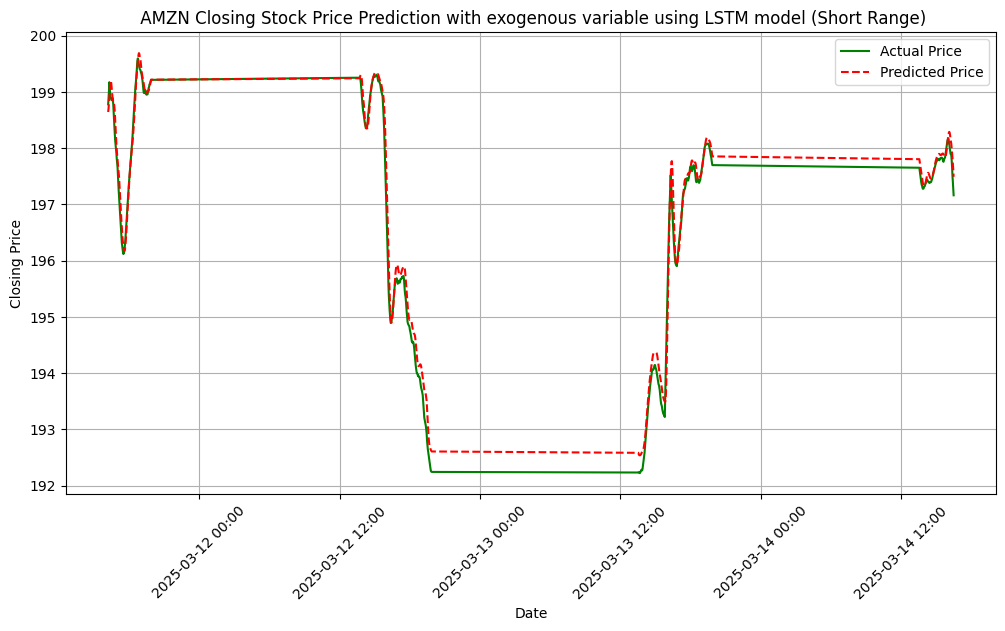

In [82]:
#Plot LSTM forecast line plot for AMZN stocks in short range 

fig=plt.figure(figsize=(12, 6))  #Create plot

#Iterate through the results and plot result
for result in short_AMZN_model:
    stock = result['stock']
    predictions = result['predictions']
    test_data = result['actual']
    X_train = result['X_train']
    X_test = result['X_test']
    look_back = result['look_back']

    test_dates = short_stock_data.index[len(X_train) + look_back : len(X_train) + len(X_test) + look_back]
    
    plt.plot(test_dates, test_data, label='Actual Price', color='green')
    plt.plot(test_dates, predictions, label='Predicted Price', color='red', linestyle='--')

    #Format date to show full hour
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M')) 
    
    plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels for better readability
    plt.title(f' {stock} Closing Stock Price Prediction with exogenous variable using LSTM model (Short Range)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid()
    
    #Show plot
    plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
short_AMZN_trained_model_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

### *GOOGL*

In [83]:
#LSTM Forecasting for GOOGL (Short Range) with Exogenous Features


#Set the seed value for reproducibility
seed_value = 42
#Set the PYTHONHASHSEED environment variable to ensure consistent hash-based operations
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)         #Seed for Python
np.random.seed(seed_value)      #Seed for NumPy
tf.random.set_seed(seed_value)  #Seed for TensorFlow
#Enforce deterministic behavior for TensorFlow operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'


short_GOOGL_model = []   #Empty list initialised to store model result
stock = 'GOOGL'

#Data
short_stock_data = short_stock_data_list[2]       #Closing Price
short_exo1_data = short_exo1_data_list[2]         #Return
short_exo2_data = short_exo2_data_list[2]         #Volatility

#Split data first before scaling to avoid data bleeding
size = int(len(short_stock_data) * 0.8)   #80/20 split
tain_data, test_data = short_stock_data[:size], short_stock_data[size:]
train_exo1_data, test_exo1_data = short_exo1_data[:size], short_exo1_data[size:]
train_exo2_data, test_exo2_data = short_exo2_data[:size], short_exo2_data[size:]

#Separatly fit stock datas to avoid data bleeding
#Create and fit a MinMaxScaler for stock data (endogenous variable)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tain_data.values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

#Create and fit a MinMaxScaler for exogenous features
scaler_exo1 = MinMaxScaler()
scaled_exo1 = scaler_exo1.fit_transform(train_exo1_data.values.reshape(-1, 1))
scaled_test_exo1 = scaler_exo1.transform(test_exo1_data.values.reshape(-1, 1))

scaler_exo2 = MinMaxScaler()
scaled_exo2 = scaler_exo2.fit_transform(train_exo2_data.values.reshape(-1, 1))
scaled_test_exo2 = scaler_exo2.transform(test_exo2_data.values.reshape(-1, 1))

#Function that creates dataset with lookback period
def create_dataset(dataset, exo1_dataset, exo2_dataset, look_back=1):
    X, Y, exo1, exo2 = [], [], [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        exo1.append(exo1_dataset[i + look_back, 0])
        exo2.append(exo2_dataset[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(exo1), np.array(exo2)

#Function call
look_back=120 #(120x2) 240 minutes (4 hour) look back

X_train, Y_train, exo1_train, exo2_train = create_dataset(scaled_data,
                                                          scaled_exo1,
                                                          scaled_exo2,
                                                          look_back)

X_test, Y_test, exo1_test, exo2_test = create_dataset(scaled_test_data,
                                                      scaled_test_exo1,
                                                      scaled_test_exo2,
                                                      look_back)

#Reshape input to be [samples, look_back, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

exo1_train = exo1_train.reshape(exo1_train.shape[0], 1, 1)
exo1_test = exo1_test.reshape(exo1_test.shape[0], 1, 1)

exo2_train = exo2_train.reshape(exo2_train.shape[0], 1, 1)
exo2_test = exo2_test.reshape(exo2_test.shape[0], 1, 1)

#Concatenate endogenous and exogenous data
train_data = np.concatenate((X_train, exo1_train, exo2_train), axis=1)
test_data = np.concatenate((X_test, exo1_test, exo2_test), axis=1)

#Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=8),
                   input_shape=(look_back, train_data.shape[2]), return_sequences = True))  #First layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=8))) #Second layer
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))) #Dropout rate
    model.add(Dense(1))

    #hyper parameters for learning rate and epochs
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_epochs = hp.Int('epochs', min_value=50, max_value=200, step=50)
    
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))
    return model

#Initialise the tuner
tuner = RandomSearch( build_model,
                     objective='val_loss',     #Objective to optimize
                     max_trials=5,             #Number of different model variations to try
                     executions_per_trial=3,   #Number of times to train each model variation
                     directory='stock_model',  #Directory to store results
                     project_name='short_GOOGL_lstm_model')

#Define early stopping before performing search
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Perform search
tuner.search(X_train,
             Y_train,
             epochs=100,
             batch_size = 64,
             validation_data = (X_test, Y_test), 
             callbacks=[early_stopping])

#Get the best model and best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0] #first model is the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] #first hyperparameter is the best hyperparameter

#Print best model summary and best hyperparameters
print () #Add space
print (f'{stock} Best Model Summary and Hyperparameters')
print(best_model.summary())
print(best_hps.values)
print () #Add space

#Train the model
best_model.fit(X_train, Y_train, validation_data=(X_test, Y_test))

#Save the model in Keras format
best_model.save('short_GOOGL_lstm_model.keras') 

#Make predictions
predictions = best_model.predict([X_test, exo1_test, exo2_test])
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

train_predictions = best_model.predict([X_train, exo1_train, exo2_train])
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))

print () #Add space
#Evaluate the model
print(f'LSTM forecast model evaluation for {stock} in short range period')

#Calculate Root Mean Square
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f'Test RMSE for {stock}: {rmse:.5f}') #rounded to five decimal place

#Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE for {stock}: {mae:.5f}')

#Calculate R Square
r2 = r2_score(Y_test, predictions)
print(f'Test R-squared for {stock}: {r2:.2f}') #rounded to two decimal place

#Store predictions and actual values for plotting
short_GOOGL_model.append({'stock': stock,
                         'predictions': predictions,
                          'actual': Y_test,
                          'X_train': X_train,
                          'X_test': X_test,
                          'look_back': look_back})

Reloading Tuner from stock_model\short_GOOGL_lstm_model\tuner0.json

GOOGL Best Model Summary and Hyperparameters


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 64)        │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 88)             │        53,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 88)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            89 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,841 (276.72 KB)

 Trainable params: 70,841 (276.72 KB)

 Non-trainable params: 0 (0.00 B)

None
{'units_1': 64, 'units_2': 88, 'dropout': 0.1, 'learning_rate': 0.01, 'epochs': 150}

82/82 ━━━━━━━━━━━━━━━━━━━━ 17s 124ms/step - loss: 0.0134 - val_loss: 1.0883e-04
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step

LSTM forecast model evaluation for GOOGL in short range period
Test RMSE for GOOGL: 0.21611
Test MAE for GOOGL: 0.18799
Test R-squared for GOOGL: 0.97


#### *Trained Model Plot*

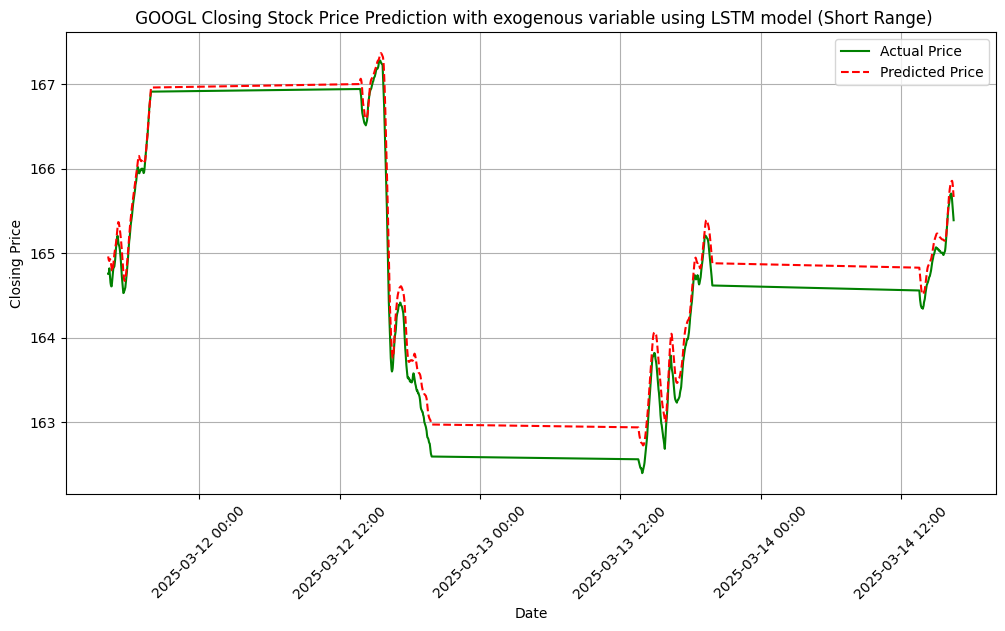

In [84]:
#Plot LSTM forecast line plot for GOOGL stocks in short range 

fig = plt.figure(figsize=(12, 6))  #Create plot

#Iterate through the results and plot result
for result in short_GOOGL_model:
    stock = result['stock']
    predictions = result['predictions']
    test_data = result['actual']
    X_train = result['X_train']
    X_test = result['X_test']
    look_back = result['look_back']

    test_dates = short_stock_data.index[len(X_train) + look_back : len(X_train) + len(X_test) + look_back]
    
    plt.plot(test_dates, test_data, label='Actual Price', color='green')
    plt.plot(test_dates, predictions, label='Predicted Price', color='red', linestyle='--')
    
    #Format date to show full hour
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M')) 
    
    plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels for better readability
    plt.title(f' {stock} Closing Stock Price Prediction with exogenous variable using LSTM model (Short Range)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid()
    
    #Show plot
    plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
short_GOOGL_trained_model_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

### *MSFT*

In [85]:
#LSTM Forecasting for MSFT (Short Range) with Exogenous Features


#Set the seed value for reproducibility
seed_value = 42
#Set the PYTHONHASHSEED environment variable to ensure consistent hash-based operations
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)         #Seed for Python
np.random.seed(seed_value)      #Seed for NumPy
tf.random.set_seed(seed_value)  #Seed for TensorFlow
#Enforce deterministic behavior for TensorFlow operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'


short_MSFT_model = []   #Empty list initialised to store model result
stock = 'MSFT'

#Data
short_stock_data = short_stock_data_list[3]       #Closing Price
short_exo1_data = short_exo1_data_list[3]         #Return
short_exo2_data = short_exo2_data_list[3]         #Volatility

#Split data first before scaling to avoid data bleeding
size = int(len(short_stock_data) * 0.8)   #80/20 split
tain_data, test_data = short_stock_data[:size], short_stock_data[size:]
train_exo1_data, test_exo1_data = short_exo1_data[:size], short_exo1_data[size:]
train_exo2_data, test_exo2_data = short_exo2_data[:size], short_exo2_data[size:]

#Separatly fit stock datas to avoid data bleeding
#Create and fit a MinMaxScaler for stock data (endogenous variable)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tain_data.values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

#Create and fit a MinMaxScaler for exogenous features
scaler_exo1 = MinMaxScaler()
scaled_exo1 = scaler_exo1.fit_transform(train_exo1_data.values.reshape(-1, 1))
scaled_test_exo1 = scaler_exo1.transform(test_exo1_data.values.reshape(-1, 1))

scaler_exo2 = MinMaxScaler()
scaled_exo2 = scaler_exo2.fit_transform(train_exo2_data.values.reshape(-1, 1))
scaled_test_exo2 = scaler_exo2.transform(test_exo2_data.values.reshape(-1, 1))

#Function that creates dataset with lookback period
def create_dataset(dataset, exo1_dataset, exo2_dataset, look_back=1):
    X, Y, exo1, exo2 = [], [], [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        exo1.append(exo1_dataset[i + look_back, 0])
        exo2.append(exo2_dataset[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(exo1), np.array(exo2)

#Function call
look_back=120 #(120x2) 240 minutes (4 hr)look back
X_train, Y_train, exo1_train, exo2_train = create_dataset(scaled_data,
                                                          scaled_exo1,
                                                          scaled_exo2,
                                                          look_back)

X_test, Y_test, exo1_test, exo2_test = create_dataset(scaled_test_data,
                                                      scaled_test_exo1,
                                                      scaled_test_exo2,
                                                      look_back)

#Reshape input to be [samples, look_back, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

exo1_train = exo1_train.reshape(exo1_train.shape[0], 1, 1)
exo1_test = exo1_test.reshape(exo1_test.shape[0], 1, 1)

exo2_train = exo2_train.reshape(exo2_train.shape[0], 1, 1)
exo2_test = exo2_test.reshape(exo2_test.shape[0], 1, 1)

#Concatenate endogenous and exogenous data
train_data = np.concatenate((X_train, exo1_train, exo2_train), axis=1)
test_data = np.concatenate((X_test, exo1_test, exo2_test), axis=1)

#Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=8),
                   input_shape=(look_back, train_data.shape[2]), return_sequences = True))  #First layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=8))) #Second layer
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))) #Dropout rate
    model.add(Dense(1))

    #hyper parameters for learning rate and epochs
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_epochs = hp.Int('epochs', min_value=50, max_value=200, step=50)
    
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))
    return model

#Initialise the tuner
tuner = RandomSearch( build_model,
                     objective='val_loss',     #Objective to optimize
                     max_trials=5,             #Number of different model variations to try
                     executions_per_trial=3,   #Number of times to train each model variation
                     directory='stock_model',  #Directory to store results
                     project_name='short_MSFT_lstm_model')

#Define early stopping before performing search
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Perform search
tuner.search(X_train,
             Y_train,
             epochs=100,
             batch_size = 64,
             validation_data = (X_test, Y_test), 
             callbacks=[early_stopping])

#Get the best model and best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0] #first model is the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] #first hyperparameter is the best hyperparameter

#Print best model summary and best hyperparameters
print () #Add space
print (f'{stock} Best Model Summary and Hyperparameters')
print(best_model.summary())
print(best_hps.values)
print () #Add space

#Train the model
best_model.fit(X_train, Y_train, validation_data=(X_test, Y_test))

#Save the model in Keras format
best_model.save('short_MSFT_lstm_model.keras') 

#Make predictions
predictions = best_model.predict([X_test, exo1_test, exo2_test])
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

train_predictions = best_model.predict([X_train, exo1_train, exo2_train])
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))

print () #Add space
#Evaluate the model
print(f'LSTM forecast model evaluation for {stock} in short range period')

#Calculate Root Mean Square
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f'Test RMSE for {stock}: {rmse:.5f}') #rounded to five decimal place

#Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE for {stock}: {mae:.5f}')

#Calculate R Square
r2 = r2_score(Y_test, predictions)
print(f'Test R-squared for {stock}: {r2:.2f}') #rounded to two decimal place

#Store predictions and actual values for plotting
short_MSFT_model.append({'stock': stock,
                         'predictions': predictions,
                          'actual': Y_test,
                          'X_train': X_train,
                          'X_test': X_test,
                          'look_back': look_back})

Reloading Tuner from stock_model\short_MSFT_lstm_model\tuner0.json

MSFT Best Model Summary and Hyperparameters


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 96)        │        37,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 88)             │        65,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 88)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            89 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,841 (401.72 KB)

 Trainable params: 102,841 (401.72 KB)

 Non-trainable params: 0 (0.00 B)

None
{'units_1': 96, 'units_2': 88, 'dropout': 0.2, 'learning_rate': 0.01, 'epochs': 100}

82/82 ━━━━━━━━━━━━━━━━━━━━ 17s 152ms/step - loss: 0.0075 - val_loss: 4.2642e-04
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step

LSTM forecast model evaluation for MSFT in short range period
Test RMSE for MSFT: 0.80891
Test MAE for MSFT: 0.77279
Test R-squared for MSFT: 0.93


#### *Trained Model Plot*

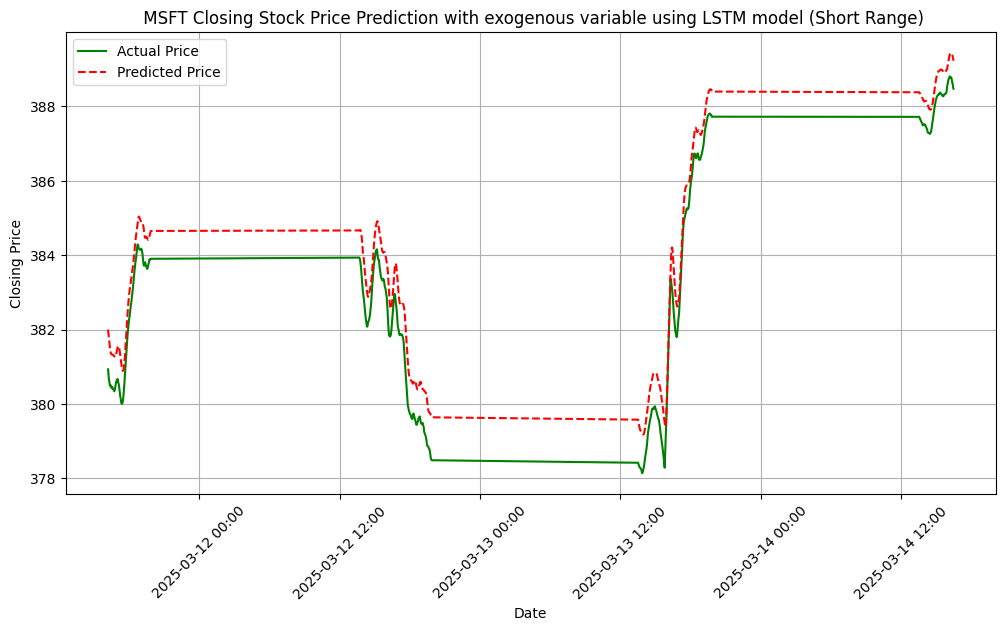

In [86]:
#Plot LSTM forecast line plot for MSFT stocks in short range 

fig=plt.figure(figsize=(12, 6))  #Create plot

#Iterate through the results and plot result
for result in short_MSFT_model:
    stock = result['stock']
    predictions = result['predictions']
    test_data = result['actual']
    X_train = result['X_train']
    X_test = result['X_test']
    look_back = result['look_back']

    test_dates = short_stock_data.index[len(X_train) + look_back : len(X_train) + len(X_test) + look_back]
    
    plt.plot(test_dates, test_data, label='Actual Price', color='green')
    plt.plot(test_dates, predictions, label='Predicted Price', color='red', linestyle='--')

    #Format date to show full hour
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M')) 
    
    plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels for better readability
    plt.title(f' {stock} Closing Stock Price Prediction with exogenous variable using LSTM model (Short Range)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid()
    
    #Show plot
    plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
short_MSFT_trained_model_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

## *Medium Range Stocks Model Training*

### *AAPL*

In [87]:
#LSTM Forecasting for AAPL (Medium Range) with Exogenous Features


#Set the seed value for reproducibility
seed_value = 42
#Set the PYTHONHASHSEED environment variable to ensure consistent hash-based operations
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)         #Seed for Python
np.random.seed(seed_value)      #Seed for NumPy
tf.random.set_seed(seed_value)  #Seed for TensorFlow
#Enforce deterministic behavior for TensorFlow operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'


medium_AAPL_model = []   #Empty list initialised to store model result
stock = 'AAPL'

#Data
medium_stock_data = medium_stock_data_list[0]       #Closing Price
medium_exo1_data = medium_exo1_data_list[0]         #Return
medium_exo2_data = medium_exo2_data_list[0]         #Volatility

#Split data first before scaling to avoid data bleeding
size = int(len(medium_stock_data) * 0.8)   #80/20 split
tain_data, test_data = medium_stock_data[:size], medium_stock_data[size:]
train_exo1_data, test_exo1_data = medium_exo1_data[:size], medium_exo1_data[size:]
train_exo2_data, test_exo2_data = medium_exo2_data[:size], medium_exo2_data[size:]

#Separatly fit stock datas to avoid data bleeding
#Create and fit a MinMaxScaler for stock data (endogenous variable)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tain_data.values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

#Create and fit a MinMaxScaler for exogenous features
scaler_exo1 = MinMaxScaler()
scaled_exo1 = scaler_exo1.fit_transform(train_exo1_data.values.reshape(-1, 1))
scaled_test_exo1 = scaler_exo1.transform(test_exo1_data.values.reshape(-1, 1))

scaler_exo2 = MinMaxScaler()
scaled_exo2 = scaler_exo2.fit_transform(train_exo2_data.values.reshape(-1, 1))
scaled_test_exo2 = scaler_exo2.transform(test_exo2_data.values.reshape(-1, 1))

#Function that creates dataset with lookback period
def create_dataset(dataset, exo1_dataset, exo2_dataset, look_back=1):
    X, Y, exo1, exo2 = [], [], [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        exo1.append(exo1_dataset[i + look_back, 0])
        exo2.append(exo2_dataset[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(exo1), np.array(exo2)

#Function call
look_back=120 #120 working days (6 months) look back

X_train, Y_train, exo1_train, exo2_train = create_dataset(scaled_data,
                                                          scaled_exo1,
                                                          scaled_exo2,
                                                          look_back)

X_test, Y_test, exo1_test, exo2_test = create_dataset(scaled_test_data,
                                                      scaled_test_exo1,
                                                      scaled_test_exo2,
                                                      look_back)

#Reshape input to be [samples, look_back, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

exo1_train = exo1_train.reshape(exo1_train.shape[0], 1, 1)
exo1_test = exo1_test.reshape(exo1_test.shape[0], 1, 1)

exo2_train = exo2_train.reshape(exo2_train.shape[0], 1, 1)
exo2_test = exo2_test.reshape(exo2_test.shape[0], 1, 1)

#Concatenate endogenous and exogenous data
train_data = np.concatenate((X_train, exo1_train, exo2_train), axis=1)
test_data = np.concatenate((X_test, exo1_test, exo2_test), axis=1)

#Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=8),
                   input_shape=(look_back, train_data.shape[2]), return_sequences = True))  #First layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=8))) #Second layer
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))) #Dropout rate
    model.add(Dense(1))

    #hyper parameters for learning rate and epochs
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_epochs = hp.Int('epochs', min_value=50, max_value=200, step=50)
    
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))
    return model

#Initialise the tuner
tuner = RandomSearch( build_model,
                     objective='val_loss',     #Objective to optimize
                     max_trials=5,             #Number of different model variations to try
                     executions_per_trial=3,   #Number of times to train each model variation
                     directory='stock_model',  #Directory to store results
                     project_name='medium_AAPL_lstm_model')

#Define early stopping before performing search
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Perform search
tuner.search(X_train,
             Y_train,
             epochs=100,
             batch_size = 64,
             validation_data = (X_test, Y_test), 
             callbacks=[early_stopping])

#Get the best model and best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0] #first model is the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] #first hyperparameter is the best hyperparameter

#Print best model summary and best hyperparameters
print () #Add space
print (f'{stock} Best Model Summary and Hyperparameters')
print(best_model.summary())
print(best_hps.values)
print () #Add space

#Train the model
best_model.fit(X_train, Y_train, validation_data=(X_test, Y_test))

#Save the model in Keras format
best_model.save('medium_AAPL_lstm_model.keras') 

#Make predictions
predictions = best_model.predict([X_test, exo1_test, exo2_test])
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

train_predictions = best_model.predict([X_train, exo1_train, exo2_train])
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))

print () #Add space
#Evaluate the model
print(f'LSTM forecast model evaluation for {stock} in medium range period')

#Calculate Root Mean Square
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f'Test RMSE for {stock}: {rmse:.5f}') #rounded to five decimal place

#Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE for {stock}: {mae:.5f}')

#Calculate R Square
r2 = r2_score(Y_test, predictions)
print(f'Test R-squared for {stock}: {r2:.2f}') #rounded to two decimal place

#Store predictions and actual values for plotting
medium_AAPL_model.append({'stock': stock,
                         'predictions': predictions,
                          'actual': Y_test,
                          'X_train': X_train,
                          'X_test': X_test,
                          'look_back': look_back})

Reloading Tuner from stock_model\medium_AAPL_lstm_model\tuner0.json

AAPL Best Model Summary and Hyperparameters


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 96)        │        37,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 112)            │        93,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           113 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,377 (513.19 KB)

 Trainable params: 131,377 (513.19 KB)

 Non-trainable params: 0 (0.00 B)

None
{'units_1': 96, 'units_2': 112, 'dropout': 0.2, 'learning_rate': 0.01, 'epochs': 150}

78/78 ━━━━━━━━━━━━━━━━━━━━ 17s 166ms/step - loss: 0.0043 - val_loss: 1.4671e-04
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step

LSTM forecast model evaluation for AAPL in medium range period
Test RMSE for AAPL: 0.96751
Test MAE for AAPL: 0.70559
Test R-squared for AAPL: 0.99


#### *Trained Model Plot*

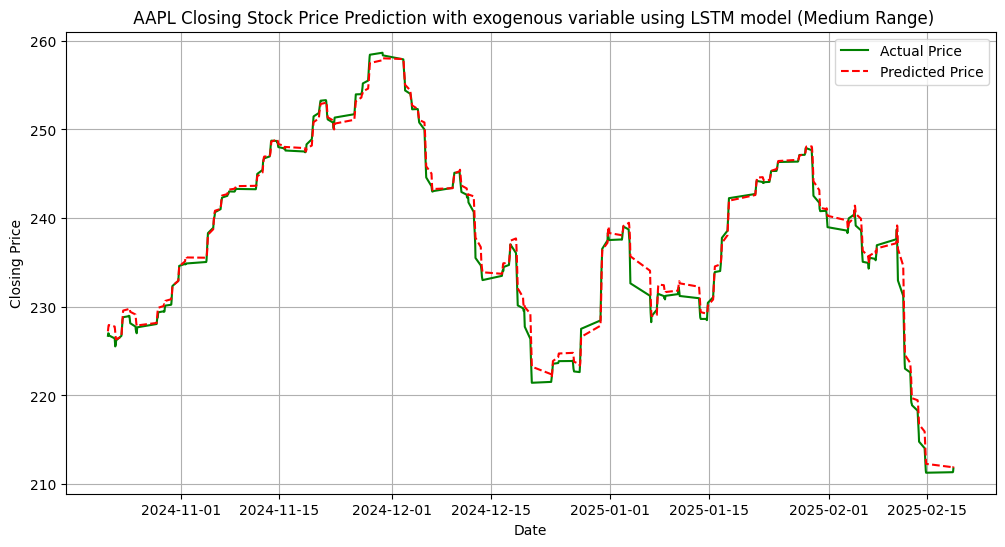

In [88]:
#Plot LSTM forecast line plot for AAPL stocks in medium range 

fig = plt.figure(figsize=(12, 6))  #Create plot

#Iterate through the results and plot result
for result in medium_AAPL_model:
    stock = result['stock']
    predictions = result['predictions']
    test_data = result['actual']
    X_train = result['X_train']
    X_test = result['X_test']
    look_back = result['look_back']

    test_dates = medium_stock_data.index[len(X_train) + look_back : len(X_train) + len(X_test) + look_back]
    
    plt.plot(test_dates, test_data, label='Actual Price', color='green')
    plt.plot(test_dates, predictions, label='Predicted Price', color='red', linestyle='--')

    plt.title(f' {stock} Closing Stock Price Prediction with exogenous variable using LSTM model (Medium Range)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid()
    
    #Show plot
    plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
medium_AAPL_trained_model_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

###  *AMZN*

In [89]:
#LSTM Forecasting for AMZN (Medium Range) with Exogenous Features


#Set the seed value for reproducibility
seed_value = 42
#Set the PYTHONHASHSEED environment variable to ensure consistent hash-based operations
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)         #Seed for Python
np.random.seed(seed_value)      #Seed for NumPy
tf.random.set_seed(seed_value)  #Seed for TensorFlow
#Enforce deterministic behavior for TensorFlow operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'


medium_AMZN_model = []   #Empty list initialised to store model result
stock = 'AMZN'

#Data
medium_stock_data = medium_stock_data_list[1]       #Closing Price
medium_exo1_data = medium_exo1_data_list[1]         #Return
medium_exo2_data = medium_exo2_data_list[1]         #Volatility

#Split data first before scaling to avoid data bleeding
size = int(len(medium_stock_data) * 0.8)   #80/20 split
tain_data, test_data = medium_stock_data[:size], medium_stock_data[size:]
train_exo1_data, test_exo1_data = medium_exo1_data[:size], medium_exo1_data[size:]
train_exo2_data, test_exo2_data = medium_exo2_data[:size], medium_exo2_data[size:]

#Separatly fit stock datas to avoid data bleeding
#Create and fit a MinMaxScaler for stock data (endogenous variable)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tain_data.values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

#Create and fit a MinMaxScaler for exogenous features
scaler_exo1 = MinMaxScaler()
scaled_exo1 = scaler_exo1.fit_transform(train_exo1_data.values.reshape(-1, 1))
scaled_test_exo1 = scaler_exo1.transform(test_exo1_data.values.reshape(-1, 1))

scaler_exo2 = MinMaxScaler()
scaled_exo2 = scaler_exo2.fit_transform(train_exo2_data.values.reshape(-1, 1))
scaled_test_exo2 = scaler_exo2.transform(test_exo2_data.values.reshape(-1, 1))

#Function that creates dataset with lookback period
def create_dataset(dataset, exo1_dataset, exo2_dataset, look_back=1):
    X, Y, exo1, exo2 = [], [], [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        exo1.append(exo1_dataset[i + look_back, 0])
        exo2.append(exo2_dataset[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(exo1), np.array(exo2)

#Function call
look_back=120 #120 working days (6 months) look back

X_train, Y_train, exo1_train, exo2_train = create_dataset(scaled_data,
                                                          scaled_exo1,
                                                          scaled_exo2,
                                                          look_back)

X_test, Y_test, exo1_test, exo2_test = create_dataset(scaled_test_data,
                                                      scaled_test_exo1,
                                                      scaled_test_exo2,
                                                      look_back)

#Reshape input to be [samples, look_back, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

exo1_train = exo1_train.reshape(exo1_train.shape[0], 1, 1)
exo1_test = exo1_test.reshape(exo1_test.shape[0], 1, 1)

exo2_train = exo2_train.reshape(exo2_train.shape[0], 1, 1)
exo2_test = exo2_test.reshape(exo2_test.shape[0], 1, 1)

#Concatenate endogenous and exogenous data
train_data = np.concatenate((X_train, exo1_train, exo2_train), axis=1)
test_data = np.concatenate((X_test, exo1_test, exo2_test), axis=1)

#Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=8),
                   input_shape=(look_back, train_data.shape[2]), return_sequences = True))  #First layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=8))) #Second layer
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))) #Dropout rate
    model.add(Dense(1))

    #hyper parameters for learning rate and epochs
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_epochs = hp.Int('epochs', min_value=50, max_value=200, step=50)
    
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))
    return model

#Initialise the tuner
tuner = RandomSearch( build_model,
                     objective='val_loss',     #Objective to optimize
                     max_trials=5,             #Number of different model variations to try
                     executions_per_trial=3,   #Number of times to train each model variation
                     directory='stock_model',  #Directory to store results
                     project_name='medium_AMZN_lstm_model')

#Define early stopping before performing search
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Perform search
tuner.search(X_train,
             Y_train,
             epochs=100,
             batch_size = 64,
             validation_data = (X_test, Y_test), 
             callbacks=[early_stopping])

#Get the best model and best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0] #first model is the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] #first hyperparameter is the best hyperparameter

#Print best model summary and best hyperparameters
print () #Add space
print (f'{stock} Best Model Summary and Hyperparameters')
print(best_model.summary())
print(best_hps.values)
print () #Add space

#Train the model
best_model.fit(X_train, Y_train, validation_data=(X_test, Y_test))

#Save the model in Keras format
best_model.save('medium_AMZN_lstm_model.keras') 

#Make predictions
predictions = best_model.predict([X_test, exo1_test, exo2_test])
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

train_predictions = best_model.predict([X_train, exo1_train, exo2_train])
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))

print () #Add space
#Evaluate the model
print(f'LSTM forecast model evaluation for {stock} in medium range period')

#Calculate Root Mean Square
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f'Test RMSE for {stock}: {rmse:.5f}') #rounded to five decimal place

#Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE for {stock}: {mae:.5f}')

#Calculate R Square
r2 = r2_score(Y_test, predictions)
print(f'Test R-squared for {stock}: {r2:.2f}') #rounded to two decimal place

#Store predictions and actual values for plotting
medium_AMZN_model.append({'stock': stock,
                         'predictions': predictions,
                          'actual': Y_test,
                          'X_train': X_train,
                          'X_test': X_test,
                          'look_back': look_back})

Reloading Tuner from stock_model\medium_AMZN_lstm_model\tuner0.json

AMZN Best Model Summary and Hyperparameters


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 80)        │        26,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,841 (479.85 KB)

 Trainable params: 122,841 (479.85 KB)

 Non-trainable params: 0 (0.00 B)

None
{'units_1': 80, 'units_2': 120, 'dropout': 0.1, 'learning_rate': 0.001, 'epochs': 50}

78/78 ━━━━━━━━━━━━━━━━━━━━ 17s 142ms/step - loss: 0.0011 - val_loss: 5.0073e-05
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step

LSTM forecast model evaluation for AMZN in medium range period
Test RMSE for AMZN: 0.72592
Test MAE for AMZN: 0.54955
Test R-squared for AMZN: 1.00


#### *Trained Model Plot*

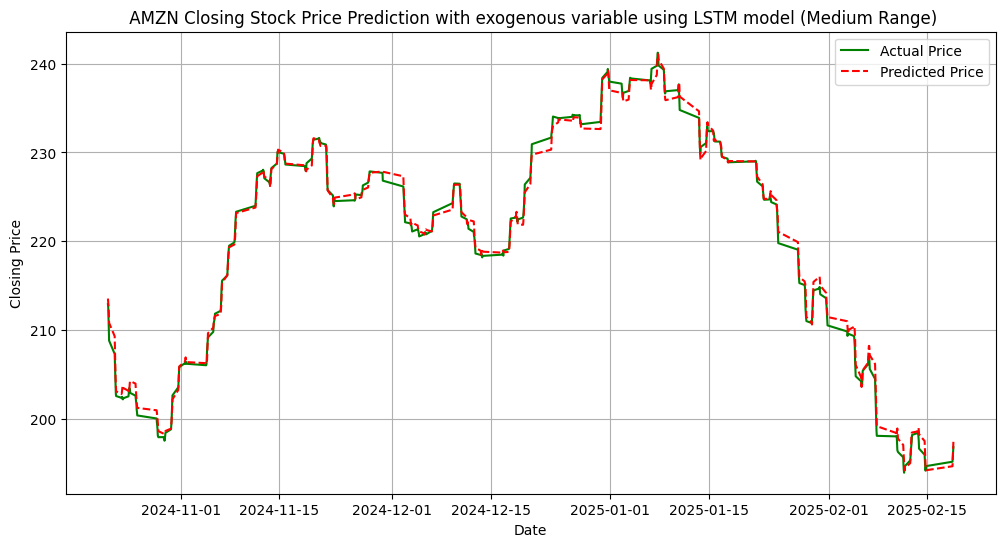

In [90]:
#Plot LSTM forecast line plot for AMZN stocks in medium range 

fig = plt.figure(figsize=(12, 6))  #Create plot

#Iterate through the results and plot result
for result in medium_AMZN_model:
    stock = result['stock']
    predictions = result['predictions']
    test_data = result['actual']
    X_train = result['X_train']
    X_test = result['X_test']
    look_back = result['look_back']

    test_dates = medium_stock_data.index[len(X_train) + look_back : len(X_train) + len(X_test) + look_back]
    
    plt.plot(test_dates, test_data, label='Actual Price', color='green')
    plt.plot(test_dates, predictions, label='Predicted Price', color='red', linestyle='--')

    plt.title(f' {stock} Closing Stock Price Prediction with exogenous variable using LSTM model (Medium Range)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid()
    
    #Show plot
    plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
medium_AMZN_trained_model_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

###  *GOOGL*

In [91]:
#LSTM Forecasting for GOOGL (Medium Range) with Exogenous Features


#Set the seed value for reproducibility
seed_value = 4242
#Set the PYTHONHASHSEED environment variable to ensure consistent hash-based operations
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)         #Seed for Python
np.random.seed(seed_value)      #Seed for NumPy
tf.random.set_seed(seed_value)  #Seed for TensorFlow
#Enforce deterministic behavior for TensorFlow operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'


medium_GOOGL_model = []   #Empty list initialised to store model result
stock = 'GOOGL'

#Data
medium_stock_data = medium_stock_data_list[2]       #Closing Price
medium_exo1_data = medium_exo1_data_list[2]         #Return
medium_exo2_data = medium_exo2_data_list[2]         #Volatility

#Split data first before scaling to avoid data bleeding
size = int(len(medium_stock_data) * 0.8)   #80/20 split
tain_data, test_data = medium_stock_data[:size], medium_stock_data[size:]
train_exo1_data, test_exo1_data = medium_exo1_data[:size], medium_exo1_data[size:]
train_exo2_data, test_exo2_data = medium_exo2_data[:size], medium_exo2_data[size:]

#Separatly fit stock datas to avoid data bleeding
#Create and fit a MinMaxScaler for stock data (endogenous variable)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tain_data.values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

#Create and fit a MinMaxScaler for exogenous features
scaler_exo1 = MinMaxScaler()
scaled_exo1 = scaler_exo1.fit_transform(train_exo1_data.values.reshape(-1, 1))
scaled_test_exo1 = scaler_exo1.transform(test_exo1_data.values.reshape(-1, 1))

scaler_exo2 = MinMaxScaler()
scaled_exo2 = scaler_exo2.fit_transform(train_exo2_data.values.reshape(-1, 1))
scaled_test_exo2 = scaler_exo2.transform(test_exo2_data.values.reshape(-1, 1))

#Function that creates dataset with lookback period
def create_dataset(dataset, exo1_dataset, exo2_dataset, look_back=1):
    X, Y, exo1, exo2 = [], [], [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        exo1.append(exo1_dataset[i + look_back, 0])
        exo2.append(exo2_dataset[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(exo1), np.array(exo2)

#Function call
look_back=120 #120 working days (6 months) look back

X_train, Y_train, exo1_train, exo2_train = create_dataset(scaled_data,
                                                          scaled_exo1,
                                                          scaled_exo2,
                                                          look_back)

X_test, Y_test, exo1_test, exo2_test = create_dataset(scaled_test_data,
                                                      scaled_test_exo1,
                                                      scaled_test_exo2,
                                                      look_back)

#Reshape input to be [samples, look_back, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

exo1_train = exo1_train.reshape(exo1_train.shape[0], 1, 1)
exo1_test = exo1_test.reshape(exo1_test.shape[0], 1, 1)

exo2_train = exo2_train.reshape(exo2_train.shape[0], 1, 1)
exo2_test = exo2_test.reshape(exo2_test.shape[0], 1, 1)

#Concatenate endogenous and exogenous data
train_data = np.concatenate((X_train, exo1_train, exo2_train), axis=1)
test_data = np.concatenate((X_test, exo1_test, exo2_test), axis=1)

#Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=8),
                   input_shape=(look_back, train_data.shape[2]), return_sequences = True))  #First layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=8))) #Second layer
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))) #Dropout rate
    model.add(Dense(1))

    #hyper parameters for learning rate and epochs
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_epochs = hp.Int('epochs', min_value=50, max_value=200, step=50)
    
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))
    return model

#Initialise the tuner
tuner = RandomSearch( build_model,
                     objective='val_loss',     #Objective to optimize
                     max_trials=5,             #Number of different model variations to try
                     executions_per_trial=3,   #Number of times to train each model variation
                     directory='stock_model',  #Directory to store results
                     project_name='medium_GOOGL_lstm_model')

#Define early stopping before performing search
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Perform search
tuner.search(X_train,
             Y_train,
             epochs=100,
             batch_size = 64,
             validation_data = (X_test, Y_test), 
             callbacks=[early_stopping])

#Get the best model and best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0] #first model is the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] #first hyperparameter is the best hyperparameter

#Print best model summary and best hyperparameters
print () #Add space
print (f'{stock} Best Model Summary and Hyperparameters')
print(best_model.summary())
print(best_hps.values)
print () #Add space

#Train the model
best_model.fit(X_train, Y_train, validation_data=(X_test, Y_test))

#Save the model in Keras format
best_model.save('medium_GOOGL_lstm_model.keras') 

#Make predictions
predictions = best_model.predict([X_test, exo1_test, exo2_test])
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

train_predictions = best_model.predict([X_train, exo1_train, exo2_train])
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))

print () #Add space
#Evaluate the model
print(f'LSTM forecast model evaluation for {stock} in medium range period')

#Calculate Root Mean Square
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f'Test RMSE for {stock}: {rmse:.5f}') #rounded to five decimal place

#Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE for {stock}: {mae:.5f}')

#Calculate R Square
r2 = r2_score(Y_test, predictions)
print(f'Test R-squared for {stock}: {r2:.2f}') #rounded to two decimal place

#Store predictions and actual values for plotting
medium_GOOGL_model.append({'stock': stock,
                         'predictions': predictions,
                          'actual': Y_test,
                          'X_train': X_train,
                          'X_test': X_test,
                          'look_back': look_back})

Reloading Tuner from stock_model\medium_GOOGL_lstm_model\tuner0.json

GOOGL Best Model Summary and Hyperparameters


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 32)        │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 96)             │        49,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,985 (210.88 KB)

 Trainable params: 53,985 (210.88 KB)

 Non-trainable params: 0 (0.00 B)

None
{'units_1': 32, 'units_2': 96, 'dropout': 0.30000000000000004, 'learning_rate': 0.001, 'epochs': 100}

78/78 ━━━━━━━━━━━━━━━━━━━━ 13s 106ms/step - loss: 6.0356e-04 - val_loss: 0.0011
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step

LSTM forecast model evaluation for GOOGL in medium range period
Test RMSE for GOOGL: 3.03730
Test MAE for GOOGL: 2.79344
Test R-squared for GOOGL: 0.93


#### *Trained Model Plot*

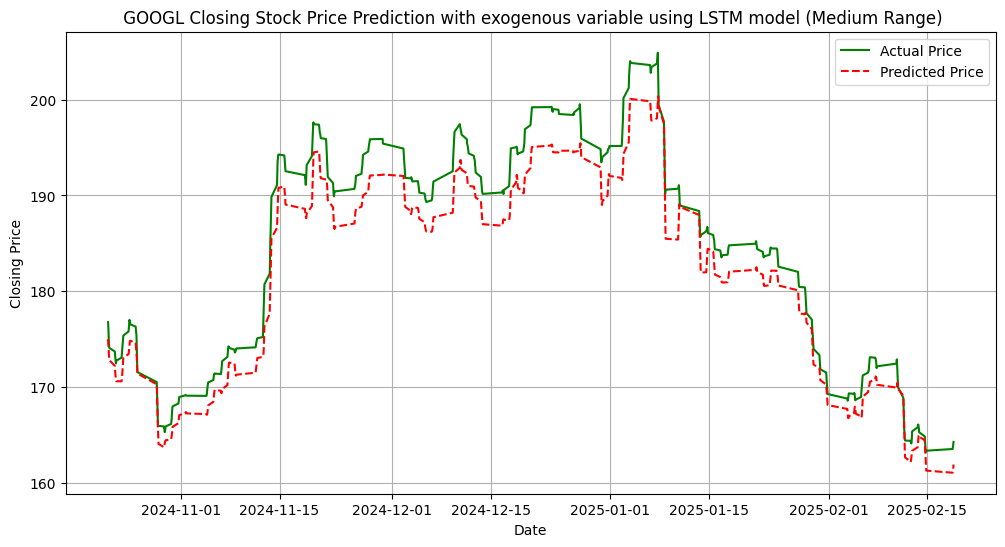

In [92]:
#Plot LSTM forecast line plot for GOOGL stocks in medium range 

fig = plt.figure(figsize=(12, 6))  #Create plot

#Iterate through the results and plot result
for result in medium_GOOGL_model:
    stock = result['stock']
    predictions = result['predictions']
    test_data = result['actual']
    X_train = result['X_train']
    X_test = result['X_test']
    look_back = result['look_back']

    test_dates = medium_stock_data.index[len(X_train) + look_back : len(X_train) + len(X_test) + look_back]
    
    plt.plot(test_dates, test_data, label='Actual Price', color='green')
    plt.plot(test_dates, predictions, label='Predicted Price', color='red', linestyle='--')

    plt.title(f' {stock} Closing Stock Price Prediction with exogenous variable using LSTM model (Medium Range)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid()
    
    #Show plot
    plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
medium_GOOGL_trained_model_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

###  *MSFT*

In [93]:
#LSTM Forecasting for MSFT (Medium Range) with Exogenous Features


#Set the seed value for reproducibility
seed_value = 42
#Set the PYTHONHASHSEED environment variable to ensure consistent hash-based operations
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)         #Seed for Python
np.random.seed(seed_value)      #Seed for NumPy
tf.random.set_seed(seed_value)  #Seed for TensorFlow
#Enforce deterministic behavior for TensorFlow operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'


medium_MSFT_model = []   #Empty list initialised to store model result
stock = 'MSFT'

#Data
medium_stock_data = medium_stock_data_list[3]       #Closing Price
medium_exo1_data = medium_exo1_data_list[3]         #Return
medium_exo2_data = medium_exo2_data_list[3]         #Volatility

#Split data first before scaling to avoid data bleeding
size = int(len(medium_stock_data) * 0.8)   #80/20 split
tain_data, test_data = medium_stock_data[:size], medium_stock_data[size:]
train_exo1_data, test_exo1_data = medium_exo1_data[:size], medium_exo1_data[size:]
train_exo2_data, test_exo2_data = medium_exo2_data[:size], medium_exo2_data[size:]

#Separatly fit stock datas to avoid data bleeding
#Create and fit a MinMaxScaler for stock data (endogenous variable)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tain_data.values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

#Create and fit a MinMaxScaler for exogenous features
scaler_exo1 = MinMaxScaler()
scaled_exo1 = scaler_exo1.fit_transform(train_exo1_data.values.reshape(-1, 1))
scaled_test_exo1 = scaler_exo1.transform(test_exo1_data.values.reshape(-1, 1))

scaler_exo2 = MinMaxScaler()
scaled_exo2 = scaler_exo2.fit_transform(train_exo2_data.values.reshape(-1, 1))
scaled_test_exo2 = scaler_exo2.transform(test_exo2_data.values.reshape(-1, 1))

#Function that creates dataset with lookback period
def create_dataset(dataset, exo1_dataset, exo2_dataset, look_back=1):
    X, Y, exo1, exo2 = [], [], [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        exo1.append(exo1_dataset[i + look_back, 0])
        exo2.append(exo2_dataset[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(exo1), np.array(exo2)

#Function call
look_back=120 #120 working hours (3 weeks) look back

X_train, Y_train, exo1_train, exo2_train = create_dataset(scaled_data,
                                                          scaled_exo1,
                                                          scaled_exo2,
                                                          look_back)

X_test, Y_test, exo1_test, exo2_test = create_dataset(scaled_test_data,
                                                      scaled_test_exo1,
                                                      scaled_test_exo2,
                                                      look_back)

#Reshape input to be [samples, look_back, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

exo1_train = exo1_train.reshape(exo1_train.shape[0], 1, 1)
exo1_test = exo1_test.reshape(exo1_test.shape[0], 1, 1)

exo2_train = exo2_train.reshape(exo2_train.shape[0], 1, 1)
exo2_test = exo2_test.reshape(exo2_test.shape[0], 1, 1)

#Concatenate endogenous and exogenous data
train_data = np.concatenate((X_train, exo1_train, exo2_train), axis=1)
test_data = np.concatenate((X_test, exo1_test, exo2_test), axis=1)

#Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=8),
                   input_shape=(look_back, train_data.shape[2]), return_sequences = True))  #First layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=8))) #Second layer
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))) #Dropout rate
    model.add(Dense(1))

    #hyper parameters for learning rate and epochs
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_epochs = hp.Int('epochs', min_value=50, max_value=200, step=50)
    
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))
    return model

#Initialise the tuner
tuner = RandomSearch( build_model,
                     objective='val_loss',     #Objective to optimize
                     max_trials=5,             #Number of different model variations to try
                     executions_per_trial=3,   #Number of times to train each model variation
                     directory='stock_model',  #Directory to store results
                     project_name='medium_MSFT_lstm_model')

#Define early stopping before performing search
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Perform search
tuner.search(X_train,
             Y_train,
             epochs=100,
             batch_size = 64,
             validation_data = (X_test, Y_test), 
             callbacks=[early_stopping])

#Get the best model and best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0] #first model is the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] #first hyperparameter is the best hyperparameter

#Print best model summary and best hyperparameters
print () #Add space
print (f'{stock} Best Model Summary and Hyperparameters')
print(best_model.summary())
print(best_hps.values)
print () #Add space

#Train the model
best_model.fit(X_train, Y_train, validation_data=(X_test, Y_test))

#Save the model in Keras format
best_model.save('medium_MSFT_lstm_model.keras') 

#Make predictions
predictions = best_model.predict([X_test, exo1_test, exo2_test])
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

train_predictions = best_model.predict([X_train, exo1_train, exo2_train])
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))

print () #Add space
#Evaluate the model
print(f'LSTM forecast model evaluation for {stock} in medium range period')

#Calculate Root Mean Square
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f'Test RMSE for {stock}: {rmse:.5f}') #rounded to five decimal place

#Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE for {stock}: {mae:.5f}')

#Calculate R Square
r2 = r2_score(Y_test, predictions)
print(f'Test R-squared for {stock}: {r2:.2f}') #rounded to two decimal place

#Store predictions and actual values for plotting
medium_MSFT_model.append({'stock': stock,
                         'predictions': predictions,
                          'actual': Y_test,
                          'X_train': X_train,
                          'X_test': X_test,
                          'look_back': look_back})

Reloading Tuner from stock_model\medium_MSFT_lstm_model\tuner0.json

MSFT Best Model Summary and Hyperparameters


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 40)        │         6,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 112)            │        68,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           113 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,377 (294.44 KB)

 Trainable params: 75,377 (294.44 KB)

 Non-trainable params: 0 (0.00 B)

None
{'units_1': 40, 'units_2': 112, 'dropout': 0.2, 'learning_rate': 0.01, 'epochs': 50}

78/78 ━━━━━━━━━━━━━━━━━━━━ 15s 140ms/step - loss: 0.0027 - val_loss: 5.8753e-05
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step

LSTM forecast model evaluation for MSFT in medium range period
Test RMSE for MSFT: 1.49848
Test MAE for MSFT: 1.18639
Test R-squared for MSFT: 0.99


#### *Trained Model Plot*

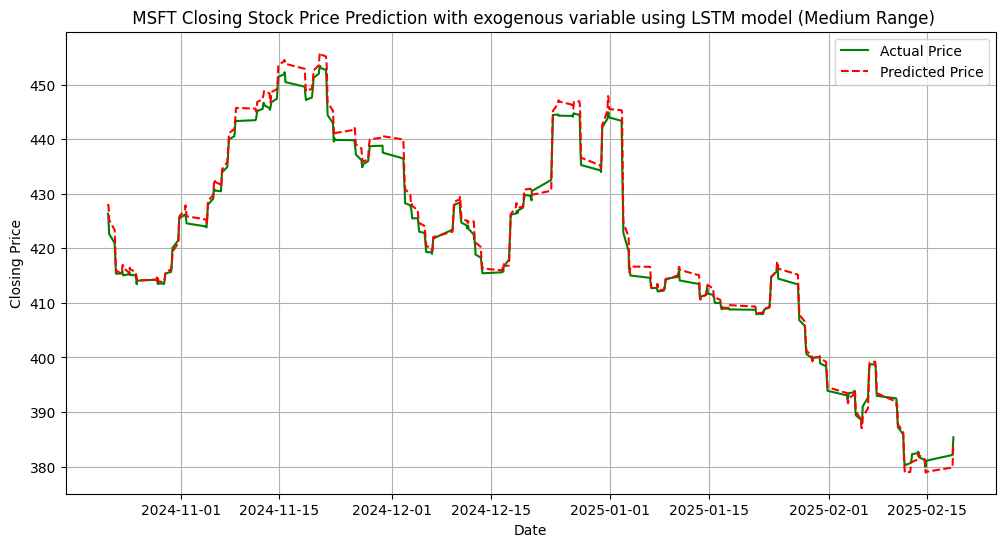

In [94]:
#Plot LSTM forecast line plot for MSFT stocks in medium range 

fig = plt.figure(figsize=(12, 6))  #Create plot

#Iterate through the results and plot result
for result in medium_MSFT_model:
    stock = result['stock']
    predictions = result['predictions']
    test_data = result['actual']
    X_train = result['X_train']
    X_test = result['X_test']
    look_back = result['look_back']

    test_dates = medium_stock_data.index[len(X_train) + look_back : len(X_train) + len(X_test) + look_back]
    
    plt.plot(test_dates, test_data, label='Actual Price', color='green')
    plt.plot(test_dates, predictions, label='Predicted Price', color='red', linestyle='--')

    plt.title(f' {stock} Closing Stock Price Prediction with exogenous variable using LSTM model (Medium Range)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid()
    
    #Show plot
    plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
medium_MSFT_trained_model_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

## *Long Range Stocks Model Training*

### *AAPL*

In [95]:
#LSTM Forecasting for AAPL (Long Range) with Exogenous Features


#Set the seed value for reproducibility
seed_value = 1
#Set the PYTHONHASHSEED environment variable to ensure consistent hash-based operations
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)         #Seed for Python
np.random.seed(seed_value)      #Seed for NumPy
tf.random.set_seed(seed_value)  #Seed for TensorFlow
#Enforce deterministic behavior for TensorFlow operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'


long_AAPL_model = []   #Empty list initialised to store model result
stock = 'AAPL'

#Data
long_stock_data = long_stock_data_list[0]       #Closing Price
long_exo1_data = long_exo1_data_list[0]         #Return
long_exo2_data = long_exo2_data_list[0]         #Volatility

#Split data first before scaling to avoid data bleeding
size = int(len(long_stock_data) * 0.8)   #80/20 split
tain_data, test_data = long_stock_data[:size], long_stock_data[size:]
train_exo1_data, test_exo1_data = long_exo1_data[:size], long_exo1_data[size:]
train_exo2_data, test_exo2_data = long_exo2_data[:size], long_exo2_data[size:]

#Separatly fit stock datas to avoid data bleeding
#Create and fit a MinMaxScaler for stock data (endogenous variable)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tain_data.values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

#Create and fit a MinMaxScaler for exogenous features
scaler_exo1 = MinMaxScaler()
scaled_exo1 = scaler_exo1.fit_transform(train_exo1_data.values.reshape(-1, 1))
scaled_test_exo1 = scaler_exo1.transform(test_exo1_data.values.reshape(-1, 1))

scaler_exo2 = MinMaxScaler()
scaled_exo2 = scaler_exo2.fit_transform(train_exo2_data.values.reshape(-1, 1))
scaled_test_exo2 = scaler_exo2.transform(test_exo2_data.values.reshape(-1, 1))

#Function that creates dataset with lookback period
def create_dataset(dataset, exo1_dataset, exo2_dataset, look_back=1):
    X, Y, exo1, exo2 = [], [], [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        exo1.append(exo1_dataset[i + look_back, 0])
        exo2.append(exo2_dataset[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(exo1), np.array(exo2)

#Function call
look_back=120 #120 working days (6 months) look back
X_train, Y_train, exo1_train, exo2_train = create_dataset(scaled_data,
                                                          scaled_exo1,
                                                          scaled_exo2,
                                                          look_back)

X_test, Y_test, exo1_test, exo2_test = create_dataset(scaled_test_data,
                                                      scaled_test_exo1,
                                                      scaled_test_exo2,
                                                      look_back)

#Reshape input to be [samples, look_back, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

exo1_train = exo1_train.reshape(exo1_train.shape[0], 1, 1)
exo1_test = exo1_test.reshape(exo1_test.shape[0], 1, 1)

exo2_train = exo2_train.reshape(exo2_train.shape[0], 1, 1)
exo2_test = exo2_test.reshape(exo2_test.shape[0], 1, 1)

#Concatenate endogenous and exogenous data
train_data = np.concatenate((X_train, exo1_train, exo2_train), axis=1)
test_data = np.concatenate((X_test, exo1_test, exo2_test), axis=1)

#Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=8),
                   input_shape=(look_back, train_data.shape[2]), return_sequences = True))  #First layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=8))) #Second layer
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))) #Dropout rate
    model.add(Dense(1))

    #hyper parameters for learning rate and epochs
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_epochs = hp.Int('epochs', min_value=50, max_value=200, step=50)
    
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))
    return model

#Initialise the tuner
tuner = RandomSearch( build_model,
                     objective='val_loss',  #Objective to optimize
                     max_trials=10,  #Number of different model variations to try
                     executions_per_trial=3,  #Number of times to train each model variation
                     directory='stock_model',  #Directory to store results
                     project_name='long_AAPL_lstm_model')

#Define early stopping before performing search
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Perform search
tuner.search(X_train,
             Y_train,
             epochs=100,
             batch_size = 64,
             validation_data = (X_test, Y_test), 
             callbacks=[early_stopping])

#Get the best model and best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0] #first model is the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] #first hyperparameter is the best hyperparameter

#Print best model summary and best hyperparameters
print () #Add space
print (f'{stock} Best Model Summary and Hyperparameters')
print(best_model.summary())
print(best_hps.values)
print () #Add space

#Train the model
best_model.fit(X_train, Y_train, validation_data=(X_test, Y_test))

#Save the model in Keras format
best_model.save('long_AAPL_lstm_model.keras') 

#Make predictions
predictions = best_model.predict([X_test, exo1_test, exo2_test])
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

train_predictions = best_model.predict([X_train, exo1_train, exo2_train])
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))

print () #Add space
#Evaluate the model
print(f'LSTM forecast model evaluation for {stock} in medium range period')

#Calculate Root Mean Square
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f'Test RMSE for {stock}: {rmse:.5f}') #rounded to five decimal place

#Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE for {stock}: {mae:.5f}')

#Calculate R Square
r2 = r2_score(Y_test, predictions)
print(f'Test R-squared for {stock}: {r2:.2f}') #rounded to two decimal place

#Store predictions and actual values for plotting
long_AAPL_model.append({'stock': stock,
                         'predictions': predictions,
                          'actual': Y_test,
                          'X_train': X_train,
                          'X_test': X_test,
                          'look_back': look_back})

Reloading Tuner from stock_model\long_AAPL_lstm_model\tuner0.json

AAPL Best Model Summary and Hyperparameters


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 80)        │        26,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 88)             │        59,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 88)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            89 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,817 (335.22 KB)

 Trainable params: 85,817 (335.22 KB)

 Non-trainable params: 0 (0.00 B)

None
{'units_1': 80, 'units_2': 88, 'dropout': 0.0, 'learning_rate': 0.01, 'epochs': 200}

88/88 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - loss: 0.0053 - val_loss: 0.0021
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step

LSTM forecast model evaluation for AAPL in medium range period
Test RMSE for AAPL: 7.78862
Test MAE for AAPL: 6.80679
Test R-squared for AAPL: 0.94


#### *Trained Model Plot*

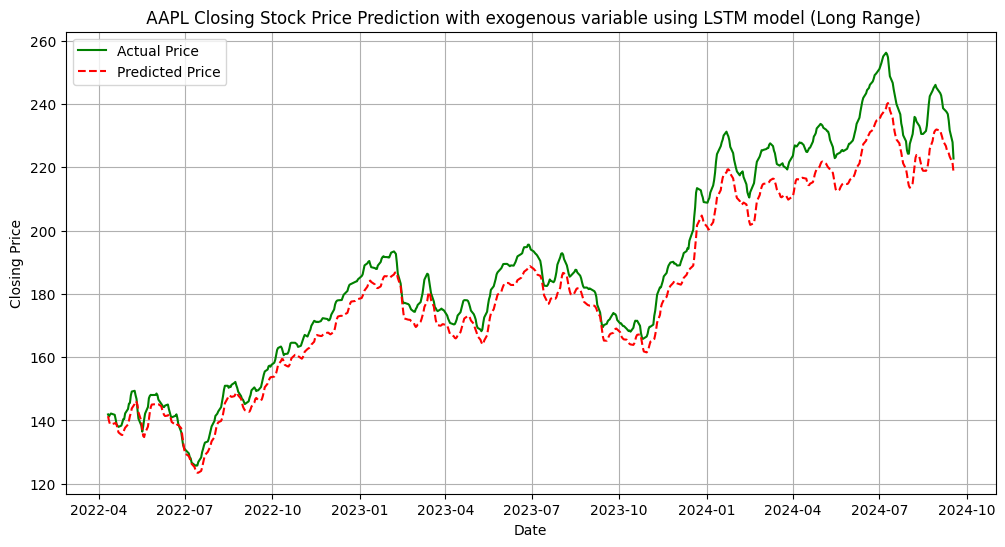

In [96]:
#Plot LSTM forecast line plot for AAPL stocks in long range 

fig = plt.figure(figsize=(12, 6))  #Create plot

#Iterate through the results and plot result
for result in long_AAPL_model:
    stock = result['stock']
    predictions = result['predictions']
    test_data = result['actual']
    X_train = result['X_train']
    X_test = result['X_test']
    look_back = result['look_back']

    test_dates = long_stock_data.index[len(X_train) + look_back : len(X_train) + len(X_test) + look_back]
    
    plt.plot(test_dates, test_data, label='Actual Price', color='green')
    plt.plot(test_dates, predictions, label='Predicted Price', color='red', linestyle='--')

    plt.title(f' {stock} Closing Stock Price Prediction with exogenous variable using LSTM model (Long Range)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid()
    
    #Show plot
    plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
long_AAPL_trained_model_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

###  *AMZN*

In [97]:
#LSTM Forecasting for AMZN (Long Range) with Exogenous Features


#Set the seed value for reproducibility
seed_value = 1
#Set the PYTHONHASHSEED environment variable to ensure consistent hash-based operations
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)         #Seed for Python
np.random.seed(seed_value)      #Seed for NumPy
tf.random.set_seed(seed_value)  #Seed for TensorFlow
#Enforce deterministic behavior for TensorFlow operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'


long_AMZN_model = []   #Empty list initialised to store model result
stock = 'AMZN'

#Data
long_stock_data = long_stock_data_list[1]       #Closing Price
long_exo1_data = long_exo1_data_list[1]         #Return
long_exo2_data = long_exo2_data_list[1]         #Volatility

#Split data first before scaling to avoid data bleeding
size = int(len(long_stock_data) * 0.8)   #80/20 split
tain_data, test_data = long_stock_data[:size], long_stock_data[size:]
train_exo1_data, test_exo1_data = long_exo1_data[:size], long_exo1_data[size:]
train_exo2_data, test_exo2_data = long_exo2_data[:size], long_exo2_data[size:]

#Separatly fit stock datas to avoid data bleeding
#Create and fit a MinMaxScaler for stock data (endogenous variable)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tain_data.values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

#Create and fit a MinMaxScaler for exogenous features
scaler_exo1 = MinMaxScaler()
scaled_exo1 = scaler_exo1.fit_transform(train_exo1_data.values.reshape(-1, 1))
scaled_test_exo1 = scaler_exo1.transform(test_exo1_data.values.reshape(-1, 1))

scaler_exo2 = MinMaxScaler()
scaled_exo2 = scaler_exo2.fit_transform(train_exo2_data.values.reshape(-1, 1))
scaled_test_exo2 = scaler_exo2.transform(test_exo2_data.values.reshape(-1, 1))

#Function that creates dataset with lookback period
def create_dataset(dataset, exo1_dataset, exo2_dataset, look_back=1):
    X, Y, exo1, exo2 = [], [], [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        exo1.append(exo1_dataset[i + look_back, 0])
        exo2.append(exo2_dataset[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(exo1), np.array(exo2)

#Function call
look_back=120 #120 working days (6 months) look back
X_train, Y_train, exo1_train, exo2_train = create_dataset(scaled_data,
                                                          scaled_exo1,
                                                          scaled_exo2,
                                                          look_back)

X_test, Y_test, exo1_test, exo2_test = create_dataset(scaled_test_data,
                                                      scaled_test_exo1,
                                                      scaled_test_exo2,
                                                      look_back)

#Reshape input to be [samples, look_back, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

exo1_train = exo1_train.reshape(exo1_train.shape[0], 1, 1)
exo1_test = exo1_test.reshape(exo1_test.shape[0], 1, 1)

exo2_train = exo2_train.reshape(exo2_train.shape[0], 1, 1)
exo2_test = exo2_test.reshape(exo2_test.shape[0], 1, 1)

#Concatenate endogenous and exogenous data
train_data = np.concatenate((X_train, exo1_train, exo2_train), axis=1)
test_data = np.concatenate((X_test, exo1_test, exo2_test), axis=1)

#Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=8),
                   input_shape=(look_back, train_data.shape[2]), return_sequences = True))  #First layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=8))) #Second layer
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))) #Dropout rate
    model.add(Dense(1))

    #hyper parameters for learning rate and epochs
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_epochs = hp.Int('epochs', min_value=50, max_value=200, step=50)
    
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))
    return model

#Initialise the tuner
tuner = RandomSearch( build_model,
                     objective='val_loss',  #Objective to optimize
                     max_trials=10,          #Number of different model variations to try
                     executions_per_trial=3,  #Number of times to train each model variation
                     directory='stock_model',  #Directory to store results
                     project_name='long_AMZN_lstm_model')

#Define early stopping before performing search
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Perform search
tuner.search(X_train,
             Y_train,
             epochs=100,
             batch_size = 64,
             validation_data = (X_test, Y_test), 
             callbacks=[early_stopping])

#Get the best model and best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0] #first model is the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] #first hyperparameter is the best hyperparameter

#Print best model summary and best hyperparameters
print () #Add space
print (f'{stock} Best Model Summary and Hyperparameters')
print(best_model.summary())
print(best_hps.values)
print () #Add space

#Train the model
best_model.fit(X_train, Y_train, validation_data=(X_test, Y_test))

#Save the model in Keras format
best_model.save('long_AMZN_lstm_model.keras') 

#Make predictions
predictions = best_model.predict([X_test, exo1_test, exo2_test])
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

train_predictions = best_model.predict([X_train, exo1_train, exo2_train])
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))

print () #Add space
#Evaluate the model
print(f'LSTM forecast model evaluation for {stock} in medium range period')

#Calculate Root Mean Square
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f'Test RMSE for {stock}: {rmse:.5f}') #rounded to five decimal place

#Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE for {stock}: {mae:.5f}')

#Calculate R Square
r2 = r2_score(Y_test, predictions)
print(f'Test R-squared for {stock}: {r2:.2f}') #rounded to two decimal place

#Store predictions and actual values for plotting
long_AMZN_model.append({'stock': stock,
                         'predictions': predictions,
                          'actual': Y_test,
                          'X_train': X_train,
                          'X_test': X_test,
                          'look_back': look_back})

Reloading Tuner from stock_model\long_AMZN_lstm_model\tuner0.json

AMZN Best Model Summary and Hyperparameters


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 96)        │        37,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 112)            │        93,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           113 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,377 (513.19 KB)

 Trainable params: 131,377 (513.19 KB)

 Non-trainable params: 0 (0.00 B)

None
{'units_1': 96, 'units_2': 112, 'dropout': 0.1, 'learning_rate': 0.001, 'epochs': 50}

88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 165ms/step - loss: 6.7434e-04 - val_loss: 9.2947e-04
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step

LSTM forecast model evaluation for AMZN in medium range period
Test RMSE for AMZN: 5.47939
Test MAE for AMZN: 4.83961
Test R-squared for AMZN: 0.98


#### *Trained Model Plot*

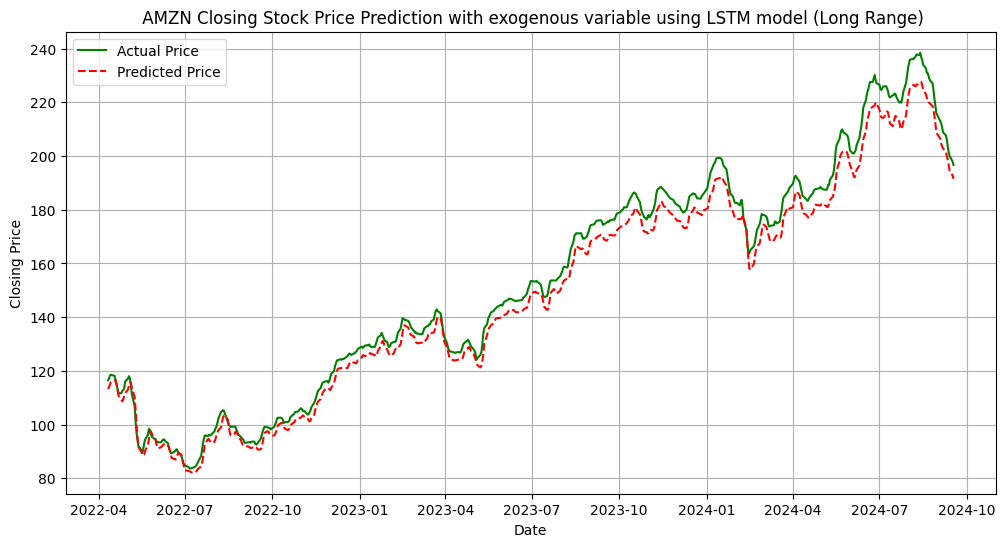

In [98]:
#Plot LSTM forecast line plot for AMZN stocks in long range 

fig = plt.figure(figsize=(12, 6))  #Create plot

#Iterate through the results and plot result
for result in long_AMZN_model:
    stock = result['stock']
    predictions = result['predictions']
    test_data = result['actual']
    X_train = result['X_train']
    X_test = result['X_test']
    look_back = result['look_back']

    test_dates = long_stock_data.index[len(X_train) + look_back : len(X_train) + len(X_test) + look_back]
    
    plt.plot(test_dates, test_data, label='Actual Price', color='green')
    plt.plot(test_dates, predictions, label='Predicted Price', color='red', linestyle='--')

    plt.title(f' {stock} Closing Stock Price Prediction with exogenous variable using LSTM model (Long Range)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid()
    
    #Show plot
    plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
long_AMZN_trained_model_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

###  *GOOGL*

In [99]:
#LSTM Forecasting for GOOGL (Long Range) with Exogenous Features


#Set the seed value for reproducibility
seed_value = 1
#Set the PYTHONHASHSEED environment variable to ensure consistent hash-based operations
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)         #Seed for Python
np.random.seed(seed_value)      #Seed for NumPy
tf.random.set_seed(seed_value)  #Seed for TensorFlow
#Enforce deterministic behavior for TensorFlow operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'


long_GOOGL_model = []   #Empty list initialised to store model result
stock = 'GOOGL'

#Data
long_stock_data = long_stock_data_list[2]       #Closing Price
long_exo1_data = long_exo1_data_list[2]         #Return
long_exo2_data = long_exo2_data_list[2]         #Volatility

#Split data first before scaling to avoid data bleeding
size = int(len(long_stock_data) * 0.8)   #80/20 split
tain_data, test_data = long_stock_data[:size], long_stock_data[size:]
train_exo1_data, test_exo1_data = long_exo1_data[:size], long_exo1_data[size:]
train_exo2_data, test_exo2_data = long_exo2_data[:size], long_exo2_data[size:]

#Separatly fit stock datas to avoid data bleeding
#Create and fit a MinMaxScaler for stock data (endogenous variable)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tain_data.values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

#Create and fit a MinMaxScaler for exogenous features
scaler_exo1 = MinMaxScaler()
scaled_exo1 = scaler_exo1.fit_transform(train_exo1_data.values.reshape(-1, 1))
scaled_test_exo1 = scaler_exo1.transform(test_exo1_data.values.reshape(-1, 1))

scaler_exo2 = MinMaxScaler()
scaled_exo2 = scaler_exo2.fit_transform(train_exo2_data.values.reshape(-1, 1))
scaled_test_exo2 = scaler_exo2.transform(test_exo2_data.values.reshape(-1, 1))

#Function that creates dataset with lookback period
def create_dataset(dataset, exo1_dataset, exo2_dataset, look_back=1):
    X, Y, exo1, exo2 = [], [], [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        exo1.append(exo1_dataset[i + look_back, 0])
        exo2.append(exo2_dataset[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(exo1), np.array(exo2)

#Function call
look_back=120 #120 working days (6 months) look back
X_train, Y_train, exo1_train, exo2_train = create_dataset(scaled_data,
                                                          scaled_exo1,
                                                          scaled_exo2,
                                                          look_back)

X_test, Y_test, exo1_test, exo2_test = create_dataset(scaled_test_data,
                                                      scaled_test_exo1,
                                                      scaled_test_exo2,
                                                      look_back)

#Reshape input to be [samples, look_back, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

exo1_train = exo1_train.reshape(exo1_train.shape[0], 1, 1)
exo1_test = exo1_test.reshape(exo1_test.shape[0], 1, 1)

exo2_train = exo2_train.reshape(exo2_train.shape[0], 1, 1)
exo2_test = exo2_test.reshape(exo2_test.shape[0], 1, 1)

#Concatenate endogenous and exogenous data
train_data = np.concatenate((X_train, exo1_train, exo2_train), axis=1)
test_data = np.concatenate((X_test, exo1_test, exo2_test), axis=1)

#Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=8),
                   input_shape=(look_back, train_data.shape[2]), return_sequences = True))  #First layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=8))) #Second layer
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))) #Dropout rate
    model.add(Dense(1))

    #hyper parameters for learning rate and epochs
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_epochs = hp.Int('epochs', min_value=50, max_value=200, step=50)
    
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))
    return model

#Initialise the tuner
tuner = RandomSearch( build_model,
                     objective='val_loss',  #Objective to optimize
                     max_trials=10,  #Number of different model variations to try
                     executions_per_trial=3,  #Number of times to train each model variation
                     directory='stock_model',  #Directory to store results
                     project_name='long_GOOGL_lstm_model')

#Define early stopping before performing search
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Perform search
tuner.search(X_train,
             Y_train,
             epochs=100,
             batch_size = 64,
             validation_data = (X_test, Y_test), 
             callbacks=[early_stopping])

#Get the best model and best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0] #first model is the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] #first hyperparameter is the best hyperparameter

#Print best model summary and best hyperparameters
print () #Add space
print (f'{stock} Best Model Summary and Hyperparameters')
print(best_model.summary())
print(best_hps.values)
print () #Add space

#Train the model
best_model.fit(X_train, Y_train, validation_data=(X_test, Y_test))

#Save the model in Keras format
best_model.save('long_GOOGL_lstm_model.keras') 

#Make predictions
predictions = best_model.predict([X_test, exo1_test, exo2_test])
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

train_predictions = best_model.predict([X_train, exo1_train, exo2_train])
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))

print () #Add space
#Evaluate the model
print(f'LSTM forecast model evaluation for {stock} in medium range period')

#Calculate Root Mean Square
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f'Test RMSE for {stock}: {rmse:.5f}') #rounded to five decimal place

#Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE for {stock}: {mae:.5f}')

#Calculate R Square
r2 = r2_score(Y_test, predictions)
print(f'Test R-squared for {stock}: {r2:.2f}') #rounded to two decimal place

#Store predictions and actual values for plotting
long_GOOGL_model.append({'stock': stock,
                         'predictions': predictions,
                          'actual': Y_test,
                          'X_train': X_train,
                          'X_test': X_test,
                          'look_back': look_back})

Reloading Tuner from stock_model\long_GOOGL_lstm_model\tuner0.json

GOOGL Best Model Summary and Hyperparameters


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 120)       │        58,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        47,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,985 (414.00 KB)

 Trainable params: 105,985 (414.00 KB)

 Non-trainable params: 0 (0.00 B)

None
{'units_1': 120, 'units_2': 64, 'dropout': 0.1, 'learning_rate': 0.01, 'epochs': 150}

88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - loss: 0.0015 - val_loss: 5.7767e-04
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step

LSTM forecast model evaluation for GOOGL in medium range period
Test RMSE for GOOGL: 3.28383
Test MAE for GOOGL: 2.63213
Test R-squared for GOOGL: 0.99


#### *Trained Model Plot*

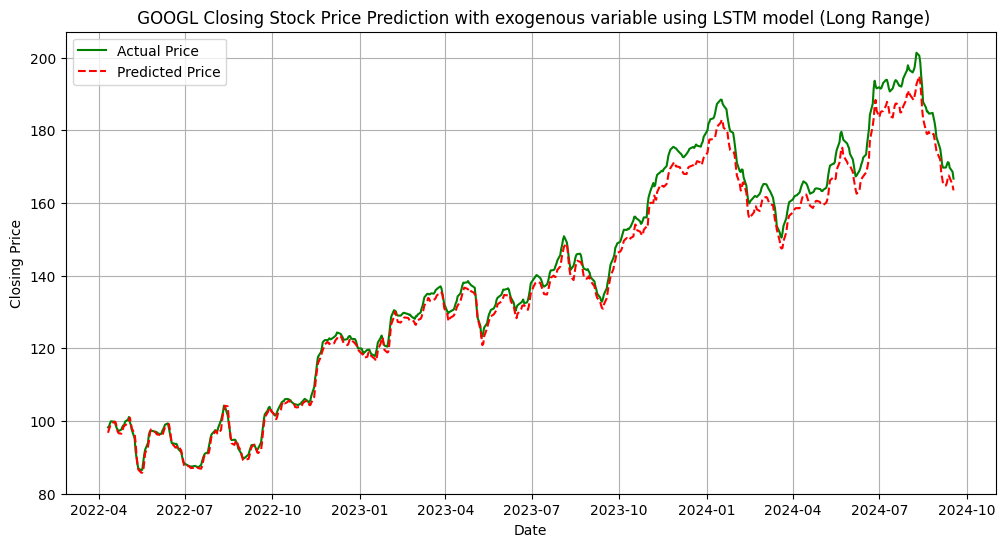

In [100]:
#Plot LSTM forecast line plot for GOOGL stocks in long range 

fig = plt.figure(figsize=(12, 6))  #Create plot

#Iterate through the results and plot result
for result in long_GOOGL_model:
    stock = result['stock']
    predictions = result['predictions']
    test_data = result['actual']
    X_train = result['X_train']
    X_test = result['X_test']
    look_back = result['look_back']

    test_dates = long_stock_data.index[len(X_train) + look_back : len(X_train) + len(X_test) + look_back]
    
    plt.plot(test_dates, test_data, label='Actual Price', color='green')
    plt.plot(test_dates, predictions, label='Predicted Price', color='red', linestyle='--')

    plt.title(f' {stock} Closing Stock Price Prediction with exogenous variable using LSTM model (Long Range)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid()
    
    #Show plot
    plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
long_GOOGL_trained_model_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

###  *MSFT*

In [101]:
#LSTM Forecasting for MSFT (Long Range) with Exogenous Features


#Set the seed value for reproducibility
seed_value = 1
#Set the PYTHONHASHSEED environment variable to ensure consistent hash-based operations
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)         #Seed for Python
np.random.seed(seed_value)      #Seed for NumPy
tf.random.set_seed(seed_value)  #Seed for TensorFlow
#Enforce deterministic behavior for TensorFlow operations
os.environ['TF_DETERMINISTIC_OPS'] = '1'


long_MSFT_model = []   #Empty list initialised to store model result
stock = 'MSFT'

#Data
long_stock_data = long_stock_data_list[3]       #Closing Price
long_exo1_data = long_exo1_data_list[3]         #Return
long_exo2_data = long_exo2_data_list[3]         #Volatility

#Split data first before scaling to avoid data bleeding
size = int(len(long_stock_data) * 0.8)   #80/20 split
tain_data, test_data = long_stock_data[:size], long_stock_data[size:]
train_exo1_data, test_exo1_data = long_exo1_data[:size], long_exo1_data[size:]
train_exo2_data, test_exo2_data = long_exo2_data[:size], long_exo2_data[size:]

#Separatly fit stock datas to avoid data bleeding
#Create and fit a MinMaxScaler for stock data (endogenous variable)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(tain_data.values.reshape(-1, 1))
scaled_test_data = scaler.transform(test_data.values.reshape(-1, 1))

#Create and fit a MinMaxScaler for exogenous features
scaler_exo1 = MinMaxScaler()
scaled_exo1 = scaler_exo1.fit_transform(train_exo1_data.values.reshape(-1, 1))
scaled_test_exo1 = scaler_exo1.transform(test_exo1_data.values.reshape(-1, 1))

scaler_exo2 = MinMaxScaler()
scaled_exo2 = scaler_exo2.fit_transform(train_exo2_data.values.reshape(-1, 1))
scaled_test_exo2 = scaler_exo2.transform(test_exo2_data.values.reshape(-1, 1))

#Function that creates dataset with lookback period
def create_dataset(dataset, exo1_dataset, exo2_dataset, look_back=1):
    X, Y, exo1, exo2 = [], [], [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
        exo1.append(exo1_dataset[i + look_back, 0])
        exo2.append(exo2_dataset[i + look_back, 0])
    return np.array(X), np.array(Y), np.array(exo1), np.array(exo2)

#Function call
look_back=120 #120 working days (6 months) look back
X_train, Y_train, exo1_train, exo2_train = create_dataset(scaled_data,
                                                          scaled_exo1,
                                                          scaled_exo2,
                                                          look_back)

X_test, Y_test, exo1_test, exo2_test = create_dataset(scaled_test_data,
                                                      scaled_test_exo1,
                                                      scaled_test_exo2,
                                                      look_back)

#Reshape input to be [samples, look_back, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

exo1_train = exo1_train.reshape(exo1_train.shape[0], 1, 1)
exo1_test = exo1_test.reshape(exo1_test.shape[0], 1, 1)

exo2_train = exo2_train.reshape(exo2_train.shape[0], 1, 1)
exo2_test = exo2_test.reshape(exo2_test.shape[0], 1, 1)

#Concatenate endogenous and exogenous data
train_data = np.concatenate((X_train, exo1_train, exo2_train), axis=1)
test_data = np.concatenate((X_test, exo1_test, exo2_test), axis=1)

#Define a function to build the model
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=8),
                   input_shape=(look_back, train_data.shape[2]), return_sequences = True))  #First layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=8))) #Second layer
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))) #Dropout rate
    model.add(Dense(1))

    #hyper parameters for learning rate and epochs
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_epochs = hp.Int('epochs', min_value=50, max_value=200, step=50)
    
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate))
    return model

#Initialise the tuner
tuner = RandomSearch( build_model,
                     objective='val_loss',  #Objective to optimize
                     max_trials=10,           #Number of different model variations to try
                     executions_per_trial=3,  #Number of times to train each model variation
                     directory='stock_model',  #Directory to store results
                     project_name='long_MSFT_lstm_model')

#Define early stopping before performing search
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

#Perform search
tuner.search(X_train,
             Y_train,
             epochs=100,
             batch_size = 64,
             validation_data = (X_test, Y_test), 
             callbacks=[early_stopping])

#Get the best model and best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0] #first model is the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0] #first hyperparameter is the best hyperparameter

#Print best model summary and best hyperparameters
print () #Add space
print (f'{stock} Best Model Summary and Hyperparameters')
print(best_model.summary())
print(best_hps.values)
print () #Add space

#Train the model
best_model.fit(X_train, Y_train, validation_data=(X_test, Y_test))

#Save the model in Keras format
best_model.save('long_MSFT_lstm_model.keras')

#Make predictions
predictions = best_model.predict([X_test, exo1_test, exo2_test])
predictions = scaler.inverse_transform(predictions)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))

train_predictions = best_model.predict([X_train, exo1_train, exo2_train])
train_predictions = scaler.inverse_transform(train_predictions)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))

print () #Add space
#Evaluate the model
print(f'LSTM forecast model evaluation for {stock} in long range period')

#Calculate Root Mean Square
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f'Test RMSE for {stock}: {rmse:.5f}') #rounded to five decimal place

#Calculate Mean Absolute Error
mae = mean_absolute_error(Y_test, predictions)
print(f'Test MAE for {stock}: {mae:.5f}')

#Calculate R Square
r2 = r2_score(Y_test, predictions)
print(f'Test R-squared for {stock}: {r2:.2f}') #rounded to two decimal place

#Store predictions and actual values for plotting
long_MSFT_model.append({'stock': stock,
                         'predictions': predictions,
                          'actual': Y_test,
                          'X_train': X_train,
                          'X_test': X_test,
                          'look_back': look_back})

Reloading Tuner from stock_model\long_MSFT_lstm_model\tuner0.json

MSFT Best Model Summary and Hyperparameters


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 40)        │         6,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 40)             │        12,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,721 (77.04 KB)

 Trainable params: 19,721 (77.04 KB)

 Non-trainable params: 0 (0.00 B)

None
{'units_1': 40, 'units_2': 40, 'dropout': 0.0, 'learning_rate': 0.01, 'epochs': 100}

88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - loss: 0.0020 - val_loss: 0.0013
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step

LSTM forecast model evaluation for MSFT in long range period
Test RMSE for MSFT: 11.09377
Test MAE for MSFT: 9.61075
Test R-squared for MSFT: 0.98


#### *Trained Model Plot*

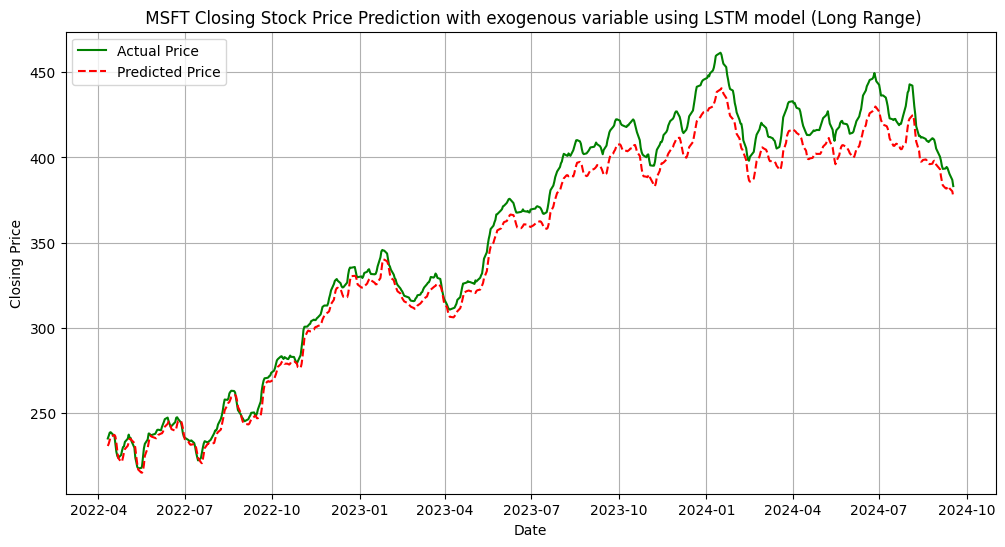

In [102]:
#Plot LSTM forecast line plot for MSFT stocks in long range 

fig = plt.figure(figsize=(12, 6))  #Create plot

#Iterate through the results and plot result
for result in long_MSFT_model:
    stock = result['stock']
    predictions = result['predictions']
    test_data = result['actual']
    X_train = result['X_train']
    X_test = result['X_test']
    look_back = result['look_back']

    test_dates = long_stock_data.index[len(X_train) + look_back : len(X_train) + len(X_test) + look_back]
    
    plt.plot(test_dates, test_data, label='Actual Price', color='green')
    plt.plot(test_dates, predictions, label='Predicted Price', color='red', linestyle='--')

    plt.title(f' {stock} Closing Stock Price Prediction with exogenous variable using LSTM model (Long Range)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.grid()
    
    #Show plot
    plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
long_MSFT_trained_model_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

# **Model Forecast**

In [ ]:
#Load trained model for forecasting 

#Short Range 
AAPL_short_model = load_model('short_AAPL_lstm_model.keras')
AMZN_short_model = load_model('short_AMZN_lstm_model.keras')
GOOGL_short_model = load_model('short_GOOGL_lstm_model.keras')
MSFT_short_model = load_model('short_MSFT_lstm_model.keras')

#Medium Range
AAPL_medium_model = load_model('medium_AAPL_lstm_model.keras')
AMZN_medium_model = load_model('medium_AMZN_lstm_model.keras')
GOOGL_medium_model = load_model('medium_GOOGL_lstm_model.keras')
MSFT_medium_model = load_model('medium_MSFT_lstm_model.keras')

#Long Range
AAPL_long_model = load_model('long_AAPL_lstm_model.keras')
AMZN_long_model = load_model('long_AMZN_lstm_model.keras')
GOOGL_long_model = load_model('long_GOOGL_lstm_model.keras')
MSFT_long_model = load_model('long_MSFT_lstm_model.keras')

## *Short Range Stocks Model Forecasting*

### *AAPL*

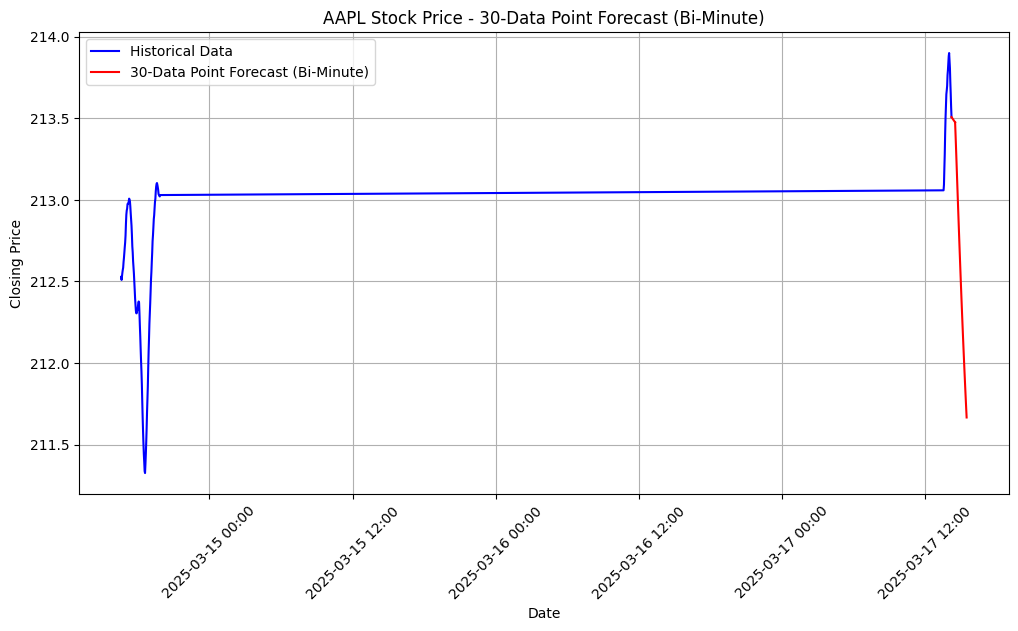

In [ ]:
#Forecast next 30 working hour minute for short range AAPL stock

#Load Model
model = AAPL_short_model

#Load data and reshape
df = short_df [('AAPL', 'Moving Average')].values.reshape(-1, 1)

#Create and Fit MimMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

#Create dataset for the LSTM model
def create_dataset(dataset, look_back=1):
    X = []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
    return np.array(X)

#Function call
look_back = 120 #240 minutes look back
X = create_dataset(scaled_df, look_back)

#Reshape input to be [samples, look_back, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


'''Generate forecast dates'''
last_timestamp = short_df.index[-1]
last_timestamp = last_timestamp.tz_localize(None) #Removes time zone

#Calculate the start of the next business hour
if last_timestamp.hour == 20 and last_timestamp.minute == 58:
  next_business_day = pd.Timestamp(last_timestamp.date()) + BDay(1)     #Get business day
  next_business_hour = pd.Timestamp(next_business_day.year, 
                                    next_business_day.month,
                                    next_business_day.day, 14, 30)     #Set the time to start of trading time
else:    
    next_business_hour = last_timestamp + timedelta(minutes=2)  

#Generate an initial date range, including extra periods for filtering
short_AAPL_forecast_dates = pd.date_range(start=next_business_hour ,
                              periods=30*100, 
                              freq='2min') 

#Filter out holidays, non-business hours, and weekends
us_holidays = holidays.US()
short_AAPL_forecast_dates = [d for d in short_AAPL_forecast_dates if d.date() not in us_holidays and
                              14 <= d.hour <=20 and (d.hour !=14 or d.minute >=30) and
                              (d.hour !=20 or d.minute <=58)and
                              d.weekday()<5]

#Take only the first 30 valid business hour minutes
short_AAPL_forecast_dates = pd.DatetimeIndex(short_AAPL_forecast_dates)[:30]


#Iterate and predict the next 30 data points
short_AAPL_predictions = []   #Initilaise empty list to store prediction


'''Calculate Forecasts'''
#Use the last look_back data points to start predictions
input_data = scaled_df[-look_back:].reshape(1, look_back, 1)

for _ in range(len(short_AAPL_forecast_dates)):
    pred = model.predict(input_data, verbose=0)          #Make prediction
    short_AAPL_predictions.append(pred[0, 0])           #Append and store prediciton
    input_data = np.concatenate([input_data[:, 1:, :], 
                                 pred.reshape(1, 1, 1)], 
                                axis=1)                   #Update input data for next prediction

#Invert predictions to original scale
short_AAPL_predictions = scaler.inverse_transform(np.array(short_AAPL_predictions).reshape(-1, 1))

'''PLot the Forecasts'''
#Data for plotting
last_look_back = short_df[('AAPL', 'Moving Average')].values[-look_back:]
last_historical_date = short_df.index[-1]
last_historical_date = last_historical_date.tz_localize(None)

last_historical_price = last_look_back[-1]
first_prediction_date = short_AAPL_forecast_dates[0]
first_prediction_price = short_AAPL_predictions[0, 0]

#Plot the historical data and the forecast
fig = plt.figure(figsize=(12, 6))
plt.plot(short_df.index[-look_back:],
         last_look_back,
         label='Historical Data',
        color= 'blue')
plt.plot(short_AAPL_forecast_dates, 
         short_AAPL_predictions,
         label='30-Data Point Forecast (Bi-Minute)',
         color='red')

#Plot connector line
plt.plot([last_historical_date, first_prediction_date],
         [last_historical_price, first_prediction_price],
         color='red', label='_nolegend_')

plt.title('AAPL Stock Price - 30-Data Point Forecast (Bi-Minute)')

#Format date to show full hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M')) 
plt.tick_params(axis='x', rotation=45)  #RotSate x-axis labels for better readability

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

#Show Plot
plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
short_AAPL_trained_model_forecast_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

In [105]:
#Create a DataFrame for short AAPL predictions
print('DataFrame of AAPL stock predictions in short range')
short_AAPL_predictions_df = pd.DataFrame({'Date': short_AAPL_forecast_dates, 
                                         'Predicted Price': short_AAPL_predictions.flatten()})

#Print the DataFrame head
short_AAPL_predictions_df.head()

DataFrame of AAPL stock predictions in short range


Date  Predicted Price
0 2025-03-17 14:30:00       213.474640
1 2025-03-17 14:32:00       213.409698
2 2025-03-17 14:34:00       213.341354
3 2025-03-17 14:36:00       213.271439
4 2025-03-17 14:38:00       213.201096

### *AMZN*

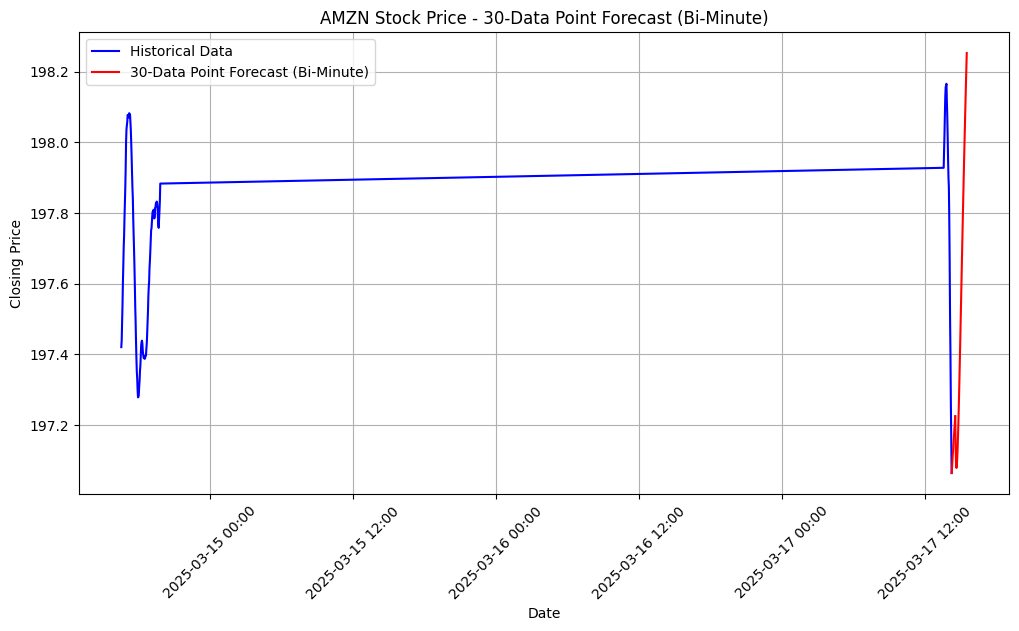

In [106]:
#Forecast next 30 working hour minute for short range AMZN stock

#Load Model
model = AMZN_short_model

#Load data and reshape
df = short_df [('AMZN', 'Moving Average')].values.reshape(-1, 1)

#Create and Fit MimMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

#Create dataset for the LSTM model
def create_dataset(dataset, look_back=1):
    X = []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
    return np.array(X)

#Function call
look_back = 120 #240 minutes look back
X = create_dataset(scaled_df, look_back)

#Reshape input to be [samples, look_back, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


'''Generate forecast dates'''
last_timestamp = short_df.index[-1]
last_timestamp = last_timestamp.tz_localize(None) #Removes time zone

#Calculate the start of the next business hour
if last_timestamp.hour == 20 and last_timestamp.minute == 58:
  next_business_day = pd.Timestamp(last_timestamp.date()) + BDay(1)     #Get business day
  next_business_hour = pd.Timestamp(next_business_day.year, 
                                    next_business_day.month,
                                    next_business_day.day, 14, 30)     #Set the time to start of trading time
else:    
    next_business_hour = last_timestamp + timedelta(minutes=2)  

#Generate an initial date range, including extra periods for filtering
short_AMZN_forecast_dates = pd.date_range(start=next_business_hour ,
                              periods=30*100, 
                              freq='2min') 

#Filter out holidays, non-business hours, and weekends
us_holidays = holidays.US()
short_AMZN_forecast_dates = [d for d in short_AMZN_forecast_dates if d.date() not in us_holidays and
                              14 <= d.hour <=20 and (d.hour !=14 or d.minute >=30) and
                              (d.hour !=20 or d.minute <=58)and
                              d.weekday()<5]

#Take only the first 30 valid business hour minutes
short_AMZN_forecast_dates = pd.DatetimeIndex(short_AMZN_forecast_dates)[:30]


#Iterate and predict the next 30 data points
short_AMZN_predictions = []   #Initilaise empty list to store prediction


'''Calculate Forecasts'''
#Use the last look_back data points to start predictions
input_data = scaled_df[-look_back:].reshape(1, look_back, 1)

for _ in range(len(short_AMZN_forecast_dates)):
    pred = model.predict(input_data, verbose=0)          #Make prediction
    short_AMZN_predictions.append(pred[0, 0])           #Append and store prediciton
    input_data = np.concatenate([input_data[:, 1:, :], 
                                 pred.reshape(1, 1, 1)], 
                                axis=1)                   #Update input data for next prediction

#Invert predictions to original scale
short_AMZN_predictions = scaler.inverse_transform(np.array(short_AMZN_predictions).reshape(-1, 1))

'''PLot the Forecasts'''
#Data for plotting
last_look_back = short_df[('AMZN', 'Moving Average')].values[-look_back:]
last_historical_date = short_df.index[-1]
last_historical_date = last_historical_date.tz_localize(None)

last_historical_price = last_look_back[-1]
first_prediction_date = short_AMZN_forecast_dates[0]
first_prediction_price = short_AMZN_predictions[0, 0]

#Plot the historical data and the forecast
fig = plt.figure(figsize=(12, 6))
plt.plot(short_df.index[-look_back:],
         last_look_back,
         label='Historical Data',
        color= 'blue')
plt.plot(short_AMZN_forecast_dates, 
         short_AMZN_predictions,
         label='30-Data Point Forecast (Bi-Minute)',
         color='red')

#Plot connector line
plt.plot([last_historical_date, first_prediction_date],
         [last_historical_price, first_prediction_price],
         color='red', label='_nolegend_')

plt.title('AMZN Stock Price - 30-Data Point Forecast (Bi-Minute)')

#Format date to show full hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M')) 
plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels for better readability

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

#Show Plot
plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
short_AMZN_trained_model_forecast_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

In [107]:
#Create a DataFrame for short AMZN predictions
print('DataFrame of AMZN stock predictions in short range')
short_AMZN_predictions_df = pd.DataFrame({'Date': short_AMZN_forecast_dates, 
                                         'Predicted Price': short_AMZN_predictions.flatten()})

#Print the DataFrame head
short_AMZN_predictions_df.head()

DataFrame of AMZN stock predictions in short range


Date  Predicted Price
0 2025-03-17 14:30:00       197.224487
1 2025-03-17 14:32:00       197.138107
2 2025-03-17 14:34:00       197.092926
3 2025-03-17 14:36:00       197.078186
4 2025-03-17 14:38:00       197.084106

### *GOOGL*

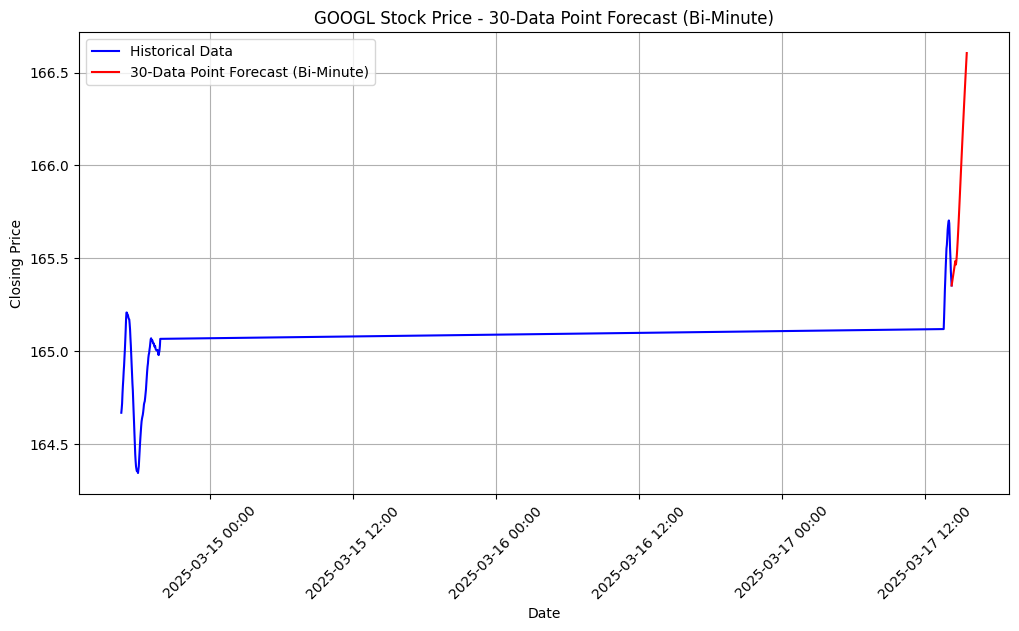

In [108]:
#Forecast next 30 working hour minute for short range GOOGL stock

#Load Model
model = GOOGL_short_model

#Load data and reshape
df = short_df [('GOOGL', 'Moving Average')].values.reshape(-1, 1)

#Create and Fit MimMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

#Create dataset for the LSTM model
def create_dataset(dataset, look_back=1):
    X = []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
    return np.array(X)

#Function call
look_back = 120 #240 minutes look back
X = create_dataset(scaled_df, look_back)

#Reshape input to be [samples, look_back, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


'''Generate forecast dates'''
last_timestamp = short_df.index[-1]
last_timestamp = last_timestamp.tz_localize(None) #Removes time zone

#Calculate the start of the next business hour
if last_timestamp.hour == 20 and last_timestamp.minute == 58:
  next_business_day = pd.Timestamp(last_timestamp.date()) + BDay(1)     #Get business day
  next_business_hour = pd.Timestamp(next_business_day.year, 
                                    next_business_day.month,
                                    next_business_day.day, 14, 30)     #Set the time to start of trading time
else:    
    next_business_hour = last_timestamp + timedelta(minutes=2)  

#Generate an initial date range, including extra periods for filtering
short_GOOGL_forecast_dates = pd.date_range(start=next_business_hour ,
                              periods=30*100, 
                              freq='2min') 

#Filter out holidays, non-business hours, and weekends
us_holidays = holidays.US()
short_GOOGL_forecast_dates = [d for d in short_GOOGL_forecast_dates if d.date() not in us_holidays and
                              14 <= d.hour <=20 and (d.hour !=14 or d.minute >=30) and
                              (d.hour !=20 or d.minute <=58)and
                              d.weekday()<5]

#Take only the first 30 valid business hour minutes
short_GOOGL_forecast_dates = pd.DatetimeIndex(short_GOOGL_forecast_dates)[:30]


#Iterate and predict the next 30 data points
short_GOOGL_predictions = []   #Initilaise empty list to store prediction


'''Calculate Forecasts'''
#Use the last look_back data points to start predictions
input_data = scaled_df[-look_back:].reshape(1, look_back, 1)

for _ in range(len(short_GOOGL_forecast_dates)):
    pred = model.predict(input_data, verbose=0)          #Make prediction
    short_GOOGL_predictions.append(pred[0, 0])           #Append and store prediciton
    input_data = np.concatenate([input_data[:, 1:, :], 
                                 pred.reshape(1, 1, 1)], 
                                axis=1)                   #Update input data for next prediction

#Invert predictions to original scale
short_GOOGL_predictions = scaler.inverse_transform(np.array(short_GOOGL_predictions).reshape(-1, 1))

'''PLot the Forecasts'''
#Data for plotting
last_look_back = short_df[('GOOGL', 'Moving Average')].values[-look_back:]
last_historical_date = short_df.index[-1]
last_historical_date = last_historical_date.tz_localize(None)

last_historical_price = last_look_back[-1]
first_prediction_date = short_GOOGL_forecast_dates[0]
first_prediction_price = short_GOOGL_predictions[0, 0]

#Plot the historical data and the forecast
fig = plt.figure(figsize=(12, 6))
plt.plot(short_df.index[-look_back:],
         last_look_back,
         label='Historical Data',
        color= 'blue')
plt.plot(short_GOOGL_forecast_dates, 
         short_GOOGL_predictions,
         label='30-Data Point Forecast (Bi-Minute)',
         color='red')

#Plot connector line
plt.plot([last_historical_date, first_prediction_date],
         [last_historical_price, first_prediction_price],
         color='red', label='_nolegend_')

plt.title('GOOGL Stock Price - 30-Data Point Forecast (Bi-Minute)')

#Format date to show full hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M')) 
plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels for better readability

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

#Show Plot
plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
short_GOOGL_trained_model_forecast_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

In [109]:
#Create a DataFrame for short GOOGL predictions
print('DataFrame of GOOGL stock predictions in short range')
short_GOOGL_predictions_df = pd.DataFrame({'Date': short_GOOGL_forecast_dates, 
                                         'Predicted Price': short_GOOGL_predictions.flatten()})

#Print the DataFrame head
short_GOOGL_predictions_df.head()

DataFrame of GOOGL stock predictions in short range


Date  Predicted Price
0 2025-03-17 14:30:00       165.480804
1 2025-03-17 14:32:00       165.464111
2 2025-03-17 14:34:00       165.470047
3 2025-03-17 14:36:00       165.488342
4 2025-03-17 14:38:00       165.514969

### *MSFT*

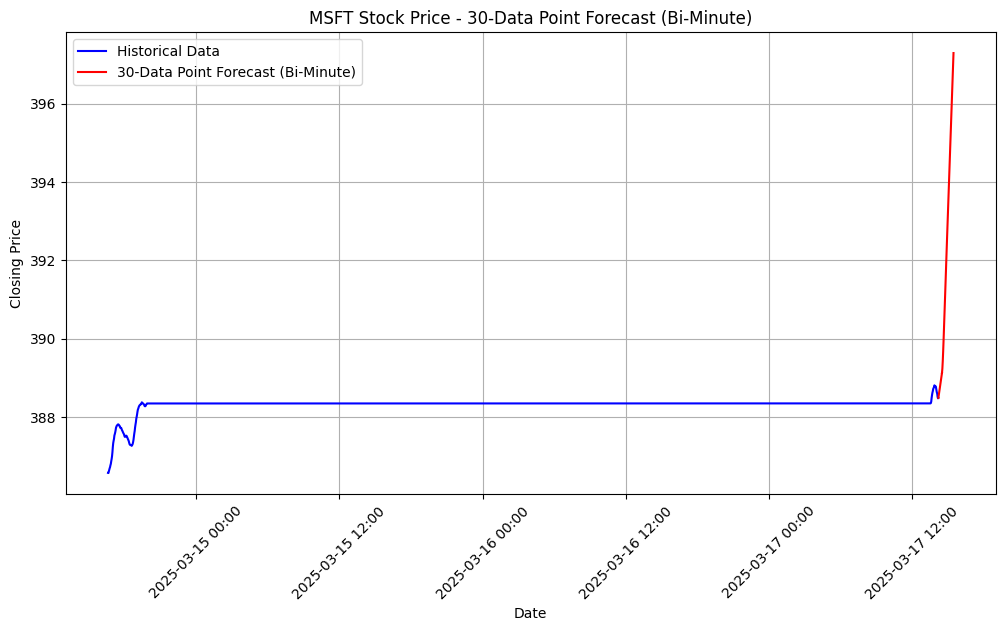

In [110]:
#Forecast next 30 working hour minute for short range MSFT stock

#Load Model
model = MSFT_short_model

#Load data and reshape
df = short_df [('MSFT', 'Moving Average')].values.reshape(-1, 1)

#Create and Fit MimMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

#Create dataset for the LSTM model
def create_dataset(dataset, look_back=1):
    X = []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
    return np.array(X)

#Function call
look_back = 120 #240 minutes look back
X = create_dataset(scaled_df, look_back)

#Reshape input to be [samples, look_back, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


'''Generate forecast dates'''
last_timestamp = short_df.index[-1]
last_timestamp = last_timestamp.tz_localize(None) #Removes time zone

#Calculate the start of the next business hour
if last_timestamp.hour == 20 and last_timestamp.minute == 58:
  next_business_day = pd.Timestamp(last_timestamp.date()) + BDay(1)     #Get business day
  next_business_hour = pd.Timestamp(next_business_day.year, 
                                    next_business_day.month,
                                    next_business_day.day, 14, 30)     #Set the time to start of trading time
else:    
    next_business_hour = last_timestamp + timedelta(minutes=2)  

#Generate an initial date range, including extra periods for filtering
short_MSFT_forecast_dates = pd.date_range(start=next_business_hour ,
                              periods=30*100, 
                              freq='2min') 

#Filter out holidays, non-business hours, and weekends
us_holidays = holidays.US()
short_MSFT_forecast_dates = [d for d in short_MSFT_forecast_dates if d.date() not in us_holidays and
                              14 <= d.hour <=20 and (d.hour !=14 or d.minute >=30) and
                              (d.hour !=20 or d.minute <=58)and
                              d.weekday()<5]

#Take only the first 30 valid business hour minutes
short_MSFT_forecast_dates = pd.DatetimeIndex(short_MSFT_forecast_dates)[:30]


#Iterate and predict the next 30 data points
short_MSFT_predictions = []   #Initilaise empty list to store prediction


'''Calculate Forecasts'''
#Use the last look_back data points to start predictions
input_data = scaled_df[-look_back:].reshape(1, look_back, 1)

for _ in range(len(short_MSFT_forecast_dates)):
    pred = model.predict(input_data, verbose=0)          #Make prediction
    short_MSFT_predictions.append(pred[0, 0])           #Append and store prediciton
    input_data = np.concatenate([input_data[:, 1:, :], 
                                 pred.reshape(1, 1, 1)], 
                                axis=1)                   #Update input data for next prediction

#Invert predictions to original scale
short_MSFT_predictions = scaler.inverse_transform(np.array(short_MSFT_predictions).reshape(-1, 1))

'''PLot the Forecasts'''
#Data for plotting
last_look_back = short_df[('MSFT', 'Moving Average')].values[-look_back:]
last_historical_date = short_df.index[-1]
last_historical_date = last_historical_date.tz_localize(None)

last_historical_price = last_look_back[-1]
first_prediction_date = short_MSFT_forecast_dates[0]
first_prediction_price = short_MSFT_predictions[0, 0]

#Plot the historical data and the forecast
fig = plt.figure(figsize=(12, 6))
plt.plot(short_df.index[-look_back:],
         last_look_back,
         label='Historical Data',
        color= 'blue')
plt.plot(short_MSFT_forecast_dates, 
         short_MSFT_predictions,
         label='30-Data Point Forecast (Bi-Minute)',
         color='red')

#Plot connector line
plt.plot([last_historical_date, first_prediction_date],
         [last_historical_price, first_prediction_price],
         color='red', label='_nolegend_')

plt.title('MSFT Stock Price - 30-Data Point Forecast (Bi-Minute)')

#Format date to show full hour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M')) 
plt.tick_params(axis='x', rotation=45)  #Rotate x-axis labels for better readability

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

#Show Plot
plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
short_MSFT_trained_model_forecast_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

In [111]:
#Create a DataFrame for short MSFT predictions
print('DataFrame of MSFT stock predictions in short range')
short_MSFT_predictions_df = pd.DataFrame({'Date': short_MSFT_forecast_dates, 
                                         'Predicted Price': short_MSFT_predictions.flatten()})

#Print the DataFrame head
short_MSFT_predictions_df.head()

DataFrame of MSFT stock predictions in short range


Date  Predicted Price
0 2025-03-17 14:30:00       389.121613
1 2025-03-17 14:32:00       389.234161
2 2025-03-17 14:34:00       389.429993
3 2025-03-17 14:36:00       389.674591
4 2025-03-17 14:38:00       389.949646

## *Medium Range Stocks Model Forecasting*

### *AAPL*

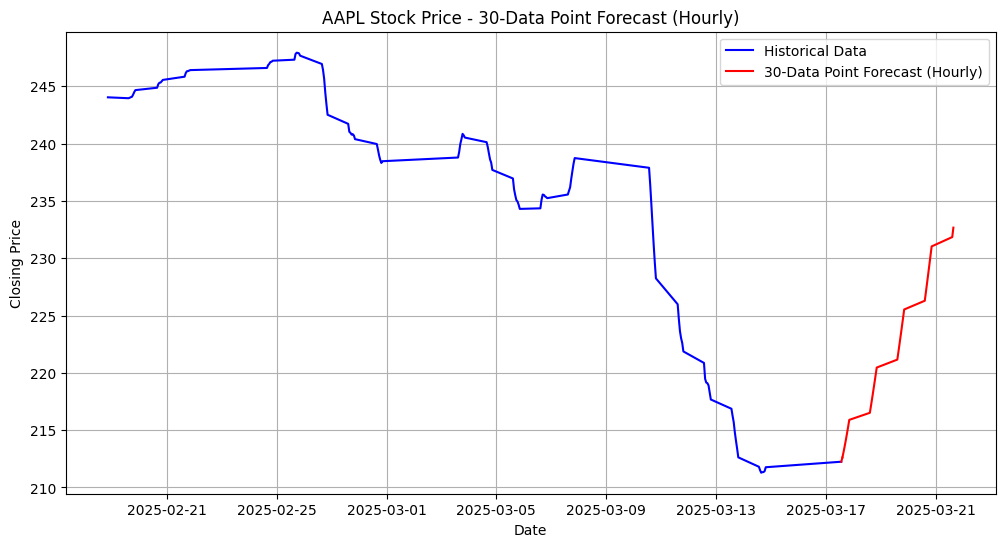

In [112]:
#Forecast next 30 working hour for medium range AAPL stock

#Load Model
model = AAPL_medium_model

#Load data and reshape
df = medium_df [('AAPL', 'Moving Average')].values.reshape(-1, 1)

#Create and Fit MimMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

#Create dataset for the LSTM model
def create_dataset(dataset, look_back=1):
    X = []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
    return np.array(X)

#Function call
look_back = 120 #120 hours look back
X = create_dataset(scaled_df, look_back)

#Reshape input to be [samples, look_back, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


'''Generate forecast dates'''
last_timestamp = medium_df.index[-1]
last_timestamp = last_timestamp.tz_localize(None) #Removes time zone

#Calculate the start of the next business hour
if last_timestamp.hour == 20 and last_timestamp.minute == 30:
  next_business_day = pd.Timestamp(last_timestamp.date()) + BDay(1)     #Get business day
  next_business_hour = pd.Timestamp(next_business_day.year,
                                    next_business_day.month,
                                    next_business_day.day, 14, 30)     #Set the time to start of trading time
else:
    next_business_hour = last_timestamp + timedelta(hours=1)

#Generate an initial date range, including extra periods for filtering
medium_AAPL_forecast_dates = pd.date_range(start=next_business_hour ,
                              periods=30*10, 
                              freq='H')

#Filter out holidays, non-business hours, and weekends
us_holidays = holidays.US()
medium_AAPL_forecast_dates = [d for d in medium_AAPL_forecast_dates if d.date() not in us_holidays and
                              14 <= d.hour <=20 and (d.hour !=14 or d.minute >=30) and
                              (d.hour !=20 or d.minute <=30)and
                              d.weekday()<5]

#Take only the first 30 valid business hours
medium_AAPL_forecast_dates = pd.DatetimeIndex(medium_AAPL_forecast_dates)[:30]


#Iterate and predict the next 30 data points
medium_AAPL_predictions = []   #Initilaise empty list to store prediction


'''Calculate Forecasts'''
#Use the last look_back data points to start predictions
input_data = scaled_df[-look_back:].reshape(1, look_back, 1)

for _ in range(len(medium_AAPL_forecast_dates)):
    pred = model.predict(input_data, verbose=0)          #Make prediction
    medium_AAPL_predictions.append(pred[0, 0])           #Append and store prediciton
    input_data = np.concatenate([input_data[:, 1:, :], 
                                 pred.reshape(1, 1, 1)], 
                                axis=1)                   #Update input data for next prediction

#Invert predictions to original scale
medium_AAPL_predictions = scaler.inverse_transform(np.array(medium_AAPL_predictions).reshape(-1, 1))

'''PLot the Forecasts'''
#Data for plotting
last_look_back = medium_df[('AAPL', 'Moving Average')].values[-look_back:]
last_historical_date = medium_df.index[-1]
last_historical_date = last_historical_date.tz_localize(None)

last_historical_price = last_look_back[-1]
first_prediction_date = medium_AAPL_forecast_dates[0]
first_prediction_price = medium_AAPL_predictions[0, 0]

#Plot the historical data and the forecast
fig = plt.figure(figsize=(12, 6))
plt.plot(medium_df.index[-look_back:],
         last_look_back,
         label='Historical Data',
        color= 'blue')
plt.plot(medium_AAPL_forecast_dates, 
         medium_AAPL_predictions,
         label='30-Data Point Forecast (Hourly)',
         color='red')

#Plot connector line
plt.plot([last_historical_date, first_prediction_date],
         [last_historical_price, first_prediction_price],
         color='red', label='_nolegend_')

plt.title('AAPL Stock Price - 30-Data Point Forecast (Hourly)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

#Show Plot
plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
medium_AAPL_trained_model_forecast_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

In [113]:
#Create a DataFrame for medium AAPL predictions
print('DataFrame of AAPL stock predictions in medium range')
medium_AAPL_predictions_df = pd.DataFrame({'Date': medium_AAPL_forecast_dates, 
                                         'Predicted Price': medium_AAPL_predictions.flatten()})

#Print the DataFrame head
medium_AAPL_predictions_df.head()

DataFrame of AAPL stock predictions in medium range


Date  Predicted Price
0 2025-03-17 14:30:00       212.612183
1 2025-03-17 15:30:00       213.086182
2 2025-03-17 16:30:00       213.594635
3 2025-03-17 17:30:00       214.134445
4 2025-03-17 18:30:00       214.701660

### *AMZN*

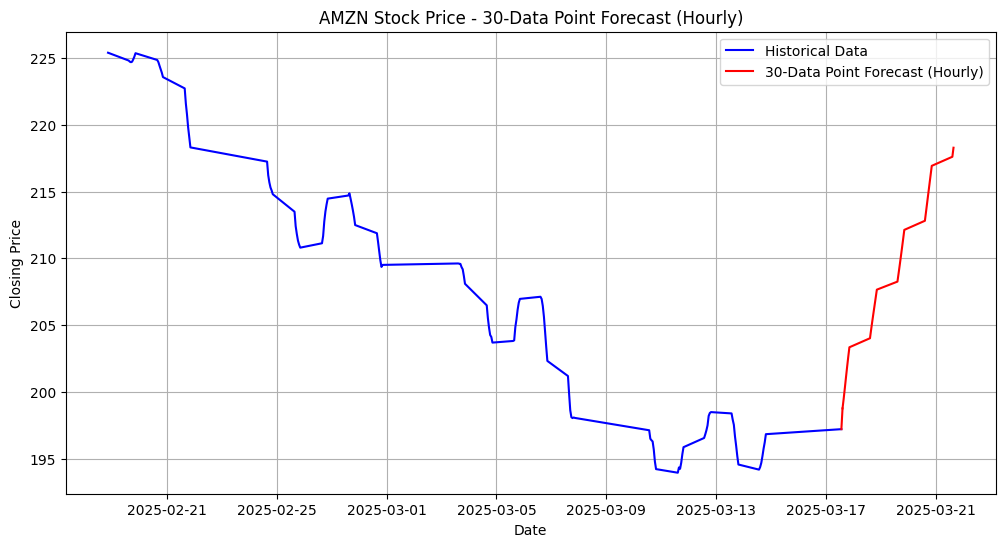

In [114]:
#Forecast next 30 working hour for medium range AMZN stock

#Load Model
model = AMZN_medium_model

#Load data and reshape
df = medium_df [('AMZN', 'Moving Average')].values.reshape(-1, 1)

#Create and Fit MimMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

#Create dataset for the LSTM model
def create_dataset(dataset, look_back=1):
    X = []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
    return np.array(X)

#Function call
look_back = 120 #120 hours look back
X = create_dataset(scaled_df, look_back)

#Reshape input to be [samples, look_back, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


'''Generate forecast dates'''
last_timestamp = medium_df.index[-1]
last_timestamp = last_timestamp.tz_localize(None) #Removes time zone

#Calculate the start of the next business hour
if last_timestamp.hour == 20 and last_timestamp.minute == 30:
  next_business_day = pd.Timestamp(last_timestamp.date()) + BDay(1)     #Get business day
  next_business_hour = pd.Timestamp(next_business_day.year,
                                    next_business_day.month,
                                    next_business_day.day, 14, 30)     #Set the time to start of trading time
else:
    next_business_hour = last_timestamp + timedelta(hours=1)

#Generate an initial date range, including extra periods for filtering
medium_AMZN_forecast_dates = pd.date_range(start=next_business_hour ,
                              periods=30*10, 
                              freq='H')

#Filter out holidays, non-business hours, and weekends
us_holidays = holidays.US()
medium_AMZN_forecast_dates = [d for d in medium_AMZN_forecast_dates if d.date() not in us_holidays and
                              14 <= d.hour <=20 and (d.hour !=14 or d.minute >=30) and
                              (d.hour !=20 or d.minute <=30)and
                              d.weekday()<5]

#Take only the first 30 valid business hours
medium_AMZN_forecast_dates = pd.DatetimeIndex(medium_AMZN_forecast_dates)[:30]


#Iterate and predict the next 30 data points
medium_AMZN_predictions = []   #Initilaise empty list to store prediction


'''Calculate Forecasts'''
#Use the last look_back data points to start predictions
input_data = scaled_df[-look_back:].reshape(1, look_back, 1)

for _ in range(len(medium_AMZN_forecast_dates)):
    pred = model.predict(input_data, verbose=0)          #Make prediction
    medium_AMZN_predictions.append(pred[0, 0])           #Append and store prediciton
    input_data = np.concatenate([input_data[:, 1:, :], 
                                 pred.reshape(1, 1, 1)], 
                                axis=1)                   #Update input data for next prediction

#Invert predictions to original scale
medium_AMZN_predictions = scaler.inverse_transform(np.array(medium_AMZN_predictions).reshape(-1, 1))

'''PLot the Forecasts'''
#Data for plotting
last_look_back = medium_df[('AMZN', 'Moving Average')].values[-look_back:]
last_historical_date = medium_df.index[-1]
last_historical_date = last_historical_date.tz_localize(None)

last_historical_price = last_look_back[-1]
first_prediction_date = medium_AMZN_forecast_dates[0]
first_prediction_price = medium_AMZN_predictions[0, 0]

#Plot the historical data and the forecast
fig = plt.figure(figsize=(12, 6))
plt.plot(medium_df.index[-look_back:],
         last_look_back,
         label='Historical Data',
        color= 'blue')
plt.plot(medium_AMZN_forecast_dates, 
         medium_AMZN_predictions,
         label='30-Data Point Forecast (Hourly)',
         color='red')

#Plot connector line
plt.plot([last_historical_date, first_prediction_date],
         [last_historical_price, first_prediction_price],
         color='red', label='_nolegend_')

plt.title('AMZN Stock Price - 30-Data Point Forecast (Hourly)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

#Show Plot
plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
medium_AMZN_trained_model_forecast_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

In [115]:
#Create a DataFrame for medium AMZN predictions
print('DataFrame of AMZN stock predictions in medium range')
medium_AMZN_predictions_df = pd.DataFrame({'Date': medium_AMZN_forecast_dates, 
                                         'Predicted Price': medium_AMZN_predictions.flatten()})

#Print the DataFrame head
medium_AMZN_predictions_df.head()

DataFrame of AMZN stock predictions in medium range


Date  Predicted Price
0 2025-03-17 14:30:00       198.771408
1 2025-03-17 15:30:00       199.491882
2 2025-03-17 16:30:00       200.278534
3 2025-03-17 17:30:00       201.083282
4 2025-03-17 18:30:00       201.872696

### *GOOGL*

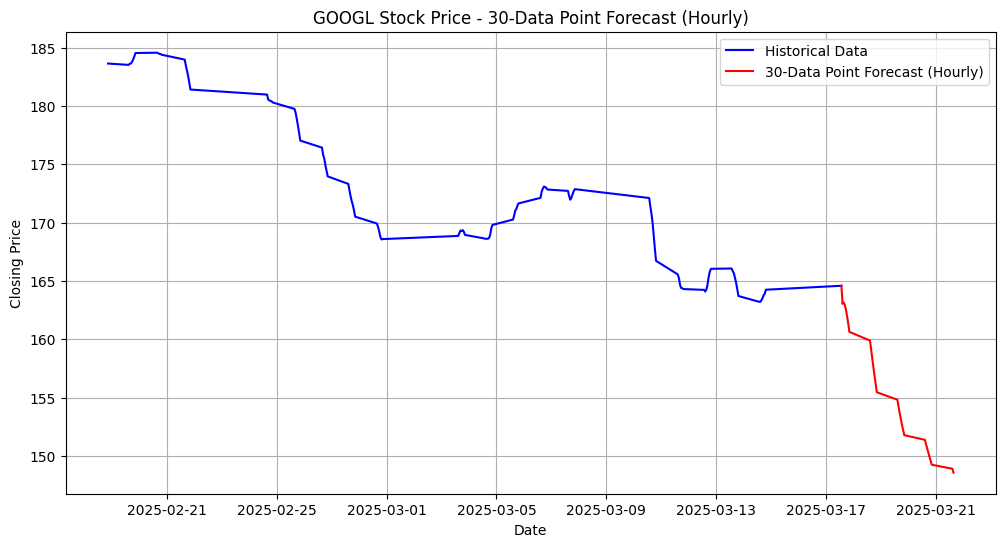

In [116]:
#Forecast next 30 working hour for medium range GOOGL stock

#Load Model
model = GOOGL_medium_model

#Load data and reshape
df = medium_df [('GOOGL', 'Moving Average')].values.reshape(-1, 1)

#Create and Fit MimMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

#Create dataset for the LSTM model
def create_dataset(dataset, look_back=1):
    X = []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
    return np.array(X)

#Function call
look_back = 120 #120 hours look back
X = create_dataset(scaled_df, look_back)

#Reshape input to be [samples, look_back, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


'''Generate forecast dates'''
last_timestamp = medium_df.index[-1]
last_timestamp = last_timestamp.tz_localize(None) #Removes time zone

#Calculate the start of the next business hour
if last_timestamp.hour == 20 and last_timestamp.minute == 30:
  next_business_day = pd.Timestamp(last_timestamp.date()) + BDay(1)     #Get business day
  next_business_hour = pd.Timestamp(next_business_day.year,
                                    next_business_day.month,
                                    next_business_day.day, 14, 30)     #Set the time to start of trading time
else:
    next_business_hour = last_timestamp + timedelta(hours=1)

#Generate an initial date range, including extra periods for filtering
medium_GOOGL_forecast_dates = pd.date_range(start=next_business_hour ,
                              periods=30*10, 
                              freq='H')

#Filter out holidays, non-business hours, and weekends
us_holidays = holidays.US()
medium_GOOGL_forecast_dates = [d for d in medium_GOOGL_forecast_dates if d.date() not in us_holidays and
                              14 <= d.hour <=20 and (d.hour !=14 or d.minute >=30) and
                              (d.hour !=20 or d.minute <=30)and
                              d.weekday()<5]

#Take only the first 30 valid business hours
medium_GOOGL_forecast_dates = pd.DatetimeIndex(medium_GOOGL_forecast_dates)[:30]


#Iterate and predict the next 30 data points
medium_GOOGL_predictions = []   #Initilaise empty list to store prediction


'''Calculate Forecasts'''
#Use the last look_back data points to start predictions
input_data = scaled_df[-look_back:].reshape(1, look_back, 1)

for _ in range(len(medium_GOOGL_forecast_dates)):
    pred = model.predict(input_data, verbose=0)          #Make prediction
    medium_GOOGL_predictions.append(pred[0, 0])           #Append and store prediciton
    input_data = np.concatenate([input_data[:, 1:, :], 
                                 pred.reshape(1, 1, 1)], 
                                axis=1)                   #Update input data for next prediction

#Invert predictions to original scale
medium_GOOGL_predictions = scaler.inverse_transform(np.array(medium_GOOGL_predictions).reshape(-1, 1))

'''PLot the Forecasts'''
#Data for plotting
last_look_back = medium_df[('GOOGL', 'Moving Average')].values[-look_back:]
last_historical_date = medium_df.index[-1]
last_historical_date = last_historical_date.tz_localize(None)

last_historical_price = last_look_back[-1]
first_prediction_date = medium_GOOGL_forecast_dates[0]
first_prediction_price = medium_GOOGL_predictions[0, 0]

#Plot the historical data and the forecast
fig = plt.figure(figsize=(12, 6))
plt.plot(medium_df.index[-look_back:],
         last_look_back,
         label='Historical Data',
        color= 'blue')
plt.plot(medium_GOOGL_forecast_dates, 
         medium_GOOGL_predictions,
         label='30-Data Point Forecast (Hourly)',
         color='red')

#Plot connector line
plt.plot([last_historical_date, first_prediction_date],
         [last_historical_price, first_prediction_price],
         color='red', label='_nolegend_')

plt.title('GOOGL Stock Price - 30-Data Point Forecast (Hourly)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

#Show Plot
plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
medium_GOOGL_trained_model_forecast_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

In [117]:
#Create a DataFrame for medium GOOGL predictions
print('DataFrame of GOOGL stock predictions in medium range')
medium_GOOGL_predictions_df = pd.DataFrame({'Date': medium_GOOGL_forecast_dates, 
                                         'Predicted Price': medium_GOOGL_predictions.flatten()})

#Print the DataFrame head
medium_GOOGL_predictions_df.head()

DataFrame of GOOGL stock predictions in medium range


Date  Predicted Price
0 2025-03-17 14:30:00       163.077316
1 2025-03-17 15:30:00       163.157272
2 2025-03-17 16:30:00       162.937805
3 2025-03-17 17:30:00       162.520157
4 2025-03-17 18:30:00       161.970200

### *MSFT*

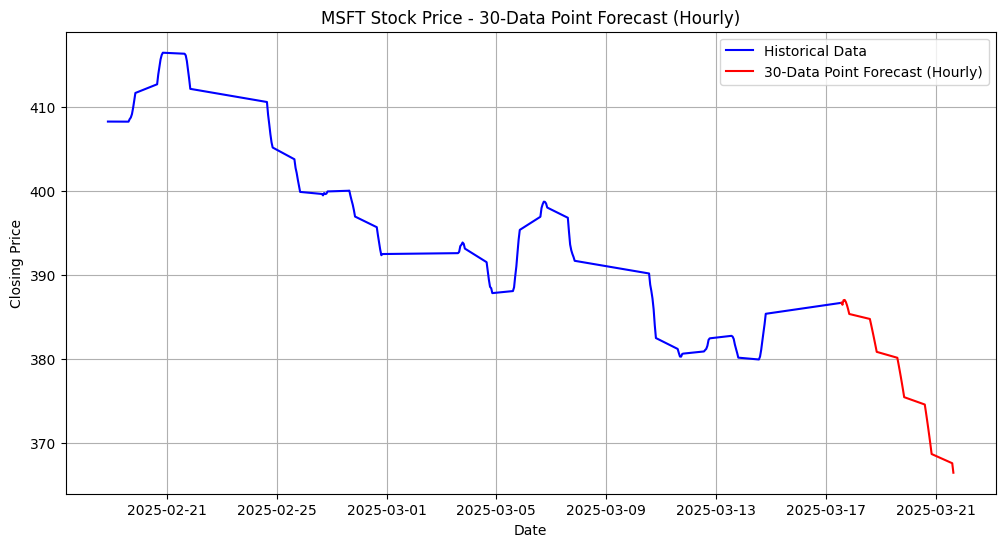

In [118]:
#Forecast next 30 working hour for medium range MSFT stock

#Load Model
model = MSFT_medium_model

#Load data and reshape
df = medium_df [('MSFT', 'Moving Average')].values.reshape(-1, 1)

#Create and Fit MimMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

#Create dataset for the LSTM model
def create_dataset(dataset, look_back=1):
    X = []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
    return np.array(X)

#Function call
look_back = 120 #120 hours look back
X = create_dataset(scaled_df, look_back)

#Reshape input to be [samples, look_back, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


'''Generate forecast dates'''
last_timestamp = medium_df.index[-1]
last_timestamp = last_timestamp.tz_localize(None) #Removes time zone

#Calculate the start of the next business hour
if last_timestamp.hour == 20 and last_timestamp.minute == 30:
  next_business_day = pd.Timestamp(last_timestamp.date()) + BDay(1)     #Get business day
  next_business_hour = pd.Timestamp(next_business_day.year,
                                    next_business_day.month,
                                    next_business_day.day, 14, 30)     #Set the time to start of trading time
else:
    next_business_hour = last_timestamp + timedelta(hours=1)

#Generate an initial date range, including extra periods for filtering
medium_MSFT_forecast_dates = pd.date_range(start=next_business_hour ,
                              periods=30*10, 
                              freq='H')

#Filter out holidays, non-business hours, and weekends
us_holidays = holidays.US()
medium_MSFT_forecast_dates = [d for d in medium_MSFT_forecast_dates if d.date() not in us_holidays and
                              14 <= d.hour <=20 and (d.hour !=14 or d.minute >=30) and
                              (d.hour !=20 or d.minute <=30)and
                              d.weekday()<5]

#Take only the first 30 valid business hours
medium_MSFT_forecast_dates = pd.DatetimeIndex(medium_MSFT_forecast_dates)[:30]


#Iterate and predict the next 30 data points
medium_MSFT_predictions = []   #Initilaise empty list to store prediction


'''Calculate Forecasts'''
#Use the last look_back data points to start predictions
input_data = scaled_df[-look_back:].reshape(1, look_back, 1)

for _ in range(len(medium_MSFT_forecast_dates)):
    pred = model.predict(input_data, verbose=0)          #Make prediction
    medium_MSFT_predictions.append(pred[0, 0])           #Append and store prediciton
    input_data = np.concatenate([input_data[:, 1:, :], 
                                 pred.reshape(1, 1, 1)], 
                                axis=1)                   #Update input data for next prediction

#Invert predictions to original scale
medium_MSFT_predictions = scaler.inverse_transform(np.array(medium_MSFT_predictions).reshape(-1, 1))

'''PLot the Forecasts'''
#Data for plotting
last_look_back = medium_df[('MSFT', 'Moving Average')].values[-look_back:]
last_historical_date = medium_df.index[-1]
last_historical_date = last_historical_date.tz_localize(None)

last_historical_price = last_look_back[-1]
first_prediction_date = medium_MSFT_forecast_dates[0]
first_prediction_price = medium_MSFT_predictions[0, 0]

#Plot the historical data and the forecast
fig = plt.figure(figsize=(12, 6))
plt.plot(medium_df.index[-look_back:],
         last_look_back,
         label='Historical Data',
        color= 'blue')
plt.plot(medium_MSFT_forecast_dates, 
         medium_MSFT_predictions,
         label='30-Data Point Forecast (Hourly)',
         color='red')

#Plot connector line
plt.plot([last_historical_date, first_prediction_date],
         [last_historical_price, first_prediction_price],
         color='red', label='_nolegend_')

plt.title('MSFT Stock Price - 30-Data Point Forecast (Hourly)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Show Plot
plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
medium_MSFT_trained_model_forecast_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

In [119]:
#Create a DataFrame for medium MSFT predictions
print('DataFrame of MSFT stock predictions in medium range')
medium_MSFT_predictions_df = pd.DataFrame({'Date': medium_MSFT_forecast_dates, 
                                         'Predicted Price': medium_MSFT_predictions.flatten()})

#Print the DataFrame head
medium_MSFT_predictions_df.head()

DataFrame of MSFT stock predictions in medium range


Date  Predicted Price
0 2025-03-17 14:30:00       386.516724
1 2025-03-17 15:30:00       387.004089
2 2025-03-17 16:30:00       387.036407
3 2025-03-17 17:30:00       386.803131
4 2025-03-17 18:30:00       386.411102

## *Long Range Stocks Model Forecasting*

### *AAPL*

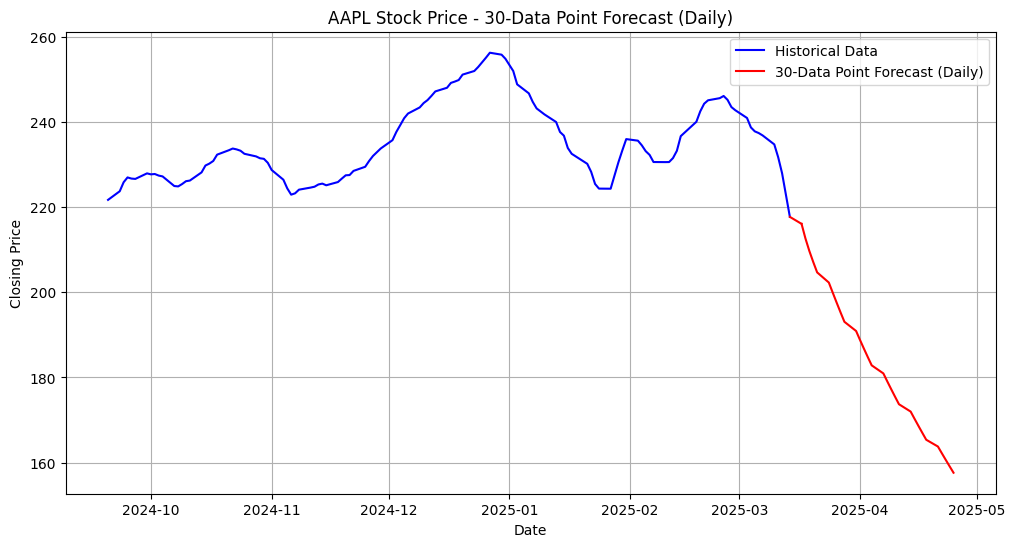

In [120]:
#Forecast next 30 working days for long range AAPL stock

#Load Model
model = AAPL_long_model

#Load data and reshape
df = long_df [('AAPL', 'Moving Average')].values.reshape(-1, 1)

#Create and Fit MimMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

#Create dataset for the LSTM model
def create_dataset(dataset, look_back=1):
    X = []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
    return np.array(X)

#Function call
look_back = 120 #120 working day look back
X = create_dataset(scaled_df, look_back)

#Reshape input to be [samples, look_back, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


'''Generate forecast dates'''
last_timestamp = long_df.index[-1]

#Get next business day and calcualte forecast dates 
next_business_day = last_timestamp + BDay(1)
long_AAPL_forecast_dates = pd.date_range(start=next_business_day,
                              periods=30,
                              freq='B') 

#Filter out holidays
us_holidays = holidays.US()
long_AAPL_forecast_dates = [d for d in long_AAPL_forecast_dates if d.date() not in us_holidays]
long_AAPL_forecast_dates = pd.DatetimeIndex(long_AAPL_forecast_dates)


#Iterate and predict the next 30 data points
long_AAPL_predictions = []   #Initilaise empty list to store prediction


'''Calculate Forecasts'''
#Use the last look_back data points to start predictions
input_data = scaled_df[-look_back:].reshape(1, look_back, 1)

for _ in range(len(long_AAPL_forecast_dates)):
    pred = model.predict(input_data, verbose=0)          #Make prediction
    long_AAPL_predictions.append(pred[0, 0])           #Append and store prediciton
    input_data = np.concatenate([input_data[:, 1:, :], 
                                 pred.reshape(1, 1, 1)], 
                                axis=1)                   #Update input data for next prediction

#Invert predictions to original scale
long_AAPL_predictions = scaler.inverse_transform(np.array(long_AAPL_predictions).reshape(-1, 1))

'''PLot the Forecasts'''
#Data for plotting
last_look_back = long_df[('AAPL', 'Moving Average')].values[-look_back:]
last_historical_date = long_df.index[-1]
last_historical_date = last_historical_date.tz_localize(None)

last_historical_price = last_look_back[-1]
first_prediction_date = long_AAPL_forecast_dates[0]
first_prediction_price = long_AAPL_predictions[0, 0]

#Plot the historical data and the forecast
fig = plt.figure(figsize=(12, 6))
plt.plot(long_df.index[-look_back:],
         last_look_back,
         label='Historical Data',
        color= 'blue')
plt.plot(long_AAPL_forecast_dates, 
         long_AAPL_predictions,
         label='30-Data Point Forecast (Daily)',
         color='red')

#Plot connector line
plt.plot([last_historical_date, first_prediction_date],
         [last_historical_price, first_prediction_price],
         color='red', label='_nolegend_')

plt.title('AAPL Stock Price - 30-Data Point Forecast (Daily)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

#Show Plot
plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
long_AAPL_trained_model_forecast_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

In [121]:
#Create a DataFrame for long AAPL predictions
print('DataFrame of AAPL stock predictions in long range')
long_AAPL_predictions_df = pd.DataFrame({'Date': long_AAPL_forecast_dates, 
                                         'Predicted Price': long_AAPL_predictions.flatten()})

#Print the DataFrame head
long_AAPL_predictions_df.head()

DataFrame of AAPL stock predictions in long range


Date  Predicted Price
0 2025-03-17       216.056595
1 2025-03-18       212.618896
2 2025-03-19       209.686554
3 2025-03-20       207.097855
4 2025-03-21       204.662888

### *AMZN*

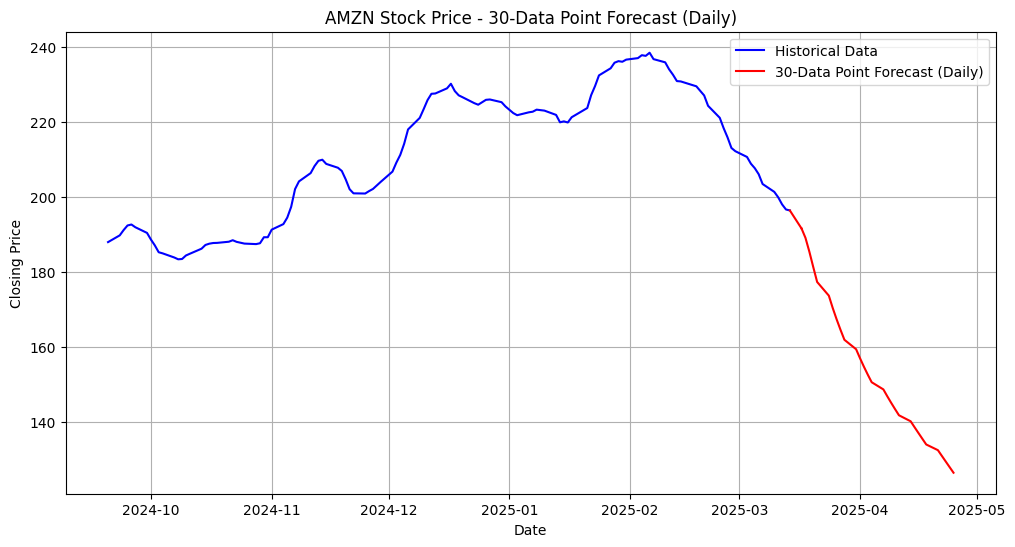

In [122]:
#Forecast next 30 working days for long range AMZN stock

#Load Model
model = AMZN_long_model

#Load data and reshape
df = long_df [('AMZN', 'Moving Average')].values.reshape(-1, 1)

#Create and Fit MimMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

#Create dataset for the LSTM model
def create_dataset(dataset, look_back=1):
    X = []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
    return np.array(X)

#Function call
look_back = 120 #120 working day look back
X = create_dataset(scaled_df, look_back)

#Reshape input to be [samples, look_back, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


'''Generate forecast dates'''
last_timestamp = long_df.index[-1]

#Get next business day and calcualte forecast dates 
next_business_day = last_timestamp + BDay(1)
long_AMZN_forecast_dates = pd.date_range(start=next_business_day,
                              periods=30,
                              freq='B') 

#Filter out holidays
us_holidays = holidays.US()
long_AMZN_forecast_dates = [d for d in long_AMZN_forecast_dates if d.date() not in us_holidays]
long_AMZN_forecast_dates = pd.DatetimeIndex(long_AMZN_forecast_dates)


#Iterate and predict the next 30 data points
long_AMZN_predictions = []   #Initilaise empty list to store prediction


'''Calculate Forecasts'''
#Use the last look_back data points to start predictions
input_data = scaled_df[-look_back:].reshape(1, look_back, 1)

for _ in range(len(long_AMZN_forecast_dates)):
    pred = model.predict(input_data, verbose=0)          #Make prediction
    long_AMZN_predictions.append(pred[0, 0])           #Append and store prediciton
    input_data = np.concatenate([input_data[:, 1:, :], 
                                 pred.reshape(1, 1, 1)], 
                                axis=1)                   #Update input data for next prediction

#Invert predictions to original scale
long_AMZN_predictions = scaler.inverse_transform(np.array(long_AMZN_predictions).reshape(-1, 1))

'''PLot the Forecasts'''
#Data for plotting
last_look_back = long_df[('AMZN', 'Moving Average')].values[-look_back:]
last_historical_date = long_df.index[-1]
last_historical_date = last_historical_date.tz_localize(None)

last_historical_price = last_look_back[-1]
first_prediction_date = long_AMZN_forecast_dates[0]
first_prediction_price = long_AMZN_predictions[0, 0]

#Plot the historical data and the forecast
fig = plt.figure(figsize=(12, 6))
plt.plot(long_df.index[-look_back:],
         last_look_back,
         label='Historical Data',
        color= 'blue')
plt.plot(long_AMZN_forecast_dates, 
         long_AMZN_predictions,
         label='30-Data Point Forecast (Daily)',
         color='red')

#Plot connector line
plt.plot([last_historical_date, first_prediction_date],
         [last_historical_price, first_prediction_price],
         color='red', label='_nolegend_')

plt.title('AMZN Stock Price - 30-Data Point Forecast (Daily)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

#Show Plot
plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
long_AMZN_trained_model_forecast_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

In [123]:
#Create a DataFrame for long AMZN predictions
print('DataFrame of AMZN stock predictions in long range')
long_AMZN_predictions_df = pd.DataFrame({'Date': long_AMZN_forecast_dates, 
                                         'Predicted Price': long_AMZN_predictions.flatten()})

#Print the DataFrame head
long_AMZN_predictions_df.head()

DataFrame of AMZN stock predictions in long range


Date  Predicted Price
0 2025-03-17       191.554581
1 2025-03-18       189.074631
2 2025-03-19       185.388062
3 2025-03-20       181.287964
4 2025-03-21       177.304077

### *GOOGL*

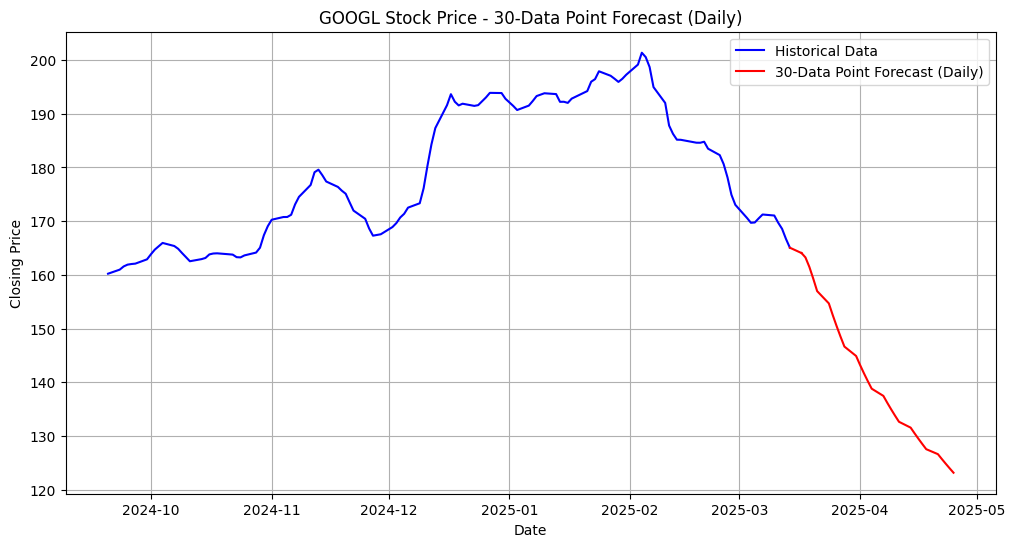

In [124]:
#Forecast next 30 working days for long range GOOGL stock

#Load Model
model = GOOGL_long_model

#Load data and reshape
df = long_df [('GOOGL', 'Close')].values.reshape(-1, 1)

#Create and Fit MimMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

#Create dataset for the LSTM model
def create_dataset(dataset, look_back=1):
    X = []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
    return np.array(X)

#Function call
look_back = 120 #120 working day look back
X = create_dataset(scaled_df, look_back)

#Reshape input to be [samples, look_back, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


'''Generate forecast dates'''
last_timestamp = long_df.index[-1]

#Get next business day and calcualte forecast dates 
next_business_day = last_timestamp + BDay(1)
long_GOOGL_forecast_dates = pd.date_range(start=next_business_day,
                              periods=30,
                              freq='B') 

#Filter out holidays
us_holidays = holidays.US()
long_GOOGL_forecast_dates = [d for d in long_GOOGL_forecast_dates if d.date() not in us_holidays]
long_GOOGL_forecast_dates = pd.DatetimeIndex(long_GOOGL_forecast_dates)


#Iterate and predict the next 30 data points
long_GOOGL_predictions = []   #Initilaise empty list to store prediction


'''Calculate Forecasts'''
#Use the last look_back data points to start predictions
input_data = scaled_df[-look_back:].reshape(1, look_back, 1)

for _ in range(len(long_GOOGL_forecast_dates)):
    pred = model.predict(input_data, verbose=0)          #Make prediction
    long_GOOGL_predictions.append(pred[0, 0])           #Append and store prediciton
    input_data = np.concatenate([input_data[:, 1:, :], 
                                 pred.reshape(1, 1, 1)], 
                                axis=1)                   #Update input data for next prediction

#Invert predictions to original scale
long_GOOGL_predictions = scaler.inverse_transform(np.array(long_GOOGL_predictions).reshape(-1, 1))

'''PLot the Forecasts'''
#Data for plotting
last_look_back = long_df[('GOOGL', 'Moving Average')].values[-look_back:]
last_historical_date = long_df.index[-1]
last_historical_date = last_historical_date.tz_localize(None)

last_historical_price = last_look_back[-1]
first_prediction_date = long_GOOGL_forecast_dates[0]
first_prediction_price = long_GOOGL_predictions[0, 0]

#Plot the historical data and the forecast
fig = plt.figure(figsize=(12, 6))
plt.plot(long_df.index[-look_back:],
         last_look_back,
         label='Historical Data',
        color= 'blue')
plt.plot(long_GOOGL_forecast_dates, 
         long_GOOGL_predictions,
         label='30-Data Point Forecast (Daily)',
         color='red')

#Plot connector line
plt.plot([last_historical_date, first_prediction_date],
         [last_historical_price, first_prediction_price],
         color='red', label='_nolegend_')

plt.title('GOOGL Stock Price - 30-Data Point Forecast (Daily)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

#Show Plot
plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
long_GOOGL_trained_model_forecast_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

In [125]:
#Create a DataFrame for long GOOGL predictions
print('DataFrame of GOOGL stock predictions in long range')
long_GOOGL_predictions_df = pd.DataFrame({'Date': long_GOOGL_forecast_dates, 
                                         'Predicted Price': long_GOOGL_predictions.flatten()})

#Print the DataFrame head
long_GOOGL_predictions_df.head()

DataFrame of GOOGL stock predictions in long range


Date  Predicted Price
0 2025-03-17       164.056961
1 2025-03-18       163.243561
2 2025-03-19       161.482437
3 2025-03-20       159.298721
4 2025-03-21       156.973846

### *MSFT*

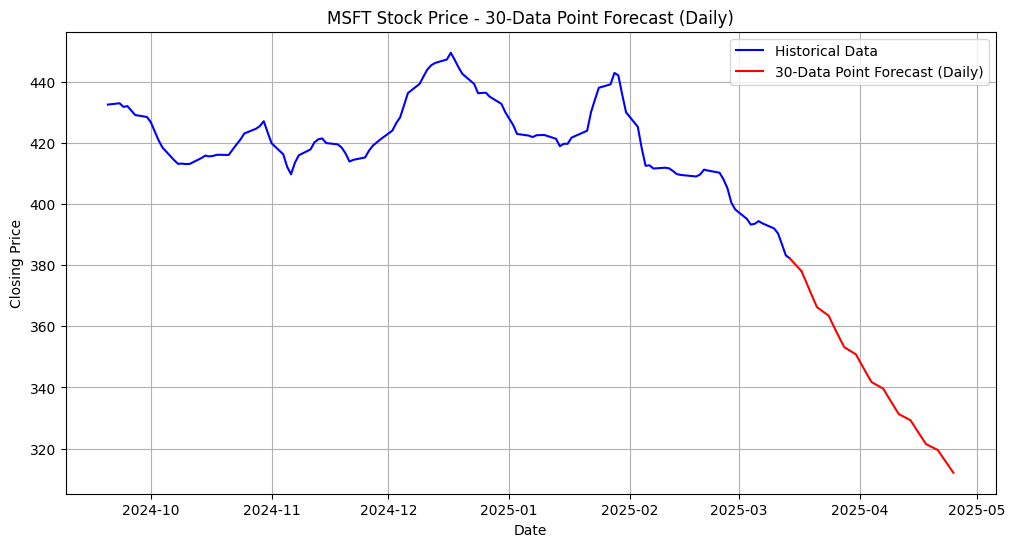

In [126]:
#Forecast next 30 working days for long range MSFT stock

#Load Model
model = MSFT_long_model

#Load data and reshape
df = long_df [('MSFT', 'Moving Average')].values.reshape(-1, 1)

#Create and Fit MimMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

#Create dataset for the LSTM model
def create_dataset(dataset, look_back=1):
    X = []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
    return np.array(X)

#Function call
look_back = 120 #120 working day look back
X = create_dataset(scaled_df, look_back)

#Reshape input to be [samples, look_back, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


'''Generate forecast dates'''
last_timestamp = long_df.index[-1]

#Get next business day and calcualte forecast dates 
next_business_day = last_timestamp + BDay(1)
long_MSFT_forecast_dates = pd.date_range(start=next_business_day,
                              periods=30,
                              freq='B') 

#Filter out holidays
us_holidays = holidays.US()
long_MSFT_forecast_dates = [d for d in long_MSFT_forecast_dates if d.date() not in us_holidays]
long_MSFT_forecast_dates = pd.DatetimeIndex(long_MSFT_forecast_dates)


#Iterate and predict the next 30 data points
long_MSFT_predictions = []   #Initilaise empty list to store prediction


'''Calculate Forecasts'''
#Use the last look_back data points to start predictions
input_data = scaled_df[-look_back:].reshape(1, look_back, 1)

for _ in range(len(long_MSFT_forecast_dates)):
    pred = model.predict(input_data, verbose=0)          #Make prediction
    long_MSFT_predictions.append(pred[0, 0])           #Append and store prediciton
    input_data = np.concatenate([input_data[:, 1:, :], 
                                 pred.reshape(1, 1, 1)], 
                                axis=1)                   #Update input data for next prediction

#Invert predictions to original scale
long_MSFT_predictions = scaler.inverse_transform(np.array(long_MSFT_predictions).reshape(-1, 1))

'''PLot the Forecasts'''
#Data for plotting
last_look_back = long_df[('MSFT', 'Moving Average')].values[-look_back:]
last_historical_date = long_df.index[-1]
last_historical_date = last_historical_date.tz_localize(None)

last_historical_price = last_look_back[-1]
first_prediction_date = long_MSFT_forecast_dates[0]
first_prediction_price = long_MSFT_predictions[0, 0]

#Plot the historical data and the forecast
fig = plt.figure(figsize=(12, 6))
plt.plot(long_df.index[-look_back:],
         last_look_back,
         label='Historical Data',
        color= 'blue')
plt.plot(long_MSFT_forecast_dates, 
         long_MSFT_predictions,
         label='30-Data Point Forecast (Daily)',
         color='red')

#Plot connector line
plt.plot([last_historical_date, first_prediction_date],
         [last_historical_price, first_prediction_price],
         color='red', label='_nolegend_')

plt.title('MSFT Stock Price - 30-Data Point Forecast (Daily)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

#Show Plot
plt.show()

#Convert Matplotlib figure to Plotly figure for dashboard
long_MSFT_trained_model_forecast_plotly_fig = go.Figure(data=tls.mpl_to_plotly(fig))

In [127]:
#Create a DataFrame for long MSFT predictions
print('DataFrame of MSFT stock predictions in long range')
long_MSFT_predictions_df = pd.DataFrame({'Date': long_MSFT_forecast_dates, 
                                         'Predicted Price': long_MSFT_predictions.flatten()})

#Print the DataFrame head
long_MSFT_predictions_df.head()

DataFrame of MSFT stock predictions in long range


Date  Predicted Price
0 2025-03-17       378.062256
1 2025-03-18       375.146851
2 2025-03-19       372.120758
3 2025-03-20       369.144104
4 2025-03-21       366.256561

# **Interactive Dashboard**

In [128]:
#Create the Dash app instance with external stylesheets
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

#Define dropdowns
main_dropdown_options = [
    {'label': 'Historical Data Plot','value':'historical_data'},
    {'label': 'Model Plot','value':'model_plot'},
    {'label': 'Trained Model Plot','value':'trained_model_plot'},
    {'label': 'Trained Model Prediction Plot','value':'trained_model_prediction_plot'},]

data_range_dropdown_options = [
    {'label': 'Short Range', 'value': 'short_df'},
    {'label': 'Medium Range', 'value': 'medium_df'},
    {'label': 'Long Range', 'value': 'long_df'}]

stock_dropdown_options = [
    {'label': 'AAPL', 'value': 'AAPL'},
    {'label': 'AMZN', 'value': 'AMZN'},
    {'label': 'GOOGL', 'value': 'GOOGL'},
    {'label': 'MSFT', 'value': 'MSFT'}]

key_metrics_dropdown_options = [
    {'label': 'Closing Price', 'value': 'Close'},
    {'label': 'Volume', 'value': 'Volume'},
    {'label': 'Moving Average', 'value': 'Moving Average'},
    {'label': 'Volatility', 'value': 'Volatility'}]

model_dropdown_options = [
    {'label': 'ARIMA', 'value': 'ARIMA'},
    {'label': 'LSTM', 'value': 'LSTM'},
    {'label': 'Prophet', 'value': 'Prophet'}]

# Define the app layout
app.layout = html.Div([
    dbc.Row([
        dbc.Col([
            html.H1('Interactive Stock Data Visualisation Dashboard'), #Dashboard Title
        ], width=10),
    ]),

    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='main_dropdown',
                options=main_dropdown_options,
                value='historical_data',  #Default value
                clearable=False,
            ),
        ], width=4),

        #Historical data plot sub-dropdowns
        html.Div(id='historical_plot_options',
                 children=[
                     dbc.Row([
                         dbc.Col([
                             dcc.Dropdown(
                                 id='historical_data_range',
                                 options=data_range_dropdown_options,
                                 value='short_df',  #Default data range
                                 clearable=False,
                             ),
                         ], width=5),

                         dbc.Col([
                             dcc.Dropdown(
                                 id='historical_stock_tickers',
                                 options=stock_dropdown_options,
                                 value='AAPL',  #Default stock
                                 clearable=False,
                             ),
                         ], width=5),
                     ]),
                     dbc.Row([
                         dbc.Col([
                             dcc.Dropdown(
                                 id='key_metrics',
                                 options=key_metrics_dropdown_options,
                                 value='Close',  #Default key metrics
                                 clearable=False,
                             ),
                         ], width=10),
                     ]),
                 ]),

        #Model plot sub-dropdowns
        html.Div(id='model_plot_options',
                 children=[
                     dbc.Row([
                         dbc.Col([
                             dcc.Dropdown(
                                 id='model_data_range',
                                 options=data_range_dropdown_options,
                                 value='short_df',  #Default data range
                                 clearable=False,
                             ),
                         ], width=5),

                         dbc.Col([
                             dcc.Dropdown(
                                 id='model_stock_tickers',
                                 options=stock_dropdown_options,
                                 value='AAPL',  #Default stock
                                 clearable=False,
                             ),
                         ], width=5),
                     ]),

                     dbc.Row([
                         dbc.Col([
                             dcc.Dropdown(
                                 id='model',
                                 options=model_dropdown_options,
                                 value='ARIMA',  #Default model
                                 clearable=False,
                             ),
                         ], width=10),
                     ]),
                 ], style={'display': 'none'}),  #Initially hidden

        #Trained Model plot sub-dropdowns
        html.Div(id='trained_model_plot_options',
                 children=[
                     dbc.Row([
                         dbc.Col([
                             dcc.Dropdown(
                                 id='trained_model_data_range',
                                 options=data_range_dropdown_options,
                                 value='short_df',  #Default data range
                                 clearable=False,
                             ),
                         ], width=5),

                         dbc.Col([
                             dcc.Dropdown(
                                 id='trained_model_stock_tickers',
                                 options=stock_dropdown_options,
                                 value='AAPL',  #Default stock
                                 clearable=False,
                             ),
                         ], width=10),
                     ]),
                 ], style={'display': 'none'}),  #Initially hidden
        
        #Trained Prediction Model plot sub-dropdowns
        html.Div(id='trained_model_prediction_plot_options',
                 children=[
                     dbc.Row([
                         dbc.Col([
                             dcc.Dropdown(
                                 id='trained_model_prediction_data_range',
                                 options=data_range_dropdown_options,
                                 value='short_df',  #Default data range
                                 clearable=False,
                             ),
                         ], width=5),

                         dbc.Col([
                             dcc.Dropdown(
                                 id='trained_model_prediction_stock_tickers',
                                 options=stock_dropdown_options,
                                 value='AAPL',  #Default stock
                                 clearable=False,
                             ),
                         ], width=10),
                     ]),
                 ], style={'display': 'none'}),  #Initially hidden
        dbc.Col([
            dcc.Graph(id='main_graph'),
        ], width=10),
    ]),
])

#Define callback function to update the graph
@app.callback(
    Output('main_graph', 'figure'),
    [Input('main_dropdown', 'value'),
     Input('historical_data_range', 'value'),  
     Input('historical_stock_tickers', 'value'),
     Input('key_metrics', 'value'),
     Input('model_data_range', 'value'),
     Input('model_stock_tickers', 'value'),
     Input('model', 'value'), 
     Input('trained_model_data_range', 'value'),
     Input('trained_model_stock_tickers','value'), 
     Input('trained_model_prediction_data_range', 'value'),
     Input('trained_model_prediction_stock_tickers','value')]
)

#Define Function to filter dashboard data based on selection
def update_graph(main_selection, 
                 historical_data_range, historical_stock_tickers, key_metrics, 
                 model_data_range, model_stock_tickers, model, 
                 trained_model_data_range, trained_model_stock_tickers, 
                 trained_model_prediction_data_range, trained_model_prediction_stock_tickers):

  if main_selection == 'historical_data':
    if historical_data_range  == 'short_df':
        data = short_df[historical_stock_tickers][key_metrics]
    elif historical_data_range  == 'medium_df':
        data = medium_df[historical_stock_tickers][key_metrics]
    elif historical_data_range  == 'long_df':
        data = long_df[historical_stock_tickers][key_metrics]
    
    #Create Plotly figure for historical data
    if historical_data_range  == 'short_df':
        data_range_label   = 'Short Range'
    elif historical_data_range  == 'medium_df':
        data_range_label   = 'Medium Range'
    elif historical_data_range == 'long_df':
        data_range_label  = 'Long Range'
            
    title = f'{historical_stock_tickers} - {key_metrics} - {data_range_label }'
    
    #Conditional plotting: bar for Volume and line plot for the rest
    if key_metrics == 'Volume':
      fig = px.bar(x=data.index.astype(str), y=data.values, title=title, 
             color_discrete_sequence=['lightblue'])
      fig.update_traces(marker_line_color='black', marker_line_width=1)

    else:
        fig = px.line(x=data.index, y=data.values, title=title)
    
    fig.update_xaxes(title_text='Date')
    fig.update_yaxes(title_text=key_metrics)
    
    return fig  #Return the figure
         
  #call plotly figure of different models that satisfy the condition
  elif main_selection == 'model_plot':
    #ARIMA Model PLot
    if model == 'ARIMA':
      if model_data_range == 'short_df':
        if model_stock_tickers == 'AAPL':
          return short_AAPL_ARIMA_plotly_fig
        elif model_stock_tickers == 'AMZN':
          return short_AMZN_ARIMA_plotly_fig
        elif model_stock_tickers == 'GOOGL':
          return short_GOOGL_ARIMA_plotly_fig
        elif model_stock_tickers == 'MSFT':
          return short_MSFT_ARIMA_plotly_fig

      elif model_data_range == 'medium_df':
        if model_stock_tickers == 'AAPL':
          return medium_AAPL_ARIMA_plotly_fig
        elif model_stock_tickers == 'AMZN':
          return medium_AMZN_ARIMA_plotly_fig
        elif model_stock_tickers == 'GOOGL':
          return medium_GOOGL_ARIMA_plotly_fig
        elif model_stock_tickers == 'MSFT':
          return medium_MSFT_ARIMA_plotly_fig

      elif model_data_range == 'long_df':
        if model_stock_tickers == 'AAPL':
          return long_AAPL_ARIMA_plotly_fig
        elif model_stock_tickers == 'AMZN':
          return long_AMZN_ARIMA_plotly_fig
        elif model_stock_tickers == 'GOOGL':
          return long_GOOGL_ARIMA_plotly_fig
        elif model_stock_tickers == 'MSFT':
          return long_MSFT_ARIMA_plotly_fig
    
    #LSTM Model Plot
    elif model == 'LSTM':
      if model_data_range == 'short_df':
        if model_stock_tickers == 'AAPL':
          return short_AAPL_LSTM_plotly_fig
        elif model_stock_tickers == 'AMZN':
          return short_AMZN_LSTM_plotly_fig
        elif model_stock_tickers == 'GOOGL':
          return short_GOOGL_LSTM_plotly_fig
        elif model_stock_tickers == 'MSFT':
          return short_MSFT_LSTM_plotly_fig

      elif model_data_range == 'medium_df':
        if model_stock_tickers == 'AAPL':
          return medium_AAPL_LSTM_plotly_fig
        elif model_stock_tickers == 'AMZN':
          return medium_AMZN_LSTM_plotly_fig
        elif model_stock_tickers == 'GOOGL':
          return medium_GOOGL_LSTM_plotly_fig
        elif model_stock_tickers == 'MSFT':
          return medium_MSFT_LSTM_plotly_fig

      elif model_data_range == 'long_df':
        if model_stock_tickers == 'AAPL':
          return long_AAPL_LSTM_plotly_fig
        elif model_stock_tickers == 'AMZN':
          return long_AMZN_LSTM_plotly_fig
        elif model_stock_tickers == 'GOOGL':
          return long_GOOGL_LSTM_plotly_fig
        elif model_stock_tickers == 'MSFT':
          return long_MSFT_LSTM_plotly_fig

    #Prophet Model Plot
    elif model == 'Prophet':
      if model_data_range == 'short_df':
        if model_stock_tickers == 'AAPL':
          return short_AAPL_Prophet_plotly_fig
        elif model_stock_tickers == 'AMZN':
          return short_AMZN_Prophet_plotly_fig
        elif model_stock_tickers == 'GOOGL':
          return short_GOOGL_Prophet_plotly_fig
        elif model_stock_tickers == 'MSFT':
          return short_MSFT_Prophet_plotly_fig

      elif model_data_range == 'medium_df':
        if model_stock_tickers == 'AAPL':
          return medium_AAPL_Prophet_plotly_fig
        elif model_stock_tickers == 'AMZN':
          return medium_AMZN_Prophet_plotly_fig
        elif model_stock_tickers == 'GOOGL':
          return medium_GOOGL_Prophet_plotly_fig
        elif model_stock_tickers == 'MSFT':
          return medium_MSFT_Prophet_plotly_fig

      elif model_data_range == 'long_df':
        if model_stock_tickers == 'AAPL':
          return long_AAPL_Prophet_plotly_fig
        elif model_stock_tickers == 'AMZN':
          return long_AMZN_Prophet_plotly_fig
        elif model_stock_tickers == 'GOOGL':
          return long_GOOGL_Prophet_plotly_fig
        elif model_stock_tickers == 'MSFT':
          return long_MSFT_Prophet_plotly_fig
      return go.Figure()

  #call plotly figure of trained model that satisfy the condition  
  elif main_selection == 'trained_model_plot':
      if trained_model_data_range == 'short_df':
        if trained_model_stock_tickers == 'AAPL':
          return short_AAPL_trained_model_plotly_fig
        elif trained_model_stock_tickers == 'AMZN':
          return short_AMZN_trained_model_plotly_fig
        elif trained_model_stock_tickers == 'GOOGL':
          return short_GOOGL_trained_model_plotly_fig
        elif trained_model_stock_tickers == 'MSFT':
          return short_MSFT_trained_model_plotly_fig

      elif trained_model_data_range == 'medium_df':
        if trained_model_stock_tickers == 'AAPL':
          return medium_AAPL_trained_model_plotly_fig
        elif trained_model_stock_tickers == 'AMZN':
          return medium_AMZN_trained_model_plotly_fig
        elif trained_model_stock_tickers == 'GOOGL':
          return medium_GOOGL_trained_model_plotly_fig
        elif trained_model_stock_tickers == 'MSFT':
          return medium_MSFT_trained_model_plotly_fig
      
      elif trained_model_data_range == 'long_df':
        if trained_model_stock_tickers == 'AAPL':
          return long_AAPL_trained_model_plotly_fig
        elif trained_model_stock_tickers == 'AMZN':
          return long_AMZN_trained_model_plotly_fig
        elif trained_model_stock_tickers == 'GOOGL':
          return long_GOOGL_trained_model_plotly_fig
        elif trained_model_stock_tickers =='MSFT':
          return long_MSFT_trained_model_plotly_fig
      return go.Figure()
  
  #Call plotly figure of prediction model that satisfy the condition  
  elif main_selection == 'trained_model_prediction_plot':
      if trained_model_prediction_data_range == 'short_df':
        if trained_model_prediction_stock_tickers == 'AAPL':
          return short_AAPL_trained_model_forecast_plotly_fig
        elif trained_model_prediction_stock_tickers == 'AMZN':
          return short_AMZN_trained_model_forecast_plotly_fig
        elif trained_model_prediction_stock_tickers == 'GOOGL':
          return short_GOOGL_trained_model_forecast_plotly_fig
        elif trained_model_prediction_stock_tickers == 'MSFT':
          return short_MSFT_trained_model_forecast_plotly_fig

      elif trained_model_prediction_data_range == 'medium_df':
        if trained_model_prediction_stock_tickers == 'AAPL':
          return medium_AAPL_trained_model_forecast_plotly_fig
        elif trained_model_prediction_stock_tickers == 'AMZN':
          return medium_AMZN_trained_model_forecast_plotly_fig
        elif trained_model_prediction_stock_tickers == 'GOOGL':
          return medium_GOOGL_trained_model_forecast_plotly_fig
        elif trained_model_prediction_stock_tickers == 'MSFT':
          return medium_MSFT_trained_model_forecast_plotly_fig
      
      elif trained_model_prediction_data_range == 'long_df':
        if trained_model_prediction_stock_tickers == 'AAPL':
          return long_AAPL_trained_model_forecast_plotly_fig
        elif trained_model_prediction_stock_tickers == 'AMZN':
          return long_AMZN_trained_model_forecast_plotly_fig
        elif trained_model_prediction_stock_tickers == 'GOOGL':
          return long_GOOGL_trained_model_forecast_plotly_fig
        elif trained_model_prediction_stock_tickers == 'MSFT':
          return long_MSFT_trained_model_forecast_plotly_fig
      return go.Figure()  
  
  return go.Figure()

#Define callbacks to show/hide sub-dropdown sections
@app.callback(
    [Output('historical_plot_options', 'style'),
     Output('model_plot_options', 'style'),
     Output('trained_model_plot_options', 'style'),
     Output('trained_model_prediction_plot_options', 'style')],
    [Input('main_dropdown', 'value')])

#Function to show/hide section
def show_hide_sub_dropdowns(main_selection):
    if main_selection == 'historical_data':
        return {'display': 'block'}, {'display': 'none'},{'display': 'none'},{'display': 'none'} #block display for 1st and display none for rest 
    elif main_selection == 'model_plot':
        return {'display': 'none'}, {'display': 'block'}, {'display': 'none'},{'display': 'none'} #block display for 2nd and display none for rest
    elif main_selection == 'trained_model_plot':
      return {'display': 'none'}, {'display': 'none'}, {'dsiplay':'block'},{'display': 'none'} #block display for 3rd and display none for rest
    elif main_selection == 'trained_model_prediction_plot':
      return {'display': 'none'}, {'display': 'none'}, {'display': 'none'}, {'dsiplay':'block'} #block display for 4th and display none for rest
    return  {'display': 'none'}, {'display': 'none'}, {'dsiplay':'none'}, {'display': 'none'}   

#Run the app
if __name__ == '__main__':
    app.run_server(debug=True)